In [1]:
# I will try to inpiut zero corrospending to the non exixtannce of mFlowLoad, \
# entropyDischarge, Availability during charging and vice versa, to input the whole dataset to NN.
#i will seeho NN reacts with zeros as input
#and 


In [2]:
import time
#import board
#import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns
import datetime
import os
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import l2
from numpy import loadtxt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [3]:
def file():
    
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    #file_name = 'csvFile_2021_04_28'
    #file_name = 'csvFile_2021_04_28'
    file_name = 'csvFile_2021_05_24'
    #file_name = 'DLTemLongerDatasetDischargecsvFile_2021_05_20'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    suffix = '.csv'
    filePath = os.path.join(os.getcwd(), file_name + suffix)
    return  filePath


In [117]:
def fileNameForDLFigures(midfix = None):
    
    
    from datetime import date
    today = date.today()
    # dd/mm/YY
    d1 = today.strftime("%d_%m_%Y")
    #print("d1 =", d1)
    cwdir = os.getcwd()
    mkSubDir =  os.path.join(cwdir, d1)
    mkSubDir
    if not os.path.exists(mkSubDir):
        #os.makedirs('my_folder')
        os.mkdir(mkSubDir)
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    head, tail = os.path.split(file())
    name =tail.split('_')[1:]
    file_name = "_".join(name)
    file_name=file_name.split('.')[0]
    #join

    #file_name = 'DL_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    
    #cwdir = os.getcwd()
    #mkSubDir =  os.path.join(cwdir, 'DL_sub')
    suffix = '.svg'
    filePath = os.path.join(mkSubDir, midfix + file_name +suffix)
    return  filePath

In [118]:
def modelDir(ModelName=None):
    model = fileNameForDLFigures(midfix = 'Tem').split('/')[:-1]
    model_dir = "/".join(model)
    #model_dir 
    modelPath = os.path.join(model_dir, ModelName)
    return modelPath

In [6]:
def filePath2Pandas(file_path):
    drop_column = 'Unnamed: 0'
    df = pd.read_csv(file_path, delimiter=',').drop(drop_column, axis = 'columns')

    column_names =  ['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T4', 'T3', 'T2', 'T1',
        'T0', 'T9', 'T8', 'T7', 'T6', 'T5', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']
    df.columns =column_names
    df = df[['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
        'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']]
    
    #df.columns.values[[11,12,13,14,15,16,17,18,19,20]] = ['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']

    return df
df_gross=filePath2Pandas(file())  


In [7]:
df_gross

id             dateTime     Tamb  TtopTestTankHPCir  \
0      535  2021-05-24 08:35:20  21.8120            25.0916   
1      539  2021-05-24 08:35:26  21.8120            25.0578   
2      542  2021-05-24 08:35:31  21.7782            25.0578   
3      546  2021-05-24 08:35:37  21.7782            25.0578   
4      550  2021-05-24 08:35:44  21.8120            25.0578   
...    ...                  ...      ...                ...   
1291  5663  2021-05-24 10:53:21  23.7726            29.9662   
1292  5668  2021-05-24 10:53:29  23.7726            29.9324   
1293  5672  2021-05-24 10:53:36  23.7726            29.8985   
1294  5677  2021-05-24 10:53:44  23.7726            29.8646   
1295  5681  2021-05-24 10:53:50  23.7726            29.8307   

      TbottomTestTankHpCir  TtopSourceTank  TloadTankMix  TTopTestTankLoadCir  \
0                  22.0486         21.7782       21.2038              25.3284   
1                  22.0486         21.7782       21.2038              25.3284   
2                  22.0486         21.8120       21.2714              25.3284   
3                  22.0486         21.7106       21.1700              25.3284   
4                  22.0486         21.8120       21.2376              25.3284   
...                    ...             ...           ...                  ...   
1291               23.8741         19.7512       31.8300              45.9260   
1292               23.9755         19.7512       31.8638              45.6197   
1293               24.0770         19.7174       31.8638              45.4835   
1294               23.9755         19.7512       31.9316              45.3134   
1295               23.9755         19.7512       31.9316              45.1092   

      TloadMix  TbottomSourceTank  ...  timeStamp_Temp  timeStamp_watt  \
0      22.8936            19.9201  ...        0.000556        0.000556   
1      22.8598            19.9539  ...        0.001667        0.001667   
2      22.8936            19.9201  ...        0.001389        0.001389   
3      22.8260            19.9539  ...        0.001667        0.001944   
4      22.8260            19.9201  ...        0.001944        0.001667   
...        ...                ...  ...             ...             ...   
1291   35.6623            16.2744  ...        0.001667        0.001667   
1292   35.6283            16.2744  ...        0.002222        0.002222   
1293   35.5605            16.2406  ...        0.001944        0.001944   
1294   35.4926            16.3081  ...        0.002222        0.001944   
1295   35.4587            16.3081  ...        0.001667        0.002222   

      entropy_kJ/K   entropy_kJ  nStratCharging  \
0        54.609485  1162.267397   -10007.688322   
1        52.149701  1118.608194    -5109.035500   
2        55.282852  1167.838022    -4515.063132   
3        52.400581  1110.876243     -263.088155   
4        25.363981   548.270589      -34.179513   
...            ...          ...             ...   
1291           NaN          NaN             NaN   
1292           NaN          NaN             NaN   
1293           NaN          NaN             NaN   
1294           NaN          NaN             NaN   
1295           NaN          NaN             NaN   

      TotalTanksEnergyForAvailability_kJ  DisEntropy_kj/K  DisEntropy_kj  \
0                           39752.156577        23.734946     521.978391   
1                           39810.968785        36.880383     795.742461   
2                           39789.527760        54.374602    1169.075810   
3                           39752.147237        63.318973    1352.903435   
4                           39811.013398        66.200057    1417.799363   
...                                  ...              ...            ...   
1291                                 NaN              NaN            NaN   
1292                                 NaN              NaN            NaN   
1293                                 NaN              NaN            NaN   
1294            

In [8]:
df_gross.columns

Index(['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
       'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ'],
      dtype='object')

In [9]:
chargeAvailability = df_gross[['TotalTanksEnergyForAvailability_kJ']].dropna()
chargeAvailability

TotalTanksEnergyForAvailability_kJ
0                          39752.156577
1                          39810.968785
2                          39789.527760
3                          39752.147237
4                          39811.013398
..                                  ...
653                        79546.249080
654                        79585.578596
655                        79625.594053
656                        79684.104518
657                        79668.671177

[658 rows x 1 columns]

In [22]:
chargeEntropy = df_gross[['entropy_kJ/K']].dropna()
chargeEntropy

entropy_kJ/K
0       54.609485
1       52.149701
2       55.282852
3       52.400581
4       25.363981
..            ...
653      0.354437
654      1.648305
655      0.677954
656     -2.640275
657     -0.061908

[658 rows x 1 columns]

In [34]:
df_extraFeatures = df_gross[['flowHP']]
df_extraFeatures = df_extraFeatures[df_extraFeatures>0]
df_extraFeatures = df_extraFeatures[df_extraFeatures>10]
df_extraFeatures.dropna()
#df_extraFeatures

flowHP
9    238.0990
10   753.0150
11   880.5640
12   923.0800
13   934.8900
..        ...
657  958.5100
658  965.5960
659  457.7650
660  153.0660
661   51.5003

[653 rows x 1 columns]

In [44]:

def alltem_df(df):
    #df_tem = df[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    ##df_tem = df_tem[df_tem>0]
    #df_charging = df.loc[df_gross['Heat_Capacity_kW']>0.2]
    chargeAvailability = df_gross[['TotalTanksEnergyForAvailability_kJ']].dropna()
    #chargeAvailability
    chargeEntropy = df_gross[['entropy_kJ/K']].dropna()
    #chargeEntropy
    len_tocut = len(chargeAvailability)
    print (len_tocut)
    #df_tem = df_charging[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    df_all = df[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]
    df_extraFeatures = df[['flowHP']]
    df_conc = pd.concat( [df_extraFeatures,df_all],  ignore_index=True, axis =1 )
    #df_chargeFilter = df_charging_all[(df_charging_all['nStratCharging']>0.000001)&\
    #                           (df_charging_all['nStratCharging']<1.1)]
    #df_charging_all.dropna()
    indexed_df = df_conc.iloc[:len_tocut, :].reset_index(drop=True)
    df_conc_all = pd.concat( [chargeEntropy,chargeAvailability,indexed_df ],  ignore_index=True, axis =1 )
    #print ('concated is ', df_conc)
    return  df_conc_all 

allchanrgeInput= alltem_df(df_gross)

658


In [62]:
allchanrgeInput.columns =  ['entropyCH', 'availabilityCH', 'flowHPCH', 'T0', 'T1', 'T2', 'T3', \
                  'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

In [63]:
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap
scm = create_color_step_obj('jet', 10)

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7a13755450>)

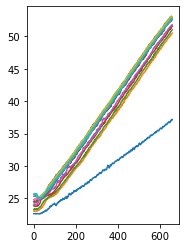

In [64]:
fig = plt.figure(1)
ax = fig.add_subplot(121)

#fig.canvas.draw()
fig.show()
#fig.canvas.draw()
#plt.rcParams["figure.figsize"]=5,5
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 8
#fig_size[1] = 3

def plotObject(df, ax, fig, alpha =0.7, scm=None):
    #ax.clear()
    #df= df.iloc[:, 1:]
    df = df.iloc[:, 3:]
    for i in range (0, df.shape[1]):
        #print ('last shape[1] is:', df.shape[1])
        ax.plot(df.index, df.iloc[:, i],\
                label = 'Layer ' + str(i))
        
    #fig.canvas.draw()
    #ax.legend()
    #fig.show()
    #print ('df is :', df)
    #plt.legend(loc='upper left')
    return fig, ax
plotObject(allchanrgeInput, ax, fig, alpha =0.7, scm=None)

In [66]:
print (allchanrgeInput['flowHPCH'].to_string())

0       -0.463734
1       -0.463734
2       -0.463734
3        6.622280
4        4.260270
5        1.898270
6       -0.463734
7       -5.187740
8       -0.463734
9      238.099000
10     753.015000
11     880.564000
12     923.080000
13     934.890000
14     946.700000
15     946.700000
16     951.424000
17     946.700000
18     951.424000
19     946.700000
20     946.700000
21     946.700000
22     949.062000
23     946.700000
24     946.700000
25     946.700000
26     941.976000
27     946.700000
28     944.338000
29     949.062000
30     946.700000
31     944.338000
32     946.700000
33     946.700000
34     946.700000
35     946.700000
36     949.062000
37     949.062000
38     946.700000
39     944.338000
40     946.700000
41     946.700000
42     949.062000
43     949.062000
44     949.062000
45     949.062000
46     951.424000
47     953.786000
48     949.062000
49     951.424000
50     949.062000
51     949.062000
52     946.700000
53     949.062000
54     944.338000
55     949

In [84]:
k =3
n_features = 13
out_features = y_train.shape[1]
#out_features
epochs =10000
batch_size = 50

In [69]:
"""
Normalization should be done BEFORE one prepares the data for ANN or LSTM input.
Normalization is done feature-wise (that means column-wise).
"""

def normalize(X):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(X)
    scaled_data = scaler.transform(X)
    return scaled_data, scaler

df_nrm, scaler = normalize(allchanrgeInput)
df_nrm = pd.DataFrame(df_nrm)

df_nrm.columns =  ['entropyCH', 'availabilityCH', 'flowHPCH', 'T0', 'T1', 'T2', 'T3', \
                  'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

In [70]:
def flatten_row_wise(df):
    """Take row by row and attach to one flat single row."""
    #arr = np.ndarray.flatten(np.array(df))
    #append(arr,)
    
    return np.ndarray.flatten(np.array(df))
def prepare_df(df, m, y_df):
    n_rows, n_cols = df.shape
    new_rows = np.array([np.append(flatten_row_wise(df.iloc[(i-k):i]), \
                                   m.iloc[i-k:i, :]) for i in range(k, n_rows)])
    new_ys = np.array([row for row in y_df.iloc[(k):, :].itertuples(index=False)])
    # idxs = [x[0] for x in new_ys]
    # new_ys = [x[1] for x in new_ys]
    return new_rows, new_ys

In [72]:
X = df_nrm.iloc[:, 3:]
y =df_nrm.iloc[:, 3:]
mh = df_nrm[[ 'entropyCH', 'availabilityCH', 'flowHPCH']]
X

T0        T1        T2        T3        T4        T5        T6  \
0    0.002320  0.001228  0.000000  0.002437  0.002434  0.002390  0.000000   
1    0.002320  0.000000  0.001219  0.001217  0.002434  0.001197  0.000000   
2    0.002320  0.001228  0.001219  0.001217  0.002434  0.002390  0.003606   
3    0.002320  0.001228  0.000000  0.001217  0.001219  0.000000  0.004811   
4    0.002320  0.001228  0.001219  0.000000  0.002434  0.007167  0.004811   
..        ...       ...       ...       ...       ...       ...       ...   
653  0.995339  0.992572  0.993856  0.996317  0.995095  0.990365  0.998787   
654  0.990677  0.993810  0.995086  0.997545  0.995095  0.993977  1.000000   
655  0.990677  0.995049  0.996315  0.997545  0.997548  0.992773  1.000000   
656  0.995339  0.997523  0.998771  0.998772  1.000000  0.998796  0.996362   
657  1.000000  1.000000  1.000000  1.000000  0.998774  1.000000  0.991512   

           T7        T8        T9  
0    0.013214  0.018150  0.021969  
1    0.013214  0.019359  0.021969  
2    0.012014  0.016941  0.020749  
3    0.012014  0.018150  0.020749  
4    0.013214  0.019359  0.023188  
..        ...       ...       ...  
653  1.000000  0.998780  0.997539  
654  0.998789  1.000000  0.997539  
655  0.997578  0.998780  0.998770  
656  0.990309  0.995117  1.000000  
657  0.983043  0.990238  1.000000  

[658 rows x 10 columns]

In [74]:
Xdf1, ydf1 = prepare_df(X, mh, y)

In [75]:
Xdf1.shape

(655, 39)

In [76]:
ydf1.shape

(655, 10)

In [77]:
def train_test_split_indexes(X, y, test_size=0.2, random_state=42, shuffle=False):
    X_train_indexes, X_test_indexes, y_train_indexes, y_test_indexes = train_test_split(pd.DataFrame(list(range(X.shape[0]))),
                                                                                        pd.DataFrame(list(range(y.shape[0]))),
                                                                                        test_size=test_size,
                                                                                        random_state=random_state,
                                                                                        shuffle=shuffle)
    train_indexes, test_indexes = [x for x in X_train_indexes.iloc[:, 0]]  , [x for x in X_test_indexes.iloc[:, 0]]
    return sorted(train_indexes), sorted(test_indexes)


In [78]:
def splitter(X, y, train_indexes, test_indexes):
    X_train = X.iloc[train_indexes, :]
    y_train = y.iloc[train_indexes, :]
    X_test = X.iloc[test_indexes, :]
    y_test = y.iloc[test_indexes, :]
    return X_train, X_test, y_train, y_test


In [79]:
train_indexes, test_indexes = train_test_split_indexes(Xdf1, ydf1, test_size=0.2, random_state=42, shuffle=True)
X_train, X_test, y_train, y_test = splitter(pd.DataFrame(Xdf1), pd.DataFrame(ydf1), train_indexes, test_indexes)




In [80]:
X_train = np.array(X_train)

X_test = np.array(X_test)

y_train = np.array(y_train)

y_test = np.array(y_test)

In [81]:
X_train.shape, y_train.shape

((524, 39), (524, 10))

In [82]:
def create_model(time_steps, n_features):
    model = Sequential()
    model.add(LSTM(10, input_shape = (time_steps, n_features)))
    #model.add(Dropout(0.2))
    
    #model.add(Dense(3))
    model.add(Dense(out_features, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

#So the val loss depends on the number of LSRTM nurons, 8 is reducing the val loss untill 0.208 thn
#increases
#Dense layer dosent work

In [85]:

model = create_model(k, n_features)
model_fpath=modelDir(ModelName='added_features_charging.h5')
callbacks_list = [ ModelCheckpoint(filepath=model_fpath,
                                   monitor="val_loss",
                                   save_best_only=True,                 
                                   mode="min")]

In [86]:
history = model.fit(X_train.reshape(X_train.shape[0], k, n_features),
                    y_train.reshape(y_train.shape[0], out_features),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.3,
                    callbacks = callbacks_list,
                    verbose=1)

Train on 366 samples, validate on 158 samples
Epoch 1/10000
366/366 [==============================] - 1s 3ms/step - loss: 0.1077 - mean_squared_error: 0.1077 - val_loss: 0.4651 - val_mean_squared_error: 0.4651
Epoch 2/10000
366/366 [==============================] - 0s 322us/step - loss: 0.0850 - mean_squared_error: 0.0850 - val_loss: 0.3945 - val_mean_squared_error: 0.3945
Epoch 3/10000
366/366 [==============================] - 0s 391us/step - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.3313 - val_mean_squared_error: 0.3313
Epoch 4/10000
366/366 [==============================] - 0s 295us/step - loss: 0.0518 - mean_squared_error: 0.0518 - val_loss: 0.2749 - val_mean_squared_error: 0.2749
Epoch 5/10000
366/366 [==============================] - 0s 230us/step - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.2312 - val_mean_squared_error: 0.2312
Epoch 6/10000
366/366 [==============================] - 0s 299us/step - loss: 0.0323 - mean_squared_error: 0.0323 - val_

Epoch 49/10000
366/366 [==============================] - 0s 176us/step - loss: 3.1827e-04 - mean_squared_error: 3.1827e-04 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 50/10000
366/366 [==============================] - 0s 169us/step - loss: 3.0466e-04 - mean_squared_error: 3.0466e-04 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 51/10000
366/366 [==============================] - 0s 163us/step - loss: 2.9278e-04 - mean_squared_error: 2.9278e-04 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 52/10000
366/366 [==============================] - 0s 164us/step - loss: 2.8259e-04 - mean_squared_error: 2.8259e-04 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 53/10000
366/366 [==============================] - 0s 145us/step - loss: 2.7275e-04 - mean_squared_error: 2.7275e-04 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 54/10000
366/366 [==============================] - 0s 168us/step - loss: 2.6513e-04 - mean_squared_error: 2.6513e

366/366 [==============================] - 0s 320us/step - loss: 1.6690e-04 - mean_squared_error: 1.6690e-04 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 96/10000
366/366 [==============================] - 0s 200us/step - loss: 1.6554e-04 - mean_squared_error: 1.6554e-04 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 97/10000
366/366 [==============================] - 0s 188us/step - loss: 1.6452e-04 - mean_squared_error: 1.6452e-04 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 98/10000
366/366 [==============================] - 0s 234us/step - loss: 1.6344e-04 - mean_squared_error: 1.6344e-04 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 99/10000
366/366 [==============================] - 0s 151us/step - loss: 1.6295e-04 - mean_squared_error: 1.6295e-04 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 100/10000
366/366 [==============================] - 0s 198us/step - loss: 1.6202e-04 - mean_squared_error: 1.6202e-04 - val_loss

366/366 [==============================] - 0s 266us/step - loss: 1.2816e-04 - mean_squared_error: 1.2816e-04 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 142/10000
366/366 [==============================] - 0s 156us/step - loss: 1.2694e-04 - mean_squared_error: 1.2694e-04 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 143/10000
366/366 [==============================] - 0s 132us/step - loss: 1.2683e-04 - mean_squared_error: 1.2683e-04 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 144/10000
366/366 [==============================] - 0s 111us/step - loss: 1.2615e-04 - mean_squared_error: 1.2615e-04 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 145/10000
366/366 [==============================] - 0s 169us/step - loss: 1.2592e-04 - mean_squared_error: 1.2592e-04 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 146/10000
366/366 [==============================] - 0s 186us/step - loss: 1.2472e-04 - mean_squared_error: 1.2472e-04 - val_

366/366 [==============================] - 0s 239us/step - loss: 1.0140e-04 - mean_squared_error: 1.0140e-04 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 188/10000
366/366 [==============================] - 0s 214us/step - loss: 1.0035e-04 - mean_squared_error: 1.0035e-04 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 189/10000
366/366 [==============================] - 0s 344us/step - loss: 9.9996e-05 - mean_squared_error: 9.9996e-05 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 190/10000
366/366 [==============================] - 0s 200us/step - loss: 1.0001e-04 - mean_squared_error: 1.0001e-04 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 191/10000
366/366 [==============================] - 0s 162us/step - loss: 1.0102e-04 - mean_squared_error: 1.0102e-04 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 192/10000
366/366 [==============================] - 0s 164us/step - loss: 9.9317e-05 - mean_squared_error: 9.9317e-05 - val_

366/366 [==============================] - 0s 354us/step - loss: 8.1383e-05 - mean_squared_error: 8.1383e-05 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 234/10000
366/366 [==============================] - 0s 189us/step - loss: 8.1218e-05 - mean_squared_error: 8.1218e-05 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 235/10000
366/366 [==============================] - 0s 234us/step - loss: 8.1907e-05 - mean_squared_error: 8.1907e-05 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 236/10000
366/366 [==============================] - 0s 242us/step - loss: 8.0679e-05 - mean_squared_error: 8.0679e-05 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 237/10000
366/366 [==============================] - 0s 186us/step - loss: 8.0461e-05 - mean_squared_error: 8.0461e-05 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 238/10000
366/366 [==============================] - 0s 187us/step - loss: 7.9618e-05 - mean_squared_error: 7.9618e-05 - val_

366/366 [==============================] - 0s 229us/step - loss: 6.5960e-05 - mean_squared_error: 6.5960e-05 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 280/10000
366/366 [==============================] - 0s 230us/step - loss: 6.5881e-05 - mean_squared_error: 6.5881e-05 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 281/10000
366/366 [==============================] - 0s 297us/step - loss: 6.5634e-05 - mean_squared_error: 6.5634e-05 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 282/10000
366/366 [==============================] - 0s 286us/step - loss: 6.5223e-05 - mean_squared_error: 6.5223e-05 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 283/10000
366/366 [==============================] - 0s 225us/step - loss: 6.5236e-05 - mean_squared_error: 6.5236e-05 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 284/10000
366/366 [==============================] - 0s 307us/step - loss: 6.5122e-05 - mean_squared_error: 6.5122e-05 - val_

366/366 [==============================] - 0s 269us/step - loss: 5.5549e-05 - mean_squared_error: 5.5549e-05 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 326/10000
366/366 [==============================] - 0s 239us/step - loss: 5.5279e-05 - mean_squared_error: 5.5279e-05 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 327/10000
366/366 [==============================] - 0s 193us/step - loss: 5.7808e-05 - mean_squared_error: 5.7808e-05 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 328/10000
366/366 [==============================] - 0s 232us/step - loss: 5.6733e-05 - mean_squared_error: 5.6733e-05 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 329/10000
366/366 [==============================] - 0s 239us/step - loss: 5.6447e-05 - mean_squared_error: 5.6447e-05 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 330/10000
366/366 [==============================] - 0s 246us/step - loss: 5.6121e-05 - mean_squared_error: 5.6121e-05 - val_

366/366 [==============================] - 0s 281us/step - loss: 4.6575e-05 - mean_squared_error: 4.6575e-05 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 372/10000
366/366 [==============================] - 0s 337us/step - loss: 4.6294e-05 - mean_squared_error: 4.6294e-05 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 373/10000
366/366 [==============================] - 0s 210us/step - loss: 4.6674e-05 - mean_squared_error: 4.6674e-05 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 374/10000
366/366 [==============================] - 0s 261us/step - loss: 4.7410e-05 - mean_squared_error: 4.7410e-05 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 375/10000
366/366 [==============================] - 0s 268us/step - loss: 4.6362e-05 - mean_squared_error: 4.6362e-05 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 376/10000
366/366 [==============================] - 0s 278us/step - loss: 4.5871e-05 - mean_squared_error: 4.5871e-05 - val_

366/366 [==============================] - 0s 230us/step - loss: 4.0538e-05 - mean_squared_error: 4.0538e-05 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 418/10000
366/366 [==============================] - 0s 235us/step - loss: 4.0283e-05 - mean_squared_error: 4.0283e-05 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 419/10000
366/366 [==============================] - 0s 212us/step - loss: 4.0314e-05 - mean_squared_error: 4.0314e-05 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 420/10000
366/366 [==============================] - 0s 281us/step - loss: 4.0964e-05 - mean_squared_error: 4.0964e-05 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 421/10000
366/366 [==============================] - 0s 267us/step - loss: 4.0896e-05 - mean_squared_error: 4.0896e-05 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 422/10000
366/366 [==============================] - 0s 284us/step - loss: 4.0444e-05 - mean_squared_error: 4.0444e-05 - val_

366/366 [==============================] - 0s 301us/step - loss: 3.6384e-05 - mean_squared_error: 3.6384e-05 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 464/10000
366/366 [==============================] - 0s 289us/step - loss: 3.6380e-05 - mean_squared_error: 3.6380e-05 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 465/10000
366/366 [==============================] - 0s 284us/step - loss: 3.5484e-05 - mean_squared_error: 3.5484e-05 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 466/10000
366/366 [==============================] - 0s 274us/step - loss: 3.5856e-05 - mean_squared_error: 3.5856e-05 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 467/10000
366/366 [==============================] - 0s 270us/step - loss: 3.6826e-05 - mean_squared_error: 3.6826e-05 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 468/10000
366/366 [==============================] - 0s 246us/step - loss: 3.5877e-05 - mean_squared_error: 3.5877e-05 - val_

366/366 [==============================] - 0s 344us/step - loss: 3.1928e-05 - mean_squared_error: 3.1928e-05 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 510/10000
366/366 [==============================] - 0s 262us/step - loss: 3.1932e-05 - mean_squared_error: 3.1932e-05 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 511/10000
366/366 [==============================] - 0s 239us/step - loss: 3.3131e-05 - mean_squared_error: 3.3131e-05 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 512/10000
366/366 [==============================] - 0s 178us/step - loss: 3.2738e-05 - mean_squared_error: 3.2738e-05 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 513/10000
366/366 [==============================] - 0s 181us/step - loss: 3.1893e-05 - mean_squared_error: 3.1893e-05 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 514/10000
366/366 [==============================] - 0s 188us/step - loss: 3.2536e-05 - mean_squared_error: 3.2536e-05 - val_

366/366 [==============================] - 0s 272us/step - loss: 3.2342e-05 - mean_squared_error: 3.2342e-05 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 556/10000
366/366 [==============================] - 0s 285us/step - loss: 3.0544e-05 - mean_squared_error: 3.0544e-05 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 557/10000
366/366 [==============================] - 0s 178us/step - loss: 3.2640e-05 - mean_squared_error: 3.2640e-05 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 558/10000
366/366 [==============================] - 0s 182us/step - loss: 3.1456e-05 - mean_squared_error: 3.1456e-05 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 559/10000
366/366 [==============================] - 0s 171us/step - loss: 2.9961e-05 - mean_squared_error: 2.9961e-05 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 560/10000
366/366 [==============================] - 0s 196us/step - loss: 3.0172e-05 - mean_squared_error: 3.0172e-05 - val_

366/366 [==============================] - 0s 269us/step - loss: 2.7884e-05 - mean_squared_error: 2.7884e-05 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 602/10000
366/366 [==============================] - 0s 215us/step - loss: 2.8065e-05 - mean_squared_error: 2.8065e-05 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 603/10000
366/366 [==============================] - 0s 176us/step - loss: 2.7135e-05 - mean_squared_error: 2.7135e-05 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 604/10000
366/366 [==============================] - 0s 293us/step - loss: 2.7370e-05 - mean_squared_error: 2.7370e-05 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 605/10000
366/366 [==============================] - 0s 203us/step - loss: 2.7136e-05 - mean_squared_error: 2.7136e-05 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 606/10000
366/366 [==============================] - 0s 182us/step - loss: 2.7682e-05 - mean_squared_error: 2.7682e-05 - val_

366/366 [==============================] - 0s 298us/step - loss: 2.7421e-05 - mean_squared_error: 2.7421e-05 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 648/10000
366/366 [==============================] - 0s 183us/step - loss: 2.7876e-05 - mean_squared_error: 2.7876e-05 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 649/10000
366/366 [==============================] - 0s 201us/step - loss: 2.6492e-05 - mean_squared_error: 2.6492e-05 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 650/10000
366/366 [==============================] - 0s 182us/step - loss: 2.6522e-05 - mean_squared_error: 2.6522e-05 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 651/10000
366/366 [==============================] - 0s 258us/step - loss: 2.6359e-05 - mean_squared_error: 2.6359e-05 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 652/10000
366/366 [==============================] - 0s 220us/step - loss: 2.6565e-05 - mean_squared_error: 2.6565e-05 - val_

366/366 [==============================] - 0s 213us/step - loss: 2.4219e-05 - mean_squared_error: 2.4219e-05 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 694/10000
366/366 [==============================] - 0s 182us/step - loss: 2.4858e-05 - mean_squared_error: 2.4858e-05 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 695/10000
366/366 [==============================] - 0s 209us/step - loss: 2.4634e-05 - mean_squared_error: 2.4634e-05 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 696/10000
366/366 [==============================] - 0s 185us/step - loss: 2.4553e-05 - mean_squared_error: 2.4553e-05 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 697/10000
366/366 [==============================] - 0s 165us/step - loss: 2.4500e-05 - mean_squared_error: 2.4500e-05 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 698/10000
366/366 [==============================] - 0s 164us/step - loss: 2.4671e-05 - mean_squared_error: 2.4671e-05 - val_

366/366 [==============================] - 0s 286us/step - loss: 2.5191e-05 - mean_squared_error: 2.5191e-05 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 740/10000
366/366 [==============================] - 0s 208us/step - loss: 2.4931e-05 - mean_squared_error: 2.4931e-05 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 741/10000
366/366 [==============================] - 0s 316us/step - loss: 2.4696e-05 - mean_squared_error: 2.4696e-05 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 742/10000
366/366 [==============================] - 0s 408us/step - loss: 2.3473e-05 - mean_squared_error: 2.3473e-05 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 743/10000
366/366 [==============================] - 0s 330us/step - loss: 2.3852e-05 - mean_squared_error: 2.3852e-05 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 744/10000
366/366 [==============================] - 0s 217us/step - loss: 2.3570e-05 - mean_squared_error: 2.3570e-05 - val_

366/366 [==============================] - 0s 265us/step - loss: 2.2932e-05 - mean_squared_error: 2.2932e-05 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 786/10000
366/366 [==============================] - 0s 290us/step - loss: 2.3322e-05 - mean_squared_error: 2.3322e-05 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 787/10000
366/366 [==============================] - 0s 203us/step - loss: 2.3188e-05 - mean_squared_error: 2.3188e-05 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 788/10000
366/366 [==============================] - 0s 229us/step - loss: 2.3102e-05 - mean_squared_error: 2.3102e-05 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 789/10000
366/366 [==============================] - 0s 241us/step - loss: 2.3502e-05 - mean_squared_error: 2.3502e-05 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 790/10000
366/366 [==============================] - 0s 183us/step - loss: 2.3710e-05 - mean_squared_error: 2.3710e-05 - val_

366/366 [==============================] - 0s 329us/step - loss: 2.1854e-05 - mean_squared_error: 2.1854e-05 - val_loss: 9.4995e-04 - val_mean_squared_error: 9.4995e-04
Epoch 832/10000
366/366 [==============================] - 0s 315us/step - loss: 2.2844e-05 - mean_squared_error: 2.2844e-05 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 833/10000
366/366 [==============================] - 0s 309us/step - loss: 2.2307e-05 - mean_squared_error: 2.2307e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 834/10000
366/366 [==============================] - 0s 301us/step - loss: 2.1732e-05 - mean_squared_error: 2.1732e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 835/10000
366/366 [==============================] - 0s 197us/step - loss: 2.3078e-05 - mean_squared_error: 2.3078e-05 - val_loss: 9.7140e-04 - val_mean_squared_error: 9.7140e-04
Epoch 836/10000
366/366 [==============================] - 0s 319us/step - loss: 2.2814e-05 - mean_squared_error: 2

366/366 [==============================] - 0s 358us/step - loss: 2.1366e-05 - mean_squared_error: 2.1366e-05 - val_loss: 9.6127e-04 - val_mean_squared_error: 9.6127e-04
Epoch 877/10000
366/366 [==============================] - 0s 422us/step - loss: 2.0954e-05 - mean_squared_error: 2.0954e-05 - val_loss: 9.1746e-04 - val_mean_squared_error: 9.1746e-04
Epoch 878/10000
366/366 [==============================] - 0s 334us/step - loss: 2.0904e-05 - mean_squared_error: 2.0904e-05 - val_loss: 8.2737e-04 - val_mean_squared_error: 8.2737e-04
Epoch 879/10000
366/366 [==============================] - 0s 236us/step - loss: 2.1833e-05 - mean_squared_error: 2.1833e-05 - val_loss: 9.7071e-04 - val_mean_squared_error: 9.7071e-04
Epoch 880/10000
366/366 [==============================] - 0s 245us/step - loss: 2.1528e-05 - mean_squared_error: 2.1528e-05 - val_loss: 9.0108e-04 - val_mean_squared_error: 9.0108e-04
Epoch 881/10000
366/366 [==============================] - 0s 243us/step - loss: 2.1430e-05

366/366 [==============================] - 0s 241us/step - loss: 2.0650e-05 - mean_squared_error: 2.0650e-05 - val_loss: 8.4450e-04 - val_mean_squared_error: 8.4450e-04
Epoch 921/10000
366/366 [==============================] - 0s 275us/step - loss: 2.0221e-05 - mean_squared_error: 2.0221e-05 - val_loss: 8.4483e-04 - val_mean_squared_error: 8.4483e-04
Epoch 922/10000
366/366 [==============================] - 0s 202us/step - loss: 2.0543e-05 - mean_squared_error: 2.0543e-05 - val_loss: 8.6828e-04 - val_mean_squared_error: 8.6828e-04
Epoch 923/10000
366/366 [==============================] - 0s 249us/step - loss: 2.1144e-05 - mean_squared_error: 2.1144e-05 - val_loss: 8.0345e-04 - val_mean_squared_error: 8.0345e-04
Epoch 924/10000
366/366 [==============================] - 0s 198us/step - loss: 2.1374e-05 - mean_squared_error: 2.1374e-05 - val_loss: 8.3322e-04 - val_mean_squared_error: 8.3322e-04
Epoch 925/10000
366/366 [==============================] - 0s 205us/step - loss: 2.0924e-05

366/366 [==============================] - 0s 271us/step - loss: 2.0419e-05 - mean_squared_error: 2.0419e-05 - val_loss: 7.7507e-04 - val_mean_squared_error: 7.7507e-04
Epoch 965/10000
366/366 [==============================] - 0s 199us/step - loss: 2.0192e-05 - mean_squared_error: 2.0192e-05 - val_loss: 6.7501e-04 - val_mean_squared_error: 6.7501e-04
Epoch 966/10000
366/366 [==============================] - 0s 294us/step - loss: 2.0930e-05 - mean_squared_error: 2.0930e-05 - val_loss: 7.1098e-04 - val_mean_squared_error: 7.1098e-04
Epoch 967/10000
366/366 [==============================] - 0s 332us/step - loss: 2.0801e-05 - mean_squared_error: 2.0801e-05 - val_loss: 8.1593e-04 - val_mean_squared_error: 8.1593e-04
Epoch 968/10000
366/366 [==============================] - 0s 264us/step - loss: 2.0320e-05 - mean_squared_error: 2.0320e-05 - val_loss: 7.3466e-04 - val_mean_squared_error: 7.3466e-04
Epoch 969/10000
366/366 [==============================] - 0s 257us/step - loss: 2.0831e-05

366/366 [==============================] - 0s 348us/step - loss: 1.9553e-05 - mean_squared_error: 1.9553e-05 - val_loss: 7.5877e-04 - val_mean_squared_error: 7.5877e-04
Epoch 1009/10000
366/366 [==============================] - 0s 236us/step - loss: 1.9580e-05 - mean_squared_error: 1.9580e-05 - val_loss: 7.4540e-04 - val_mean_squared_error: 7.4540e-04
Epoch 1010/10000
366/366 [==============================] - 0s 289us/step - loss: 1.9390e-05 - mean_squared_error: 1.9390e-05 - val_loss: 7.3011e-04 - val_mean_squared_error: 7.3011e-04
Epoch 1011/10000
366/366 [==============================] - 0s 265us/step - loss: 1.9566e-05 - mean_squared_error: 1.9566e-05 - val_loss: 7.0628e-04 - val_mean_squared_error: 7.0628e-04
Epoch 1012/10000
366/366 [==============================] - 0s 299us/step - loss: 1.9673e-05 - mean_squared_error: 1.9673e-05 - val_loss: 7.2727e-04 - val_mean_squared_error: 7.2727e-04
Epoch 1013/10000
366/366 [==============================] - 0s 289us/step - loss: 2.051

366/366 [==============================] - 0s 335us/step - loss: 2.1149e-05 - mean_squared_error: 2.1149e-05 - val_loss: 7.7098e-04 - val_mean_squared_error: 7.7098e-04
Epoch 1053/10000
366/366 [==============================] - 0s 145us/step - loss: 2.0052e-05 - mean_squared_error: 2.0052e-05 - val_loss: 6.6023e-04 - val_mean_squared_error: 6.6023e-04
Epoch 1054/10000
366/366 [==============================] - 0s 196us/step - loss: 1.9536e-05 - mean_squared_error: 1.9536e-05 - val_loss: 6.1996e-04 - val_mean_squared_error: 6.1996e-04
Epoch 1055/10000
366/366 [==============================] - 0s 182us/step - loss: 2.0031e-05 - mean_squared_error: 2.0031e-05 - val_loss: 6.3971e-04 - val_mean_squared_error: 6.3971e-04
Epoch 1056/10000
366/366 [==============================] - 0s 302us/step - loss: 1.9112e-05 - mean_squared_error: 1.9112e-05 - val_loss: 6.5323e-04 - val_mean_squared_error: 6.5323e-04
Epoch 1057/10000
366/366 [==============================] - 0s 171us/step - loss: 1.949

366/366 [==============================] - 0s 131us/step - loss: 1.9048e-05 - mean_squared_error: 1.9048e-05 - val_loss: 5.9561e-04 - val_mean_squared_error: 5.9561e-04
Epoch 1097/10000
366/366 [==============================] - 0s 128us/step - loss: 1.9072e-05 - mean_squared_error: 1.9072e-05 - val_loss: 6.7406e-04 - val_mean_squared_error: 6.7406e-04
Epoch 1098/10000
366/366 [==============================] - 0s 127us/step - loss: 1.8991e-05 - mean_squared_error: 1.8991e-05 - val_loss: 6.7246e-04 - val_mean_squared_error: 6.7246e-04
Epoch 1099/10000
366/366 [==============================] - 0s 316us/step - loss: 1.9128e-05 - mean_squared_error: 1.9128e-05 - val_loss: 6.5812e-04 - val_mean_squared_error: 6.5812e-04
Epoch 1100/10000
366/366 [==============================] - 0s 157us/step - loss: 1.9539e-05 - mean_squared_error: 1.9539e-05 - val_loss: 5.8980e-04 - val_mean_squared_error: 5.8980e-04
Epoch 1101/10000
366/366 [==============================] - 0s 169us/step - loss: 1.940

366/366 [==============================] - 0s 194us/step - loss: 1.9243e-05 - mean_squared_error: 1.9243e-05 - val_loss: 5.9371e-04 - val_mean_squared_error: 5.9371e-04
Epoch 1141/10000
366/366 [==============================] - 0s 168us/step - loss: 2.0117e-05 - mean_squared_error: 2.0117e-05 - val_loss: 5.9353e-04 - val_mean_squared_error: 5.9353e-04
Epoch 1142/10000
366/366 [==============================] - 0s 144us/step - loss: 1.9247e-05 - mean_squared_error: 1.9247e-05 - val_loss: 5.5071e-04 - val_mean_squared_error: 5.5071e-04
Epoch 1143/10000
366/366 [==============================] - 0s 147us/step - loss: 1.8731e-05 - mean_squared_error: 1.8731e-05 - val_loss: 5.9478e-04 - val_mean_squared_error: 5.9478e-04
Epoch 1144/10000
366/366 [==============================] - 0s 152us/step - loss: 1.8521e-05 - mean_squared_error: 1.8521e-05 - val_loss: 6.0891e-04 - val_mean_squared_error: 6.0891e-04
Epoch 1145/10000
366/366 [==============================] - 0s 202us/step - loss: 1.850

366/366 [==============================] - 0s 164us/step - loss: 1.8265e-05 - mean_squared_error: 1.8265e-05 - val_loss: 5.9744e-04 - val_mean_squared_error: 5.9744e-04
Epoch 1185/10000
366/366 [==============================] - 0s 166us/step - loss: 1.8723e-05 - mean_squared_error: 1.8723e-05 - val_loss: 6.7682e-04 - val_mean_squared_error: 6.7682e-04
Epoch 1186/10000
366/366 [==============================] - 0s 154us/step - loss: 1.8304e-05 - mean_squared_error: 1.8304e-05 - val_loss: 6.5772e-04 - val_mean_squared_error: 6.5772e-04
Epoch 1187/10000
366/366 [==============================] - 0s 162us/step - loss: 1.8832e-05 - mean_squared_error: 1.8832e-05 - val_loss: 5.8140e-04 - val_mean_squared_error: 5.8140e-04
Epoch 1188/10000
366/366 [==============================] - 0s 267us/step - loss: 1.8783e-05 - mean_squared_error: 1.8783e-05 - val_loss: 5.1950e-04 - val_mean_squared_error: 5.1950e-04
Epoch 1189/10000
366/366 [==============================] - 0s 221us/step - loss: 1.921

366/366 [==============================] - 0s 422us/step - loss: 1.8478e-05 - mean_squared_error: 1.8478e-05 - val_loss: 5.9036e-04 - val_mean_squared_error: 5.9036e-04
Epoch 1229/10000
366/366 [==============================] - 0s 282us/step - loss: 1.7657e-05 - mean_squared_error: 1.7657e-05 - val_loss: 5.8516e-04 - val_mean_squared_error: 5.8516e-04
Epoch 1230/10000
366/366 [==============================] - 0s 187us/step - loss: 1.7802e-05 - mean_squared_error: 1.7802e-05 - val_loss: 5.9135e-04 - val_mean_squared_error: 5.9135e-04
Epoch 1231/10000
366/366 [==============================] - 0s 235us/step - loss: 1.8154e-05 - mean_squared_error: 1.8154e-05 - val_loss: 5.8819e-04 - val_mean_squared_error: 5.8819e-04
Epoch 1232/10000
366/366 [==============================] - 0s 321us/step - loss: 1.8035e-05 - mean_squared_error: 1.8035e-05 - val_loss: 5.3708e-04 - val_mean_squared_error: 5.3708e-04
Epoch 1233/10000
366/366 [==============================] - 0s 256us/step - loss: 1.862

366/366 [==============================] - 0s 350us/step - loss: 1.8699e-05 - mean_squared_error: 1.8699e-05 - val_loss: 6.1619e-04 - val_mean_squared_error: 6.1619e-04
Epoch 1273/10000
366/366 [==============================] - 0s 297us/step - loss: 1.8099e-05 - mean_squared_error: 1.8099e-05 - val_loss: 5.3808e-04 - val_mean_squared_error: 5.3808e-04
Epoch 1274/10000
366/366 [==============================] - 0s 331us/step - loss: 1.8614e-05 - mean_squared_error: 1.8614e-05 - val_loss: 5.1542e-04 - val_mean_squared_error: 5.1542e-04
Epoch 1275/10000
366/366 [==============================] - 0s 184us/step - loss: 1.8512e-05 - mean_squared_error: 1.8512e-05 - val_loss: 6.1886e-04 - val_mean_squared_error: 6.1886e-04
Epoch 1276/10000
366/366 [==============================] - 0s 264us/step - loss: 1.9702e-05 - mean_squared_error: 1.9702e-05 - val_loss: 6.8831e-04 - val_mean_squared_error: 6.8831e-04
Epoch 1277/10000
366/366 [==============================] - 0s 200us/step - loss: 1.982

366/366 [==============================] - 0s 307us/step - loss: 1.7735e-05 - mean_squared_error: 1.7735e-05 - val_loss: 5.7443e-04 - val_mean_squared_error: 5.7443e-04
Epoch 1317/10000
366/366 [==============================] - 0s 185us/step - loss: 1.7283e-05 - mean_squared_error: 1.7283e-05 - val_loss: 5.6279e-04 - val_mean_squared_error: 5.6279e-04
Epoch 1318/10000
366/366 [==============================] - 0s 244us/step - loss: 1.7600e-05 - mean_squared_error: 1.7600e-05 - val_loss: 5.6322e-04 - val_mean_squared_error: 5.6322e-04
Epoch 1319/10000
366/366 [==============================] - 0s 247us/step - loss: 1.7579e-05 - mean_squared_error: 1.7579e-05 - val_loss: 5.1854e-04 - val_mean_squared_error: 5.1854e-04
Epoch 1320/10000
366/366 [==============================] - 0s 276us/step - loss: 1.8722e-05 - mean_squared_error: 1.8722e-05 - val_loss: 6.2762e-04 - val_mean_squared_error: 6.2762e-04
Epoch 1321/10000
366/366 [==============================] - 0s 209us/step - loss: 1.876

366/366 [==============================] - 0s 260us/step - loss: 1.7688e-05 - mean_squared_error: 1.7688e-05 - val_loss: 5.8426e-04 - val_mean_squared_error: 5.8426e-04
Epoch 1361/10000
366/366 [==============================] - 0s 180us/step - loss: 1.7630e-05 - mean_squared_error: 1.7630e-05 - val_loss: 6.0223e-04 - val_mean_squared_error: 6.0223e-04
Epoch 1362/10000
366/366 [==============================] - 0s 174us/step - loss: 1.7546e-05 - mean_squared_error: 1.7546e-05 - val_loss: 4.8885e-04 - val_mean_squared_error: 4.8885e-04
Epoch 1363/10000
366/366 [==============================] - 0s 263us/step - loss: 1.7338e-05 - mean_squared_error: 1.7338e-05 - val_loss: 6.1887e-04 - val_mean_squared_error: 6.1887e-04
Epoch 1364/10000
366/366 [==============================] - 0s 251us/step - loss: 1.8240e-05 - mean_squared_error: 1.8240e-05 - val_loss: 5.8090e-04 - val_mean_squared_error: 5.8090e-04
Epoch 1365/10000
366/366 [==============================] - 0s 271us/step - loss: 1.756

366/366 [==============================] - 0s 258us/step - loss: 1.6959e-05 - mean_squared_error: 1.6959e-05 - val_loss: 5.6063e-04 - val_mean_squared_error: 5.6063e-04
Epoch 1405/10000
366/366 [==============================] - 0s 252us/step - loss: 1.7174e-05 - mean_squared_error: 1.7174e-05 - val_loss: 6.4499e-04 - val_mean_squared_error: 6.4499e-04
Epoch 1406/10000
366/366 [==============================] - 0s 215us/step - loss: 1.8517e-05 - mean_squared_error: 1.8517e-05 - val_loss: 5.1075e-04 - val_mean_squared_error: 5.1075e-04
Epoch 1407/10000
366/366 [==============================] - 0s 281us/step - loss: 1.7885e-05 - mean_squared_error: 1.7885e-05 - val_loss: 5.6461e-04 - val_mean_squared_error: 5.6461e-04
Epoch 1408/10000
366/366 [==============================] - 0s 302us/step - loss: 1.7731e-05 - mean_squared_error: 1.7731e-05 - val_loss: 5.4121e-04 - val_mean_squared_error: 5.4121e-04
Epoch 1409/10000
366/366 [==============================] - 0s 190us/step - loss: 1.744

366/366 [==============================] - 0s 322us/step - loss: 1.7205e-05 - mean_squared_error: 1.7205e-05 - val_loss: 5.6002e-04 - val_mean_squared_error: 5.6002e-04
Epoch 1449/10000
366/366 [==============================] - 0s 185us/step - loss: 1.7188e-05 - mean_squared_error: 1.7188e-05 - val_loss: 5.4615e-04 - val_mean_squared_error: 5.4615e-04
Epoch 1450/10000
366/366 [==============================] - 0s 262us/step - loss: 1.6701e-05 - mean_squared_error: 1.6701e-05 - val_loss: 5.6515e-04 - val_mean_squared_error: 5.6515e-04
Epoch 1451/10000
366/366 [==============================] - 0s 295us/step - loss: 1.7059e-05 - mean_squared_error: 1.7059e-05 - val_loss: 5.4003e-04 - val_mean_squared_error: 5.4003e-04
Epoch 1452/10000
366/366 [==============================] - 0s 252us/step - loss: 1.7076e-05 - mean_squared_error: 1.7076e-05 - val_loss: 5.1726e-04 - val_mean_squared_error: 5.1726e-04
Epoch 1453/10000
366/366 [==============================] - 0s 371us/step - loss: 1.728

366/366 [==============================] - 0s 215us/step - loss: 1.6878e-05 - mean_squared_error: 1.6878e-05 - val_loss: 5.4490e-04 - val_mean_squared_error: 5.4490e-04
Epoch 1493/10000
366/366 [==============================] - 0s 197us/step - loss: 1.6811e-05 - mean_squared_error: 1.6811e-05 - val_loss: 5.3063e-04 - val_mean_squared_error: 5.3063e-04
Epoch 1494/10000
366/366 [==============================] - 0s 251us/step - loss: 1.6795e-05 - mean_squared_error: 1.6795e-05 - val_loss: 5.0380e-04 - val_mean_squared_error: 5.0380e-04
Epoch 1495/10000
366/366 [==============================] - 0s 275us/step - loss: 1.6772e-05 - mean_squared_error: 1.6772e-05 - val_loss: 5.3760e-04 - val_mean_squared_error: 5.3760e-04
Epoch 1496/10000
366/366 [==============================] - 0s 274us/step - loss: 1.6489e-05 - mean_squared_error: 1.6489e-05 - val_loss: 5.6968e-04 - val_mean_squared_error: 5.6968e-04
Epoch 1497/10000
366/366 [==============================] - 0s 278us/step - loss: 1.644

366/366 [==============================] - 0s 225us/step - loss: 1.7948e-05 - mean_squared_error: 1.7948e-05 - val_loss: 5.8171e-04 - val_mean_squared_error: 5.8171e-04
Epoch 1537/10000
366/366 [==============================] - 0s 260us/step - loss: 1.8781e-05 - mean_squared_error: 1.8781e-05 - val_loss: 5.2069e-04 - val_mean_squared_error: 5.2069e-04
Epoch 1538/10000
366/366 [==============================] - 0s 332us/step - loss: 1.7477e-05 - mean_squared_error: 1.7477e-05 - val_loss: 5.7206e-04 - val_mean_squared_error: 5.7206e-04
Epoch 1539/10000
366/366 [==============================] - 0s 179us/step - loss: 1.6668e-05 - mean_squared_error: 1.6668e-05 - val_loss: 5.2048e-04 - val_mean_squared_error: 5.2048e-04
Epoch 1540/10000
366/366 [==============================] - 0s 290us/step - loss: 1.6723e-05 - mean_squared_error: 1.6723e-05 - val_loss: 5.4752e-04 - val_mean_squared_error: 5.4752e-04
Epoch 1541/10000
366/366 [==============================] - 0s 225us/step - loss: 1.586

366/366 [==============================] - 0s 182us/step - loss: 1.5885e-05 - mean_squared_error: 1.5885e-05 - val_loss: 5.7357e-04 - val_mean_squared_error: 5.7357e-04
Epoch 1581/10000
366/366 [==============================] - 0s 225us/step - loss: 1.6272e-05 - mean_squared_error: 1.6272e-05 - val_loss: 5.2889e-04 - val_mean_squared_error: 5.2889e-04
Epoch 1582/10000
366/366 [==============================] - 0s 231us/step - loss: 1.6062e-05 - mean_squared_error: 1.6062e-05 - val_loss: 5.3960e-04 - val_mean_squared_error: 5.3960e-04
Epoch 1583/10000
366/366 [==============================] - 0s 192us/step - loss: 1.5620e-05 - mean_squared_error: 1.5620e-05 - val_loss: 5.3929e-04 - val_mean_squared_error: 5.3929e-04
Epoch 1584/10000
366/366 [==============================] - 0s 163us/step - loss: 1.5310e-05 - mean_squared_error: 1.5310e-05 - val_loss: 5.3681e-04 - val_mean_squared_error: 5.3681e-04
Epoch 1585/10000
366/366 [==============================] - 0s 177us/step - loss: 1.547

366/366 [==============================] - 0s 299us/step - loss: 1.6351e-05 - mean_squared_error: 1.6351e-05 - val_loss: 6.1167e-04 - val_mean_squared_error: 6.1167e-04
Epoch 1625/10000
366/366 [==============================] - 0s 169us/step - loss: 1.6783e-05 - mean_squared_error: 1.6783e-05 - val_loss: 5.7977e-04 - val_mean_squared_error: 5.7977e-04
Epoch 1626/10000
366/366 [==============================] - 0s 190us/step - loss: 1.6156e-05 - mean_squared_error: 1.6156e-05 - val_loss: 5.6449e-04 - val_mean_squared_error: 5.6449e-04
Epoch 1627/10000
366/366 [==============================] - 0s 168us/step - loss: 1.6037e-05 - mean_squared_error: 1.6037e-05 - val_loss: 5.6580e-04 - val_mean_squared_error: 5.6580e-04
Epoch 1628/10000
366/366 [==============================] - 0s 376us/step - loss: 1.5801e-05 - mean_squared_error: 1.5801e-05 - val_loss: 5.6970e-04 - val_mean_squared_error: 5.6970e-04
Epoch 1629/10000
366/366 [==============================] - 0s 205us/step - loss: 1.553

366/366 [==============================] - 0s 270us/step - loss: 1.7012e-05 - mean_squared_error: 1.7012e-05 - val_loss: 5.7855e-04 - val_mean_squared_error: 5.7855e-04
Epoch 1669/10000
366/366 [==============================] - 0s 248us/step - loss: 1.6038e-05 - mean_squared_error: 1.6038e-05 - val_loss: 5.5573e-04 - val_mean_squared_error: 5.5573e-04
Epoch 1670/10000
366/366 [==============================] - 0s 306us/step - loss: 1.5394e-05 - mean_squared_error: 1.5394e-05 - val_loss: 5.4692e-04 - val_mean_squared_error: 5.4692e-04
Epoch 1671/10000
366/366 [==============================] - 0s 245us/step - loss: 1.5940e-05 - mean_squared_error: 1.5940e-05 - val_loss: 5.5721e-04 - val_mean_squared_error: 5.5721e-04
Epoch 1672/10000
366/366 [==============================] - 0s 289us/step - loss: 1.5953e-05 - mean_squared_error: 1.5953e-05 - val_loss: 5.1749e-04 - val_mean_squared_error: 5.1749e-04
Epoch 1673/10000
366/366 [==============================] - 0s 226us/step - loss: 1.560

366/366 [==============================] - 0s 269us/step - loss: 1.5158e-05 - mean_squared_error: 1.5158e-05 - val_loss: 5.1169e-04 - val_mean_squared_error: 5.1169e-04
Epoch 1713/10000
366/366 [==============================] - 0s 190us/step - loss: 1.5296e-05 - mean_squared_error: 1.5296e-05 - val_loss: 5.2582e-04 - val_mean_squared_error: 5.2582e-04
Epoch 1714/10000
366/366 [==============================] - 0s 256us/step - loss: 1.5308e-05 - mean_squared_error: 1.5308e-05 - val_loss: 5.0322e-04 - val_mean_squared_error: 5.0322e-04
Epoch 1715/10000
366/366 [==============================] - 0s 213us/step - loss: 1.5914e-05 - mean_squared_error: 1.5914e-05 - val_loss: 5.2738e-04 - val_mean_squared_error: 5.2738e-04
Epoch 1716/10000
366/366 [==============================] - 0s 257us/step - loss: 1.5485e-05 - mean_squared_error: 1.5485e-05 - val_loss: 5.8795e-04 - val_mean_squared_error: 5.8795e-04
Epoch 1717/10000
366/366 [==============================] - 0s 274us/step - loss: 1.555

366/366 [==============================] - 0s 233us/step - loss: 1.5712e-05 - mean_squared_error: 1.5712e-05 - val_loss: 5.6750e-04 - val_mean_squared_error: 5.6750e-04
Epoch 1757/10000
366/366 [==============================] - 0s 251us/step - loss: 1.4963e-05 - mean_squared_error: 1.4963e-05 - val_loss: 5.1147e-04 - val_mean_squared_error: 5.1147e-04
Epoch 1758/10000
366/366 [==============================] - 0s 223us/step - loss: 1.5050e-05 - mean_squared_error: 1.5050e-05 - val_loss: 5.0521e-04 - val_mean_squared_error: 5.0521e-04
Epoch 1759/10000
366/366 [==============================] - 0s 214us/step - loss: 1.5535e-05 - mean_squared_error: 1.5535e-05 - val_loss: 4.8246e-04 - val_mean_squared_error: 4.8246e-04
Epoch 1760/10000
366/366 [==============================] - 0s 244us/step - loss: 1.4927e-05 - mean_squared_error: 1.4927e-05 - val_loss: 5.6854e-04 - val_mean_squared_error: 5.6854e-04
Epoch 1761/10000
366/366 [==============================] - 0s 180us/step - loss: 1.474

366/366 [==============================] - 0s 217us/step - loss: 1.5145e-05 - mean_squared_error: 1.5145e-05 - val_loss: 4.6026e-04 - val_mean_squared_error: 4.6026e-04
Epoch 1801/10000
366/366 [==============================] - 0s 238us/step - loss: 1.5620e-05 - mean_squared_error: 1.5620e-05 - val_loss: 4.7521e-04 - val_mean_squared_error: 4.7521e-04
Epoch 1802/10000
366/366 [==============================] - 0s 194us/step - loss: 1.5922e-05 - mean_squared_error: 1.5922e-05 - val_loss: 5.2743e-04 - val_mean_squared_error: 5.2743e-04
Epoch 1803/10000
366/366 [==============================] - 0s 242us/step - loss: 1.5241e-05 - mean_squared_error: 1.5241e-05 - val_loss: 5.8740e-04 - val_mean_squared_error: 5.8740e-04
Epoch 1804/10000
366/366 [==============================] - 0s 292us/step - loss: 1.5448e-05 - mean_squared_error: 1.5448e-05 - val_loss: 5.1611e-04 - val_mean_squared_error: 5.1611e-04
Epoch 1805/10000
366/366 [==============================] - 0s 284us/step - loss: 1.502

Epoch 1844/10000
366/366 [==============================] - 0s 185us/step - loss: 1.6252e-05 - mean_squared_error: 1.6252e-05 - val_loss: 5.8136e-04 - val_mean_squared_error: 5.8136e-04
Epoch 1845/10000
366/366 [==============================] - 0s 181us/step - loss: 1.6016e-05 - mean_squared_error: 1.6016e-05 - val_loss: 5.6832e-04 - val_mean_squared_error: 5.6832e-04
Epoch 1846/10000
366/366 [==============================] - 0s 175us/step - loss: 1.5253e-05 - mean_squared_error: 1.5253e-05 - val_loss: 5.2461e-04 - val_mean_squared_error: 5.2461e-04
Epoch 1847/10000
366/366 [==============================] - 0s 208us/step - loss: 1.6358e-05 - mean_squared_error: 1.6358e-05 - val_loss: 5.0595e-04 - val_mean_squared_error: 5.0595e-04
Epoch 1848/10000
366/366 [==============================] - 0s 230us/step - loss: 1.5494e-05 - mean_squared_error: 1.5494e-05 - val_loss: 4.7304e-04 - val_mean_squared_error: 4.7304e-04
Epoch 1849/10000
366/366 [==============================] - 0s 207us/s

366/366 [==============================] - 0s 287us/step - loss: 1.4575e-05 - mean_squared_error: 1.4575e-05 - val_loss: 5.5739e-04 - val_mean_squared_error: 5.5739e-04
Epoch 1889/10000
366/366 [==============================] - 0s 228us/step - loss: 1.5281e-05 - mean_squared_error: 1.5281e-05 - val_loss: 5.0562e-04 - val_mean_squared_error: 5.0562e-04
Epoch 1890/10000
366/366 [==============================] - 0s 261us/step - loss: 1.4715e-05 - mean_squared_error: 1.4715e-05 - val_loss: 4.9322e-04 - val_mean_squared_error: 4.9322e-04
Epoch 1891/10000
366/366 [==============================] - 0s 247us/step - loss: 1.4641e-05 - mean_squared_error: 1.4641e-05 - val_loss: 5.2746e-04 - val_mean_squared_error: 5.2746e-04
Epoch 1892/10000
366/366 [==============================] - 0s 260us/step - loss: 1.4602e-05 - mean_squared_error: 1.4602e-05 - val_loss: 5.2419e-04 - val_mean_squared_error: 5.2419e-04
Epoch 1893/10000
366/366 [==============================] - 0s 276us/step - loss: 1.459

366/366 [==============================] - 0s 209us/step - loss: 1.4073e-05 - mean_squared_error: 1.4073e-05 - val_loss: 5.3539e-04 - val_mean_squared_error: 5.3539e-04
Epoch 1933/10000
366/366 [==============================] - 0s 239us/step - loss: 1.4011e-05 - mean_squared_error: 1.4011e-05 - val_loss: 5.1978e-04 - val_mean_squared_error: 5.1978e-04
Epoch 1934/10000
366/366 [==============================] - 0s 213us/step - loss: 1.4258e-05 - mean_squared_error: 1.4258e-05 - val_loss: 5.1001e-04 - val_mean_squared_error: 5.1001e-04
Epoch 1935/10000
366/366 [==============================] - 0s 221us/step - loss: 1.4066e-05 - mean_squared_error: 1.4066e-05 - val_loss: 5.1185e-04 - val_mean_squared_error: 5.1185e-04
Epoch 1936/10000
366/366 [==============================] - 0s 289us/step - loss: 1.4437e-05 - mean_squared_error: 1.4437e-05 - val_loss: 5.8737e-04 - val_mean_squared_error: 5.8737e-04
Epoch 1937/10000
366/366 [==============================] - 0s 205us/step - loss: 1.612

366/366 [==============================] - 0s 266us/step - loss: 1.5384e-05 - mean_squared_error: 1.5384e-05 - val_loss: 5.2314e-04 - val_mean_squared_error: 5.2314e-04
Epoch 1977/10000
366/366 [==============================] - 0s 234us/step - loss: 1.5780e-05 - mean_squared_error: 1.5780e-05 - val_loss: 4.9467e-04 - val_mean_squared_error: 4.9467e-04
Epoch 1978/10000
366/366 [==============================] - 0s 201us/step - loss: 1.4447e-05 - mean_squared_error: 1.4447e-05 - val_loss: 5.2895e-04 - val_mean_squared_error: 5.2895e-04
Epoch 1979/10000
366/366 [==============================] - 0s 201us/step - loss: 1.4133e-05 - mean_squared_error: 1.4133e-05 - val_loss: 5.0539e-04 - val_mean_squared_error: 5.0539e-04
Epoch 1980/10000
366/366 [==============================] - 0s 252us/step - loss: 1.3884e-05 - mean_squared_error: 1.3884e-05 - val_loss: 5.2349e-04 - val_mean_squared_error: 5.2349e-04
Epoch 1981/10000
366/366 [==============================] - 0s 225us/step - loss: 1.421

366/366 [==============================] - 0s 202us/step - loss: 1.4701e-05 - mean_squared_error: 1.4701e-05 - val_loss: 5.3445e-04 - val_mean_squared_error: 5.3445e-04
Epoch 2021/10000
366/366 [==============================] - 0s 210us/step - loss: 1.4188e-05 - mean_squared_error: 1.4188e-05 - val_loss: 5.0001e-04 - val_mean_squared_error: 5.0001e-04
Epoch 2022/10000
366/366 [==============================] - 0s 279us/step - loss: 1.4779e-05 - mean_squared_error: 1.4779e-05 - val_loss: 5.6476e-04 - val_mean_squared_error: 5.6476e-04
Epoch 2023/10000
366/366 [==============================] - 0s 217us/step - loss: 1.4982e-05 - mean_squared_error: 1.4982e-05 - val_loss: 4.9198e-04 - val_mean_squared_error: 4.9198e-04
Epoch 2024/10000
366/366 [==============================] - 0s 177us/step - loss: 1.4165e-05 - mean_squared_error: 1.4165e-05 - val_loss: 4.3553e-04 - val_mean_squared_error: 4.3553e-04
Epoch 2025/10000
366/366 [==============================] - 0s 221us/step - loss: 1.464

366/366 [==============================] - 0s 173us/step - loss: 1.4033e-05 - mean_squared_error: 1.4033e-05 - val_loss: 4.6063e-04 - val_mean_squared_error: 4.6063e-04
Epoch 2065/10000
366/366 [==============================] - 0s 197us/step - loss: 1.3787e-05 - mean_squared_error: 1.3787e-05 - val_loss: 4.6050e-04 - val_mean_squared_error: 4.6050e-04
Epoch 2066/10000
366/366 [==============================] - 0s 222us/step - loss: 1.5225e-05 - mean_squared_error: 1.5225e-05 - val_loss: 5.4287e-04 - val_mean_squared_error: 5.4287e-04
Epoch 2067/10000
366/366 [==============================] - 0s 218us/step - loss: 1.4489e-05 - mean_squared_error: 1.4489e-05 - val_loss: 5.5939e-04 - val_mean_squared_error: 5.5939e-04
Epoch 2068/10000
366/366 [==============================] - 0s 240us/step - loss: 1.3826e-05 - mean_squared_error: 1.3826e-05 - val_loss: 5.0255e-04 - val_mean_squared_error: 5.0255e-04
Epoch 2069/10000
366/366 [==============================] - 0s 229us/step - loss: 1.426

366/366 [==============================] - 0s 209us/step - loss: 1.4016e-05 - mean_squared_error: 1.4016e-05 - val_loss: 5.4124e-04 - val_mean_squared_error: 5.4124e-04
Epoch 2109/10000
366/366 [==============================] - 0s 233us/step - loss: 1.3807e-05 - mean_squared_error: 1.3807e-05 - val_loss: 5.2469e-04 - val_mean_squared_error: 5.2469e-04
Epoch 2110/10000
366/366 [==============================] - 0s 212us/step - loss: 1.3925e-05 - mean_squared_error: 1.3925e-05 - val_loss: 4.8413e-04 - val_mean_squared_error: 4.8413e-04
Epoch 2111/10000
366/366 [==============================] - 0s 293us/step - loss: 1.3348e-05 - mean_squared_error: 1.3348e-05 - val_loss: 4.9835e-04 - val_mean_squared_error: 4.9835e-04
Epoch 2112/10000
366/366 [==============================] - 0s 252us/step - loss: 1.3630e-05 - mean_squared_error: 1.3630e-05 - val_loss: 5.7355e-04 - val_mean_squared_error: 5.7355e-04
Epoch 2113/10000
366/366 [==============================] - 0s 288us/step - loss: 1.386

366/366 [==============================] - 0s 280us/step - loss: 1.3368e-05 - mean_squared_error: 1.3368e-05 - val_loss: 4.5845e-04 - val_mean_squared_error: 4.5845e-04
Epoch 2153/10000
366/366 [==============================] - 0s 207us/step - loss: 1.3450e-05 - mean_squared_error: 1.3450e-05 - val_loss: 4.7716e-04 - val_mean_squared_error: 4.7716e-04
Epoch 2154/10000
366/366 [==============================] - 0s 310us/step - loss: 1.4400e-05 - mean_squared_error: 1.4400e-05 - val_loss: 4.8659e-04 - val_mean_squared_error: 4.8659e-04
Epoch 2155/10000
366/366 [==============================] - 0s 206us/step - loss: 1.4015e-05 - mean_squared_error: 1.4015e-05 - val_loss: 4.6958e-04 - val_mean_squared_error: 4.6958e-04
Epoch 2156/10000
366/366 [==============================] - 0s 248us/step - loss: 1.4508e-05 - mean_squared_error: 1.4508e-05 - val_loss: 5.1215e-04 - val_mean_squared_error: 5.1215e-04
Epoch 2157/10000
366/366 [==============================] - 0s 337us/step - loss: 1.346

366/366 [==============================] - 0s 255us/step - loss: 1.3680e-05 - mean_squared_error: 1.3680e-05 - val_loss: 5.3154e-04 - val_mean_squared_error: 5.3154e-04
Epoch 2197/10000
366/366 [==============================] - 0s 211us/step - loss: 1.3211e-05 - mean_squared_error: 1.3211e-05 - val_loss: 5.3196e-04 - val_mean_squared_error: 5.3196e-04
Epoch 2198/10000
366/366 [==============================] - 0s 273us/step - loss: 1.4031e-05 - mean_squared_error: 1.4031e-05 - val_loss: 4.8097e-04 - val_mean_squared_error: 4.8097e-04
Epoch 2199/10000
366/366 [==============================] - 0s 280us/step - loss: 1.3198e-05 - mean_squared_error: 1.3198e-05 - val_loss: 4.5834e-04 - val_mean_squared_error: 4.5834e-04
Epoch 2200/10000
366/366 [==============================] - 0s 278us/step - loss: 1.3765e-05 - mean_squared_error: 1.3765e-05 - val_loss: 4.9679e-04 - val_mean_squared_error: 4.9679e-04
Epoch 2201/10000
366/366 [==============================] - 0s 333us/step - loss: 1.329

366/366 [==============================] - 0s 291us/step - loss: 1.3815e-05 - mean_squared_error: 1.3815e-05 - val_loss: 4.4168e-04 - val_mean_squared_error: 4.4168e-04
Epoch 2241/10000
366/366 [==============================] - 0s 250us/step - loss: 1.3591e-05 - mean_squared_error: 1.3591e-05 - val_loss: 4.3281e-04 - val_mean_squared_error: 4.3281e-04
Epoch 2242/10000
366/366 [==============================] - 0s 200us/step - loss: 1.3254e-05 - mean_squared_error: 1.3254e-05 - val_loss: 5.1185e-04 - val_mean_squared_error: 5.1185e-04
Epoch 2243/10000
366/366 [==============================] - 0s 288us/step - loss: 1.3359e-05 - mean_squared_error: 1.3359e-05 - val_loss: 4.8236e-04 - val_mean_squared_error: 4.8236e-04
Epoch 2244/10000
366/366 [==============================] - 0s 276us/step - loss: 1.3727e-05 - mean_squared_error: 1.3727e-05 - val_loss: 5.1780e-04 - val_mean_squared_error: 5.1780e-04
Epoch 2245/10000
366/366 [==============================] - 0s 231us/step - loss: 1.431

366/366 [==============================] - 0s 301us/step - loss: 1.3416e-05 - mean_squared_error: 1.3416e-05 - val_loss: 4.9014e-04 - val_mean_squared_error: 4.9014e-04
Epoch 2285/10000
366/366 [==============================] - 0s 206us/step - loss: 1.3552e-05 - mean_squared_error: 1.3552e-05 - val_loss: 4.8658e-04 - val_mean_squared_error: 4.8658e-04
Epoch 2286/10000
366/366 [==============================] - 0s 251us/step - loss: 1.3304e-05 - mean_squared_error: 1.3304e-05 - val_loss: 5.0780e-04 - val_mean_squared_error: 5.0780e-04
Epoch 2287/10000
366/366 [==============================] - 0s 242us/step - loss: 1.4398e-05 - mean_squared_error: 1.4398e-05 - val_loss: 4.4547e-04 - val_mean_squared_error: 4.4547e-04
Epoch 2288/10000
366/366 [==============================] - 0s 192us/step - loss: 1.3697e-05 - mean_squared_error: 1.3697e-05 - val_loss: 4.8672e-04 - val_mean_squared_error: 4.8672e-04
Epoch 2289/10000
366/366 [==============================] - 0s 274us/step - loss: 1.375

366/366 [==============================] - 0s 389us/step - loss: 1.2656e-05 - mean_squared_error: 1.2656e-05 - val_loss: 5.1711e-04 - val_mean_squared_error: 5.1711e-04
Epoch 2329/10000
366/366 [==============================] - 0s 222us/step - loss: 1.2937e-05 - mean_squared_error: 1.2937e-05 - val_loss: 4.7967e-04 - val_mean_squared_error: 4.7967e-04
Epoch 2330/10000
366/366 [==============================] - 0s 243us/step - loss: 1.3250e-05 - mean_squared_error: 1.3250e-05 - val_loss: 5.0760e-04 - val_mean_squared_error: 5.0760e-04
Epoch 2331/10000
366/366 [==============================] - 0s 277us/step - loss: 1.3124e-05 - mean_squared_error: 1.3124e-05 - val_loss: 4.8594e-04 - val_mean_squared_error: 4.8594e-04
Epoch 2332/10000
366/366 [==============================] - 0s 291us/step - loss: 1.2851e-05 - mean_squared_error: 1.2851e-05 - val_loss: 5.2586e-04 - val_mean_squared_error: 5.2586e-04
Epoch 2333/10000
366/366 [==============================] - 0s 278us/step - loss: 1.353

366/366 [==============================] - 0s 287us/step - loss: 1.2502e-05 - mean_squared_error: 1.2502e-05 - val_loss: 4.4904e-04 - val_mean_squared_error: 4.4904e-04
Epoch 2373/10000
366/366 [==============================] - 0s 270us/step - loss: 1.3210e-05 - mean_squared_error: 1.3210e-05 - val_loss: 4.4673e-04 - val_mean_squared_error: 4.4673e-04
Epoch 2374/10000
366/366 [==============================] - 0s 247us/step - loss: 1.3180e-05 - mean_squared_error: 1.3180e-05 - val_loss: 4.0858e-04 - val_mean_squared_error: 4.0858e-04
Epoch 2375/10000
366/366 [==============================] - 0s 229us/step - loss: 1.5092e-05 - mean_squared_error: 1.5092e-05 - val_loss: 4.7393e-04 - val_mean_squared_error: 4.7393e-04
Epoch 2376/10000
366/366 [==============================] - 0s 291us/step - loss: 1.3429e-05 - mean_squared_error: 1.3429e-05 - val_loss: 4.5755e-04 - val_mean_squared_error: 4.5755e-04
Epoch 2377/10000
366/366 [==============================] - 0s 195us/step - loss: 1.299

366/366 [==============================] - 0s 254us/step - loss: 1.2812e-05 - mean_squared_error: 1.2812e-05 - val_loss: 4.9844e-04 - val_mean_squared_error: 4.9844e-04
Epoch 2417/10000
366/366 [==============================] - 0s 231us/step - loss: 1.3257e-05 - mean_squared_error: 1.3257e-05 - val_loss: 4.3755e-04 - val_mean_squared_error: 4.3755e-04
Epoch 2418/10000
366/366 [==============================] - 0s 273us/step - loss: 1.3420e-05 - mean_squared_error: 1.3420e-05 - val_loss: 4.5409e-04 - val_mean_squared_error: 4.5409e-04
Epoch 2419/10000
366/366 [==============================] - 0s 296us/step - loss: 1.3806e-05 - mean_squared_error: 1.3806e-05 - val_loss: 4.9240e-04 - val_mean_squared_error: 4.9240e-04
Epoch 2420/10000
366/366 [==============================] - 0s 286us/step - loss: 1.2845e-05 - mean_squared_error: 1.2845e-05 - val_loss: 4.5223e-04 - val_mean_squared_error: 4.5223e-04
Epoch 2421/10000
366/366 [==============================] - 0s 353us/step - loss: 1.253

366/366 [==============================] - 0s 245us/step - loss: 1.4331e-05 - mean_squared_error: 1.4331e-05 - val_loss: 4.6186e-04 - val_mean_squared_error: 4.6186e-04
Epoch 2461/10000
366/366 [==============================] - 0s 217us/step - loss: 1.3971e-05 - mean_squared_error: 1.3971e-05 - val_loss: 5.7524e-04 - val_mean_squared_error: 5.7524e-04
Epoch 2462/10000
366/366 [==============================] - 0s 165us/step - loss: 1.4665e-05 - mean_squared_error: 1.4665e-05 - val_loss: 5.1494e-04 - val_mean_squared_error: 5.1494e-04
Epoch 2463/10000
366/366 [==============================] - 0s 249us/step - loss: 1.4366e-05 - mean_squared_error: 1.4366e-05 - val_loss: 5.1796e-04 - val_mean_squared_error: 5.1796e-04
Epoch 2464/10000
366/366 [==============================] - 0s 191us/step - loss: 1.4630e-05 - mean_squared_error: 1.4630e-05 - val_loss: 4.5201e-04 - val_mean_squared_error: 4.5201e-04
Epoch 2465/10000
366/366 [==============================] - 0s 287us/step - loss: 1.336

366/366 [==============================] - 0s 298us/step - loss: 1.2677e-05 - mean_squared_error: 1.2677e-05 - val_loss: 4.2629e-04 - val_mean_squared_error: 4.2629e-04
Epoch 2505/10000
366/366 [==============================] - 0s 483us/step - loss: 1.2914e-05 - mean_squared_error: 1.2914e-05 - val_loss: 4.3610e-04 - val_mean_squared_error: 4.3610e-04
Epoch 2506/10000
366/366 [==============================] - 0s 247us/step - loss: 1.3372e-05 - mean_squared_error: 1.3372e-05 - val_loss: 4.3967e-04 - val_mean_squared_error: 4.3967e-04
Epoch 2507/10000
366/366 [==============================] - 0s 301us/step - loss: 1.3327e-05 - mean_squared_error: 1.3327e-05 - val_loss: 4.5849e-04 - val_mean_squared_error: 4.5849e-04
Epoch 2508/10000
366/366 [==============================] - 0s 268us/step - loss: 1.2348e-05 - mean_squared_error: 1.2348e-05 - val_loss: 5.0538e-04 - val_mean_squared_error: 5.0538e-04
Epoch 2509/10000
366/366 [==============================] - 0s 212us/step - loss: 1.261

Epoch 2548/10000
366/366 [==============================] - 0s 293us/step - loss: 1.2220e-05 - mean_squared_error: 1.2220e-05 - val_loss: 4.4464e-04 - val_mean_squared_error: 4.4464e-04
Epoch 2549/10000
366/366 [==============================] - 0s 321us/step - loss: 1.3546e-05 - mean_squared_error: 1.3546e-05 - val_loss: 4.2054e-04 - val_mean_squared_error: 4.2054e-04
Epoch 2550/10000
366/366 [==============================] - 0s 341us/step - loss: 1.3501e-05 - mean_squared_error: 1.3501e-05 - val_loss: 4.3170e-04 - val_mean_squared_error: 4.3170e-04
Epoch 2551/10000
366/366 [==============================] - 0s 209us/step - loss: 1.3436e-05 - mean_squared_error: 1.3436e-05 - val_loss: 4.8037e-04 - val_mean_squared_error: 4.8037e-04
Epoch 2552/10000
366/366 [==============================] - 0s 208us/step - loss: 1.2658e-05 - mean_squared_error: 1.2658e-05 - val_loss: 4.8802e-04 - val_mean_squared_error: 4.8802e-04
Epoch 2553/10000
366/366 [==============================] - 0s 187us/s

366/366 [==============================] - 0s 315us/step - loss: 1.2499e-05 - mean_squared_error: 1.2499e-05 - val_loss: 4.5559e-04 - val_mean_squared_error: 4.5559e-04
Epoch 2593/10000
366/366 [==============================] - 0s 207us/step - loss: 1.2044e-05 - mean_squared_error: 1.2044e-05 - val_loss: 4.8936e-04 - val_mean_squared_error: 4.8936e-04
Epoch 2594/10000
366/366 [==============================] - 0s 232us/step - loss: 1.2248e-05 - mean_squared_error: 1.2248e-05 - val_loss: 4.8639e-04 - val_mean_squared_error: 4.8639e-04
Epoch 2595/10000
366/366 [==============================] - 0s 253us/step - loss: 1.2243e-05 - mean_squared_error: 1.2243e-05 - val_loss: 4.8857e-04 - val_mean_squared_error: 4.8857e-04
Epoch 2596/10000
366/366 [==============================] - 0s 291us/step - loss: 1.2665e-05 - mean_squared_error: 1.2665e-05 - val_loss: 4.4115e-04 - val_mean_squared_error: 4.4115e-04
Epoch 2597/10000
366/366 [==============================] - 0s 186us/step - loss: 1.313

366/366 [==============================] - 0s 353us/step - loss: 1.2304e-05 - mean_squared_error: 1.2304e-05 - val_loss: 4.8629e-04 - val_mean_squared_error: 4.8629e-04
Epoch 2637/10000
366/366 [==============================] - 0s 227us/step - loss: 1.2725e-05 - mean_squared_error: 1.2725e-05 - val_loss: 5.3598e-04 - val_mean_squared_error: 5.3598e-04
Epoch 2638/10000
366/366 [==============================] - 0s 190us/step - loss: 1.2796e-05 - mean_squared_error: 1.2796e-05 - val_loss: 4.9717e-04 - val_mean_squared_error: 4.9717e-04
Epoch 2639/10000
366/366 [==============================] - 0s 236us/step - loss: 1.2369e-05 - mean_squared_error: 1.2369e-05 - val_loss: 4.8696e-04 - val_mean_squared_error: 4.8696e-04
Epoch 2640/10000
366/366 [==============================] - 0s 273us/step - loss: 1.2260e-05 - mean_squared_error: 1.2260e-05 - val_loss: 4.4202e-04 - val_mean_squared_error: 4.4202e-04
Epoch 2641/10000
366/366 [==============================] - 0s 286us/step - loss: 1.223

366/366 [==============================] - 0s 222us/step - loss: 1.2340e-05 - mean_squared_error: 1.2340e-05 - val_loss: 4.7371e-04 - val_mean_squared_error: 4.7371e-04
Epoch 2681/10000
366/366 [==============================] - 0s 195us/step - loss: 1.1968e-05 - mean_squared_error: 1.1968e-05 - val_loss: 4.7487e-04 - val_mean_squared_error: 4.7487e-04
Epoch 2682/10000
366/366 [==============================] - 0s 211us/step - loss: 1.2311e-05 - mean_squared_error: 1.2311e-05 - val_loss: 4.4429e-04 - val_mean_squared_error: 4.4429e-04
Epoch 2683/10000
366/366 [==============================] - 0s 232us/step - loss: 1.2220e-05 - mean_squared_error: 1.2220e-05 - val_loss: 4.8368e-04 - val_mean_squared_error: 4.8368e-04
Epoch 2684/10000
366/366 [==============================] - 0s 253us/step - loss: 1.2064e-05 - mean_squared_error: 1.2064e-05 - val_loss: 4.5346e-04 - val_mean_squared_error: 4.5346e-04
Epoch 2685/10000
366/366 [==============================] - 0s 264us/step - loss: 1.199

366/366 [==============================] - 0s 173us/step - loss: 1.3092e-05 - mean_squared_error: 1.3092e-05 - val_loss: 4.3125e-04 - val_mean_squared_error: 4.3125e-04
Epoch 2725/10000
366/366 [==============================] - 0s 207us/step - loss: 1.3182e-05 - mean_squared_error: 1.3182e-05 - val_loss: 4.8394e-04 - val_mean_squared_error: 4.8394e-04
Epoch 2726/10000
366/366 [==============================] - 0s 280us/step - loss: 1.3086e-05 - mean_squared_error: 1.3086e-05 - val_loss: 4.6057e-04 - val_mean_squared_error: 4.6057e-04
Epoch 2727/10000
366/366 [==============================] - 0s 302us/step - loss: 1.2619e-05 - mean_squared_error: 1.2619e-05 - val_loss: 4.7206e-04 - val_mean_squared_error: 4.7206e-04
Epoch 2728/10000
366/366 [==============================] - 0s 263us/step - loss: 1.3098e-05 - mean_squared_error: 1.3098e-05 - val_loss: 4.8515e-04 - val_mean_squared_error: 4.8515e-04
Epoch 2729/10000
366/366 [==============================] - 0s 258us/step - loss: 1.299

366/366 [==============================] - 0s 207us/step - loss: 1.2470e-05 - mean_squared_error: 1.2470e-05 - val_loss: 4.5951e-04 - val_mean_squared_error: 4.5951e-04
Epoch 2769/10000
366/366 [==============================] - 0s 245us/step - loss: 1.2751e-05 - mean_squared_error: 1.2751e-05 - val_loss: 4.4370e-04 - val_mean_squared_error: 4.4370e-04
Epoch 2770/10000
366/366 [==============================] - 0s 271us/step - loss: 1.3036e-05 - mean_squared_error: 1.3036e-05 - val_loss: 4.8799e-04 - val_mean_squared_error: 4.8799e-04
Epoch 2771/10000
366/366 [==============================] - 0s 297us/step - loss: 1.3267e-05 - mean_squared_error: 1.3267e-05 - val_loss: 4.4470e-04 - val_mean_squared_error: 4.4470e-04
Epoch 2772/10000
366/366 [==============================] - 0s 278us/step - loss: 1.2755e-05 - mean_squared_error: 1.2755e-05 - val_loss: 4.6953e-04 - val_mean_squared_error: 4.6953e-04
Epoch 2773/10000
366/366 [==============================] - 0s 272us/step - loss: 1.228

366/366 [==============================] - 0s 230us/step - loss: 1.1912e-05 - mean_squared_error: 1.1912e-05 - val_loss: 4.6869e-04 - val_mean_squared_error: 4.6869e-04
Epoch 2813/10000
366/366 [==============================] - 0s 255us/step - loss: 1.2011e-05 - mean_squared_error: 1.2011e-05 - val_loss: 4.5537e-04 - val_mean_squared_error: 4.5537e-04
Epoch 2814/10000
366/366 [==============================] - 0s 182us/step - loss: 1.2061e-05 - mean_squared_error: 1.2061e-05 - val_loss: 4.7995e-04 - val_mean_squared_error: 4.7995e-04
Epoch 2815/10000
366/366 [==============================] - 0s 286us/step - loss: 1.2551e-05 - mean_squared_error: 1.2551e-05 - val_loss: 5.0832e-04 - val_mean_squared_error: 5.0832e-04
Epoch 2816/10000
366/366 [==============================] - 0s 237us/step - loss: 1.2739e-05 - mean_squared_error: 1.2739e-05 - val_loss: 4.5498e-04 - val_mean_squared_error: 4.5498e-04
Epoch 2817/10000
366/366 [==============================] - 0s 278us/step - loss: 1.258

366/366 [==============================] - 0s 209us/step - loss: 1.3040e-05 - mean_squared_error: 1.3040e-05 - val_loss: 4.7113e-04 - val_mean_squared_error: 4.7113e-04
Epoch 2857/10000
366/366 [==============================] - 0s 190us/step - loss: 1.2332e-05 - mean_squared_error: 1.2332e-05 - val_loss: 5.5928e-04 - val_mean_squared_error: 5.5928e-04
Epoch 2858/10000
366/366 [==============================] - 0s 183us/step - loss: 1.2770e-05 - mean_squared_error: 1.2770e-05 - val_loss: 4.0685e-04 - val_mean_squared_error: 4.0685e-04
Epoch 2859/10000
366/366 [==============================] - 0s 189us/step - loss: 1.2179e-05 - mean_squared_error: 1.2179e-05 - val_loss: 4.7810e-04 - val_mean_squared_error: 4.7810e-04
Epoch 2860/10000
366/366 [==============================] - 0s 272us/step - loss: 1.1845e-05 - mean_squared_error: 1.1845e-05 - val_loss: 4.3562e-04 - val_mean_squared_error: 4.3562e-04
Epoch 2861/10000
366/366 [==============================] - 0s 245us/step - loss: 1.182

366/366 [==============================] - 0s 334us/step - loss: 1.2606e-05 - mean_squared_error: 1.2606e-05 - val_loss: 4.9127e-04 - val_mean_squared_error: 4.9127e-04
Epoch 2901/10000
366/366 [==============================] - 0s 312us/step - loss: 1.2808e-05 - mean_squared_error: 1.2808e-05 - val_loss: 4.6377e-04 - val_mean_squared_error: 4.6377e-04
Epoch 2902/10000
366/366 [==============================] - 0s 303us/step - loss: 1.2680e-05 - mean_squared_error: 1.2680e-05 - val_loss: 4.5504e-04 - val_mean_squared_error: 4.5504e-04
Epoch 2903/10000
366/366 [==============================] - 0s 244us/step - loss: 1.2162e-05 - mean_squared_error: 1.2162e-05 - val_loss: 4.8047e-04 - val_mean_squared_error: 4.8047e-04
Epoch 2904/10000
366/366 [==============================] - 0s 285us/step - loss: 1.2735e-05 - mean_squared_error: 1.2735e-05 - val_loss: 4.8484e-04 - val_mean_squared_error: 4.8484e-04
Epoch 2905/10000
366/366 [==============================] - 0s 322us/step - loss: 1.256

366/366 [==============================] - 0s 174us/step - loss: 1.2042e-05 - mean_squared_error: 1.2042e-05 - val_loss: 4.3238e-04 - val_mean_squared_error: 4.3238e-04
Epoch 2945/10000
366/366 [==============================] - 0s 161us/step - loss: 1.2303e-05 - mean_squared_error: 1.2303e-05 - val_loss: 4.3869e-04 - val_mean_squared_error: 4.3869e-04
Epoch 2946/10000
366/366 [==============================] - 0s 173us/step - loss: 1.1911e-05 - mean_squared_error: 1.1911e-05 - val_loss: 4.4939e-04 - val_mean_squared_error: 4.4939e-04
Epoch 2947/10000
366/366 [==============================] - 0s 173us/step - loss: 1.1975e-05 - mean_squared_error: 1.1975e-05 - val_loss: 4.4610e-04 - val_mean_squared_error: 4.4610e-04
Epoch 2948/10000
366/366 [==============================] - 0s 178us/step - loss: 1.2093e-05 - mean_squared_error: 1.2093e-05 - val_loss: 4.1451e-04 - val_mean_squared_error: 4.1451e-04
Epoch 2949/10000
366/366 [==============================] - 0s 179us/step - loss: 1.263

366/366 [==============================] - 0s 233us/step - loss: 1.1791e-05 - mean_squared_error: 1.1791e-05 - val_loss: 4.2322e-04 - val_mean_squared_error: 4.2322e-04
Epoch 2989/10000
366/366 [==============================] - 0s 186us/step - loss: 1.1874e-05 - mean_squared_error: 1.1874e-05 - val_loss: 4.4812e-04 - val_mean_squared_error: 4.4812e-04
Epoch 2990/10000
366/366 [==============================] - 0s 224us/step - loss: 1.2088e-05 - mean_squared_error: 1.2088e-05 - val_loss: 5.2755e-04 - val_mean_squared_error: 5.2755e-04
Epoch 2991/10000
366/366 [==============================] - 0s 282us/step - loss: 1.2353e-05 - mean_squared_error: 1.2353e-05 - val_loss: 4.5599e-04 - val_mean_squared_error: 4.5599e-04
Epoch 2992/10000
366/366 [==============================] - 0s 195us/step - loss: 1.2306e-05 - mean_squared_error: 1.2306e-05 - val_loss: 4.8421e-04 - val_mean_squared_error: 4.8421e-04
Epoch 2993/10000
366/366 [==============================] - 0s 326us/step - loss: 1.224

366/366 [==============================] - 0s 597us/step - loss: 1.1963e-05 - mean_squared_error: 1.1963e-05 - val_loss: 4.3344e-04 - val_mean_squared_error: 4.3344e-04
Epoch 3033/10000
366/366 [==============================] - 0s 311us/step - loss: 1.1924e-05 - mean_squared_error: 1.1924e-05 - val_loss: 4.1738e-04 - val_mean_squared_error: 4.1738e-04
Epoch 3034/10000
366/366 [==============================] - 0s 236us/step - loss: 1.1623e-05 - mean_squared_error: 1.1623e-05 - val_loss: 4.7666e-04 - val_mean_squared_error: 4.7666e-04
Epoch 3035/10000
366/366 [==============================] - 0s 255us/step - loss: 1.1861e-05 - mean_squared_error: 1.1861e-05 - val_loss: 4.6791e-04 - val_mean_squared_error: 4.6791e-04
Epoch 3036/10000
366/366 [==============================] - 0s 265us/step - loss: 1.2320e-05 - mean_squared_error: 1.2320e-05 - val_loss: 4.5668e-04 - val_mean_squared_error: 4.5668e-04
Epoch 3037/10000
366/366 [==============================] - 0s 164us/step - loss: 1.168

Epoch 3076/10000
366/366 [==============================] - 0s 230us/step - loss: 1.1669e-05 - mean_squared_error: 1.1669e-05 - val_loss: 4.5042e-04 - val_mean_squared_error: 4.5042e-04
Epoch 3077/10000
366/366 [==============================] - 0s 289us/step - loss: 1.1522e-05 - mean_squared_error: 1.1522e-05 - val_loss: 4.5522e-04 - val_mean_squared_error: 4.5522e-04
Epoch 3078/10000
366/366 [==============================] - 0s 254us/step - loss: 1.1655e-05 - mean_squared_error: 1.1655e-05 - val_loss: 4.6470e-04 - val_mean_squared_error: 4.6470e-04
Epoch 3079/10000
366/366 [==============================] - 0s 182us/step - loss: 1.2101e-05 - mean_squared_error: 1.2101e-05 - val_loss: 4.5767e-04 - val_mean_squared_error: 4.5767e-04
Epoch 3080/10000
366/366 [==============================] - 0s 206us/step - loss: 1.3091e-05 - mean_squared_error: 1.3091e-05 - val_loss: 4.8600e-04 - val_mean_squared_error: 4.8600e-04
Epoch 3081/10000
366/366 [==============================] - 0s 262us/s

366/366 [==============================] - 0s 264us/step - loss: 1.1725e-05 - mean_squared_error: 1.1725e-05 - val_loss: 4.4581e-04 - val_mean_squared_error: 4.4581e-04
Epoch 3121/10000
366/366 [==============================] - 0s 266us/step - loss: 1.1791e-05 - mean_squared_error: 1.1791e-05 - val_loss: 4.7677e-04 - val_mean_squared_error: 4.7677e-04
Epoch 3122/10000
366/366 [==============================] - 0s 183us/step - loss: 1.1434e-05 - mean_squared_error: 1.1434e-05 - val_loss: 4.3998e-04 - val_mean_squared_error: 4.3998e-04
Epoch 3123/10000
366/366 [==============================] - 0s 177us/step - loss: 1.1569e-05 - mean_squared_error: 1.1569e-05 - val_loss: 4.6434e-04 - val_mean_squared_error: 4.6434e-04
Epoch 3124/10000
366/366 [==============================] - 0s 219us/step - loss: 1.1656e-05 - mean_squared_error: 1.1656e-05 - val_loss: 4.4182e-04 - val_mean_squared_error: 4.4182e-04
Epoch 3125/10000
366/366 [==============================] - 0s 183us/step - loss: 1.183

366/366 [==============================] - 0s 274us/step - loss: 1.2453e-05 - mean_squared_error: 1.2453e-05 - val_loss: 4.2364e-04 - val_mean_squared_error: 4.2364e-04
Epoch 3165/10000
366/366 [==============================] - 0s 366us/step - loss: 1.1609e-05 - mean_squared_error: 1.1609e-05 - val_loss: 4.8087e-04 - val_mean_squared_error: 4.8087e-04
Epoch 3166/10000
366/366 [==============================] - 0s 208us/step - loss: 1.1862e-05 - mean_squared_error: 1.1862e-05 - val_loss: 4.5047e-04 - val_mean_squared_error: 4.5047e-04
Epoch 3167/10000
366/366 [==============================] - 0s 249us/step - loss: 1.2005e-05 - mean_squared_error: 1.2005e-05 - val_loss: 4.9967e-04 - val_mean_squared_error: 4.9967e-04
Epoch 3168/10000
366/366 [==============================] - 0s 228us/step - loss: 1.2645e-05 - mean_squared_error: 1.2645e-05 - val_loss: 4.7065e-04 - val_mean_squared_error: 4.7065e-04
Epoch 3169/10000
366/366 [==============================] - 0s 279us/step - loss: 1.182

366/366 [==============================] - 0s 313us/step - loss: 1.1309e-05 - mean_squared_error: 1.1309e-05 - val_loss: 3.8486e-04 - val_mean_squared_error: 3.8486e-04
Epoch 3209/10000
366/366 [==============================] - 0s 277us/step - loss: 1.1921e-05 - mean_squared_error: 1.1921e-05 - val_loss: 4.7320e-04 - val_mean_squared_error: 4.7320e-04
Epoch 3210/10000
366/366 [==============================] - 0s 216us/step - loss: 1.1613e-05 - mean_squared_error: 1.1613e-05 - val_loss: 4.5199e-04 - val_mean_squared_error: 4.5199e-04
Epoch 3211/10000
366/366 [==============================] - 0s 289us/step - loss: 1.1444e-05 - mean_squared_error: 1.1444e-05 - val_loss: 4.2429e-04 - val_mean_squared_error: 4.2429e-04
Epoch 3212/10000
366/366 [==============================] - 0s 306us/step - loss: 1.1487e-05 - mean_squared_error: 1.1487e-05 - val_loss: 4.2079e-04 - val_mean_squared_error: 4.2079e-04
Epoch 3213/10000
366/366 [==============================] - 0s 261us/step - loss: 1.204

366/366 [==============================] - 0s 238us/step - loss: 1.2289e-05 - mean_squared_error: 1.2289e-05 - val_loss: 4.7290e-04 - val_mean_squared_error: 4.7290e-04
Epoch 3253/10000
366/366 [==============================] - 0s 236us/step - loss: 1.2403e-05 - mean_squared_error: 1.2403e-05 - val_loss: 4.9822e-04 - val_mean_squared_error: 4.9822e-04
Epoch 3254/10000
366/366 [==============================] - 0s 263us/step - loss: 1.2625e-05 - mean_squared_error: 1.2625e-05 - val_loss: 5.0997e-04 - val_mean_squared_error: 5.0997e-04
Epoch 3255/10000
366/366 [==============================] - 0s 327us/step - loss: 1.1970e-05 - mean_squared_error: 1.1970e-05 - val_loss: 3.8150e-04 - val_mean_squared_error: 3.8150e-04
Epoch 3256/10000
366/366 [==============================] - 0s 385us/step - loss: 1.1536e-05 - mean_squared_error: 1.1536e-05 - val_loss: 4.4089e-04 - val_mean_squared_error: 4.4089e-04
Epoch 3257/10000
366/366 [==============================] - 0s 366us/step - loss: 1.143

366/366 [==============================] - 0s 327us/step - loss: 1.1656e-05 - mean_squared_error: 1.1656e-05 - val_loss: 4.2260e-04 - val_mean_squared_error: 4.2260e-04
Epoch 3297/10000
366/366 [==============================] - 0s 335us/step - loss: 1.1615e-05 - mean_squared_error: 1.1615e-05 - val_loss: 4.3064e-04 - val_mean_squared_error: 4.3064e-04
Epoch 3298/10000
366/366 [==============================] - 0s 420us/step - loss: 1.1619e-05 - mean_squared_error: 1.1619e-05 - val_loss: 4.5031e-04 - val_mean_squared_error: 4.5031e-04
Epoch 3299/10000
366/366 [==============================] - 0s 364us/step - loss: 1.1597e-05 - mean_squared_error: 1.1597e-05 - val_loss: 3.7264e-04 - val_mean_squared_error: 3.7264e-04
Epoch 3300/10000
366/366 [==============================] - 0s 231us/step - loss: 1.2957e-05 - mean_squared_error: 1.2957e-05 - val_loss: 4.2131e-04 - val_mean_squared_error: 4.2131e-04
Epoch 3301/10000
366/366 [==============================] - 0s 276us/step - loss: 1.420

366/366 [==============================] - 0s 317us/step - loss: 1.1478e-05 - mean_squared_error: 1.1478e-05 - val_loss: 4.4099e-04 - val_mean_squared_error: 4.4099e-04
Epoch 3341/10000
366/366 [==============================] - 0s 230us/step - loss: 1.1700e-05 - mean_squared_error: 1.1700e-05 - val_loss: 4.7844e-04 - val_mean_squared_error: 4.7844e-04
Epoch 3342/10000
366/366 [==============================] - 0s 251us/step - loss: 1.1991e-05 - mean_squared_error: 1.1991e-05 - val_loss: 4.3697e-04 - val_mean_squared_error: 4.3697e-04
Epoch 3343/10000
366/366 [==============================] - 0s 269us/step - loss: 1.1422e-05 - mean_squared_error: 1.1422e-05 - val_loss: 4.3215e-04 - val_mean_squared_error: 4.3215e-04
Epoch 3344/10000
366/366 [==============================] - 0s 244us/step - loss: 1.1327e-05 - mean_squared_error: 1.1327e-05 - val_loss: 3.8779e-04 - val_mean_squared_error: 3.8779e-04
Epoch 3345/10000
366/366 [==============================] - 0s 214us/step - loss: 1.294

366/366 [==============================] - 0s 206us/step - loss: 1.2738e-05 - mean_squared_error: 1.2738e-05 - val_loss: 5.1492e-04 - val_mean_squared_error: 5.1492e-04
Epoch 3385/10000
366/366 [==============================] - 0s 288us/step - loss: 1.2027e-05 - mean_squared_error: 1.2027e-05 - val_loss: 4.0606e-04 - val_mean_squared_error: 4.0606e-04
Epoch 3386/10000
366/366 [==============================] - 0s 255us/step - loss: 1.1670e-05 - mean_squared_error: 1.1670e-05 - val_loss: 4.8270e-04 - val_mean_squared_error: 4.8270e-04
Epoch 3387/10000
366/366 [==============================] - 0s 272us/step - loss: 1.1798e-05 - mean_squared_error: 1.1798e-05 - val_loss: 4.2270e-04 - val_mean_squared_error: 4.2270e-04
Epoch 3388/10000
366/366 [==============================] - 0s 207us/step - loss: 1.1513e-05 - mean_squared_error: 1.1513e-05 - val_loss: 4.4532e-04 - val_mean_squared_error: 4.4532e-04
Epoch 3389/10000
366/366 [==============================] - 0s 242us/step - loss: 1.140

366/366 [==============================] - 0s 339us/step - loss: 1.1720e-05 - mean_squared_error: 1.1720e-05 - val_loss: 3.9736e-04 - val_mean_squared_error: 3.9736e-04
Epoch 3429/10000
366/366 [==============================] - 0s 341us/step - loss: 1.1625e-05 - mean_squared_error: 1.1625e-05 - val_loss: 4.5283e-04 - val_mean_squared_error: 4.5283e-04
Epoch 3430/10000
366/366 [==============================] - 0s 311us/step - loss: 1.1103e-05 - mean_squared_error: 1.1103e-05 - val_loss: 4.1795e-04 - val_mean_squared_error: 4.1795e-04
Epoch 3431/10000
366/366 [==============================] - 0s 220us/step - loss: 1.1499e-05 - mean_squared_error: 1.1499e-05 - val_loss: 4.5046e-04 - val_mean_squared_error: 4.5046e-04
Epoch 3432/10000
366/366 [==============================] - 0s 190us/step - loss: 1.1737e-05 - mean_squared_error: 1.1737e-05 - val_loss: 4.6790e-04 - val_mean_squared_error: 4.6790e-04
Epoch 3433/10000
366/366 [==============================] - 0s 226us/step - loss: 1.142

366/366 [==============================] - 0s 262us/step - loss: 1.1106e-05 - mean_squared_error: 1.1106e-05 - val_loss: 4.1270e-04 - val_mean_squared_error: 4.1270e-04
Epoch 3473/10000
366/366 [==============================] - 0s 250us/step - loss: 1.1069e-05 - mean_squared_error: 1.1069e-05 - val_loss: 4.6359e-04 - val_mean_squared_error: 4.6359e-04
Epoch 3474/10000
366/366 [==============================] - 0s 271us/step - loss: 1.1126e-05 - mean_squared_error: 1.1126e-05 - val_loss: 4.5783e-04 - val_mean_squared_error: 4.5783e-04
Epoch 3475/10000
366/366 [==============================] - 0s 280us/step - loss: 1.1262e-05 - mean_squared_error: 1.1262e-05 - val_loss: 4.0682e-04 - val_mean_squared_error: 4.0682e-04
Epoch 3476/10000
366/366 [==============================] - 0s 175us/step - loss: 1.1481e-05 - mean_squared_error: 1.1481e-05 - val_loss: 4.3718e-04 - val_mean_squared_error: 4.3718e-04
Epoch 3477/10000
366/366 [==============================] - 0s 265us/step - loss: 1.160

366/366 [==============================] - 0s 298us/step - loss: 1.1752e-05 - mean_squared_error: 1.1752e-05 - val_loss: 4.5228e-04 - val_mean_squared_error: 4.5228e-04
Epoch 3517/10000
366/366 [==============================] - 0s 224us/step - loss: 1.1140e-05 - mean_squared_error: 1.1140e-05 - val_loss: 4.1602e-04 - val_mean_squared_error: 4.1602e-04
Epoch 3518/10000
366/366 [==============================] - 0s 215us/step - loss: 1.1169e-05 - mean_squared_error: 1.1169e-05 - val_loss: 4.3604e-04 - val_mean_squared_error: 4.3604e-04
Epoch 3519/10000
366/366 [==============================] - 0s 281us/step - loss: 1.1294e-05 - mean_squared_error: 1.1294e-05 - val_loss: 4.4435e-04 - val_mean_squared_error: 4.4435e-04
Epoch 3520/10000
366/366 [==============================] - 0s 310us/step - loss: 1.0975e-05 - mean_squared_error: 1.0975e-05 - val_loss: 4.2170e-04 - val_mean_squared_error: 4.2170e-04
Epoch 3521/10000
366/366 [==============================] - 0s 205us/step - loss: 1.109

366/366 [==============================] - 0s 180us/step - loss: 1.1577e-05 - mean_squared_error: 1.1577e-05 - val_loss: 4.4692e-04 - val_mean_squared_error: 4.4692e-04
Epoch 3561/10000
366/366 [==============================] - 0s 182us/step - loss: 1.1179e-05 - mean_squared_error: 1.1179e-05 - val_loss: 4.7800e-04 - val_mean_squared_error: 4.7800e-04
Epoch 3562/10000
366/366 [==============================] - 0s 181us/step - loss: 1.1899e-05 - mean_squared_error: 1.1899e-05 - val_loss: 4.9081e-04 - val_mean_squared_error: 4.9081e-04
Epoch 3563/10000
366/366 [==============================] - 0s 171us/step - loss: 1.1947e-05 - mean_squared_error: 1.1947e-05 - val_loss: 4.2357e-04 - val_mean_squared_error: 4.2357e-04
Epoch 3564/10000
366/366 [==============================] - 0s 202us/step - loss: 1.2040e-05 - mean_squared_error: 1.2040e-05 - val_loss: 3.9760e-04 - val_mean_squared_error: 3.9760e-04
Epoch 3565/10000
366/366 [==============================] - 0s 182us/step - loss: 1.158

366/366 [==============================] - 0s 325us/step - loss: 1.1368e-05 - mean_squared_error: 1.1368e-05 - val_loss: 4.6511e-04 - val_mean_squared_error: 4.6511e-04
Epoch 3605/10000
366/366 [==============================] - 0s 205us/step - loss: 1.1662e-05 - mean_squared_error: 1.1662e-05 - val_loss: 3.9228e-04 - val_mean_squared_error: 3.9228e-04
Epoch 3606/10000
366/366 [==============================] - 0s 243us/step - loss: 1.1234e-05 - mean_squared_error: 1.1234e-05 - val_loss: 4.3427e-04 - val_mean_squared_error: 4.3427e-04
Epoch 3607/10000
366/366 [==============================] - 0s 284us/step - loss: 1.1259e-05 - mean_squared_error: 1.1259e-05 - val_loss: 4.5238e-04 - val_mean_squared_error: 4.5238e-04
Epoch 3608/10000
366/366 [==============================] - 0s 368us/step - loss: 1.1142e-05 - mean_squared_error: 1.1142e-05 - val_loss: 4.0339e-04 - val_mean_squared_error: 4.0339e-04
Epoch 3609/10000
366/366 [==============================] - 0s 244us/step - loss: 1.135

366/366 [==============================] - 0s 471us/step - loss: 1.1406e-05 - mean_squared_error: 1.1406e-05 - val_loss: 4.0463e-04 - val_mean_squared_error: 4.0463e-04
Epoch 3649/10000
366/366 [==============================] - 0s 199us/step - loss: 1.1005e-05 - mean_squared_error: 1.1005e-05 - val_loss: 4.3080e-04 - val_mean_squared_error: 4.3080e-04
Epoch 3650/10000
366/366 [==============================] - 0s 298us/step - loss: 1.0952e-05 - mean_squared_error: 1.0952e-05 - val_loss: 4.1910e-04 - val_mean_squared_error: 4.1910e-04
Epoch 3651/10000
366/366 [==============================] - 0s 243us/step - loss: 1.1151e-05 - mean_squared_error: 1.1151e-05 - val_loss: 4.2728e-04 - val_mean_squared_error: 4.2728e-04
Epoch 3652/10000
366/366 [==============================] - 0s 281us/step - loss: 1.1470e-05 - mean_squared_error: 1.1470e-05 - val_loss: 3.6200e-04 - val_mean_squared_error: 3.6200e-04
Epoch 3653/10000
366/366 [==============================] - 0s 299us/step - loss: 1.208

366/366 [==============================] - 0s 238us/step - loss: 1.1386e-05 - mean_squared_error: 1.1386e-05 - val_loss: 4.2360e-04 - val_mean_squared_error: 4.2360e-04
Epoch 3693/10000
366/366 [==============================] - 0s 274us/step - loss: 1.0903e-05 - mean_squared_error: 1.0903e-05 - val_loss: 4.2856e-04 - val_mean_squared_error: 4.2856e-04
Epoch 3694/10000
366/366 [==============================] - 0s 178us/step - loss: 1.0775e-05 - mean_squared_error: 1.0775e-05 - val_loss: 4.5492e-04 - val_mean_squared_error: 4.5492e-04
Epoch 3695/10000
366/366 [==============================] - 0s 170us/step - loss: 1.1616e-05 - mean_squared_error: 1.1616e-05 - val_loss: 4.5710e-04 - val_mean_squared_error: 4.5710e-04
Epoch 3696/10000
366/366 [==============================] - 0s 172us/step - loss: 1.1745e-05 - mean_squared_error: 1.1745e-05 - val_loss: 4.7904e-04 - val_mean_squared_error: 4.7904e-04
Epoch 3697/10000
366/366 [==============================] - 0s 341us/step - loss: 1.349

366/366 [==============================] - 0s 266us/step - loss: 1.1080e-05 - mean_squared_error: 1.1080e-05 - val_loss: 3.8055e-04 - val_mean_squared_error: 3.8055e-04
Epoch 3737/10000
366/366 [==============================] - 0s 281us/step - loss: 1.1976e-05 - mean_squared_error: 1.1976e-05 - val_loss: 3.9697e-04 - val_mean_squared_error: 3.9697e-04
Epoch 3738/10000
366/366 [==============================] - 0s 242us/step - loss: 1.1822e-05 - mean_squared_error: 1.1822e-05 - val_loss: 3.7269e-04 - val_mean_squared_error: 3.7269e-04
Epoch 3739/10000
366/366 [==============================] - 0s 190us/step - loss: 1.1912e-05 - mean_squared_error: 1.1912e-05 - val_loss: 3.6365e-04 - val_mean_squared_error: 3.6365e-04
Epoch 3740/10000
366/366 [==============================] - 0s 159us/step - loss: 1.2379e-05 - mean_squared_error: 1.2379e-05 - val_loss: 4.3248e-04 - val_mean_squared_error: 4.3248e-04
Epoch 3741/10000
366/366 [==============================] - 0s 247us/step - loss: 1.182

366/366 [==============================] - 0s 253us/step - loss: 1.0771e-05 - mean_squared_error: 1.0771e-05 - val_loss: 4.3177e-04 - val_mean_squared_error: 4.3177e-04
Epoch 3781/10000
366/366 [==============================] - 0s 237us/step - loss: 1.0809e-05 - mean_squared_error: 1.0809e-05 - val_loss: 3.6782e-04 - val_mean_squared_error: 3.6782e-04
Epoch 3782/10000
366/366 [==============================] - 0s 250us/step - loss: 1.1124e-05 - mean_squared_error: 1.1124e-05 - val_loss: 4.1658e-04 - val_mean_squared_error: 4.1658e-04
Epoch 3783/10000
366/366 [==============================] - 0s 186us/step - loss: 1.1456e-05 - mean_squared_error: 1.1456e-05 - val_loss: 3.9556e-04 - val_mean_squared_error: 3.9556e-04
Epoch 3784/10000
366/366 [==============================] - 0s 311us/step - loss: 1.2785e-05 - mean_squared_error: 1.2785e-05 - val_loss: 4.3838e-04 - val_mean_squared_error: 4.3838e-04
Epoch 3785/10000
366/366 [==============================] - 0s 319us/step - loss: 1.181

366/366 [==============================] - 0s 442us/step - loss: 1.1033e-05 - mean_squared_error: 1.1033e-05 - val_loss: 3.7603e-04 - val_mean_squared_error: 3.7603e-04
Epoch 3825/10000
366/366 [==============================] - 0s 284us/step - loss: 1.1226e-05 - mean_squared_error: 1.1226e-05 - val_loss: 3.7384e-04 - val_mean_squared_error: 3.7384e-04
Epoch 3826/10000
366/366 [==============================] - 0s 280us/step - loss: 1.1510e-05 - mean_squared_error: 1.1510e-05 - val_loss: 4.3815e-04 - val_mean_squared_error: 4.3815e-04
Epoch 3827/10000
366/366 [==============================] - 0s 247us/step - loss: 1.1377e-05 - mean_squared_error: 1.1377e-05 - val_loss: 4.3680e-04 - val_mean_squared_error: 4.3680e-04
Epoch 3828/10000
366/366 [==============================] - 0s 366us/step - loss: 1.1248e-05 - mean_squared_error: 1.1248e-05 - val_loss: 3.8312e-04 - val_mean_squared_error: 3.8312e-04
Epoch 3829/10000
366/366 [==============================] - 0s 242us/step - loss: 1.149

366/366 [==============================] - 0s 299us/step - loss: 1.1033e-05 - mean_squared_error: 1.1033e-05 - val_loss: 3.6091e-04 - val_mean_squared_error: 3.6091e-04
Epoch 3869/10000
366/366 [==============================] - 0s 278us/step - loss: 1.1593e-05 - mean_squared_error: 1.1593e-05 - val_loss: 4.3003e-04 - val_mean_squared_error: 4.3003e-04
Epoch 3870/10000
366/366 [==============================] - 0s 197us/step - loss: 1.1652e-05 - mean_squared_error: 1.1652e-05 - val_loss: 4.2190e-04 - val_mean_squared_error: 4.2190e-04
Epoch 3871/10000
366/366 [==============================] - 0s 304us/step - loss: 1.0932e-05 - mean_squared_error: 1.0932e-05 - val_loss: 4.2026e-04 - val_mean_squared_error: 4.2026e-04
Epoch 3872/10000
366/366 [==============================] - 0s 289us/step - loss: 1.0837e-05 - mean_squared_error: 1.0837e-05 - val_loss: 4.0083e-04 - val_mean_squared_error: 4.0083e-04
Epoch 3873/10000
366/366 [==============================] - 0s 278us/step - loss: 1.081

366/366 [==============================] - 0s 141us/step - loss: 1.1441e-05 - mean_squared_error: 1.1441e-05 - val_loss: 3.4170e-04 - val_mean_squared_error: 3.4170e-04
Epoch 3913/10000
366/366 [==============================] - 0s 237us/step - loss: 1.2007e-05 - mean_squared_error: 1.2007e-05 - val_loss: 4.2060e-04 - val_mean_squared_error: 4.2060e-04
Epoch 3914/10000
366/366 [==============================] - 0s 231us/step - loss: 1.1033e-05 - mean_squared_error: 1.1033e-05 - val_loss: 4.1494e-04 - val_mean_squared_error: 4.1494e-04
Epoch 3915/10000
366/366 [==============================] - 0s 283us/step - loss: 1.0846e-05 - mean_squared_error: 1.0846e-05 - val_loss: 4.0419e-04 - val_mean_squared_error: 4.0419e-04
Epoch 3916/10000
366/366 [==============================] - 0s 319us/step - loss: 1.1326e-05 - mean_squared_error: 1.1326e-05 - val_loss: 3.8378e-04 - val_mean_squared_error: 3.8378e-04
Epoch 3917/10000
366/366 [==============================] - 0s 216us/step - loss: 1.206

366/366 [==============================] - 0s 252us/step - loss: 1.1231e-05 - mean_squared_error: 1.1231e-05 - val_loss: 3.7298e-04 - val_mean_squared_error: 3.7298e-04
Epoch 3957/10000
366/366 [==============================] - 0s 220us/step - loss: 1.1062e-05 - mean_squared_error: 1.1062e-05 - val_loss: 4.0743e-04 - val_mean_squared_error: 4.0743e-04
Epoch 3958/10000
366/366 [==============================] - 0s 238us/step - loss: 1.0638e-05 - mean_squared_error: 1.0638e-05 - val_loss: 3.9489e-04 - val_mean_squared_error: 3.9489e-04
Epoch 3959/10000
366/366 [==============================] - 0s 259us/step - loss: 1.1016e-05 - mean_squared_error: 1.1016e-05 - val_loss: 3.8771e-04 - val_mean_squared_error: 3.8771e-04
Epoch 3960/10000
366/366 [==============================] - 0s 303us/step - loss: 1.1066e-05 - mean_squared_error: 1.1066e-05 - val_loss: 4.0290e-04 - val_mean_squared_error: 4.0290e-04
Epoch 3961/10000
366/366 [==============================] - 0s 234us/step - loss: 1.132

366/366 [==============================] - 0s 181us/step - loss: 1.0862e-05 - mean_squared_error: 1.0862e-05 - val_loss: 4.2799e-04 - val_mean_squared_error: 4.2799e-04
Epoch 4001/10000
366/366 [==============================] - 0s 283us/step - loss: 1.0735e-05 - mean_squared_error: 1.0735e-05 - val_loss: 3.9511e-04 - val_mean_squared_error: 3.9511e-04
Epoch 4002/10000
366/366 [==============================] - 0s 296us/step - loss: 1.0706e-05 - mean_squared_error: 1.0706e-05 - val_loss: 3.8649e-04 - val_mean_squared_error: 3.8649e-04
Epoch 4003/10000
366/366 [==============================] - 0s 316us/step - loss: 1.1096e-05 - mean_squared_error: 1.1096e-05 - val_loss: 3.9976e-04 - val_mean_squared_error: 3.9976e-04
Epoch 4004/10000
366/366 [==============================] - 0s 286us/step - loss: 1.1814e-05 - mean_squared_error: 1.1814e-05 - val_loss: 3.6016e-04 - val_mean_squared_error: 3.6016e-04
Epoch 4005/10000
366/366 [==============================] - 0s 263us/step - loss: 1.121

366/366 [==============================] - 0s 184us/step - loss: 1.1918e-05 - mean_squared_error: 1.1918e-05 - val_loss: 3.7820e-04 - val_mean_squared_error: 3.7820e-04
Epoch 4045/10000
366/366 [==============================] - 0s 152us/step - loss: 1.2300e-05 - mean_squared_error: 1.2300e-05 - val_loss: 5.0963e-04 - val_mean_squared_error: 5.0963e-04
Epoch 4046/10000
366/366 [==============================] - 0s 158us/step - loss: 1.3560e-05 - mean_squared_error: 1.3560e-05 - val_loss: 3.6982e-04 - val_mean_squared_error: 3.6982e-04
Epoch 4047/10000
366/366 [==============================] - 0s 151us/step - loss: 1.1986e-05 - mean_squared_error: 1.1986e-05 - val_loss: 3.8760e-04 - val_mean_squared_error: 3.8760e-04
Epoch 4048/10000
366/366 [==============================] - 0s 163us/step - loss: 1.1558e-05 - mean_squared_error: 1.1558e-05 - val_loss: 4.1039e-04 - val_mean_squared_error: 4.1039e-04
Epoch 4049/10000
366/366 [==============================] - 0s 210us/step - loss: 1.142

366/366 [==============================] - 0s 269us/step - loss: 1.1369e-05 - mean_squared_error: 1.1369e-05 - val_loss: 3.5894e-04 - val_mean_squared_error: 3.5894e-04
Epoch 4089/10000
366/366 [==============================] - 0s 162us/step - loss: 1.1216e-05 - mean_squared_error: 1.1216e-05 - val_loss: 3.7785e-04 - val_mean_squared_error: 3.7785e-04
Epoch 4090/10000
366/366 [==============================] - 0s 233us/step - loss: 1.1251e-05 - mean_squared_error: 1.1251e-05 - val_loss: 4.3287e-04 - val_mean_squared_error: 4.3287e-04
Epoch 4091/10000
366/366 [==============================] - 0s 212us/step - loss: 1.1185e-05 - mean_squared_error: 1.1185e-05 - val_loss: 4.9233e-04 - val_mean_squared_error: 4.9233e-04
Epoch 4092/10000
366/366 [==============================] - 0s 226us/step - loss: 1.2842e-05 - mean_squared_error: 1.2842e-05 - val_loss: 4.0989e-04 - val_mean_squared_error: 4.0989e-04
Epoch 4093/10000
366/366 [==============================] - 0s 211us/step - loss: 1.331

366/366 [==============================] - 0s 183us/step - loss: 1.1604e-05 - mean_squared_error: 1.1604e-05 - val_loss: 4.0511e-04 - val_mean_squared_error: 4.0511e-04
Epoch 4133/10000
366/366 [==============================] - 0s 159us/step - loss: 1.0898e-05 - mean_squared_error: 1.0898e-05 - val_loss: 4.0449e-04 - val_mean_squared_error: 4.0449e-04
Epoch 4134/10000
366/366 [==============================] - 0s 179us/step - loss: 1.0871e-05 - mean_squared_error: 1.0871e-05 - val_loss: 4.0074e-04 - val_mean_squared_error: 4.0074e-04
Epoch 4135/10000
366/366 [==============================] - 0s 160us/step - loss: 1.0443e-05 - mean_squared_error: 1.0443e-05 - val_loss: 4.3295e-04 - val_mean_squared_error: 4.3295e-04
Epoch 4136/10000
366/366 [==============================] - 0s 147us/step - loss: 1.0888e-05 - mean_squared_error: 1.0888e-05 - val_loss: 4.1584e-04 - val_mean_squared_error: 4.1584e-04
Epoch 4137/10000
366/366 [==============================] - 0s 237us/step - loss: 1.092

366/366 [==============================] - 0s 217us/step - loss: 1.0705e-05 - mean_squared_error: 1.0705e-05 - val_loss: 4.3491e-04 - val_mean_squared_error: 4.3491e-04
Epoch 4177/10000
366/366 [==============================] - 0s 195us/step - loss: 1.0835e-05 - mean_squared_error: 1.0835e-05 - val_loss: 3.3030e-04 - val_mean_squared_error: 3.3030e-04
Epoch 4178/10000
366/366 [==============================] - 0s 168us/step - loss: 1.1779e-05 - mean_squared_error: 1.1779e-05 - val_loss: 4.2750e-04 - val_mean_squared_error: 4.2750e-04
Epoch 4179/10000
366/366 [==============================] - 0s 202us/step - loss: 1.1465e-05 - mean_squared_error: 1.1465e-05 - val_loss: 3.6789e-04 - val_mean_squared_error: 3.6789e-04
Epoch 4180/10000
366/366 [==============================] - 0s 161us/step - loss: 1.1633e-05 - mean_squared_error: 1.1633e-05 - val_loss: 5.0383e-04 - val_mean_squared_error: 5.0383e-04
Epoch 4181/10000
366/366 [==============================] - 0s 158us/step - loss: 1.227

366/366 [==============================] - 0s 125us/step - loss: 1.0714e-05 - mean_squared_error: 1.0714e-05 - val_loss: 4.1937e-04 - val_mean_squared_error: 4.1937e-04
Epoch 4221/10000
366/366 [==============================] - 0s 135us/step - loss: 1.1122e-05 - mean_squared_error: 1.1122e-05 - val_loss: 3.7075e-04 - val_mean_squared_error: 3.7075e-04
Epoch 4222/10000
366/366 [==============================] - 0s 128us/step - loss: 1.0921e-05 - mean_squared_error: 1.0921e-05 - val_loss: 3.4661e-04 - val_mean_squared_error: 3.4661e-04
Epoch 4223/10000
366/366 [==============================] - 0s 145us/step - loss: 1.1359e-05 - mean_squared_error: 1.1359e-05 - val_loss: 3.7423e-04 - val_mean_squared_error: 3.7423e-04
Epoch 4224/10000
366/366 [==============================] - 0s 164us/step - loss: 1.0540e-05 - mean_squared_error: 1.0540e-05 - val_loss: 3.9161e-04 - val_mean_squared_error: 3.9161e-04
Epoch 4225/10000
366/366 [==============================] - 0s 171us/step - loss: 1.046

366/366 [==============================] - 0s 178us/step - loss: 1.0623e-05 - mean_squared_error: 1.0623e-05 - val_loss: 4.0517e-04 - val_mean_squared_error: 4.0517e-04
Epoch 4265/10000
366/366 [==============================] - 0s 200us/step - loss: 1.1112e-05 - mean_squared_error: 1.1112e-05 - val_loss: 4.2788e-04 - val_mean_squared_error: 4.2788e-04
Epoch 4266/10000
366/366 [==============================] - 0s 161us/step - loss: 1.0775e-05 - mean_squared_error: 1.0775e-05 - val_loss: 4.1028e-04 - val_mean_squared_error: 4.1028e-04
Epoch 4267/10000
366/366 [==============================] - 0s 165us/step - loss: 1.0882e-05 - mean_squared_error: 1.0882e-05 - val_loss: 3.6945e-04 - val_mean_squared_error: 3.6945e-04
Epoch 4268/10000
366/366 [==============================] - 0s 149us/step - loss: 1.1271e-05 - mean_squared_error: 1.1271e-05 - val_loss: 3.8402e-04 - val_mean_squared_error: 3.8402e-04
Epoch 4269/10000
366/366 [==============================] - 0s 141us/step - loss: 1.093

366/366 [==============================] - 0s 124us/step - loss: 1.0951e-05 - mean_squared_error: 1.0951e-05 - val_loss: 3.7265e-04 - val_mean_squared_error: 3.7265e-04
Epoch 4309/10000
366/366 [==============================] - 0s 155us/step - loss: 1.0322e-05 - mean_squared_error: 1.0322e-05 - val_loss: 3.4622e-04 - val_mean_squared_error: 3.4622e-04
Epoch 4310/10000
366/366 [==============================] - 0s 145us/step - loss: 1.1423e-05 - mean_squared_error: 1.1423e-05 - val_loss: 4.2988e-04 - val_mean_squared_error: 4.2988e-04
Epoch 4311/10000
366/366 [==============================] - 0s 167us/step - loss: 1.1304e-05 - mean_squared_error: 1.1304e-05 - val_loss: 3.9070e-04 - val_mean_squared_error: 3.9070e-04
Epoch 4312/10000
366/366 [==============================] - 0s 215us/step - loss: 1.0840e-05 - mean_squared_error: 1.0840e-05 - val_loss: 3.8237e-04 - val_mean_squared_error: 3.8237e-04
Epoch 4313/10000
366/366 [==============================] - 0s 307us/step - loss: 1.052

366/366 [==============================] - 0s 168us/step - loss: 1.1141e-05 - mean_squared_error: 1.1141e-05 - val_loss: 3.8278e-04 - val_mean_squared_error: 3.8278e-04
Epoch 4353/10000
366/366 [==============================] - 0s 268us/step - loss: 1.0972e-05 - mean_squared_error: 1.0972e-05 - val_loss: 3.7734e-04 - val_mean_squared_error: 3.7734e-04
Epoch 4354/10000
366/366 [==============================] - 0s 180us/step - loss: 1.0587e-05 - mean_squared_error: 1.0587e-05 - val_loss: 3.7153e-04 - val_mean_squared_error: 3.7153e-04
Epoch 4355/10000
366/366 [==============================] - 0s 178us/step - loss: 1.0640e-05 - mean_squared_error: 1.0640e-05 - val_loss: 3.4035e-04 - val_mean_squared_error: 3.4035e-04
Epoch 4356/10000
366/366 [==============================] - 0s 165us/step - loss: 1.0739e-05 - mean_squared_error: 1.0739e-05 - val_loss: 4.1531e-04 - val_mean_squared_error: 4.1531e-04
Epoch 4357/10000
366/366 [==============================] - 0s 142us/step - loss: 1.129

366/366 [==============================] - 0s 144us/step - loss: 1.0674e-05 - mean_squared_error: 1.0674e-05 - val_loss: 3.8750e-04 - val_mean_squared_error: 3.8750e-04
Epoch 4397/10000
366/366 [==============================] - 0s 146us/step - loss: 1.0543e-05 - mean_squared_error: 1.0543e-05 - val_loss: 3.5974e-04 - val_mean_squared_error: 3.5974e-04
Epoch 4398/10000
366/366 [==============================] - 0s 145us/step - loss: 1.0452e-05 - mean_squared_error: 1.0452e-05 - val_loss: 3.8350e-04 - val_mean_squared_error: 3.8350e-04
Epoch 4399/10000
366/366 [==============================] - 0s 141us/step - loss: 1.0991e-05 - mean_squared_error: 1.0991e-05 - val_loss: 3.9966e-04 - val_mean_squared_error: 3.9966e-04
Epoch 4400/10000
366/366 [==============================] - 0s 137us/step - loss: 1.0596e-05 - mean_squared_error: 1.0596e-05 - val_loss: 3.8813e-04 - val_mean_squared_error: 3.8813e-04
Epoch 4401/10000
366/366 [==============================] - 0s 139us/step - loss: 1.058

366/366 [==============================] - 0s 120us/step - loss: 1.1068e-05 - mean_squared_error: 1.1068e-05 - val_loss: 3.4067e-04 - val_mean_squared_error: 3.4067e-04
Epoch 4441/10000
366/366 [==============================] - 0s 118us/step - loss: 1.1231e-05 - mean_squared_error: 1.1231e-05 - val_loss: 4.5842e-04 - val_mean_squared_error: 4.5842e-04
Epoch 4442/10000
366/366 [==============================] - 0s 116us/step - loss: 1.1082e-05 - mean_squared_error: 1.1082e-05 - val_loss: 3.0969e-04 - val_mean_squared_error: 3.0969e-04
Epoch 4443/10000
366/366 [==============================] - 0s 139us/step - loss: 1.2667e-05 - mean_squared_error: 1.2667e-05 - val_loss: 4.6522e-04 - val_mean_squared_error: 4.6522e-04
Epoch 4444/10000
366/366 [==============================] - 0s 154us/step - loss: 1.1757e-05 - mean_squared_error: 1.1757e-05 - val_loss: 3.8228e-04 - val_mean_squared_error: 3.8228e-04
Epoch 4445/10000
366/366 [==============================] - 0s 152us/step - loss: 1.064

366/366 [==============================] - 0s 237us/step - loss: 1.1100e-05 - mean_squared_error: 1.1100e-05 - val_loss: 4.1824e-04 - val_mean_squared_error: 4.1824e-04
Epoch 4485/10000
366/366 [==============================] - 0s 242us/step - loss: 1.0779e-05 - mean_squared_error: 1.0779e-05 - val_loss: 4.1545e-04 - val_mean_squared_error: 4.1545e-04
Epoch 4486/10000
366/366 [==============================] - 0s 178us/step - loss: 1.0582e-05 - mean_squared_error: 1.0582e-05 - val_loss: 4.4757e-04 - val_mean_squared_error: 4.4757e-04
Epoch 4487/10000
366/366 [==============================] - 0s 155us/step - loss: 1.0791e-05 - mean_squared_error: 1.0791e-05 - val_loss: 3.6895e-04 - val_mean_squared_error: 3.6895e-04
Epoch 4488/10000
366/366 [==============================] - 0s 147us/step - loss: 1.0634e-05 - mean_squared_error: 1.0634e-05 - val_loss: 4.1011e-04 - val_mean_squared_error: 4.1011e-04
Epoch 4489/10000
366/366 [==============================] - 0s 147us/step - loss: 1.038

366/366 [==============================] - 0s 170us/step - loss: 1.0743e-05 - mean_squared_error: 1.0743e-05 - val_loss: 3.6408e-04 - val_mean_squared_error: 3.6408e-04
Epoch 4529/10000
366/366 [==============================] - 0s 263us/step - loss: 1.1131e-05 - mean_squared_error: 1.1131e-05 - val_loss: 3.8727e-04 - val_mean_squared_error: 3.8727e-04
Epoch 4530/10000
366/366 [==============================] - 0s 356us/step - loss: 1.0950e-05 - mean_squared_error: 1.0950e-05 - val_loss: 4.1000e-04 - val_mean_squared_error: 4.1000e-04
Epoch 4531/10000
366/366 [==============================] - 0s 325us/step - loss: 1.0955e-05 - mean_squared_error: 1.0955e-05 - val_loss: 3.8175e-04 - val_mean_squared_error: 3.8175e-04
Epoch 4532/10000
366/366 [==============================] - 0s 283us/step - loss: 1.0761e-05 - mean_squared_error: 1.0761e-05 - val_loss: 3.8938e-04 - val_mean_squared_error: 3.8938e-04
Epoch 4533/10000
366/366 [==============================] - 0s 256us/step - loss: 1.048

366/366 [==============================] - 0s 109us/step - loss: 1.1515e-05 - mean_squared_error: 1.1515e-05 - val_loss: 4.0758e-04 - val_mean_squared_error: 4.0758e-04
Epoch 4573/10000
366/366 [==============================] - 0s 111us/step - loss: 1.1399e-05 - mean_squared_error: 1.1399e-05 - val_loss: 3.1505e-04 - val_mean_squared_error: 3.1505e-04
Epoch 4574/10000
366/366 [==============================] - 0s 121us/step - loss: 1.3444e-05 - mean_squared_error: 1.3444e-05 - val_loss: 4.3050e-04 - val_mean_squared_error: 4.3050e-04
Epoch 4575/10000
366/366 [==============================] - 0s 148us/step - loss: 1.1777e-05 - mean_squared_error: 1.1777e-05 - val_loss: 3.9542e-04 - val_mean_squared_error: 3.9542e-04
Epoch 4576/10000
366/366 [==============================] - 0s 309us/step - loss: 1.0697e-05 - mean_squared_error: 1.0697e-05 - val_loss: 4.1804e-04 - val_mean_squared_error: 4.1805e-04
Epoch 4577/10000
366/366 [==============================] - 0s 233us/step - loss: 1.040

366/366 [==============================] - 0s 246us/step - loss: 1.1050e-05 - mean_squared_error: 1.1050e-05 - val_loss: 3.7718e-04 - val_mean_squared_error: 3.7718e-04
Epoch 4617/10000
366/366 [==============================] - 0s 246us/step - loss: 1.1157e-05 - mean_squared_error: 1.1157e-05 - val_loss: 3.7767e-04 - val_mean_squared_error: 3.7767e-04
Epoch 4618/10000
366/366 [==============================] - 0s 303us/step - loss: 1.0836e-05 - mean_squared_error: 1.0836e-05 - val_loss: 3.5512e-04 - val_mean_squared_error: 3.5512e-04
Epoch 4619/10000
366/366 [==============================] - 0s 286us/step - loss: 1.0648e-05 - mean_squared_error: 1.0648e-05 - val_loss: 3.5508e-04 - val_mean_squared_error: 3.5508e-04
Epoch 4620/10000
366/366 [==============================] - 0s 177us/step - loss: 1.1037e-05 - mean_squared_error: 1.1037e-05 - val_loss: 3.3158e-04 - val_mean_squared_error: 3.3158e-04
Epoch 4621/10000
366/366 [==============================] - 0s 156us/step - loss: 1.116

366/366 [==============================] - 0s 287us/step - loss: 1.1676e-05 - mean_squared_error: 1.1676e-05 - val_loss: 3.7408e-04 - val_mean_squared_error: 3.7408e-04
Epoch 4661/10000
366/366 [==============================] - 0s 183us/step - loss: 1.1945e-05 - mean_squared_error: 1.1945e-05 - val_loss: 3.3435e-04 - val_mean_squared_error: 3.3435e-04
Epoch 4662/10000
366/366 [==============================] - 0s 203us/step - loss: 1.1516e-05 - mean_squared_error: 1.1516e-05 - val_loss: 4.6499e-04 - val_mean_squared_error: 4.6499e-04
Epoch 4663/10000
366/366 [==============================] - 0s 321us/step - loss: 1.1719e-05 - mean_squared_error: 1.1719e-05 - val_loss: 3.9573e-04 - val_mean_squared_error: 3.9573e-04
Epoch 4664/10000
366/366 [==============================] - 0s 256us/step - loss: 1.1275e-05 - mean_squared_error: 1.1275e-05 - val_loss: 3.9343e-04 - val_mean_squared_error: 3.9343e-04
Epoch 4665/10000
366/366 [==============================] - 0s 381us/step - loss: 1.152

366/366 [==============================] - 0s 354us/step - loss: 1.0538e-05 - mean_squared_error: 1.0538e-05 - val_loss: 4.1644e-04 - val_mean_squared_error: 4.1644e-04
Epoch 4705/10000
366/366 [==============================] - 0s 258us/step - loss: 1.0314e-05 - mean_squared_error: 1.0314e-05 - val_loss: 3.7398e-04 - val_mean_squared_error: 3.7398e-04
Epoch 4706/10000
366/366 [==============================] - 0s 229us/step - loss: 1.0356e-05 - mean_squared_error: 1.0356e-05 - val_loss: 4.1927e-04 - val_mean_squared_error: 4.1927e-04
Epoch 4707/10000
366/366 [==============================] - 0s 250us/step - loss: 1.0516e-05 - mean_squared_error: 1.0516e-05 - val_loss: 3.6133e-04 - val_mean_squared_error: 3.6133e-04
Epoch 4708/10000
366/366 [==============================] - 0s 240us/step - loss: 1.0167e-05 - mean_squared_error: 1.0167e-05 - val_loss: 4.2794e-04 - val_mean_squared_error: 4.2794e-04
Epoch 4709/10000
366/366 [==============================] - 0s 281us/step - loss: 1.051

366/366 [==============================] - 0s 251us/step - loss: 1.1212e-05 - mean_squared_error: 1.1212e-05 - val_loss: 3.6167e-04 - val_mean_squared_error: 3.6167e-04
Epoch 4749/10000
366/366 [==============================] - 0s 248us/step - loss: 1.1068e-05 - mean_squared_error: 1.1068e-05 - val_loss: 3.7799e-04 - val_mean_squared_error: 3.7799e-04
Epoch 4750/10000
366/366 [==============================] - 0s 378us/step - loss: 1.2177e-05 - mean_squared_error: 1.2177e-05 - val_loss: 4.1023e-04 - val_mean_squared_error: 4.1023e-04
Epoch 4751/10000
366/366 [==============================] - 0s 316us/step - loss: 1.0755e-05 - mean_squared_error: 1.0755e-05 - val_loss: 3.5074e-04 - val_mean_squared_error: 3.5074e-04
Epoch 4752/10000
366/366 [==============================] - 0s 248us/step - loss: 1.0764e-05 - mean_squared_error: 1.0764e-05 - val_loss: 3.4961e-04 - val_mean_squared_error: 3.4961e-04
Epoch 4753/10000
366/366 [==============================] - 0s 288us/step - loss: 1.039

366/366 [==============================] - 0s 242us/step - loss: 1.1705e-05 - mean_squared_error: 1.1705e-05 - val_loss: 3.6619e-04 - val_mean_squared_error: 3.6619e-04
Epoch 4793/10000
366/366 [==============================] - 0s 169us/step - loss: 1.1630e-05 - mean_squared_error: 1.1630e-05 - val_loss: 3.3706e-04 - val_mean_squared_error: 3.3706e-04
Epoch 4794/10000
366/366 [==============================] - 0s 286us/step - loss: 1.2376e-05 - mean_squared_error: 1.2376e-05 - val_loss: 3.5679e-04 - val_mean_squared_error: 3.5679e-04
Epoch 4795/10000
366/366 [==============================] - 0s 224us/step - loss: 1.0807e-05 - mean_squared_error: 1.0807e-05 - val_loss: 3.9174e-04 - val_mean_squared_error: 3.9174e-04
Epoch 4796/10000
366/366 [==============================] - 0s 249us/step - loss: 1.0590e-05 - mean_squared_error: 1.0590e-05 - val_loss: 4.5954e-04 - val_mean_squared_error: 4.5954e-04
Epoch 4797/10000
366/366 [==============================] - 0s 316us/step - loss: 1.121

366/366 [==============================] - 0s 293us/step - loss: 1.0608e-05 - mean_squared_error: 1.0608e-05 - val_loss: 3.9853e-04 - val_mean_squared_error: 3.9853e-04
Epoch 4837/10000
366/366 [==============================] - 0s 267us/step - loss: 1.0745e-05 - mean_squared_error: 1.0745e-05 - val_loss: 3.6745e-04 - val_mean_squared_error: 3.6745e-04
Epoch 4838/10000
366/366 [==============================] - 0s 307us/step - loss: 1.0802e-05 - mean_squared_error: 1.0802e-05 - val_loss: 3.8130e-04 - val_mean_squared_error: 3.8130e-04
Epoch 4839/10000
366/366 [==============================] - 0s 226us/step - loss: 1.0767e-05 - mean_squared_error: 1.0767e-05 - val_loss: 3.5336e-04 - val_mean_squared_error: 3.5336e-04
Epoch 4840/10000
366/366 [==============================] - 0s 194us/step - loss: 1.0799e-05 - mean_squared_error: 1.0799e-05 - val_loss: 3.9685e-04 - val_mean_squared_error: 3.9685e-04
Epoch 4841/10000
366/366 [==============================] - 0s 241us/step - loss: 1.134

366/366 [==============================] - 0s 234us/step - loss: 1.0883e-05 - mean_squared_error: 1.0883e-05 - val_loss: 4.3671e-04 - val_mean_squared_error: 4.3671e-04
Epoch 4881/10000
366/366 [==============================] - 0s 238us/step - loss: 1.0880e-05 - mean_squared_error: 1.0880e-05 - val_loss: 3.6145e-04 - val_mean_squared_error: 3.6145e-04
Epoch 4882/10000
366/366 [==============================] - 0s 232us/step - loss: 1.0401e-05 - mean_squared_error: 1.0401e-05 - val_loss: 4.1233e-04 - val_mean_squared_error: 4.1233e-04
Epoch 4883/10000
366/366 [==============================] - 0s 265us/step - loss: 1.0477e-05 - mean_squared_error: 1.0477e-05 - val_loss: 3.9680e-04 - val_mean_squared_error: 3.9680e-04
Epoch 4884/10000
366/366 [==============================] - 0s 255us/step - loss: 1.0680e-05 - mean_squared_error: 1.0680e-05 - val_loss: 3.7935e-04 - val_mean_squared_error: 3.7935e-04
Epoch 4885/10000
366/366 [==============================] - 0s 279us/step - loss: 1.048

366/366 [==============================] - 0s 193us/step - loss: 1.0620e-05 - mean_squared_error: 1.0620e-05 - val_loss: 3.5237e-04 - val_mean_squared_error: 3.5237e-04
Epoch 4925/10000
366/366 [==============================] - 0s 277us/step - loss: 1.1230e-05 - mean_squared_error: 1.1230e-05 - val_loss: 3.4846e-04 - val_mean_squared_error: 3.4846e-04
Epoch 4926/10000
366/366 [==============================] - 0s 203us/step - loss: 1.1696e-05 - mean_squared_error: 1.1696e-05 - val_loss: 3.9390e-04 - val_mean_squared_error: 3.9390e-04
Epoch 4927/10000
366/366 [==============================] - 0s 186us/step - loss: 1.1435e-05 - mean_squared_error: 1.1435e-05 - val_loss: 4.3463e-04 - val_mean_squared_error: 4.3463e-04
Epoch 4928/10000
366/366 [==============================] - 0s 272us/step - loss: 1.2082e-05 - mean_squared_error: 1.2082e-05 - val_loss: 4.4870e-04 - val_mean_squared_error: 4.4870e-04
Epoch 4929/10000
366/366 [==============================] - 0s 265us/step - loss: 1.424

366/366 [==============================] - 0s 219us/step - loss: 1.1205e-05 - mean_squared_error: 1.1205e-05 - val_loss: 3.4648e-04 - val_mean_squared_error: 3.4648e-04
Epoch 4969/10000
366/366 [==============================] - 0s 193us/step - loss: 1.0310e-05 - mean_squared_error: 1.0310e-05 - val_loss: 3.5916e-04 - val_mean_squared_error: 3.5916e-04
Epoch 4970/10000
366/366 [==============================] - 0s 261us/step - loss: 1.0507e-05 - mean_squared_error: 1.0507e-05 - val_loss: 3.8072e-04 - val_mean_squared_error: 3.8072e-04
Epoch 4971/10000
366/366 [==============================] - 0s 255us/step - loss: 1.0810e-05 - mean_squared_error: 1.0810e-05 - val_loss: 3.8775e-04 - val_mean_squared_error: 3.8775e-04
Epoch 4972/10000
366/366 [==============================] - 0s 229us/step - loss: 1.0509e-05 - mean_squared_error: 1.0509e-05 - val_loss: 3.8200e-04 - val_mean_squared_error: 3.8200e-04
Epoch 4973/10000
366/366 [==============================] - 0s 186us/step - loss: 1.068

366/366 [==============================] - 0s 317us/step - loss: 1.0297e-05 - mean_squared_error: 1.0297e-05 - val_loss: 3.5855e-04 - val_mean_squared_error: 3.5855e-04
Epoch 5013/10000
366/366 [==============================] - 0s 319us/step - loss: 1.1179e-05 - mean_squared_error: 1.1179e-05 - val_loss: 3.0691e-04 - val_mean_squared_error: 3.0691e-04
Epoch 5014/10000
366/366 [==============================] - 0s 266us/step - loss: 1.1232e-05 - mean_squared_error: 1.1232e-05 - val_loss: 3.7587e-04 - val_mean_squared_error: 3.7587e-04
Epoch 5015/10000
366/366 [==============================] - 0s 159us/step - loss: 1.1396e-05 - mean_squared_error: 1.1396e-05 - val_loss: 4.6563e-04 - val_mean_squared_error: 4.6563e-04
Epoch 5016/10000
366/366 [==============================] - 0s 221us/step - loss: 1.1896e-05 - mean_squared_error: 1.1896e-05 - val_loss: 4.2037e-04 - val_mean_squared_error: 4.2037e-04
Epoch 5017/10000
366/366 [==============================] - 0s 236us/step - loss: 1.067

366/366 [==============================] - 0s 213us/step - loss: 1.0648e-05 - mean_squared_error: 1.0648e-05 - val_loss: 3.9841e-04 - val_mean_squared_error: 3.9841e-04
Epoch 5057/10000
366/366 [==============================] - 0s 249us/step - loss: 1.1167e-05 - mean_squared_error: 1.1167e-05 - val_loss: 3.8984e-04 - val_mean_squared_error: 3.8984e-04
Epoch 5058/10000
366/366 [==============================] - 0s 237us/step - loss: 1.0580e-05 - mean_squared_error: 1.0580e-05 - val_loss: 3.5300e-04 - val_mean_squared_error: 3.5300e-04
Epoch 5059/10000
366/366 [==============================] - 0s 245us/step - loss: 1.0774e-05 - mean_squared_error: 1.0774e-05 - val_loss: 3.9115e-04 - val_mean_squared_error: 3.9115e-04
Epoch 5060/10000
366/366 [==============================] - 0s 274us/step - loss: 1.0670e-05 - mean_squared_error: 1.0670e-05 - val_loss: 4.0278e-04 - val_mean_squared_error: 4.0278e-04
Epoch 5061/10000
366/366 [==============================] - 0s 248us/step - loss: 1.009

366/366 [==============================] - 0s 243us/step - loss: 1.0456e-05 - mean_squared_error: 1.0456e-05 - val_loss: 4.1441e-04 - val_mean_squared_error: 4.1441e-04
Epoch 5101/10000
366/366 [==============================] - 0s 217us/step - loss: 1.0972e-05 - mean_squared_error: 1.0972e-05 - val_loss: 4.1499e-04 - val_mean_squared_error: 4.1499e-04
Epoch 5102/10000
366/366 [==============================] - 0s 264us/step - loss: 1.0307e-05 - mean_squared_error: 1.0307e-05 - val_loss: 3.7613e-04 - val_mean_squared_error: 3.7613e-04
Epoch 5103/10000
366/366 [==============================] - 0s 251us/step - loss: 1.0316e-05 - mean_squared_error: 1.0316e-05 - val_loss: 3.5038e-04 - val_mean_squared_error: 3.5038e-04
Epoch 5104/10000
366/366 [==============================] - 0s 198us/step - loss: 1.0233e-05 - mean_squared_error: 1.0233e-05 - val_loss: 3.8659e-04 - val_mean_squared_error: 3.8659e-04
Epoch 5105/10000
366/366 [==============================] - 0s 328us/step - loss: 1.055

366/366 [==============================] - 0s 338us/step - loss: 1.0990e-05 - mean_squared_error: 1.0990e-05 - val_loss: 3.5906e-04 - val_mean_squared_error: 3.5906e-04
Epoch 5145/10000
366/366 [==============================] - 0s 323us/step - loss: 1.0496e-05 - mean_squared_error: 1.0496e-05 - val_loss: 3.7690e-04 - val_mean_squared_error: 3.7690e-04
Epoch 5146/10000
366/366 [==============================] - 0s 270us/step - loss: 1.1058e-05 - mean_squared_error: 1.1058e-05 - val_loss: 3.9876e-04 - val_mean_squared_error: 3.9876e-04
Epoch 5147/10000
366/366 [==============================] - 0s 301us/step - loss: 1.1198e-05 - mean_squared_error: 1.1198e-05 - val_loss: 4.2082e-04 - val_mean_squared_error: 4.2082e-04
Epoch 5148/10000
366/366 [==============================] - 0s 288us/step - loss: 1.0887e-05 - mean_squared_error: 1.0887e-05 - val_loss: 4.2470e-04 - val_mean_squared_error: 4.2470e-04
Epoch 5149/10000
366/366 [==============================] - 0s 305us/step - loss: 1.057

366/366 [==============================] - 0s 281us/step - loss: 1.0436e-05 - mean_squared_error: 1.0436e-05 - val_loss: 4.0640e-04 - val_mean_squared_error: 4.0640e-04
Epoch 5189/10000
366/366 [==============================] - 0s 221us/step - loss: 9.9869e-06 - mean_squared_error: 9.9869e-06 - val_loss: 3.3660e-04 - val_mean_squared_error: 3.3660e-04
Epoch 5190/10000
366/366 [==============================] - 0s 275us/step - loss: 1.1024e-05 - mean_squared_error: 1.1024e-05 - val_loss: 4.0884e-04 - val_mean_squared_error: 4.0884e-04
Epoch 5191/10000
366/366 [==============================] - 0s 260us/step - loss: 1.1505e-05 - mean_squared_error: 1.1505e-05 - val_loss: 3.4771e-04 - val_mean_squared_error: 3.4771e-04
Epoch 5192/10000
366/366 [==============================] - 0s 208us/step - loss: 1.0365e-05 - mean_squared_error: 1.0365e-05 - val_loss: 4.1968e-04 - val_mean_squared_error: 4.1968e-04
Epoch 5193/10000
366/366 [==============================] - 0s 227us/step - loss: 1.013

366/366 [==============================] - 0s 225us/step - loss: 1.0440e-05 - mean_squared_error: 1.0440e-05 - val_loss: 3.9879e-04 - val_mean_squared_error: 3.9879e-04
Epoch 5233/10000
366/366 [==============================] - 0s 166us/step - loss: 9.9166e-06 - mean_squared_error: 9.9166e-06 - val_loss: 3.7015e-04 - val_mean_squared_error: 3.7015e-04
Epoch 5234/10000
366/366 [==============================] - 0s 279us/step - loss: 1.0198e-05 - mean_squared_error: 1.0198e-05 - val_loss: 3.9016e-04 - val_mean_squared_error: 3.9016e-04
Epoch 5235/10000
366/366 [==============================] - 0s 188us/step - loss: 1.0260e-05 - mean_squared_error: 1.0260e-05 - val_loss: 3.2722e-04 - val_mean_squared_error: 3.2722e-04
Epoch 5236/10000
366/366 [==============================] - 0s 169us/step - loss: 1.1109e-05 - mean_squared_error: 1.1109e-05 - val_loss: 3.5676e-04 - val_mean_squared_error: 3.5676e-04
Epoch 5237/10000
366/366 [==============================] - 0s 219us/step - loss: 1.061

366/366 [==============================] - 0s 297us/step - loss: 1.0635e-05 - mean_squared_error: 1.0635e-05 - val_loss: 4.6746e-04 - val_mean_squared_error: 4.6746e-04
Epoch 5277/10000
366/366 [==============================] - 0s 245us/step - loss: 1.1308e-05 - mean_squared_error: 1.1308e-05 - val_loss: 4.7168e-04 - val_mean_squared_error: 4.7168e-04
Epoch 5278/10000
366/366 [==============================] - 0s 267us/step - loss: 1.1889e-05 - mean_squared_error: 1.1889e-05 - val_loss: 3.7831e-04 - val_mean_squared_error: 3.7831e-04
Epoch 5279/10000
366/366 [==============================] - 0s 235us/step - loss: 1.0717e-05 - mean_squared_error: 1.0717e-05 - val_loss: 3.6790e-04 - val_mean_squared_error: 3.6790e-04
Epoch 5280/10000
366/366 [==============================] - 0s 307us/step - loss: 1.0593e-05 - mean_squared_error: 1.0593e-05 - val_loss: 3.6580e-04 - val_mean_squared_error: 3.6580e-04
Epoch 5281/10000
366/366 [==============================] - 0s 291us/step - loss: 1.061

366/366 [==============================] - 0s 216us/step - loss: 1.0760e-05 - mean_squared_error: 1.0760e-05 - val_loss: 3.7723e-04 - val_mean_squared_error: 3.7723e-04
Epoch 5321/10000
366/366 [==============================] - 0s 232us/step - loss: 1.0450e-05 - mean_squared_error: 1.0450e-05 - val_loss: 4.0803e-04 - val_mean_squared_error: 4.0803e-04
Epoch 5322/10000
366/366 [==============================] - 0s 196us/step - loss: 1.0744e-05 - mean_squared_error: 1.0744e-05 - val_loss: 3.8476e-04 - val_mean_squared_error: 3.8476e-04
Epoch 5323/10000
366/366 [==============================] - 0s 239us/step - loss: 1.0119e-05 - mean_squared_error: 1.0119e-05 - val_loss: 4.2821e-04 - val_mean_squared_error: 4.2821e-04
Epoch 5324/10000
366/366 [==============================] - 0s 256us/step - loss: 1.0838e-05 - mean_squared_error: 1.0838e-05 - val_loss: 3.5703e-04 - val_mean_squared_error: 3.5703e-04
Epoch 5325/10000
366/366 [==============================] - 0s 166us/step - loss: 1.097

366/366 [==============================] - 0s 247us/step - loss: 1.0322e-05 - mean_squared_error: 1.0322e-05 - val_loss: 3.7524e-04 - val_mean_squared_error: 3.7524e-04
Epoch 5365/10000
366/366 [==============================] - 0s 322us/step - loss: 1.0527e-05 - mean_squared_error: 1.0527e-05 - val_loss: 3.9757e-04 - val_mean_squared_error: 3.9757e-04
Epoch 5366/10000
366/366 [==============================] - 0s 568us/step - loss: 1.0304e-05 - mean_squared_error: 1.0304e-05 - val_loss: 3.6894e-04 - val_mean_squared_error: 3.6894e-04
Epoch 5367/10000
366/366 [==============================] - 0s 227us/step - loss: 1.0444e-05 - mean_squared_error: 1.0444e-05 - val_loss: 4.1004e-04 - val_mean_squared_error: 4.1004e-04
Epoch 5368/10000
366/366 [==============================] - 0s 211us/step - loss: 1.0477e-05 - mean_squared_error: 1.0477e-05 - val_loss: 4.0574e-04 - val_mean_squared_error: 4.0574e-04
Epoch 5369/10000
366/366 [==============================] - 0s 172us/step - loss: 1.082

Epoch 5408/10000
366/366 [==============================] - 0s 248us/step - loss: 1.0302e-05 - mean_squared_error: 1.0302e-05 - val_loss: 3.9189e-04 - val_mean_squared_error: 3.9189e-04
Epoch 5409/10000
366/366 [==============================] - 0s 225us/step - loss: 1.0120e-05 - mean_squared_error: 1.0120e-05 - val_loss: 3.7590e-04 - val_mean_squared_error: 3.7590e-04
Epoch 5410/10000
366/366 [==============================] - 0s 211us/step - loss: 1.0089e-05 - mean_squared_error: 1.0089e-05 - val_loss: 3.9581e-04 - val_mean_squared_error: 3.9581e-04
Epoch 5411/10000
366/366 [==============================] - 0s 225us/step - loss: 1.0593e-05 - mean_squared_error: 1.0593e-05 - val_loss: 3.5809e-04 - val_mean_squared_error: 3.5809e-04
Epoch 5412/10000
366/366 [==============================] - 0s 268us/step - loss: 1.0269e-05 - mean_squared_error: 1.0269e-05 - val_loss: 3.4922e-04 - val_mean_squared_error: 3.4922e-04
Epoch 5413/10000
366/366 [==============================] - 0s 303us/s

366/366 [==============================] - 0s 293us/step - loss: 1.1136e-05 - mean_squared_error: 1.1136e-05 - val_loss: 3.7141e-04 - val_mean_squared_error: 3.7141e-04
Epoch 5453/10000
366/366 [==============================] - 0s 269us/step - loss: 1.0200e-05 - mean_squared_error: 1.0200e-05 - val_loss: 3.5754e-04 - val_mean_squared_error: 3.5754e-04
Epoch 5454/10000
366/366 [==============================] - 0s 263us/step - loss: 1.0054e-05 - mean_squared_error: 1.0054e-05 - val_loss: 3.8553e-04 - val_mean_squared_error: 3.8553e-04
Epoch 5455/10000
366/366 [==============================] - 0s 263us/step - loss: 1.0433e-05 - mean_squared_error: 1.0433e-05 - val_loss: 3.9379e-04 - val_mean_squared_error: 3.9379e-04
Epoch 5456/10000
366/366 [==============================] - 0s 203us/step - loss: 1.0262e-05 - mean_squared_error: 1.0262e-05 - val_loss: 3.9706e-04 - val_mean_squared_error: 3.9706e-04
Epoch 5457/10000
366/366 [==============================] - 0s 236us/step - loss: 1.001

366/366 [==============================] - 0s 305us/step - loss: 1.0906e-05 - mean_squared_error: 1.0906e-05 - val_loss: 4.0919e-04 - val_mean_squared_error: 4.0919e-04
Epoch 5497/10000
366/366 [==============================] - 0s 234us/step - loss: 9.7645e-06 - mean_squared_error: 9.7645e-06 - val_loss: 3.7734e-04 - val_mean_squared_error: 3.7734e-04
Epoch 5498/10000
366/366 [==============================] - 0s 238us/step - loss: 1.0074e-05 - mean_squared_error: 1.0074e-05 - val_loss: 3.4494e-04 - val_mean_squared_error: 3.4494e-04
Epoch 5499/10000
366/366 [==============================] - 0s 296us/step - loss: 9.9830e-06 - mean_squared_error: 9.9830e-06 - val_loss: 4.0884e-04 - val_mean_squared_error: 4.0884e-04
Epoch 5500/10000
366/366 [==============================] - 0s 210us/step - loss: 9.9417e-06 - mean_squared_error: 9.9417e-06 - val_loss: 3.9765e-04 - val_mean_squared_error: 3.9765e-04
Epoch 5501/10000
366/366 [==============================] - 0s 206us/step - loss: 9.822

366/366 [==============================] - 0s 264us/step - loss: 1.1442e-05 - mean_squared_error: 1.1442e-05 - val_loss: 3.9078e-04 - val_mean_squared_error: 3.9078e-04
Epoch 5541/10000
366/366 [==============================] - 0s 296us/step - loss: 1.0487e-05 - mean_squared_error: 1.0487e-05 - val_loss: 4.2088e-04 - val_mean_squared_error: 4.2088e-04
Epoch 5542/10000
366/366 [==============================] - 0s 290us/step - loss: 1.0132e-05 - mean_squared_error: 1.0132e-05 - val_loss: 4.2127e-04 - val_mean_squared_error: 4.2127e-04
Epoch 5543/10000
366/366 [==============================] - 0s 306us/step - loss: 1.0876e-05 - mean_squared_error: 1.0876e-05 - val_loss: 4.0140e-04 - val_mean_squared_error: 4.0140e-04
Epoch 5544/10000
366/366 [==============================] - 0s 252us/step - loss: 1.0510e-05 - mean_squared_error: 1.0510e-05 - val_loss: 4.0636e-04 - val_mean_squared_error: 4.0636e-04
Epoch 5545/10000
366/366 [==============================] - 0s 205us/step - loss: 1.026

366/366 [==============================] - 0s 265us/step - loss: 1.1017e-05 - mean_squared_error: 1.1017e-05 - val_loss: 4.7263e-04 - val_mean_squared_error: 4.7263e-04
Epoch 5585/10000
366/366 [==============================] - 0s 318us/step - loss: 1.2133e-05 - mean_squared_error: 1.2133e-05 - val_loss: 3.8253e-04 - val_mean_squared_error: 3.8253e-04
Epoch 5586/10000
366/366 [==============================] - 0s 313us/step - loss: 1.0040e-05 - mean_squared_error: 1.0040e-05 - val_loss: 3.5985e-04 - val_mean_squared_error: 3.5985e-04
Epoch 5587/10000
366/366 [==============================] - 0s 311us/step - loss: 9.8731e-06 - mean_squared_error: 9.8731e-06 - val_loss: 3.6447e-04 - val_mean_squared_error: 3.6447e-04
Epoch 5588/10000
366/366 [==============================] - 0s 296us/step - loss: 1.0404e-05 - mean_squared_error: 1.0404e-05 - val_loss: 4.4461e-04 - val_mean_squared_error: 4.4461e-04
Epoch 5589/10000
366/366 [==============================] - 0s 208us/step - loss: 1.034

366/366 [==============================] - 0s 294us/step - loss: 1.0063e-05 - mean_squared_error: 1.0063e-05 - val_loss: 3.8890e-04 - val_mean_squared_error: 3.8890e-04
Epoch 5629/10000
366/366 [==============================] - 0s 288us/step - loss: 9.9179e-06 - mean_squared_error: 9.9179e-06 - val_loss: 3.8230e-04 - val_mean_squared_error: 3.8230e-04
Epoch 5630/10000
366/366 [==============================] - 0s 233us/step - loss: 9.9902e-06 - mean_squared_error: 9.9902e-06 - val_loss: 3.6105e-04 - val_mean_squared_error: 3.6105e-04
Epoch 5631/10000
366/366 [==============================] - 0s 334us/step - loss: 1.0121e-05 - mean_squared_error: 1.0121e-05 - val_loss: 3.3893e-04 - val_mean_squared_error: 3.3893e-04
Epoch 5632/10000
366/366 [==============================] - 0s 212us/step - loss: 1.0273e-05 - mean_squared_error: 1.0273e-05 - val_loss: 3.5504e-04 - val_mean_squared_error: 3.5504e-04
Epoch 5633/10000
366/366 [==============================] - 0s 227us/step - loss: 1.013

366/366 [==============================] - 0s 257us/step - loss: 1.0051e-05 - mean_squared_error: 1.0051e-05 - val_loss: 3.3474e-04 - val_mean_squared_error: 3.3474e-04
Epoch 5673/10000
366/366 [==============================] - 0s 236us/step - loss: 1.0475e-05 - mean_squared_error: 1.0475e-05 - val_loss: 3.4891e-04 - val_mean_squared_error: 3.4891e-04
Epoch 5674/10000
366/366 [==============================] - 0s 257us/step - loss: 1.1230e-05 - mean_squared_error: 1.1230e-05 - val_loss: 4.5962e-04 - val_mean_squared_error: 4.5962e-04
Epoch 5675/10000
366/366 [==============================] - 0s 248us/step - loss: 1.2173e-05 - mean_squared_error: 1.2173e-05 - val_loss: 3.8528e-04 - val_mean_squared_error: 3.8528e-04
Epoch 5676/10000
366/366 [==============================] - 0s 231us/step - loss: 1.0095e-05 - mean_squared_error: 1.0095e-05 - val_loss: 3.6939e-04 - val_mean_squared_error: 3.6939e-04
Epoch 5677/10000
366/366 [==============================] - 0s 480us/step - loss: 1.028

366/366 [==============================] - 0s 246us/step - loss: 1.0095e-05 - mean_squared_error: 1.0095e-05 - val_loss: 4.0337e-04 - val_mean_squared_error: 4.0337e-04
Epoch 5717/10000
366/366 [==============================] - 0s 205us/step - loss: 1.0703e-05 - mean_squared_error: 1.0703e-05 - val_loss: 4.0409e-04 - val_mean_squared_error: 4.0409e-04
Epoch 5718/10000
366/366 [==============================] - 0s 178us/step - loss: 9.9083e-06 - mean_squared_error: 9.9083e-06 - val_loss: 4.0393e-04 - val_mean_squared_error: 4.0393e-04
Epoch 5719/10000
366/366 [==============================] - 0s 180us/step - loss: 1.0506e-05 - mean_squared_error: 1.0506e-05 - val_loss: 3.6083e-04 - val_mean_squared_error: 3.6083e-04
Epoch 5720/10000
366/366 [==============================] - 0s 185us/step - loss: 1.0230e-05 - mean_squared_error: 1.0230e-05 - val_loss: 3.4060e-04 - val_mean_squared_error: 3.4060e-04
Epoch 5721/10000
366/366 [==============================] - 0s 223us/step - loss: 1.000

366/366 [==============================] - 0s 298us/step - loss: 9.8609e-06 - mean_squared_error: 9.8609e-06 - val_loss: 3.6632e-04 - val_mean_squared_error: 3.6632e-04
Epoch 5761/10000
366/366 [==============================] - 0s 279us/step - loss: 1.0063e-05 - mean_squared_error: 1.0063e-05 - val_loss: 3.3793e-04 - val_mean_squared_error: 3.3793e-04
Epoch 5762/10000
366/366 [==============================] - 0s 279us/step - loss: 1.0303e-05 - mean_squared_error: 1.0303e-05 - val_loss: 3.5148e-04 - val_mean_squared_error: 3.5148e-04
Epoch 5763/10000
366/366 [==============================] - 0s 294us/step - loss: 1.0735e-05 - mean_squared_error: 1.0735e-05 - val_loss: 3.4500e-04 - val_mean_squared_error: 3.4500e-04
Epoch 5764/10000
366/366 [==============================] - 0s 233us/step - loss: 1.0339e-05 - mean_squared_error: 1.0339e-05 - val_loss: 3.9347e-04 - val_mean_squared_error: 3.9347e-04
Epoch 5765/10000
366/366 [==============================] - 0s 289us/step - loss: 1.000

366/366 [==============================] - 0s 260us/step - loss: 9.7727e-06 - mean_squared_error: 9.7727e-06 - val_loss: 3.7158e-04 - val_mean_squared_error: 3.7158e-04
Epoch 5805/10000
366/366 [==============================] - 0s 313us/step - loss: 9.7337e-06 - mean_squared_error: 9.7337e-06 - val_loss: 3.8792e-04 - val_mean_squared_error: 3.8792e-04
Epoch 5806/10000
366/366 [==============================] - 0s 189us/step - loss: 9.9301e-06 - mean_squared_error: 9.9301e-06 - val_loss: 3.9237e-04 - val_mean_squared_error: 3.9237e-04
Epoch 5807/10000
366/366 [==============================] - 0s 278us/step - loss: 1.0392e-05 - mean_squared_error: 1.0392e-05 - val_loss: 3.5299e-04 - val_mean_squared_error: 3.5299e-04
Epoch 5808/10000
366/366 [==============================] - 0s 283us/step - loss: 1.0567e-05 - mean_squared_error: 1.0567e-05 - val_loss: 4.1571e-04 - val_mean_squared_error: 4.1571e-04
Epoch 5809/10000
366/366 [==============================] - 0s 238us/step - loss: 1.050

366/366 [==============================] - 0s 344us/step - loss: 9.9859e-06 - mean_squared_error: 9.9859e-06 - val_loss: 4.2557e-04 - val_mean_squared_error: 4.2557e-04
Epoch 5849/10000
366/366 [==============================] - 0s 319us/step - loss: 9.8681e-06 - mean_squared_error: 9.8681e-06 - val_loss: 3.4247e-04 - val_mean_squared_error: 3.4247e-04
Epoch 5850/10000
366/366 [==============================] - 0s 455us/step - loss: 1.0445e-05 - mean_squared_error: 1.0445e-05 - val_loss: 3.8235e-04 - val_mean_squared_error: 3.8235e-04
Epoch 5851/10000
366/366 [==============================] - 0s 342us/step - loss: 1.0097e-05 - mean_squared_error: 1.0097e-05 - val_loss: 3.7815e-04 - val_mean_squared_error: 3.7815e-04
Epoch 5852/10000
366/366 [==============================] - 0s 258us/step - loss: 9.8711e-06 - mean_squared_error: 9.8711e-06 - val_loss: 4.1988e-04 - val_mean_squared_error: 4.1988e-04
Epoch 5853/10000
366/366 [==============================] - 0s 202us/step - loss: 1.032

366/366 [==============================] - 0s 248us/step - loss: 9.6229e-06 - mean_squared_error: 9.6229e-06 - val_loss: 3.8726e-04 - val_mean_squared_error: 3.8726e-04
Epoch 5893/10000
366/366 [==============================] - 0s 181us/step - loss: 9.8236e-06 - mean_squared_error: 9.8236e-06 - val_loss: 3.7339e-04 - val_mean_squared_error: 3.7339e-04
Epoch 5894/10000
366/366 [==============================] - 0s 223us/step - loss: 9.9375e-06 - mean_squared_error: 9.9375e-06 - val_loss: 3.8857e-04 - val_mean_squared_error: 3.8857e-04
Epoch 5895/10000
366/366 [==============================] - 0s 210us/step - loss: 1.0716e-05 - mean_squared_error: 1.0716e-05 - val_loss: 4.0718e-04 - val_mean_squared_error: 4.0718e-04
Epoch 5896/10000
366/366 [==============================] - 0s 243us/step - loss: 1.1402e-05 - mean_squared_error: 1.1402e-05 - val_loss: 4.8066e-04 - val_mean_squared_error: 4.8067e-04
Epoch 5897/10000
366/366 [==============================] - 0s 244us/step - loss: 1.149

366/366 [==============================] - 0s 266us/step - loss: 9.6697e-06 - mean_squared_error: 9.6697e-06 - val_loss: 3.6579e-04 - val_mean_squared_error: 3.6579e-04
Epoch 5937/10000
366/366 [==============================] - 0s 234us/step - loss: 1.0242e-05 - mean_squared_error: 1.0242e-05 - val_loss: 3.9133e-04 - val_mean_squared_error: 3.9133e-04
Epoch 5938/10000
366/366 [==============================] - 0s 234us/step - loss: 1.0342e-05 - mean_squared_error: 1.0342e-05 - val_loss: 4.3267e-04 - val_mean_squared_error: 4.3267e-04
Epoch 5939/10000
366/366 [==============================] - 0s 425us/step - loss: 1.0448e-05 - mean_squared_error: 1.0448e-05 - val_loss: 4.1230e-04 - val_mean_squared_error: 4.1230e-04
Epoch 5940/10000
366/366 [==============================] - 0s 359us/step - loss: 1.0099e-05 - mean_squared_error: 1.0099e-05 - val_loss: 4.2320e-04 - val_mean_squared_error: 4.2320e-04
Epoch 5941/10000
366/366 [==============================] - 0s 465us/step - loss: 9.981

366/366 [==============================] - 0s 289us/step - loss: 1.0284e-05 - mean_squared_error: 1.0284e-05 - val_loss: 3.8707e-04 - val_mean_squared_error: 3.8707e-04
Epoch 5981/10000
366/366 [==============================] - 0s 349us/step - loss: 9.8846e-06 - mean_squared_error: 9.8846e-06 - val_loss: 4.0080e-04 - val_mean_squared_error: 4.0080e-04
Epoch 5982/10000
366/366 [==============================] - 0s 351us/step - loss: 9.8674e-06 - mean_squared_error: 9.8674e-06 - val_loss: 4.1028e-04 - val_mean_squared_error: 4.1028e-04
Epoch 5983/10000
366/366 [==============================] - 0s 234us/step - loss: 1.0297e-05 - mean_squared_error: 1.0297e-05 - val_loss: 3.9529e-04 - val_mean_squared_error: 3.9529e-04
Epoch 5984/10000
366/366 [==============================] - 0s 403us/step - loss: 1.0533e-05 - mean_squared_error: 1.0533e-05 - val_loss: 3.8404e-04 - val_mean_squared_error: 3.8404e-04
Epoch 5985/10000
366/366 [==============================] - 0s 349us/step - loss: 1.030

Epoch 6024/10000
366/366 [==============================] - 0s 224us/step - loss: 1.0539e-05 - mean_squared_error: 1.0539e-05 - val_loss: 3.7931e-04 - val_mean_squared_error: 3.7931e-04
Epoch 6025/10000
366/366 [==============================] - 0s 252us/step - loss: 9.7585e-06 - mean_squared_error: 9.7585e-06 - val_loss: 3.7219e-04 - val_mean_squared_error: 3.7219e-04
Epoch 6026/10000
366/366 [==============================] - 0s 243us/step - loss: 1.0039e-05 - mean_squared_error: 1.0039e-05 - val_loss: 3.9095e-04 - val_mean_squared_error: 3.9095e-04
Epoch 6027/10000
366/366 [==============================] - 0s 285us/step - loss: 9.9670e-06 - mean_squared_error: 9.9670e-06 - val_loss: 3.8664e-04 - val_mean_squared_error: 3.8664e-04
Epoch 6028/10000
366/366 [==============================] - 0s 230us/step - loss: 9.8761e-06 - mean_squared_error: 9.8761e-06 - val_loss: 4.1263e-04 - val_mean_squared_error: 4.1263e-04
Epoch 6029/10000
366/366 [==============================] - 0s 257us/s

366/366 [==============================] - 0s 203us/step - loss: 1.0893e-05 - mean_squared_error: 1.0893e-05 - val_loss: 4.3274e-04 - val_mean_squared_error: 4.3274e-04
Epoch 6069/10000
366/366 [==============================] - 0s 293us/step - loss: 1.0443e-05 - mean_squared_error: 1.0443e-05 - val_loss: 4.1143e-04 - val_mean_squared_error: 4.1143e-04
Epoch 6070/10000
366/366 [==============================] - 0s 321us/step - loss: 9.9288e-06 - mean_squared_error: 9.9288e-06 - val_loss: 3.9073e-04 - val_mean_squared_error: 3.9073e-04
Epoch 6071/10000
366/366 [==============================] - 0s 281us/step - loss: 9.8453e-06 - mean_squared_error: 9.8453e-06 - val_loss: 3.9589e-04 - val_mean_squared_error: 3.9589e-04
Epoch 6072/10000
366/366 [==============================] - 0s 233us/step - loss: 9.7137e-06 - mean_squared_error: 9.7137e-06 - val_loss: 3.7799e-04 - val_mean_squared_error: 3.7799e-04
Epoch 6073/10000
366/366 [==============================] - 0s 246us/step - loss: 1.004

366/366 [==============================] - 0s 256us/step - loss: 9.5581e-06 - mean_squared_error: 9.5581e-06 - val_loss: 3.8135e-04 - val_mean_squared_error: 3.8135e-04
Epoch 6113/10000
366/366 [==============================] - 0s 248us/step - loss: 9.4638e-06 - mean_squared_error: 9.4638e-06 - val_loss: 3.7780e-04 - val_mean_squared_error: 3.7780e-04
Epoch 6114/10000
366/366 [==============================] - 0s 244us/step - loss: 9.7355e-06 - mean_squared_error: 9.7355e-06 - val_loss: 3.4691e-04 - val_mean_squared_error: 3.4691e-04
Epoch 6115/10000
366/366 [==============================] - 0s 245us/step - loss: 1.0304e-05 - mean_squared_error: 1.0304e-05 - val_loss: 3.7687e-04 - val_mean_squared_error: 3.7687e-04
Epoch 6116/10000
366/366 [==============================] - 0s 244us/step - loss: 1.0318e-05 - mean_squared_error: 1.0318e-05 - val_loss: 4.1082e-04 - val_mean_squared_error: 4.1082e-04
Epoch 6117/10000
366/366 [==============================] - 0s 233us/step - loss: 9.972

366/366 [==============================] - 0s 228us/step - loss: 1.0766e-05 - mean_squared_error: 1.0766e-05 - val_loss: 3.9953e-04 - val_mean_squared_error: 3.9953e-04
Epoch 6157/10000
366/366 [==============================] - 0s 279us/step - loss: 1.0002e-05 - mean_squared_error: 1.0002e-05 - val_loss: 3.9802e-04 - val_mean_squared_error: 3.9802e-04
Epoch 6158/10000
366/366 [==============================] - 0s 263us/step - loss: 9.5352e-06 - mean_squared_error: 9.5352e-06 - val_loss: 3.6957e-04 - val_mean_squared_error: 3.6957e-04
Epoch 6159/10000
366/366 [==============================] - 0s 205us/step - loss: 9.5600e-06 - mean_squared_error: 9.5600e-06 - val_loss: 3.7308e-04 - val_mean_squared_error: 3.7308e-04
Epoch 6160/10000
366/366 [==============================] - 0s 265us/step - loss: 9.5641e-06 - mean_squared_error: 9.5641e-06 - val_loss: 4.0743e-04 - val_mean_squared_error: 4.0743e-04
Epoch 6161/10000
366/366 [==============================] - 0s 310us/step - loss: 9.675

366/366 [==============================] - 0s 263us/step - loss: 9.4238e-06 - mean_squared_error: 9.4238e-06 - val_loss: 4.2327e-04 - val_mean_squared_error: 4.2327e-04
Epoch 6201/10000
366/366 [==============================] - 0s 338us/step - loss: 9.9991e-06 - mean_squared_error: 9.9991e-06 - val_loss: 3.4300e-04 - val_mean_squared_error: 3.4300e-04
Epoch 6202/10000
366/366 [==============================] - 0s 186us/step - loss: 1.0821e-05 - mean_squared_error: 1.0821e-05 - val_loss: 3.3231e-04 - val_mean_squared_error: 3.3231e-04
Epoch 6203/10000
366/366 [==============================] - 0s 207us/step - loss: 1.0352e-05 - mean_squared_error: 1.0352e-05 - val_loss: 4.5580e-04 - val_mean_squared_error: 4.5580e-04
Epoch 6204/10000
366/366 [==============================] - 0s 275us/step - loss: 1.0550e-05 - mean_squared_error: 1.0550e-05 - val_loss: 3.8827e-04 - val_mean_squared_error: 3.8827e-04
Epoch 6205/10000
366/366 [==============================] - 0s 231us/step - loss: 1.023

366/366 [==============================] - 0s 495us/step - loss: 1.0250e-05 - mean_squared_error: 1.0250e-05 - val_loss: 4.2159e-04 - val_mean_squared_error: 4.2159e-04
Epoch 6245/10000
366/366 [==============================] - 0s 411us/step - loss: 1.0438e-05 - mean_squared_error: 1.0438e-05 - val_loss: 3.5944e-04 - val_mean_squared_error: 3.5944e-04
Epoch 6246/10000
366/366 [==============================] - 0s 159us/step - loss: 1.0859e-05 - mean_squared_error: 1.0859e-05 - val_loss: 3.3260e-04 - val_mean_squared_error: 3.3260e-04
Epoch 6247/10000
366/366 [==============================] - 0s 147us/step - loss: 1.0477e-05 - mean_squared_error: 1.0477e-05 - val_loss: 3.9606e-04 - val_mean_squared_error: 3.9606e-04
Epoch 6248/10000
366/366 [==============================] - 0s 178us/step - loss: 1.0110e-05 - mean_squared_error: 1.0110e-05 - val_loss: 4.4319e-04 - val_mean_squared_error: 4.4319e-04
Epoch 6249/10000
366/366 [==============================] - 0s 184us/step - loss: 1.009

366/366 [==============================] - 0s 231us/step - loss: 9.6487e-06 - mean_squared_error: 9.6487e-06 - val_loss: 3.8808e-04 - val_mean_squared_error: 3.8808e-04
Epoch 6289/10000
366/366 [==============================] - 0s 232us/step - loss: 9.6510e-06 - mean_squared_error: 9.6510e-06 - val_loss: 3.5117e-04 - val_mean_squared_error: 3.5117e-04
Epoch 6290/10000
366/366 [==============================] - 0s 300us/step - loss: 9.8060e-06 - mean_squared_error: 9.8060e-06 - val_loss: 3.7221e-04 - val_mean_squared_error: 3.7221e-04
Epoch 6291/10000
366/366 [==============================] - 0s 242us/step - loss: 9.4578e-06 - mean_squared_error: 9.4578e-06 - val_loss: 4.1094e-04 - val_mean_squared_error: 4.1094e-04
Epoch 6292/10000
366/366 [==============================] - 0s 236us/step - loss: 1.0120e-05 - mean_squared_error: 1.0120e-05 - val_loss: 3.7823e-04 - val_mean_squared_error: 3.7823e-04
Epoch 6293/10000
366/366 [==============================] - 0s 249us/step - loss: 1.016

366/366 [==============================] - 0s 266us/step - loss: 1.0821e-05 - mean_squared_error: 1.0821e-05 - val_loss: 3.7637e-04 - val_mean_squared_error: 3.7637e-04
Epoch 6333/10000
366/366 [==============================] - 0s 244us/step - loss: 1.0278e-05 - mean_squared_error: 1.0278e-05 - val_loss: 4.0691e-04 - val_mean_squared_error: 4.0691e-04
Epoch 6334/10000
366/366 [==============================] - 0s 213us/step - loss: 9.5811e-06 - mean_squared_error: 9.5811e-06 - val_loss: 3.9082e-04 - val_mean_squared_error: 3.9082e-04
Epoch 6335/10000
366/366 [==============================] - 0s 286us/step - loss: 9.9271e-06 - mean_squared_error: 9.9271e-06 - val_loss: 4.1222e-04 - val_mean_squared_error: 4.1222e-04
Epoch 6336/10000
366/366 [==============================] - 0s 284us/step - loss: 9.5110e-06 - mean_squared_error: 9.5110e-06 - val_loss: 3.8678e-04 - val_mean_squared_error: 3.8678e-04
Epoch 6337/10000
366/366 [==============================] - 0s 250us/step - loss: 9.747

366/366 [==============================] - 0s 282us/step - loss: 9.7475e-06 - mean_squared_error: 9.7475e-06 - val_loss: 3.8901e-04 - val_mean_squared_error: 3.8901e-04
Epoch 6377/10000
366/366 [==============================] - 0s 207us/step - loss: 9.6282e-06 - mean_squared_error: 9.6282e-06 - val_loss: 3.7152e-04 - val_mean_squared_error: 3.7152e-04
Epoch 6378/10000
366/366 [==============================] - 0s 182us/step - loss: 9.9215e-06 - mean_squared_error: 9.9215e-06 - val_loss: 3.6155e-04 - val_mean_squared_error: 3.6155e-04
Epoch 6379/10000
366/366 [==============================] - 0s 293us/step - loss: 9.7867e-06 - mean_squared_error: 9.7867e-06 - val_loss: 3.5938e-04 - val_mean_squared_error: 3.5938e-04
Epoch 6380/10000
366/366 [==============================] - 0s 246us/step - loss: 9.6426e-06 - mean_squared_error: 9.6426e-06 - val_loss: 3.9041e-04 - val_mean_squared_error: 3.9041e-04
Epoch 6381/10000
366/366 [==============================] - 0s 220us/step - loss: 9.892

366/366 [==============================] - 0s 203us/step - loss: 9.6022e-06 - mean_squared_error: 9.6022e-06 - val_loss: 3.3473e-04 - val_mean_squared_error: 3.3473e-04
Epoch 6421/10000
366/366 [==============================] - 0s 223us/step - loss: 9.8235e-06 - mean_squared_error: 9.8235e-06 - val_loss: 4.0629e-04 - val_mean_squared_error: 4.0629e-04
Epoch 6422/10000
366/366 [==============================] - 0s 157us/step - loss: 9.6564e-06 - mean_squared_error: 9.6564e-06 - val_loss: 3.5474e-04 - val_mean_squared_error: 3.5474e-04
Epoch 6423/10000
366/366 [==============================] - 0s 187us/step - loss: 9.9941e-06 - mean_squared_error: 9.9941e-06 - val_loss: 3.4804e-04 - val_mean_squared_error: 3.4804e-04
Epoch 6424/10000
366/366 [==============================] - 0s 291us/step - loss: 9.8233e-06 - mean_squared_error: 9.8233e-06 - val_loss: 3.6781e-04 - val_mean_squared_error: 3.6781e-04
Epoch 6425/10000
366/366 [==============================] - 0s 307us/step - loss: 9.693

366/366 [==============================] - 0s 210us/step - loss: 9.7598e-06 - mean_squared_error: 9.7598e-06 - val_loss: 3.7364e-04 - val_mean_squared_error: 3.7364e-04
Epoch 6465/10000
366/366 [==============================] - 0s 251us/step - loss: 9.9935e-06 - mean_squared_error: 9.9935e-06 - val_loss: 4.3787e-04 - val_mean_squared_error: 4.3787e-04
Epoch 6466/10000
366/366 [==============================] - 0s 205us/step - loss: 1.0044e-05 - mean_squared_error: 1.0044e-05 - val_loss: 3.8769e-04 - val_mean_squared_error: 3.8769e-04
Epoch 6467/10000
366/366 [==============================] - 0s 265us/step - loss: 9.7178e-06 - mean_squared_error: 9.7178e-06 - val_loss: 4.0322e-04 - val_mean_squared_error: 4.0322e-04
Epoch 6468/10000
366/366 [==============================] - 0s 247us/step - loss: 9.5448e-06 - mean_squared_error: 9.5448e-06 - val_loss: 3.4329e-04 - val_mean_squared_error: 3.4329e-04
Epoch 6469/10000
366/366 [==============================] - 0s 269us/step - loss: 9.875

366/366 [==============================] - 0s 238us/step - loss: 9.3792e-06 - mean_squared_error: 9.3792e-06 - val_loss: 4.0545e-04 - val_mean_squared_error: 4.0545e-04
Epoch 6509/10000
366/366 [==============================] - 0s 215us/step - loss: 9.4119e-06 - mean_squared_error: 9.4119e-06 - val_loss: 3.7649e-04 - val_mean_squared_error: 3.7649e-04
Epoch 6510/10000
366/366 [==============================] - 0s 248us/step - loss: 9.7794e-06 - mean_squared_error: 9.7794e-06 - val_loss: 3.5203e-04 - val_mean_squared_error: 3.5203e-04
Epoch 6511/10000
366/366 [==============================] - 0s 263us/step - loss: 1.0244e-05 - mean_squared_error: 1.0244e-05 - val_loss: 3.6256e-04 - val_mean_squared_error: 3.6256e-04
Epoch 6512/10000
366/366 [==============================] - 0s 262us/step - loss: 9.3072e-06 - mean_squared_error: 9.3072e-06 - val_loss: 4.2731e-04 - val_mean_squared_error: 4.2731e-04
Epoch 6513/10000
366/366 [==============================] - 0s 268us/step - loss: 9.605

366/366 [==============================] - 0s 170us/step - loss: 9.6688e-06 - mean_squared_error: 9.6688e-06 - val_loss: 3.7019e-04 - val_mean_squared_error: 3.7019e-04
Epoch 6553/10000
366/366 [==============================] - 0s 237us/step - loss: 1.0950e-05 - mean_squared_error: 1.0950e-05 - val_loss: 3.8725e-04 - val_mean_squared_error: 3.8725e-04
Epoch 6554/10000
366/366 [==============================] - 0s 251us/step - loss: 1.0128e-05 - mean_squared_error: 1.0128e-05 - val_loss: 4.2120e-04 - val_mean_squared_error: 4.2120e-04
Epoch 6555/10000
366/366 [==============================] - 0s 238us/step - loss: 9.8406e-06 - mean_squared_error: 9.8406e-06 - val_loss: 4.0365e-04 - val_mean_squared_error: 4.0365e-04
Epoch 6556/10000
366/366 [==============================] - 0s 231us/step - loss: 9.4838e-06 - mean_squared_error: 9.4838e-06 - val_loss: 3.9240e-04 - val_mean_squared_error: 3.9240e-04
Epoch 6557/10000
366/366 [==============================] - 0s 225us/step - loss: 9.649

366/366 [==============================] - 0s 267us/step - loss: 9.6102e-06 - mean_squared_error: 9.6102e-06 - val_loss: 4.0629e-04 - val_mean_squared_error: 4.0629e-04
Epoch 6597/10000
366/366 [==============================] - 0s 292us/step - loss: 9.4529e-06 - mean_squared_error: 9.4529e-06 - val_loss: 3.8494e-04 - val_mean_squared_error: 3.8494e-04
Epoch 6598/10000
366/366 [==============================] - 0s 314us/step - loss: 9.4127e-06 - mean_squared_error: 9.4127e-06 - val_loss: 3.9990e-04 - val_mean_squared_error: 3.9990e-04
Epoch 6599/10000
366/366 [==============================] - 0s 252us/step - loss: 9.6660e-06 - mean_squared_error: 9.6660e-06 - val_loss: 4.1505e-04 - val_mean_squared_error: 4.1505e-04
Epoch 6600/10000
366/366 [==============================] - 0s 266us/step - loss: 9.8664e-06 - mean_squared_error: 9.8664e-06 - val_loss: 3.6126e-04 - val_mean_squared_error: 3.6126e-04
Epoch 6601/10000
366/366 [==============================] - 0s 307us/step - loss: 1.045

366/366 [==============================] - 0s 237us/step - loss: 9.7347e-06 - mean_squared_error: 9.7347e-06 - val_loss: 3.5175e-04 - val_mean_squared_error: 3.5175e-04
Epoch 6641/10000
366/366 [==============================] - 0s 289us/step - loss: 1.0203e-05 - mean_squared_error: 1.0203e-05 - val_loss: 3.5974e-04 - val_mean_squared_error: 3.5974e-04
Epoch 6642/10000
366/366 [==============================] - 0s 327us/step - loss: 1.0416e-05 - mean_squared_error: 1.0416e-05 - val_loss: 3.5064e-04 - val_mean_squared_error: 3.5064e-04
Epoch 6643/10000
366/366 [==============================] - 0s 231us/step - loss: 9.7325e-06 - mean_squared_error: 9.7325e-06 - val_loss: 3.7370e-04 - val_mean_squared_error: 3.7370e-04
Epoch 6644/10000
366/366 [==============================] - 0s 172us/step - loss: 9.3991e-06 - mean_squared_error: 9.3991e-06 - val_loss: 4.2478e-04 - val_mean_squared_error: 4.2478e-04
Epoch 6645/10000
366/366 [==============================] - 0s 180us/step - loss: 1.014

366/366 [==============================] - 0s 291us/step - loss: 9.4951e-06 - mean_squared_error: 9.4951e-06 - val_loss: 3.7907e-04 - val_mean_squared_error: 3.7907e-04
Epoch 6685/10000
366/366 [==============================] - 0s 211us/step - loss: 9.4021e-06 - mean_squared_error: 9.4021e-06 - val_loss: 4.0961e-04 - val_mean_squared_error: 4.0961e-04
Epoch 6686/10000
366/366 [==============================] - 0s 337us/step - loss: 9.8222e-06 - mean_squared_error: 9.8222e-06 - val_loss: 4.2647e-04 - val_mean_squared_error: 4.2647e-04
Epoch 6687/10000
366/366 [==============================] - 0s 244us/step - loss: 1.0481e-05 - mean_squared_error: 1.0481e-05 - val_loss: 4.4059e-04 - val_mean_squared_error: 4.4059e-04
Epoch 6688/10000
366/366 [==============================] - 0s 291us/step - loss: 1.0429e-05 - mean_squared_error: 1.0429e-05 - val_loss: 4.3709e-04 - val_mean_squared_error: 4.3709e-04
Epoch 6689/10000
366/366 [==============================] - 0s 193us/step - loss: 1.010

366/366 [==============================] - 0s 201us/step - loss: 9.5642e-06 - mean_squared_error: 9.5642e-06 - val_loss: 3.7951e-04 - val_mean_squared_error: 3.7951e-04
Epoch 6729/10000
366/366 [==============================] - 0s 230us/step - loss: 9.4666e-06 - mean_squared_error: 9.4666e-06 - val_loss: 4.0405e-04 - val_mean_squared_error: 4.0405e-04
Epoch 6730/10000
366/366 [==============================] - 0s 173us/step - loss: 9.5301e-06 - mean_squared_error: 9.5301e-06 - val_loss: 3.8284e-04 - val_mean_squared_error: 3.8284e-04
Epoch 6731/10000
366/366 [==============================] - 0s 236us/step - loss: 9.5364e-06 - mean_squared_error: 9.5364e-06 - val_loss: 4.1407e-04 - val_mean_squared_error: 4.1407e-04
Epoch 6732/10000
366/366 [==============================] - 0s 277us/step - loss: 9.3951e-06 - mean_squared_error: 9.3951e-06 - val_loss: 4.0901e-04 - val_mean_squared_error: 4.0901e-04
Epoch 6733/10000
366/366 [==============================] - 0s 303us/step - loss: 9.222

366/366 [==============================] - 0s 296us/step - loss: 9.7515e-06 - mean_squared_error: 9.7515e-06 - val_loss: 4.2126e-04 - val_mean_squared_error: 4.2126e-04
Epoch 6773/10000
366/366 [==============================] - 0s 217us/step - loss: 9.7328e-06 - mean_squared_error: 9.7328e-06 - val_loss: 4.6601e-04 - val_mean_squared_error: 4.6601e-04
Epoch 6774/10000
366/366 [==============================] - 0s 240us/step - loss: 1.0376e-05 - mean_squared_error: 1.0376e-05 - val_loss: 4.1976e-04 - val_mean_squared_error: 4.1976e-04
Epoch 6775/10000
366/366 [==============================] - 0s 160us/step - loss: 1.0365e-05 - mean_squared_error: 1.0365e-05 - val_loss: 3.2813e-04 - val_mean_squared_error: 3.2813e-04
Epoch 6776/10000
366/366 [==============================] - 0s 227us/step - loss: 1.1072e-05 - mean_squared_error: 1.1072e-05 - val_loss: 3.6940e-04 - val_mean_squared_error: 3.6940e-04
Epoch 6777/10000
366/366 [==============================] - 0s 270us/step - loss: 9.835

366/366 [==============================] - 0s 235us/step - loss: 9.2978e-06 - mean_squared_error: 9.2978e-06 - val_loss: 4.0459e-04 - val_mean_squared_error: 4.0459e-04
Epoch 6817/10000
366/366 [==============================] - 0s 234us/step - loss: 9.3531e-06 - mean_squared_error: 9.3531e-06 - val_loss: 3.4591e-04 - val_mean_squared_error: 3.4591e-04
Epoch 6818/10000
366/366 [==============================] - 0s 277us/step - loss: 1.0849e-05 - mean_squared_error: 1.0849e-05 - val_loss: 3.9223e-04 - val_mean_squared_error: 3.9223e-04
Epoch 6819/10000
366/366 [==============================] - 0s 276us/step - loss: 9.4995e-06 - mean_squared_error: 9.4995e-06 - val_loss: 3.8891e-04 - val_mean_squared_error: 3.8891e-04
Epoch 6820/10000
366/366 [==============================] - 0s 325us/step - loss: 9.1223e-06 - mean_squared_error: 9.1223e-06 - val_loss: 3.7824e-04 - val_mean_squared_error: 3.7824e-04
Epoch 6821/10000
366/366 [==============================] - 0s 216us/step - loss: 9.770

366/366 [==============================] - 0s 492us/step - loss: 1.0128e-05 - mean_squared_error: 1.0128e-05 - val_loss: 3.6308e-04 - val_mean_squared_error: 3.6308e-04
Epoch 6861/10000
366/366 [==============================] - 0s 269us/step - loss: 1.0092e-05 - mean_squared_error: 1.0092e-05 - val_loss: 3.8881e-04 - val_mean_squared_error: 3.8881e-04
Epoch 6862/10000
366/366 [==============================] - 0s 260us/step - loss: 9.5981e-06 - mean_squared_error: 9.5981e-06 - val_loss: 3.3910e-04 - val_mean_squared_error: 3.3910e-04
Epoch 6863/10000
366/366 [==============================] - 0s 295us/step - loss: 9.8502e-06 - mean_squared_error: 9.8502e-06 - val_loss: 3.2386e-04 - val_mean_squared_error: 3.2386e-04
Epoch 6864/10000
366/366 [==============================] - 0s 346us/step - loss: 1.1274e-05 - mean_squared_error: 1.1274e-05 - val_loss: 4.0952e-04 - val_mean_squared_error: 4.0952e-04
Epoch 6865/10000
366/366 [==============================] - 0s 295us/step - loss: 9.971

366/366 [==============================] - 0s 287us/step - loss: 9.6183e-06 - mean_squared_error: 9.6183e-06 - val_loss: 4.2063e-04 - val_mean_squared_error: 4.2063e-04
Epoch 6905/10000
366/366 [==============================] - 0s 273us/step - loss: 9.3915e-06 - mean_squared_error: 9.3915e-06 - val_loss: 3.6876e-04 - val_mean_squared_error: 3.6876e-04
Epoch 6906/10000
366/366 [==============================] - 0s 288us/step - loss: 9.6788e-06 - mean_squared_error: 9.6788e-06 - val_loss: 3.8733e-04 - val_mean_squared_error: 3.8733e-04
Epoch 6907/10000
366/366 [==============================] - 0s 269us/step - loss: 1.0173e-05 - mean_squared_error: 1.0173e-05 - val_loss: 3.3489e-04 - val_mean_squared_error: 3.3489e-04
Epoch 6908/10000
366/366 [==============================] - 0s 229us/step - loss: 1.0822e-05 - mean_squared_error: 1.0822e-05 - val_loss: 3.3484e-04 - val_mean_squared_error: 3.3484e-04
Epoch 6909/10000
366/366 [==============================] - 0s 325us/step - loss: 1.129

366/366 [==============================] - 0s 314us/step - loss: 9.1396e-06 - mean_squared_error: 9.1396e-06 - val_loss: 3.7153e-04 - val_mean_squared_error: 3.7153e-04
Epoch 6949/10000
366/366 [==============================] - 0s 351us/step - loss: 9.7528e-06 - mean_squared_error: 9.7528e-06 - val_loss: 3.5872e-04 - val_mean_squared_error: 3.5872e-04
Epoch 6950/10000
366/366 [==============================] - 0s 351us/step - loss: 9.8438e-06 - mean_squared_error: 9.8438e-06 - val_loss: 4.1273e-04 - val_mean_squared_error: 4.1273e-04
Epoch 6951/10000
366/366 [==============================] - 0s 479us/step - loss: 9.8116e-06 - mean_squared_error: 9.8116e-06 - val_loss: 4.1354e-04 - val_mean_squared_error: 4.1354e-04
Epoch 6952/10000
366/366 [==============================] - 0s 230us/step - loss: 9.9557e-06 - mean_squared_error: 9.9557e-06 - val_loss: 4.5137e-04 - val_mean_squared_error: 4.5137e-04
Epoch 6953/10000
366/366 [==============================] - 0s 167us/step - loss: 1.054

366/366 [==============================] - 0s 249us/step - loss: 9.6281e-06 - mean_squared_error: 9.6281e-06 - val_loss: 3.8428e-04 - val_mean_squared_error: 3.8428e-04
Epoch 6993/10000
366/366 [==============================] - 0s 183us/step - loss: 9.3593e-06 - mean_squared_error: 9.3593e-06 - val_loss: 4.1148e-04 - val_mean_squared_error: 4.1148e-04
Epoch 6994/10000
366/366 [==============================] - 0s 279us/step - loss: 9.5305e-06 - mean_squared_error: 9.5305e-06 - val_loss: 3.8096e-04 - val_mean_squared_error: 3.8096e-04
Epoch 6995/10000
366/366 [==============================] - 0s 299us/step - loss: 1.0454e-05 - mean_squared_error: 1.0454e-05 - val_loss: 4.0059e-04 - val_mean_squared_error: 4.0059e-04
Epoch 6996/10000
366/366 [==============================] - 0s 208us/step - loss: 9.4943e-06 - mean_squared_error: 9.4943e-06 - val_loss: 3.6813e-04 - val_mean_squared_error: 3.6813e-04
Epoch 6997/10000
366/366 [==============================] - 0s 236us/step - loss: 9.633

366/366 [==============================] - 0s 357us/step - loss: 8.9916e-06 - mean_squared_error: 8.9916e-06 - val_loss: 3.9869e-04 - val_mean_squared_error: 3.9869e-04
Epoch 7037/10000
366/366 [==============================] - 0s 345us/step - loss: 9.2037e-06 - mean_squared_error: 9.2037e-06 - val_loss: 4.1547e-04 - val_mean_squared_error: 4.1547e-04
Epoch 7038/10000
366/366 [==============================] - 0s 315us/step - loss: 9.6566e-06 - mean_squared_error: 9.6566e-06 - val_loss: 4.1761e-04 - val_mean_squared_error: 4.1761e-04
Epoch 7039/10000
366/366 [==============================] - 0s 290us/step - loss: 9.3427e-06 - mean_squared_error: 9.3427e-06 - val_loss: 4.1497e-04 - val_mean_squared_error: 4.1497e-04
Epoch 7040/10000
366/366 [==============================] - 0s 282us/step - loss: 9.6562e-06 - mean_squared_error: 9.6562e-06 - val_loss: 4.2309e-04 - val_mean_squared_error: 4.2309e-04
Epoch 7041/10000
366/366 [==============================] - 0s 423us/step - loss: 9.168

366/366 [==============================] - 0s 273us/step - loss: 9.1325e-06 - mean_squared_error: 9.1325e-06 - val_loss: 3.6889e-04 - val_mean_squared_error: 3.6889e-04
Epoch 7081/10000
366/366 [==============================] - 0s 289us/step - loss: 1.0812e-05 - mean_squared_error: 1.0812e-05 - val_loss: 3.6983e-04 - val_mean_squared_error: 3.6983e-04
Epoch 7082/10000
366/366 [==============================] - 0s 294us/step - loss: 1.0109e-05 - mean_squared_error: 1.0109e-05 - val_loss: 3.8918e-04 - val_mean_squared_error: 3.8918e-04
Epoch 7083/10000
366/366 [==============================] - 0s 277us/step - loss: 1.0285e-05 - mean_squared_error: 1.0285e-05 - val_loss: 4.2702e-04 - val_mean_squared_error: 4.2702e-04
Epoch 7084/10000
366/366 [==============================] - 0s 247us/step - loss: 9.8114e-06 - mean_squared_error: 9.8114e-06 - val_loss: 4.2910e-04 - val_mean_squared_error: 4.2910e-04
Epoch 7085/10000
366/366 [==============================] - 0s 285us/step - loss: 1.009

366/366 [==============================] - 0s 216us/step - loss: 9.4979e-06 - mean_squared_error: 9.4979e-06 - val_loss: 4.3049e-04 - val_mean_squared_error: 4.3049e-04
Epoch 7125/10000
366/366 [==============================] - 0s 255us/step - loss: 1.0460e-05 - mean_squared_error: 1.0460e-05 - val_loss: 4.1909e-04 - val_mean_squared_error: 4.1909e-04
Epoch 7126/10000
366/366 [==============================] - 0s 244us/step - loss: 9.9684e-06 - mean_squared_error: 9.9684e-06 - val_loss: 4.0796e-04 - val_mean_squared_error: 4.0796e-04
Epoch 7127/10000
366/366 [==============================] - 0s 314us/step - loss: 9.8465e-06 - mean_squared_error: 9.8465e-06 - val_loss: 4.6504e-04 - val_mean_squared_error: 4.6504e-04
Epoch 7128/10000
366/366 [==============================] - 0s 252us/step - loss: 1.0120e-05 - mean_squared_error: 1.0120e-05 - val_loss: 3.9170e-04 - val_mean_squared_error: 3.9170e-04
Epoch 7129/10000
366/366 [==============================] - 0s 322us/step - loss: 9.962

366/366 [==============================] - 0s 248us/step - loss: 9.1500e-06 - mean_squared_error: 9.1500e-06 - val_loss: 4.1171e-04 - val_mean_squared_error: 4.1171e-04
Epoch 7169/10000
366/366 [==============================] - 0s 352us/step - loss: 9.5673e-06 - mean_squared_error: 9.5673e-06 - val_loss: 3.5737e-04 - val_mean_squared_error: 3.5737e-04
Epoch 7170/10000
366/366 [==============================] - 0s 318us/step - loss: 9.2716e-06 - mean_squared_error: 9.2716e-06 - val_loss: 4.0421e-04 - val_mean_squared_error: 4.0421e-04
Epoch 7171/10000
366/366 [==============================] - 0s 352us/step - loss: 9.6868e-06 - mean_squared_error: 9.6868e-06 - val_loss: 4.1870e-04 - val_mean_squared_error: 4.1870e-04
Epoch 7172/10000
366/366 [==============================] - 0s 431us/step - loss: 9.7916e-06 - mean_squared_error: 9.7916e-06 - val_loss: 3.3327e-04 - val_mean_squared_error: 3.3327e-04
Epoch 7173/10000
366/366 [==============================] - 0s 408us/step - loss: 9.858

366/366 [==============================] - 0s 289us/step - loss: 9.5559e-06 - mean_squared_error: 9.5559e-06 - val_loss: 3.9556e-04 - val_mean_squared_error: 3.9556e-04
Epoch 7213/10000
366/366 [==============================] - 0s 237us/step - loss: 9.2747e-06 - mean_squared_error: 9.2747e-06 - val_loss: 4.1321e-04 - val_mean_squared_error: 4.1321e-04
Epoch 7214/10000
366/366 [==============================] - 0s 323us/step - loss: 9.3006e-06 - mean_squared_error: 9.3006e-06 - val_loss: 4.0350e-04 - val_mean_squared_error: 4.0350e-04
Epoch 7215/10000
366/366 [==============================] - 0s 305us/step - loss: 9.2384e-06 - mean_squared_error: 9.2384e-06 - val_loss: 4.0961e-04 - val_mean_squared_error: 4.0961e-04
Epoch 7216/10000
366/366 [==============================] - 0s 258us/step - loss: 8.9288e-06 - mean_squared_error: 8.9288e-06 - val_loss: 3.9033e-04 - val_mean_squared_error: 3.9033e-04
Epoch 7217/10000
366/366 [==============================] - 0s 188us/step - loss: 9.204

366/366 [==============================] - 0s 257us/step - loss: 1.0233e-05 - mean_squared_error: 1.0233e-05 - val_loss: 3.5370e-04 - val_mean_squared_error: 3.5370e-04
Epoch 7257/10000
366/366 [==============================] - 0s 165us/step - loss: 1.0032e-05 - mean_squared_error: 1.0032e-05 - val_loss: 4.4581e-04 - val_mean_squared_error: 4.4581e-04
Epoch 7258/10000
366/366 [==============================] - 0s 166us/step - loss: 1.0474e-05 - mean_squared_error: 1.0474e-05 - val_loss: 4.3253e-04 - val_mean_squared_error: 4.3253e-04
Epoch 7259/10000
366/366 [==============================] - 0s 168us/step - loss: 9.7587e-06 - mean_squared_error: 9.7587e-06 - val_loss: 4.4115e-04 - val_mean_squared_error: 4.4115e-04
Epoch 7260/10000
366/366 [==============================] - 0s 548us/step - loss: 1.2373e-05 - mean_squared_error: 1.2373e-05 - val_loss: 3.8765e-04 - val_mean_squared_error: 3.8765e-04
Epoch 7261/10000
366/366 [==============================] - 0s 339us/step - loss: 1.046

366/366 [==============================] - 0s 330us/step - loss: 9.2937e-06 - mean_squared_error: 9.2937e-06 - val_loss: 3.8395e-04 - val_mean_squared_error: 3.8395e-04
Epoch 7301/10000
366/366 [==============================] - 0s 290us/step - loss: 9.1817e-06 - mean_squared_error: 9.1817e-06 - val_loss: 3.8599e-04 - val_mean_squared_error: 3.8599e-04
Epoch 7302/10000
366/366 [==============================] - 0s 291us/step - loss: 8.8706e-06 - mean_squared_error: 8.8706e-06 - val_loss: 4.1772e-04 - val_mean_squared_error: 4.1772e-04
Epoch 7303/10000
366/366 [==============================] - 0s 276us/step - loss: 8.9818e-06 - mean_squared_error: 8.9818e-06 - val_loss: 4.0048e-04 - val_mean_squared_error: 4.0048e-04
Epoch 7304/10000
366/366 [==============================] - 0s 250us/step - loss: 9.1969e-06 - mean_squared_error: 9.1969e-06 - val_loss: 3.8602e-04 - val_mean_squared_error: 3.8602e-04
Epoch 7305/10000
366/366 [==============================] - 0s 216us/step - loss: 9.228

366/366 [==============================] - 0s 286us/step - loss: 9.1426e-06 - mean_squared_error: 9.1426e-06 - val_loss: 4.1092e-04 - val_mean_squared_error: 4.1092e-04
Epoch 7345/10000
366/366 [==============================] - 0s 273us/step - loss: 9.1400e-06 - mean_squared_error: 9.1400e-06 - val_loss: 4.1782e-04 - val_mean_squared_error: 4.1782e-04
Epoch 7346/10000
366/366 [==============================] - 0s 290us/step - loss: 9.1400e-06 - mean_squared_error: 9.1400e-06 - val_loss: 3.6700e-04 - val_mean_squared_error: 3.6700e-04
Epoch 7347/10000
366/366 [==============================] - 0s 323us/step - loss: 9.0825e-06 - mean_squared_error: 9.0825e-06 - val_loss: 3.8390e-04 - val_mean_squared_error: 3.8390e-04
Epoch 7348/10000
366/366 [==============================] - 0s 297us/step - loss: 9.1018e-06 - mean_squared_error: 9.1018e-06 - val_loss: 4.2438e-04 - val_mean_squared_error: 4.2438e-04
Epoch 7349/10000
366/366 [==============================] - 0s 303us/step - loss: 9.576

366/366 [==============================] - 0s 248us/step - loss: 9.3686e-06 - mean_squared_error: 9.3686e-06 - val_loss: 4.1812e-04 - val_mean_squared_error: 4.1812e-04
Epoch 7389/10000
366/366 [==============================] - 0s 278us/step - loss: 9.2489e-06 - mean_squared_error: 9.2489e-06 - val_loss: 4.0072e-04 - val_mean_squared_error: 4.0072e-04
Epoch 7390/10000
366/366 [==============================] - 0s 275us/step - loss: 9.6489e-06 - mean_squared_error: 9.6489e-06 - val_loss: 3.6032e-04 - val_mean_squared_error: 3.6032e-04
Epoch 7391/10000
366/366 [==============================] - 0s 294us/step - loss: 9.6931e-06 - mean_squared_error: 9.6931e-06 - val_loss: 3.8501e-04 - val_mean_squared_error: 3.8501e-04
Epoch 7392/10000
366/366 [==============================] - 0s 304us/step - loss: 9.7378e-06 - mean_squared_error: 9.7378e-06 - val_loss: 3.5984e-04 - val_mean_squared_error: 3.5984e-04
Epoch 7393/10000
366/366 [==============================] - 0s 249us/step - loss: 1.007

366/366 [==============================] - 0s 257us/step - loss: 1.0432e-05 - mean_squared_error: 1.0432e-05 - val_loss: 3.1642e-04 - val_mean_squared_error: 3.1642e-04
Epoch 7433/10000
366/366 [==============================] - 0s 218us/step - loss: 9.7660e-06 - mean_squared_error: 9.7660e-06 - val_loss: 3.9482e-04 - val_mean_squared_error: 3.9482e-04
Epoch 7434/10000
366/366 [==============================] - 0s 235us/step - loss: 9.7879e-06 - mean_squared_error: 9.7879e-06 - val_loss: 4.9208e-04 - val_mean_squared_error: 4.9208e-04
Epoch 7435/10000
366/366 [==============================] - 0s 160us/step - loss: 1.0323e-05 - mean_squared_error: 1.0323e-05 - val_loss: 3.7509e-04 - val_mean_squared_error: 3.7509e-04
Epoch 7436/10000
366/366 [==============================] - 0s 221us/step - loss: 9.6934e-06 - mean_squared_error: 9.6934e-06 - val_loss: 3.4525e-04 - val_mean_squared_error: 3.4525e-04
Epoch 7437/10000
366/366 [==============================] - 0s 310us/step - loss: 9.877

366/366 [==============================] - 0s 270us/step - loss: 9.4112e-06 - mean_squared_error: 9.4112e-06 - val_loss: 3.9897e-04 - val_mean_squared_error: 3.9897e-04
Epoch 7477/10000
366/366 [==============================] - 0s 353us/step - loss: 9.6092e-06 - mean_squared_error: 9.6092e-06 - val_loss: 3.9356e-04 - val_mean_squared_error: 3.9356e-04
Epoch 7478/10000
366/366 [==============================] - 0s 174us/step - loss: 1.0114e-05 - mean_squared_error: 1.0114e-05 - val_loss: 3.6677e-04 - val_mean_squared_error: 3.6677e-04
Epoch 7479/10000
366/366 [==============================] - 0s 377us/step - loss: 9.3977e-06 - mean_squared_error: 9.3977e-06 - val_loss: 4.1094e-04 - val_mean_squared_error: 4.1094e-04
Epoch 7480/10000
366/366 [==============================] - 0s 209us/step - loss: 8.8621e-06 - mean_squared_error: 8.8621e-06 - val_loss: 3.7285e-04 - val_mean_squared_error: 3.7285e-04
Epoch 7481/10000
366/366 [==============================] - 0s 321us/step - loss: 8.818

366/366 [==============================] - 0s 298us/step - loss: 8.8927e-06 - mean_squared_error: 8.8927e-06 - val_loss: 3.8673e-04 - val_mean_squared_error: 3.8673e-04
Epoch 7521/10000
366/366 [==============================] - 0s 265us/step - loss: 9.0661e-06 - mean_squared_error: 9.0661e-06 - val_loss: 3.8105e-04 - val_mean_squared_error: 3.8105e-04
Epoch 7522/10000
366/366 [==============================] - 0s 257us/step - loss: 9.6932e-06 - mean_squared_error: 9.6932e-06 - val_loss: 4.0218e-04 - val_mean_squared_error: 4.0218e-04
Epoch 7523/10000
366/366 [==============================] - 0s 259us/step - loss: 8.9538e-06 - mean_squared_error: 8.9538e-06 - val_loss: 3.9490e-04 - val_mean_squared_error: 3.9490e-04
Epoch 7524/10000
366/366 [==============================] - 0s 277us/step - loss: 9.2976e-06 - mean_squared_error: 9.2976e-06 - val_loss: 3.9707e-04 - val_mean_squared_error: 3.9707e-04
Epoch 7525/10000
366/366 [==============================] - 0s 311us/step - loss: 9.340

366/366 [==============================] - 0s 203us/step - loss: 9.0099e-06 - mean_squared_error: 9.0099e-06 - val_loss: 4.5218e-04 - val_mean_squared_error: 4.5218e-04
Epoch 7565/10000
366/366 [==============================] - 0s 168us/step - loss: 9.4468e-06 - mean_squared_error: 9.4468e-06 - val_loss: 3.7560e-04 - val_mean_squared_error: 3.7560e-04
Epoch 7566/10000
366/366 [==============================] - 0s 177us/step - loss: 9.9594e-06 - mean_squared_error: 9.9594e-06 - val_loss: 3.9029e-04 - val_mean_squared_error: 3.9029e-04
Epoch 7567/10000
366/366 [==============================] - 0s 265us/step - loss: 9.4363e-06 - mean_squared_error: 9.4363e-06 - val_loss: 4.2855e-04 - val_mean_squared_error: 4.2855e-04
Epoch 7568/10000
366/366 [==============================] - 0s 260us/step - loss: 9.3675e-06 - mean_squared_error: 9.3675e-06 - val_loss: 3.8579e-04 - val_mean_squared_error: 3.8579e-04
Epoch 7569/10000
366/366 [==============================] - 0s 175us/step - loss: 9.098

366/366 [==============================] - 0s 158us/step - loss: 9.4714e-06 - mean_squared_error: 9.4714e-06 - val_loss: 3.7519e-04 - val_mean_squared_error: 3.7519e-04
Epoch 7609/10000
366/366 [==============================] - 0s 256us/step - loss: 9.6340e-06 - mean_squared_error: 9.6340e-06 - val_loss: 3.7201e-04 - val_mean_squared_error: 3.7201e-04
Epoch 7610/10000
366/366 [==============================] - 0s 219us/step - loss: 9.7893e-06 - mean_squared_error: 9.7893e-06 - val_loss: 4.0480e-04 - val_mean_squared_error: 4.0480e-04
Epoch 7611/10000
366/366 [==============================] - 0s 202us/step - loss: 9.2373e-06 - mean_squared_error: 9.2373e-06 - val_loss: 3.9529e-04 - val_mean_squared_error: 3.9529e-04
Epoch 7612/10000
366/366 [==============================] - 0s 209us/step - loss: 8.9100e-06 - mean_squared_error: 8.9100e-06 - val_loss: 4.3778e-04 - val_mean_squared_error: 4.3778e-04
Epoch 7613/10000
366/366 [==============================] - 0s 181us/step - loss: 9.496

366/366 [==============================] - 0s 256us/step - loss: 9.3421e-06 - mean_squared_error: 9.3421e-06 - val_loss: 4.4318e-04 - val_mean_squared_error: 4.4318e-04
Epoch 7653/10000
366/366 [==============================] - 0s 245us/step - loss: 9.5520e-06 - mean_squared_error: 9.5520e-06 - val_loss: 3.8298e-04 - val_mean_squared_error: 3.8298e-04
Epoch 7654/10000
366/366 [==============================] - 0s 308us/step - loss: 9.0108e-06 - mean_squared_error: 9.0108e-06 - val_loss: 3.9648e-04 - val_mean_squared_error: 3.9648e-04
Epoch 7655/10000
366/366 [==============================] - 0s 269us/step - loss: 9.0484e-06 - mean_squared_error: 9.0484e-06 - val_loss: 4.0427e-04 - val_mean_squared_error: 4.0427e-04
Epoch 7656/10000
366/366 [==============================] - 0s 259us/step - loss: 9.1937e-06 - mean_squared_error: 9.1937e-06 - val_loss: 3.8816e-04 - val_mean_squared_error: 3.8816e-04
Epoch 7657/10000
366/366 [==============================] - 0s 325us/step - loss: 9.390

366/366 [==============================] - 0s 256us/step - loss: 9.1376e-06 - mean_squared_error: 9.1376e-06 - val_loss: 4.1082e-04 - val_mean_squared_error: 4.1082e-04
Epoch 7697/10000
366/366 [==============================] - 0s 254us/step - loss: 9.0378e-06 - mean_squared_error: 9.0378e-06 - val_loss: 3.9026e-04 - val_mean_squared_error: 3.9026e-04
Epoch 7698/10000
366/366 [==============================] - 0s 235us/step - loss: 8.8986e-06 - mean_squared_error: 8.8986e-06 - val_loss: 4.1585e-04 - val_mean_squared_error: 4.1585e-04
Epoch 7699/10000
366/366 [==============================] - 0s 254us/step - loss: 8.9849e-06 - mean_squared_error: 8.9849e-06 - val_loss: 4.0244e-04 - val_mean_squared_error: 4.0244e-04
Epoch 7700/10000
366/366 [==============================] - 0s 228us/step - loss: 9.5626e-06 - mean_squared_error: 9.5626e-06 - val_loss: 4.1282e-04 - val_mean_squared_error: 4.1282e-04
Epoch 7701/10000
366/366 [==============================] - 0s 201us/step - loss: 9.581

366/366 [==============================] - 0s 283us/step - loss: 1.0134e-05 - mean_squared_error: 1.0134e-05 - val_loss: 3.4298e-04 - val_mean_squared_error: 3.4298e-04
Epoch 7741/10000
366/366 [==============================] - 0s 341us/step - loss: 9.9790e-06 - mean_squared_error: 9.9790e-06 - val_loss: 3.9546e-04 - val_mean_squared_error: 3.9546e-04
Epoch 7742/10000
366/366 [==============================] - 0s 299us/step - loss: 9.6993e-06 - mean_squared_error: 9.6993e-06 - val_loss: 3.7605e-04 - val_mean_squared_error: 3.7605e-04
Epoch 7743/10000
366/366 [==============================] - 0s 306us/step - loss: 9.2503e-06 - mean_squared_error: 9.2503e-06 - val_loss: 3.9443e-04 - val_mean_squared_error: 3.9443e-04
Epoch 7744/10000
366/366 [==============================] - 0s 226us/step - loss: 9.6986e-06 - mean_squared_error: 9.6986e-06 - val_loss: 4.4221e-04 - val_mean_squared_error: 4.4221e-04
Epoch 7745/10000
366/366 [==============================] - 0s 285us/step - loss: 1.025

366/366 [==============================] - 0s 251us/step - loss: 8.7179e-06 - mean_squared_error: 8.7179e-06 - val_loss: 4.1201e-04 - val_mean_squared_error: 4.1201e-04
Epoch 7785/10000
366/366 [==============================] - 0s 239us/step - loss: 8.8193e-06 - mean_squared_error: 8.8193e-06 - val_loss: 4.0451e-04 - val_mean_squared_error: 4.0451e-04
Epoch 7786/10000
366/366 [==============================] - 0s 209us/step - loss: 8.9821e-06 - mean_squared_error: 8.9821e-06 - val_loss: 3.7401e-04 - val_mean_squared_error: 3.7401e-04
Epoch 7787/10000
366/366 [==============================] - 0s 241us/step - loss: 9.5795e-06 - mean_squared_error: 9.5795e-06 - val_loss: 3.8464e-04 - val_mean_squared_error: 3.8464e-04
Epoch 7788/10000
366/366 [==============================] - 0s 190us/step - loss: 9.0584e-06 - mean_squared_error: 9.0584e-06 - val_loss: 3.8466e-04 - val_mean_squared_error: 3.8466e-04
Epoch 7789/10000
366/366 [==============================] - 0s 243us/step - loss: 9.450

366/366 [==============================] - 0s 236us/step - loss: 9.4076e-06 - mean_squared_error: 9.4076e-06 - val_loss: 3.9427e-04 - val_mean_squared_error: 3.9427e-04
Epoch 7829/10000
366/366 [==============================] - 0s 245us/step - loss: 9.5751e-06 - mean_squared_error: 9.5751e-06 - val_loss: 4.4441e-04 - val_mean_squared_error: 4.4441e-04
Epoch 7830/10000
366/366 [==============================] - 0s 210us/step - loss: 9.3595e-06 - mean_squared_error: 9.3595e-06 - val_loss: 4.0999e-04 - val_mean_squared_error: 4.0999e-04
Epoch 7831/10000
366/366 [==============================] - 0s 231us/step - loss: 9.0316e-06 - mean_squared_error: 9.0316e-06 - val_loss: 3.9612e-04 - val_mean_squared_error: 3.9612e-04
Epoch 7832/10000
366/366 [==============================] - 0s 221us/step - loss: 8.8912e-06 - mean_squared_error: 8.8912e-06 - val_loss: 4.2190e-04 - val_mean_squared_error: 4.2190e-04
Epoch 7833/10000
366/366 [==============================] - 0s 279us/step - loss: 8.954

366/366 [==============================] - 0s 219us/step - loss: 9.6852e-06 - mean_squared_error: 9.6852e-06 - val_loss: 4.1310e-04 - val_mean_squared_error: 4.1310e-04
Epoch 7873/10000
366/366 [==============================] - 0s 257us/step - loss: 9.6698e-06 - mean_squared_error: 9.6698e-06 - val_loss: 4.4619e-04 - val_mean_squared_error: 4.4619e-04
Epoch 7874/10000
366/366 [==============================] - 0s 192us/step - loss: 9.5348e-06 - mean_squared_error: 9.5348e-06 - val_loss: 4.3988e-04 - val_mean_squared_error: 4.3988e-04
Epoch 7875/10000
366/366 [==============================] - 0s 367us/step - loss: 9.3522e-06 - mean_squared_error: 9.3522e-06 - val_loss: 3.6846e-04 - val_mean_squared_error: 3.6846e-04
Epoch 7876/10000
366/366 [==============================] - 0s 193us/step - loss: 8.8952e-06 - mean_squared_error: 8.8952e-06 - val_loss: 4.2219e-04 - val_mean_squared_error: 4.2219e-04
Epoch 7877/10000
366/366 [==============================] - 0s 207us/step - loss: 8.715

366/366 [==============================] - 0s 287us/step - loss: 9.3215e-06 - mean_squared_error: 9.3215e-06 - val_loss: 3.8460e-04 - val_mean_squared_error: 3.8460e-04
Epoch 7917/10000
366/366 [==============================] - 0s 298us/step - loss: 1.0001e-05 - mean_squared_error: 1.0001e-05 - val_loss: 4.4982e-04 - val_mean_squared_error: 4.4982e-04
Epoch 7918/10000
366/366 [==============================] - 0s 199us/step - loss: 9.7285e-06 - mean_squared_error: 9.7285e-06 - val_loss: 4.0876e-04 - val_mean_squared_error: 4.0876e-04
Epoch 7919/10000
366/366 [==============================] - 0s 216us/step - loss: 9.4758e-06 - mean_squared_error: 9.4758e-06 - val_loss: 3.6582e-04 - val_mean_squared_error: 3.6582e-04
Epoch 7920/10000
366/366 [==============================] - 0s 230us/step - loss: 8.9259e-06 - mean_squared_error: 8.9259e-06 - val_loss: 3.7837e-04 - val_mean_squared_error: 3.7837e-04
Epoch 7921/10000
366/366 [==============================] - 0s 349us/step - loss: 9.133

366/366 [==============================] - 0s 241us/step - loss: 9.1810e-06 - mean_squared_error: 9.1810e-06 - val_loss: 4.0121e-04 - val_mean_squared_error: 4.0121e-04
Epoch 7961/10000
366/366 [==============================] - 0s 273us/step - loss: 9.3857e-06 - mean_squared_error: 9.3857e-06 - val_loss: 3.8389e-04 - val_mean_squared_error: 3.8389e-04
Epoch 7962/10000
366/366 [==============================] - 0s 269us/step - loss: 8.8251e-06 - mean_squared_error: 8.8251e-06 - val_loss: 3.9186e-04 - val_mean_squared_error: 3.9186e-04
Epoch 7963/10000
366/366 [==============================] - 0s 314us/step - loss: 9.3251e-06 - mean_squared_error: 9.3251e-06 - val_loss: 4.3214e-04 - val_mean_squared_error: 4.3214e-04
Epoch 7964/10000
366/366 [==============================] - 0s 268us/step - loss: 9.5414e-06 - mean_squared_error: 9.5414e-06 - val_loss: 4.0945e-04 - val_mean_squared_error: 4.0945e-04
Epoch 7965/10000
366/366 [==============================] - 0s 234us/step - loss: 9.352

366/366 [==============================] - 0s 210us/step - loss: 9.7467e-06 - mean_squared_error: 9.7467e-06 - val_loss: 4.4337e-04 - val_mean_squared_error: 4.4337e-04
Epoch 8005/10000
366/366 [==============================] - 0s 316us/step - loss: 1.0180e-05 - mean_squared_error: 1.0180e-05 - val_loss: 4.2106e-04 - val_mean_squared_error: 4.2106e-04
Epoch 8006/10000
366/366 [==============================] - 0s 220us/step - loss: 9.5709e-06 - mean_squared_error: 9.5709e-06 - val_loss: 3.8954e-04 - val_mean_squared_error: 3.8954e-04
Epoch 8007/10000
366/366 [==============================] - 0s 222us/step - loss: 9.5568e-06 - mean_squared_error: 9.5568e-06 - val_loss: 3.8481e-04 - val_mean_squared_error: 3.8481e-04
Epoch 8008/10000
366/366 [==============================] - 0s 224us/step - loss: 9.8501e-06 - mean_squared_error: 9.8501e-06 - val_loss: 3.7846e-04 - val_mean_squared_error: 3.7846e-04
Epoch 8009/10000
366/366 [==============================] - 0s 240us/step - loss: 9.781

366/366 [==============================] - 0s 217us/step - loss: 1.0032e-05 - mean_squared_error: 1.0032e-05 - val_loss: 3.6577e-04 - val_mean_squared_error: 3.6577e-04
Epoch 8049/10000
366/366 [==============================] - 0s 204us/step - loss: 9.3961e-06 - mean_squared_error: 9.3961e-06 - val_loss: 3.9472e-04 - val_mean_squared_error: 3.9472e-04
Epoch 8050/10000
366/366 [==============================] - 0s 215us/step - loss: 8.8020e-06 - mean_squared_error: 8.8020e-06 - val_loss: 4.0284e-04 - val_mean_squared_error: 4.0284e-04
Epoch 8051/10000
366/366 [==============================] - 0s 211us/step - loss: 8.7849e-06 - mean_squared_error: 8.7849e-06 - val_loss: 3.8258e-04 - val_mean_squared_error: 3.8258e-04
Epoch 8052/10000
366/366 [==============================] - 0s 211us/step - loss: 8.7802e-06 - mean_squared_error: 8.7802e-06 - val_loss: 4.2085e-04 - val_mean_squared_error: 4.2085e-04
Epoch 8053/10000
366/366 [==============================] - 0s 166us/step - loss: 8.885

366/366 [==============================] - 0s 164us/step - loss: 9.6970e-06 - mean_squared_error: 9.6970e-06 - val_loss: 4.1076e-04 - val_mean_squared_error: 4.1076e-04
Epoch 8093/10000
366/366 [==============================] - 0s 174us/step - loss: 9.2167e-06 - mean_squared_error: 9.2167e-06 - val_loss: 3.9747e-04 - val_mean_squared_error: 3.9747e-04
Epoch 8094/10000
366/366 [==============================] - 0s 167us/step - loss: 9.6782e-06 - mean_squared_error: 9.6782e-06 - val_loss: 3.9269e-04 - val_mean_squared_error: 3.9269e-04
Epoch 8095/10000
366/366 [==============================] - 0s 190us/step - loss: 9.3777e-06 - mean_squared_error: 9.3777e-06 - val_loss: 4.5346e-04 - val_mean_squared_error: 4.5346e-04
Epoch 8096/10000
366/366 [==============================] - 0s 184us/step - loss: 9.9654e-06 - mean_squared_error: 9.9654e-06 - val_loss: 4.4649e-04 - val_mean_squared_error: 4.4649e-04
Epoch 8097/10000
366/366 [==============================] - 0s 272us/step - loss: 9.238

366/366 [==============================] - 0s 272us/step - loss: 8.8339e-06 - mean_squared_error: 8.8339e-06 - val_loss: 3.7095e-04 - val_mean_squared_error: 3.7095e-04
Epoch 8137/10000
366/366 [==============================] - 0s 191us/step - loss: 9.2271e-06 - mean_squared_error: 9.2271e-06 - val_loss: 3.9317e-04 - val_mean_squared_error: 3.9317e-04
Epoch 8138/10000
366/366 [==============================] - 0s 175us/step - loss: 9.5370e-06 - mean_squared_error: 9.5370e-06 - val_loss: 4.2500e-04 - val_mean_squared_error: 4.2500e-04
Epoch 8139/10000
366/366 [==============================] - 0s 201us/step - loss: 9.6066e-06 - mean_squared_error: 9.6066e-06 - val_loss: 4.1161e-04 - val_mean_squared_error: 4.1161e-04
Epoch 8140/10000
366/366 [==============================] - 0s 186us/step - loss: 9.6691e-06 - mean_squared_error: 9.6691e-06 - val_loss: 4.0630e-04 - val_mean_squared_error: 4.0630e-04
Epoch 8141/10000
366/366 [==============================] - 0s 196us/step - loss: 9.237

366/366 [==============================] - 0s 213us/step - loss: 8.8747e-06 - mean_squared_error: 8.8747e-06 - val_loss: 3.5152e-04 - val_mean_squared_error: 3.5152e-04
Epoch 8181/10000
366/366 [==============================] - 0s 201us/step - loss: 9.1193e-06 - mean_squared_error: 9.1193e-06 - val_loss: 3.9542e-04 - val_mean_squared_error: 3.9542e-04
Epoch 8182/10000
366/366 [==============================] - 0s 235us/step - loss: 8.6662e-06 - mean_squared_error: 8.6662e-06 - val_loss: 3.9921e-04 - val_mean_squared_error: 3.9921e-04
Epoch 8183/10000
366/366 [==============================] - 0s 210us/step - loss: 8.7504e-06 - mean_squared_error: 8.7504e-06 - val_loss: 3.9215e-04 - val_mean_squared_error: 3.9215e-04
Epoch 8184/10000
366/366 [==============================] - 0s 206us/step - loss: 8.8700e-06 - mean_squared_error: 8.8700e-06 - val_loss: 4.2839e-04 - val_mean_squared_error: 4.2839e-04
Epoch 8185/10000
366/366 [==============================] - 0s 264us/step - loss: 9.155

Epoch 8224/10000
366/366 [==============================] - 0s 247us/step - loss: 9.4974e-06 - mean_squared_error: 9.4974e-06 - val_loss: 3.8577e-04 - val_mean_squared_error: 3.8577e-04
Epoch 8225/10000
366/366 [==============================] - 0s 213us/step - loss: 9.5528e-06 - mean_squared_error: 9.5528e-06 - val_loss: 3.9756e-04 - val_mean_squared_error: 3.9756e-04
Epoch 8226/10000
366/366 [==============================] - 0s 272us/step - loss: 9.5019e-06 - mean_squared_error: 9.5019e-06 - val_loss: 4.4990e-04 - val_mean_squared_error: 4.4990e-04
Epoch 8227/10000
366/366 [==============================] - 0s 247us/step - loss: 9.0430e-06 - mean_squared_error: 9.0430e-06 - val_loss: 3.7515e-04 - val_mean_squared_error: 3.7515e-04
Epoch 8228/10000
366/366 [==============================] - 0s 309us/step - loss: 9.0089e-06 - mean_squared_error: 9.0089e-06 - val_loss: 4.1682e-04 - val_mean_squared_error: 4.1682e-04
Epoch 8229/10000
366/366 [==============================] - 0s 320us/s

Epoch 8268/10000
366/366 [==============================] - 0s 252us/step - loss: 8.9638e-06 - mean_squared_error: 8.9638e-06 - val_loss: 3.8231e-04 - val_mean_squared_error: 3.8231e-04
Epoch 8269/10000
366/366 [==============================] - 0s 293us/step - loss: 9.1531e-06 - mean_squared_error: 9.1531e-06 - val_loss: 4.2630e-04 - val_mean_squared_error: 4.2630e-04
Epoch 8270/10000
366/366 [==============================] - 0s 333us/step - loss: 8.8984e-06 - mean_squared_error: 8.8984e-06 - val_loss: 3.9918e-04 - val_mean_squared_error: 3.9918e-04
Epoch 8271/10000
366/366 [==============================] - 0s 304us/step - loss: 9.2102e-06 - mean_squared_error: 9.2102e-06 - val_loss: 4.2464e-04 - val_mean_squared_error: 4.2464e-04
Epoch 8272/10000
366/366 [==============================] - 0s 315us/step - loss: 8.7811e-06 - mean_squared_error: 8.7811e-06 - val_loss: 4.1852e-04 - val_mean_squared_error: 4.1852e-04
Epoch 8273/10000
366/366 [==============================] - 0s 253us/s

366/366 [==============================] - 0s 293us/step - loss: 8.8910e-06 - mean_squared_error: 8.8910e-06 - val_loss: 4.1351e-04 - val_mean_squared_error: 4.1351e-04
Epoch 8313/10000
366/366 [==============================] - 0s 231us/step - loss: 9.6275e-06 - mean_squared_error: 9.6275e-06 - val_loss: 4.1235e-04 - val_mean_squared_error: 4.1235e-04
Epoch 8314/10000
366/366 [==============================] - 0s 264us/step - loss: 9.3617e-06 - mean_squared_error: 9.3617e-06 - val_loss: 4.1681e-04 - val_mean_squared_error: 4.1681e-04
Epoch 8315/10000
366/366 [==============================] - 0s 282us/step - loss: 9.4717e-06 - mean_squared_error: 9.4717e-06 - val_loss: 3.7314e-04 - val_mean_squared_error: 3.7314e-04
Epoch 8316/10000
366/366 [==============================] - 0s 361us/step - loss: 9.8313e-06 - mean_squared_error: 9.8313e-06 - val_loss: 4.1250e-04 - val_mean_squared_error: 4.1250e-04
Epoch 8317/10000
366/366 [==============================] - 0s 258us/step - loss: 8.930

366/366 [==============================] - 0s 326us/step - loss: 8.9311e-06 - mean_squared_error: 8.9311e-06 - val_loss: 4.2121e-04 - val_mean_squared_error: 4.2121e-04
Epoch 8357/10000
366/366 [==============================] - 0s 258us/step - loss: 8.9999e-06 - mean_squared_error: 8.9999e-06 - val_loss: 4.3340e-04 - val_mean_squared_error: 4.3340e-04
Epoch 8358/10000
366/366 [==============================] - 0s 303us/step - loss: 8.7867e-06 - mean_squared_error: 8.7867e-06 - val_loss: 3.8982e-04 - val_mean_squared_error: 3.8982e-04
Epoch 8359/10000
366/366 [==============================] - 0s 291us/step - loss: 8.7728e-06 - mean_squared_error: 8.7728e-06 - val_loss: 3.4770e-04 - val_mean_squared_error: 3.4770e-04
Epoch 8360/10000
366/366 [==============================] - 0s 346us/step - loss: 9.2120e-06 - mean_squared_error: 9.2120e-06 - val_loss: 4.1440e-04 - val_mean_squared_error: 4.1440e-04
Epoch 8361/10000
366/366 [==============================] - 0s 324us/step - loss: 8.942

366/366 [==============================] - 0s 167us/step - loss: 9.2044e-06 - mean_squared_error: 9.2044e-06 - val_loss: 4.3404e-04 - val_mean_squared_error: 4.3404e-04
Epoch 8401/10000
366/366 [==============================] - 0s 216us/step - loss: 8.9812e-06 - mean_squared_error: 8.9812e-06 - val_loss: 4.2695e-04 - val_mean_squared_error: 4.2695e-04
Epoch 8402/10000
366/366 [==============================] - 0s 176us/step - loss: 9.0391e-06 - mean_squared_error: 9.0391e-06 - val_loss: 3.5396e-04 - val_mean_squared_error: 3.5396e-04
Epoch 8403/10000
366/366 [==============================] - 0s 251us/step - loss: 9.1873e-06 - mean_squared_error: 9.1873e-06 - val_loss: 3.6482e-04 - val_mean_squared_error: 3.6482e-04
Epoch 8404/10000
366/366 [==============================] - 0s 179us/step - loss: 1.0000e-05 - mean_squared_error: 1.0000e-05 - val_loss: 4.0320e-04 - val_mean_squared_error: 4.0320e-04
Epoch 8405/10000
366/366 [==============================] - 0s 171us/step - loss: 9.485

366/366 [==============================] - 0s 251us/step - loss: 9.4664e-06 - mean_squared_error: 9.4664e-06 - val_loss: 4.3783e-04 - val_mean_squared_error: 4.3783e-04
Epoch 8445/10000
366/366 [==============================] - 0s 243us/step - loss: 9.1851e-06 - mean_squared_error: 9.1851e-06 - val_loss: 4.4770e-04 - val_mean_squared_error: 4.4770e-04
Epoch 8446/10000
366/366 [==============================] - 0s 280us/step - loss: 9.4935e-06 - mean_squared_error: 9.4935e-06 - val_loss: 4.6386e-04 - val_mean_squared_error: 4.6386e-04
Epoch 8447/10000
366/366 [==============================] - 0s 245us/step - loss: 9.0291e-06 - mean_squared_error: 9.0291e-06 - val_loss: 4.0415e-04 - val_mean_squared_error: 4.0415e-04
Epoch 8448/10000
366/366 [==============================] - 0s 205us/step - loss: 9.1195e-06 - mean_squared_error: 9.1195e-06 - val_loss: 4.1783e-04 - val_mean_squared_error: 4.1783e-04
Epoch 8449/10000
366/366 [==============================] - 0s 202us/step - loss: 9.076

366/366 [==============================] - 0s 278us/step - loss: 8.5873e-06 - mean_squared_error: 8.5873e-06 - val_loss: 4.0266e-04 - val_mean_squared_error: 4.0266e-04
Epoch 8489/10000
366/366 [==============================] - 0s 259us/step - loss: 8.8071e-06 - mean_squared_error: 8.8072e-06 - val_loss: 4.2738e-04 - val_mean_squared_error: 4.2738e-04
Epoch 8490/10000
366/366 [==============================] - 0s 199us/step - loss: 9.2813e-06 - mean_squared_error: 9.2813e-06 - val_loss: 4.0570e-04 - val_mean_squared_error: 4.0570e-04
Epoch 8491/10000
366/366 [==============================] - 0s 232us/step - loss: 9.3892e-06 - mean_squared_error: 9.3892e-06 - val_loss: 4.2270e-04 - val_mean_squared_error: 4.2270e-04
Epoch 8492/10000
366/366 [==============================] - 0s 298us/step - loss: 9.3338e-06 - mean_squared_error: 9.3338e-06 - val_loss: 4.0423e-04 - val_mean_squared_error: 4.0423e-04
Epoch 8493/10000
366/366 [==============================] - 0s 259us/step - loss: 8.598

366/366 [==============================] - 0s 298us/step - loss: 9.3264e-06 - mean_squared_error: 9.3264e-06 - val_loss: 4.0119e-04 - val_mean_squared_error: 4.0119e-04
Epoch 8533/10000
366/366 [==============================] - 0s 263us/step - loss: 9.1359e-06 - mean_squared_error: 9.1359e-06 - val_loss: 4.0218e-04 - val_mean_squared_error: 4.0218e-04
Epoch 8534/10000
366/366 [==============================] - 0s 275us/step - loss: 9.3165e-06 - mean_squared_error: 9.3165e-06 - val_loss: 4.4519e-04 - val_mean_squared_error: 4.4519e-04
Epoch 8535/10000
366/366 [==============================] - 0s 339us/step - loss: 9.3319e-06 - mean_squared_error: 9.3319e-06 - val_loss: 4.1677e-04 - val_mean_squared_error: 4.1677e-04
Epoch 8536/10000
366/366 [==============================] - 0s 387us/step - loss: 9.2578e-06 - mean_squared_error: 9.2578e-06 - val_loss: 4.1733e-04 - val_mean_squared_error: 4.1733e-04
Epoch 8537/10000
366/366 [==============================] - 0s 359us/step - loss: 9.251

366/366 [==============================] - 0s 260us/step - loss: 8.7299e-06 - mean_squared_error: 8.7299e-06 - val_loss: 3.7643e-04 - val_mean_squared_error: 3.7643e-04
Epoch 8577/10000
366/366 [==============================] - 0s 270us/step - loss: 8.9378e-06 - mean_squared_error: 8.9378e-06 - val_loss: 3.9183e-04 - val_mean_squared_error: 3.9183e-04
Epoch 8578/10000
366/366 [==============================] - 0s 256us/step - loss: 9.3366e-06 - mean_squared_error: 9.3366e-06 - val_loss: 3.7592e-04 - val_mean_squared_error: 3.7592e-04
Epoch 8579/10000
366/366 [==============================] - 0s 218us/step - loss: 9.2422e-06 - mean_squared_error: 9.2422e-06 - val_loss: 3.9878e-04 - val_mean_squared_error: 3.9878e-04
Epoch 8580/10000
366/366 [==============================] - 0s 217us/step - loss: 8.7434e-06 - mean_squared_error: 8.7434e-06 - val_loss: 3.8465e-04 - val_mean_squared_error: 3.8465e-04
Epoch 8581/10000
366/366 [==============================] - 0s 239us/step - loss: 9.132

366/366 [==============================] - 0s 210us/step - loss: 8.9600e-06 - mean_squared_error: 8.9600e-06 - val_loss: 4.7202e-04 - val_mean_squared_error: 4.7202e-04
Epoch 8621/10000
366/366 [==============================] - 0s 254us/step - loss: 9.9702e-06 - mean_squared_error: 9.9702e-06 - val_loss: 4.1761e-04 - val_mean_squared_error: 4.1761e-04
Epoch 8622/10000
366/366 [==============================] - 0s 231us/step - loss: 9.7159e-06 - mean_squared_error: 9.7159e-06 - val_loss: 3.4353e-04 - val_mean_squared_error: 3.4353e-04
Epoch 8623/10000
366/366 [==============================] - 0s 224us/step - loss: 1.0090e-05 - mean_squared_error: 1.0090e-05 - val_loss: 3.6471e-04 - val_mean_squared_error: 3.6471e-04
Epoch 8624/10000
366/366 [==============================] - 0s 246us/step - loss: 1.0350e-05 - mean_squared_error: 1.0350e-05 - val_loss: 3.4398e-04 - val_mean_squared_error: 3.4398e-04
Epoch 8625/10000
366/366 [==============================] - 0s 256us/step - loss: 1.042

Epoch 8664/10000
366/366 [==============================] - 0s 354us/step - loss: 8.8396e-06 - mean_squared_error: 8.8396e-06 - val_loss: 4.2081e-04 - val_mean_squared_error: 4.2081e-04
Epoch 8665/10000
366/366 [==============================] - 0s 285us/step - loss: 8.8909e-06 - mean_squared_error: 8.8909e-06 - val_loss: 4.5751e-04 - val_mean_squared_error: 4.5751e-04
Epoch 8666/10000
366/366 [==============================] - 0s 312us/step - loss: 9.6229e-06 - mean_squared_error: 9.6229e-06 - val_loss: 4.3876e-04 - val_mean_squared_error: 4.3876e-04
Epoch 8667/10000
366/366 [==============================] - 0s 333us/step - loss: 8.6342e-06 - mean_squared_error: 8.6342e-06 - val_loss: 4.0615e-04 - val_mean_squared_error: 4.0615e-04
Epoch 8668/10000
366/366 [==============================] - 0s 283us/step - loss: 8.8965e-06 - mean_squared_error: 8.8965e-06 - val_loss: 4.2384e-04 - val_mean_squared_error: 4.2384e-04
Epoch 8669/10000
366/366 [==============================] - 0s 191us/s

366/366 [==============================] - 0s 301us/step - loss: 9.6864e-06 - mean_squared_error: 9.6864e-06 - val_loss: 4.0603e-04 - val_mean_squared_error: 4.0603e-04
Epoch 8709/10000
366/366 [==============================] - 0s 267us/step - loss: 8.7388e-06 - mean_squared_error: 8.7388e-06 - val_loss: 3.8880e-04 - val_mean_squared_error: 3.8880e-04
Epoch 8710/10000
366/366 [==============================] - 0s 267us/step - loss: 8.9865e-06 - mean_squared_error: 8.9865e-06 - val_loss: 3.7385e-04 - val_mean_squared_error: 3.7385e-04
Epoch 8711/10000
366/366 [==============================] - 0s 312us/step - loss: 9.0217e-06 - mean_squared_error: 9.0217e-06 - val_loss: 4.0906e-04 - val_mean_squared_error: 4.0906e-04
Epoch 8712/10000
366/366 [==============================] - 0s 300us/step - loss: 9.2880e-06 - mean_squared_error: 9.2880e-06 - val_loss: 4.2984e-04 - val_mean_squared_error: 4.2984e-04
Epoch 8713/10000
366/366 [==============================] - 0s 291us/step - loss: 8.876

366/366 [==============================] - 0s 208us/step - loss: 8.3263e-06 - mean_squared_error: 8.3263e-06 - val_loss: 4.5729e-04 - val_mean_squared_error: 4.5729e-04
Epoch 8753/10000
366/366 [==============================] - 0s 240us/step - loss: 8.6756e-06 - mean_squared_error: 8.6756e-06 - val_loss: 3.7131e-04 - val_mean_squared_error: 3.7131e-04
Epoch 8754/10000
366/366 [==============================] - 0s 181us/step - loss: 9.1458e-06 - mean_squared_error: 9.1458e-06 - val_loss: 4.0574e-04 - val_mean_squared_error: 4.0574e-04
Epoch 8755/10000
366/366 [==============================] - 0s 242us/step - loss: 8.6745e-06 - mean_squared_error: 8.6745e-06 - val_loss: 3.8737e-04 - val_mean_squared_error: 3.8737e-04
Epoch 8756/10000
366/366 [==============================] - 0s 274us/step - loss: 9.0275e-06 - mean_squared_error: 9.0275e-06 - val_loss: 3.7968e-04 - val_mean_squared_error: 3.7968e-04
Epoch 8757/10000
366/366 [==============================] - 0s 337us/step - loss: 8.659

366/366 [==============================] - 0s 255us/step - loss: 8.9287e-06 - mean_squared_error: 8.9287e-06 - val_loss: 4.0468e-04 - val_mean_squared_error: 4.0468e-04
Epoch 8797/10000
366/366 [==============================] - 0s 277us/step - loss: 8.7163e-06 - mean_squared_error: 8.7163e-06 - val_loss: 4.4022e-04 - val_mean_squared_error: 4.4022e-04
Epoch 8798/10000
366/366 [==============================] - 0s 312us/step - loss: 8.8963e-06 - mean_squared_error: 8.8963e-06 - val_loss: 4.5835e-04 - val_mean_squared_error: 4.5835e-04
Epoch 8799/10000
366/366 [==============================] - 0s 273us/step - loss: 9.8989e-06 - mean_squared_error: 9.8989e-06 - val_loss: 4.6366e-04 - val_mean_squared_error: 4.6366e-04
Epoch 8800/10000
366/366 [==============================] - 0s 278us/step - loss: 9.7555e-06 - mean_squared_error: 9.7555e-06 - val_loss: 4.2154e-04 - val_mean_squared_error: 4.2154e-04
Epoch 8801/10000
366/366 [==============================] - 0s 343us/step - loss: 9.690

366/366 [==============================] - 0s 218us/step - loss: 9.1937e-06 - mean_squared_error: 9.1937e-06 - val_loss: 4.0444e-04 - val_mean_squared_error: 4.0444e-04
Epoch 8841/10000
366/366 [==============================] - 0s 219us/step - loss: 8.6595e-06 - mean_squared_error: 8.6595e-06 - val_loss: 4.2109e-04 - val_mean_squared_error: 4.2109e-04
Epoch 8842/10000
366/366 [==============================] - 0s 196us/step - loss: 8.4865e-06 - mean_squared_error: 8.4865e-06 - val_loss: 4.4404e-04 - val_mean_squared_error: 4.4404e-04
Epoch 8843/10000
366/366 [==============================] - 0s 184us/step - loss: 8.9945e-06 - mean_squared_error: 8.9945e-06 - val_loss: 4.1067e-04 - val_mean_squared_error: 4.1067e-04
Epoch 8844/10000
366/366 [==============================] - 0s 169us/step - loss: 8.6046e-06 - mean_squared_error: 8.6046e-06 - val_loss: 4.1902e-04 - val_mean_squared_error: 4.1902e-04
Epoch 8845/10000
366/366 [==============================] - 0s 168us/step - loss: 8.753

366/366 [==============================] - 0s 361us/step - loss: 8.5896e-06 - mean_squared_error: 8.5896e-06 - val_loss: 4.2317e-04 - val_mean_squared_error: 4.2317e-04
Epoch 8885/10000
366/366 [==============================] - 0s 391us/step - loss: 8.5288e-06 - mean_squared_error: 8.5288e-06 - val_loss: 4.5743e-04 - val_mean_squared_error: 4.5743e-04
Epoch 8886/10000
366/366 [==============================] - 0s 363us/step - loss: 8.9162e-06 - mean_squared_error: 8.9162e-06 - val_loss: 4.3378e-04 - val_mean_squared_error: 4.3378e-04
Epoch 8887/10000
366/366 [==============================] - 0s 470us/step - loss: 8.3547e-06 - mean_squared_error: 8.3547e-06 - val_loss: 3.5511e-04 - val_mean_squared_error: 3.5511e-04
Epoch 8888/10000
366/366 [==============================] - 0s 377us/step - loss: 9.0659e-06 - mean_squared_error: 9.0659e-06 - val_loss: 4.6252e-04 - val_mean_squared_error: 4.6252e-04
Epoch 8889/10000
366/366 [==============================] - 0s 332us/step - loss: 8.487

366/366 [==============================] - 0s 249us/step - loss: 8.8807e-06 - mean_squared_error: 8.8807e-06 - val_loss: 4.6706e-04 - val_mean_squared_error: 4.6706e-04
Epoch 8929/10000
366/366 [==============================] - 0s 265us/step - loss: 8.3947e-06 - mean_squared_error: 8.3947e-06 - val_loss: 4.0770e-04 - val_mean_squared_error: 4.0770e-04
Epoch 8930/10000
366/366 [==============================] - 0s 318us/step - loss: 8.2603e-06 - mean_squared_error: 8.2603e-06 - val_loss: 3.8851e-04 - val_mean_squared_error: 3.8851e-04
Epoch 8931/10000
366/366 [==============================] - 0s 291us/step - loss: 8.8961e-06 - mean_squared_error: 8.8961e-06 - val_loss: 4.0840e-04 - val_mean_squared_error: 4.0840e-04
Epoch 8932/10000
366/366 [==============================] - 0s 300us/step - loss: 8.8066e-06 - mean_squared_error: 8.8066e-06 - val_loss: 4.1348e-04 - val_mean_squared_error: 4.1348e-04
Epoch 8933/10000
366/366 [==============================] - 0s 276us/step - loss: 8.874

366/366 [==============================] - 0s 288us/step - loss: 8.7580e-06 - mean_squared_error: 8.7580e-06 - val_loss: 3.6869e-04 - val_mean_squared_error: 3.6869e-04
Epoch 8973/10000
366/366 [==============================] - 0s 249us/step - loss: 9.7558e-06 - mean_squared_error: 9.7558e-06 - val_loss: 4.0779e-04 - val_mean_squared_error: 4.0779e-04
Epoch 8974/10000
366/366 [==============================] - 0s 248us/step - loss: 9.0674e-06 - mean_squared_error: 9.0674e-06 - val_loss: 4.4225e-04 - val_mean_squared_error: 4.4225e-04
Epoch 8975/10000
366/366 [==============================] - 0s 256us/step - loss: 8.8612e-06 - mean_squared_error: 8.8612e-06 - val_loss: 3.4140e-04 - val_mean_squared_error: 3.4140e-04
Epoch 8976/10000
366/366 [==============================] - 0s 295us/step - loss: 9.9661e-06 - mean_squared_error: 9.9661e-06 - val_loss: 4.3098e-04 - val_mean_squared_error: 4.3098e-04
Epoch 8977/10000
366/366 [==============================] - 0s 261us/step - loss: 9.459

366/366 [==============================] - 0s 310us/step - loss: 8.4336e-06 - mean_squared_error: 8.4336e-06 - val_loss: 4.1749e-04 - val_mean_squared_error: 4.1749e-04
Epoch 9017/10000
366/366 [==============================] - 0s 245us/step - loss: 8.2433e-06 - mean_squared_error: 8.2433e-06 - val_loss: 4.1326e-04 - val_mean_squared_error: 4.1326e-04
Epoch 9018/10000
366/366 [==============================] - 0s 315us/step - loss: 8.5149e-06 - mean_squared_error: 8.5149e-06 - val_loss: 4.2075e-04 - val_mean_squared_error: 4.2075e-04
Epoch 9019/10000
366/366 [==============================] - 0s 265us/step - loss: 8.8860e-06 - mean_squared_error: 8.8860e-06 - val_loss: 3.7947e-04 - val_mean_squared_error: 3.7947e-04
Epoch 9020/10000
366/366 [==============================] - 0s 260us/step - loss: 9.6590e-06 - mean_squared_error: 9.6590e-06 - val_loss: 4.0937e-04 - val_mean_squared_error: 4.0937e-04
Epoch 9021/10000
366/366 [==============================] - 0s 285us/step - loss: 9.458

366/366 [==============================] - 0s 302us/step - loss: 8.8111e-06 - mean_squared_error: 8.8111e-06 - val_loss: 4.2255e-04 - val_mean_squared_error: 4.2255e-04
Epoch 9061/10000
366/366 [==============================] - 0s 326us/step - loss: 8.5979e-06 - mean_squared_error: 8.5979e-06 - val_loss: 4.4017e-04 - val_mean_squared_error: 4.4017e-04
Epoch 9062/10000
366/366 [==============================] - 0s 261us/step - loss: 8.3306e-06 - mean_squared_error: 8.3306e-06 - val_loss: 3.9335e-04 - val_mean_squared_error: 3.9335e-04
Epoch 9063/10000
366/366 [==============================] - 0s 384us/step - loss: 8.7232e-06 - mean_squared_error: 8.7232e-06 - val_loss: 4.3176e-04 - val_mean_squared_error: 4.3176e-04
Epoch 9064/10000
366/366 [==============================] - 0s 138us/step - loss: 9.1199e-06 - mean_squared_error: 9.1199e-06 - val_loss: 5.1180e-04 - val_mean_squared_error: 5.1180e-04
Epoch 9065/10000
366/366 [==============================] - 0s 223us/step - loss: 9.699

366/366 [==============================] - 0s 314us/step - loss: 8.7621e-06 - mean_squared_error: 8.7621e-06 - val_loss: 3.6264e-04 - val_mean_squared_error: 3.6264e-04
Epoch 9105/10000
366/366 [==============================] - 0s 352us/step - loss: 8.9062e-06 - mean_squared_error: 8.9062e-06 - val_loss: 4.1628e-04 - val_mean_squared_error: 4.1628e-04
Epoch 9106/10000
366/366 [==============================] - 0s 239us/step - loss: 8.6724e-06 - mean_squared_error: 8.6724e-06 - val_loss: 4.3633e-04 - val_mean_squared_error: 4.3633e-04
Epoch 9107/10000
366/366 [==============================] - 0s 159us/step - loss: 9.0799e-06 - mean_squared_error: 9.0799e-06 - val_loss: 4.0828e-04 - val_mean_squared_error: 4.0828e-04
Epoch 9108/10000
366/366 [==============================] - 0s 136us/step - loss: 8.5027e-06 - mean_squared_error: 8.5027e-06 - val_loss: 4.0508e-04 - val_mean_squared_error: 4.0508e-04
Epoch 9109/10000
366/366 [==============================] - 0s 147us/step - loss: 9.178

366/366 [==============================] - 0s 290us/step - loss: 8.8765e-06 - mean_squared_error: 8.8765e-06 - val_loss: 4.0926e-04 - val_mean_squared_error: 4.0926e-04
Epoch 9149/10000
366/366 [==============================] - 0s 319us/step - loss: 8.6422e-06 - mean_squared_error: 8.6422e-06 - val_loss: 3.7931e-04 - val_mean_squared_error: 3.7931e-04
Epoch 9150/10000
366/366 [==============================] - 0s 317us/step - loss: 9.5712e-06 - mean_squared_error: 9.5712e-06 - val_loss: 3.8470e-04 - val_mean_squared_error: 3.8470e-04
Epoch 9151/10000
366/366 [==============================] - 0s 324us/step - loss: 8.7126e-06 - mean_squared_error: 8.7126e-06 - val_loss: 4.0708e-04 - val_mean_squared_error: 4.0708e-04
Epoch 9152/10000
366/366 [==============================] - 0s 299us/step - loss: 8.7288e-06 - mean_squared_error: 8.7288e-06 - val_loss: 4.7497e-04 - val_mean_squared_error: 4.7497e-04
Epoch 9153/10000
366/366 [==============================] - 0s 308us/step - loss: 8.984

366/366 [==============================] - 0s 308us/step - loss: 9.3600e-06 - mean_squared_error: 9.3600e-06 - val_loss: 4.0669e-04 - val_mean_squared_error: 4.0669e-04
Epoch 9193/10000
366/366 [==============================] - 0s 275us/step - loss: 8.7715e-06 - mean_squared_error: 8.7715e-06 - val_loss: 4.4143e-04 - val_mean_squared_error: 4.4143e-04
Epoch 9194/10000
366/366 [==============================] - 0s 223us/step - loss: 8.4788e-06 - mean_squared_error: 8.4788e-06 - val_loss: 4.6660e-04 - val_mean_squared_error: 4.6660e-04
Epoch 9195/10000
366/366 [==============================] - 0s 258us/step - loss: 9.0964e-06 - mean_squared_error: 9.0964e-06 - val_loss: 4.3886e-04 - val_mean_squared_error: 4.3886e-04
Epoch 9196/10000
366/366 [==============================] - 0s 248us/step - loss: 8.7502e-06 - mean_squared_error: 8.7502e-06 - val_loss: 4.1057e-04 - val_mean_squared_error: 4.1057e-04
Epoch 9197/10000
366/366 [==============================] - 0s 226us/step - loss: 8.390

366/366 [==============================] - 0s 292us/step - loss: 9.4239e-06 - mean_squared_error: 9.4239e-06 - val_loss: 4.1214e-04 - val_mean_squared_error: 4.1214e-04
Epoch 9237/10000
366/366 [==============================] - 0s 271us/step - loss: 8.9881e-06 - mean_squared_error: 8.9881e-06 - val_loss: 4.3219e-04 - val_mean_squared_error: 4.3219e-04
Epoch 9238/10000
366/366 [==============================] - 0s 226us/step - loss: 8.8542e-06 - mean_squared_error: 8.8542e-06 - val_loss: 4.1523e-04 - val_mean_squared_error: 4.1523e-04
Epoch 9239/10000
366/366 [==============================] - 0s 203us/step - loss: 8.6824e-06 - mean_squared_error: 8.6824e-06 - val_loss: 4.3073e-04 - val_mean_squared_error: 4.3073e-04
Epoch 9240/10000
366/366 [==============================] - 0s 250us/step - loss: 9.0996e-06 - mean_squared_error: 9.0996e-06 - val_loss: 4.4072e-04 - val_mean_squared_error: 4.4072e-04
Epoch 9241/10000
366/366 [==============================] - 0s 363us/step - loss: 8.966

366/366 [==============================] - 0s 202us/step - loss: 9.3150e-06 - mean_squared_error: 9.3150e-06 - val_loss: 4.5597e-04 - val_mean_squared_error: 4.5597e-04
Epoch 9281/10000
366/366 [==============================] - 0s 258us/step - loss: 8.6878e-06 - mean_squared_error: 8.6878e-06 - val_loss: 4.5285e-04 - val_mean_squared_error: 4.5285e-04
Epoch 9282/10000
366/366 [==============================] - 0s 271us/step - loss: 8.8259e-06 - mean_squared_error: 8.8259e-06 - val_loss: 4.0144e-04 - val_mean_squared_error: 4.0144e-04
Epoch 9283/10000
366/366 [==============================] - 0s 277us/step - loss: 8.7867e-06 - mean_squared_error: 8.7867e-06 - val_loss: 3.9023e-04 - val_mean_squared_error: 3.9023e-04
Epoch 9284/10000
366/366 [==============================] - 0s 310us/step - loss: 9.4508e-06 - mean_squared_error: 9.4508e-06 - val_loss: 4.1834e-04 - val_mean_squared_error: 4.1834e-04
Epoch 9285/10000
366/366 [==============================] - 0s 301us/step - loss: 9.064

366/366 [==============================] - 0s 236us/step - loss: 8.3438e-06 - mean_squared_error: 8.3438e-06 - val_loss: 4.3453e-04 - val_mean_squared_error: 4.3453e-04
Epoch 9325/10000
366/366 [==============================] - 0s 241us/step - loss: 8.3595e-06 - mean_squared_error: 8.3595e-06 - val_loss: 4.6255e-04 - val_mean_squared_error: 4.6255e-04
Epoch 9326/10000
366/366 [==============================] - 0s 236us/step - loss: 8.7250e-06 - mean_squared_error: 8.7250e-06 - val_loss: 4.0521e-04 - val_mean_squared_error: 4.0521e-04
Epoch 9327/10000
366/366 [==============================] - 0s 283us/step - loss: 8.2141e-06 - mean_squared_error: 8.2141e-06 - val_loss: 4.1305e-04 - val_mean_squared_error: 4.1305e-04
Epoch 9328/10000
366/366 [==============================] - 0s 313us/step - loss: 8.2487e-06 - mean_squared_error: 8.2487e-06 - val_loss: 4.3726e-04 - val_mean_squared_error: 4.3726e-04
Epoch 9329/10000
366/366 [==============================] - 0s 353us/step - loss: 8.513

366/366 [==============================] - 0s 177us/step - loss: 9.7155e-06 - mean_squared_error: 9.7155e-06 - val_loss: 3.9814e-04 - val_mean_squared_error: 3.9814e-04
Epoch 9369/10000
366/366 [==============================] - 0s 184us/step - loss: 9.0250e-06 - mean_squared_error: 9.0250e-06 - val_loss: 4.5946e-04 - val_mean_squared_error: 4.5946e-04
Epoch 9370/10000
366/366 [==============================] - 0s 162us/step - loss: 8.8075e-06 - mean_squared_error: 8.8075e-06 - val_loss: 3.9919e-04 - val_mean_squared_error: 3.9919e-04
Epoch 9371/10000
366/366 [==============================] - 0s 199us/step - loss: 8.7152e-06 - mean_squared_error: 8.7152e-06 - val_loss: 4.2431e-04 - val_mean_squared_error: 4.2431e-04
Epoch 9372/10000
366/366 [==============================] - 0s 202us/step - loss: 9.0992e-06 - mean_squared_error: 9.0992e-06 - val_loss: 4.4350e-04 - val_mean_squared_error: 4.4350e-04
Epoch 9373/10000
366/366 [==============================] - 0s 170us/step - loss: 8.742

366/366 [==============================] - 0s 271us/step - loss: 8.1553e-06 - mean_squared_error: 8.1553e-06 - val_loss: 4.4964e-04 - val_mean_squared_error: 4.4964e-04
Epoch 9413/10000
366/366 [==============================] - 0s 314us/step - loss: 8.5120e-06 - mean_squared_error: 8.5120e-06 - val_loss: 4.4467e-04 - val_mean_squared_error: 4.4467e-04
Epoch 9414/10000
366/366 [==============================] - 0s 262us/step - loss: 8.8709e-06 - mean_squared_error: 8.8709e-06 - val_loss: 4.2494e-04 - val_mean_squared_error: 4.2494e-04
Epoch 9415/10000
366/366 [==============================] - 0s 313us/step - loss: 8.1355e-06 - mean_squared_error: 8.1355e-06 - val_loss: 4.3884e-04 - val_mean_squared_error: 4.3884e-04
Epoch 9416/10000
366/366 [==============================] - 0s 260us/step - loss: 8.4282e-06 - mean_squared_error: 8.4282e-06 - val_loss: 4.4642e-04 - val_mean_squared_error: 4.4642e-04
Epoch 9417/10000
366/366 [==============================] - 0s 234us/step - loss: 8.494

366/366 [==============================] - 0s 198us/step - loss: 8.6089e-06 - mean_squared_error: 8.6089e-06 - val_loss: 4.4828e-04 - val_mean_squared_error: 4.4828e-04
Epoch 9457/10000
366/366 [==============================] - 0s 221us/step - loss: 8.8649e-06 - mean_squared_error: 8.8649e-06 - val_loss: 3.8912e-04 - val_mean_squared_error: 3.8912e-04
Epoch 9458/10000
366/366 [==============================] - 0s 198us/step - loss: 9.0248e-06 - mean_squared_error: 9.0248e-06 - val_loss: 4.1028e-04 - val_mean_squared_error: 4.1028e-04
Epoch 9459/10000
366/366 [==============================] - 0s 258us/step - loss: 8.8495e-06 - mean_squared_error: 8.8495e-06 - val_loss: 4.4924e-04 - val_mean_squared_error: 4.4924e-04
Epoch 9460/10000
366/366 [==============================] - 0s 277us/step - loss: 8.9277e-06 - mean_squared_error: 8.9277e-06 - val_loss: 4.2361e-04 - val_mean_squared_error: 4.2361e-04
Epoch 9461/10000
366/366 [==============================] - 0s 266us/step - loss: 8.427

366/366 [==============================] - 0s 239us/step - loss: 8.6151e-06 - mean_squared_error: 8.6151e-06 - val_loss: 4.6212e-04 - val_mean_squared_error: 4.6212e-04
Epoch 9501/10000
366/366 [==============================] - 0s 237us/step - loss: 9.9015e-06 - mean_squared_error: 9.9015e-06 - val_loss: 4.7080e-04 - val_mean_squared_error: 4.7080e-04
Epoch 9502/10000
366/366 [==============================] - 0s 261us/step - loss: 9.4747e-06 - mean_squared_error: 9.4747e-06 - val_loss: 4.3861e-04 - val_mean_squared_error: 4.3861e-04
Epoch 9503/10000
366/366 [==============================] - 0s 317us/step - loss: 9.5552e-06 - mean_squared_error: 9.5552e-06 - val_loss: 4.2497e-04 - val_mean_squared_error: 4.2497e-04
Epoch 9504/10000
366/366 [==============================] - 0s 258us/step - loss: 8.7667e-06 - mean_squared_error: 8.7667e-06 - val_loss: 3.8495e-04 - val_mean_squared_error: 3.8495e-04
Epoch 9505/10000
366/366 [==============================] - 0s 376us/step - loss: 8.580

366/366 [==============================] - 0s 325us/step - loss: 8.2167e-06 - mean_squared_error: 8.2167e-06 - val_loss: 4.3081e-04 - val_mean_squared_error: 4.3081e-04
Epoch 9545/10000
366/366 [==============================] - 0s 349us/step - loss: 8.5758e-06 - mean_squared_error: 8.5758e-06 - val_loss: 4.6311e-04 - val_mean_squared_error: 4.6311e-04
Epoch 9546/10000
366/366 [==============================] - 0s 324us/step - loss: 8.9882e-06 - mean_squared_error: 8.9882e-06 - val_loss: 4.9576e-04 - val_mean_squared_error: 4.9576e-04
Epoch 9547/10000
366/366 [==============================] - 0s 285us/step - loss: 1.0168e-05 - mean_squared_error: 1.0168e-05 - val_loss: 4.2335e-04 - val_mean_squared_error: 4.2335e-04
Epoch 9548/10000
366/366 [==============================] - 0s 369us/step - loss: 1.0446e-05 - mean_squared_error: 1.0446e-05 - val_loss: 3.7334e-04 - val_mean_squared_error: 3.7334e-04
Epoch 9549/10000
366/366 [==============================] - 0s 270us/step - loss: 9.549

366/366 [==============================] - 0s 273us/step - loss: 8.8405e-06 - mean_squared_error: 8.8405e-06 - val_loss: 4.2218e-04 - val_mean_squared_error: 4.2218e-04
Epoch 9589/10000
366/366 [==============================] - 0s 273us/step - loss: 8.2287e-06 - mean_squared_error: 8.2287e-06 - val_loss: 4.3247e-04 - val_mean_squared_error: 4.3247e-04
Epoch 9590/10000
366/366 [==============================] - 0s 278us/step - loss: 8.3575e-06 - mean_squared_error: 8.3575e-06 - val_loss: 4.1095e-04 - val_mean_squared_error: 4.1095e-04
Epoch 9591/10000
366/366 [==============================] - 0s 272us/step - loss: 8.7082e-06 - mean_squared_error: 8.7082e-06 - val_loss: 4.4453e-04 - val_mean_squared_error: 4.4453e-04
Epoch 9592/10000
366/366 [==============================] - 0s 272us/step - loss: 9.3246e-06 - mean_squared_error: 9.3246e-06 - val_loss: 4.5496e-04 - val_mean_squared_error: 4.5496e-04
Epoch 9593/10000
366/366 [==============================] - 0s 248us/step - loss: 8.713

Epoch 9632/10000
366/366 [==============================] - 0s 283us/step - loss: 8.5849e-06 - mean_squared_error: 8.5849e-06 - val_loss: 4.3574e-04 - val_mean_squared_error: 4.3574e-04
Epoch 9633/10000
366/366 [==============================] - 0s 286us/step - loss: 8.1883e-06 - mean_squared_error: 8.1883e-06 - val_loss: 4.1569e-04 - val_mean_squared_error: 4.1569e-04
Epoch 9634/10000
366/366 [==============================] - 0s 217us/step - loss: 8.6399e-06 - mean_squared_error: 8.6399e-06 - val_loss: 4.3445e-04 - val_mean_squared_error: 4.3445e-04
Epoch 9635/10000
366/366 [==============================] - 0s 281us/step - loss: 8.9330e-06 - mean_squared_error: 8.9330e-06 - val_loss: 3.8911e-04 - val_mean_squared_error: 3.8911e-04
Epoch 9636/10000
366/366 [==============================] - 0s 234us/step - loss: 8.1955e-06 - mean_squared_error: 8.1955e-06 - val_loss: 4.1787e-04 - val_mean_squared_error: 4.1787e-04
Epoch 9637/10000
366/366 [==============================] - 0s 276us/s

366/366 [==============================] - 0s 201us/step - loss: 8.4812e-06 - mean_squared_error: 8.4812e-06 - val_loss: 4.2305e-04 - val_mean_squared_error: 4.2305e-04
Epoch 9677/10000
366/366 [==============================] - 0s 241us/step - loss: 8.3640e-06 - mean_squared_error: 8.3640e-06 - val_loss: 4.3051e-04 - val_mean_squared_error: 4.3051e-04
Epoch 9678/10000
366/366 [==============================] - 0s 225us/step - loss: 8.4711e-06 - mean_squared_error: 8.4711e-06 - val_loss: 4.3069e-04 - val_mean_squared_error: 4.3069e-04
Epoch 9679/10000
366/366 [==============================] - 0s 185us/step - loss: 9.0901e-06 - mean_squared_error: 9.0901e-06 - val_loss: 3.7494e-04 - val_mean_squared_error: 3.7494e-04
Epoch 9680/10000
366/366 [==============================] - 0s 218us/step - loss: 8.6044e-06 - mean_squared_error: 8.6044e-06 - val_loss: 4.0599e-04 - val_mean_squared_error: 4.0599e-04
Epoch 9681/10000
366/366 [==============================] - 0s 186us/step - loss: 8.697

366/366 [==============================] - 0s 391us/step - loss: 8.6183e-06 - mean_squared_error: 8.6183e-06 - val_loss: 4.5356e-04 - val_mean_squared_error: 4.5356e-04
Epoch 9721/10000
366/366 [==============================] - 0s 263us/step - loss: 8.9747e-06 - mean_squared_error: 8.9747e-06 - val_loss: 4.0927e-04 - val_mean_squared_error: 4.0927e-04
Epoch 9722/10000
366/366 [==============================] - 0s 202us/step - loss: 9.0977e-06 - mean_squared_error: 9.0977e-06 - val_loss: 3.5490e-04 - val_mean_squared_error: 3.5490e-04
Epoch 9723/10000
366/366 [==============================] - 0s 295us/step - loss: 1.0925e-05 - mean_squared_error: 1.0925e-05 - val_loss: 4.0897e-04 - val_mean_squared_error: 4.0897e-04
Epoch 9724/10000
366/366 [==============================] - 0s 243us/step - loss: 1.0541e-05 - mean_squared_error: 1.0541e-05 - val_loss: 5.2885e-04 - val_mean_squared_error: 5.2885e-04
Epoch 9725/10000
366/366 [==============================] - 0s 278us/step - loss: 1.044

366/366 [==============================] - 0s 351us/step - loss: 8.3703e-06 - mean_squared_error: 8.3703e-06 - val_loss: 4.2784e-04 - val_mean_squared_error: 4.2784e-04
Epoch 9765/10000
366/366 [==============================] - 0s 272us/step - loss: 8.5095e-06 - mean_squared_error: 8.5095e-06 - val_loss: 4.6053e-04 - val_mean_squared_error: 4.6053e-04
Epoch 9766/10000
366/366 [==============================] - 0s 259us/step - loss: 8.7056e-06 - mean_squared_error: 8.7056e-06 - val_loss: 4.7157e-04 - val_mean_squared_error: 4.7157e-04
Epoch 9767/10000
366/366 [==============================] - 0s 303us/step - loss: 8.3582e-06 - mean_squared_error: 8.3582e-06 - val_loss: 4.1781e-04 - val_mean_squared_error: 4.1781e-04
Epoch 9768/10000
366/366 [==============================] - 0s 288us/step - loss: 8.4118e-06 - mean_squared_error: 8.4118e-06 - val_loss: 3.9834e-04 - val_mean_squared_error: 3.9834e-04
Epoch 9769/10000
366/366 [==============================] - 0s 260us/step - loss: 8.500

366/366 [==============================] - 0s 266us/step - loss: 8.7293e-06 - mean_squared_error: 8.7293e-06 - val_loss: 4.4425e-04 - val_mean_squared_error: 4.4425e-04
Epoch 9809/10000
366/366 [==============================] - 0s 167us/step - loss: 9.0051e-06 - mean_squared_error: 9.0051e-06 - val_loss: 4.2750e-04 - val_mean_squared_error: 4.2750e-04
Epoch 9810/10000
366/366 [==============================] - 0s 193us/step - loss: 8.7594e-06 - mean_squared_error: 8.7594e-06 - val_loss: 4.5923e-04 - val_mean_squared_error: 4.5923e-04
Epoch 9811/10000
366/366 [==============================] - 0s 215us/step - loss: 8.7021e-06 - mean_squared_error: 8.7021e-06 - val_loss: 4.6131e-04 - val_mean_squared_error: 4.6131e-04
Epoch 9812/10000
366/366 [==============================] - 0s 165us/step - loss: 8.4061e-06 - mean_squared_error: 8.4061e-06 - val_loss: 4.5227e-04 - val_mean_squared_error: 4.5227e-04
Epoch 9813/10000
366/366 [==============================] - 0s 198us/step - loss: 8.882

Epoch 9852/10000
366/366 [==============================] - 0s 337us/step - loss: 9.4831e-06 - mean_squared_error: 9.4831e-06 - val_loss: 4.1990e-04 - val_mean_squared_error: 4.1990e-04
Epoch 9853/10000
366/366 [==============================] - 0s 364us/step - loss: 8.8565e-06 - mean_squared_error: 8.8565e-06 - val_loss: 4.4167e-04 - val_mean_squared_error: 4.4167e-04
Epoch 9854/10000
366/366 [==============================] - 0s 323us/step - loss: 8.3283e-06 - mean_squared_error: 8.3283e-06 - val_loss: 4.6236e-04 - val_mean_squared_error: 4.6236e-04
Epoch 9855/10000
366/366 [==============================] - 0s 292us/step - loss: 8.3614e-06 - mean_squared_error: 8.3614e-06 - val_loss: 4.0444e-04 - val_mean_squared_error: 4.0444e-04
Epoch 9856/10000
366/366 [==============================] - 0s 182us/step - loss: 8.7431e-06 - mean_squared_error: 8.7431e-06 - val_loss: 3.9698e-04 - val_mean_squared_error: 3.9698e-04
Epoch 9857/10000
366/366 [==============================] - 0s 201us/s

366/366 [==============================] - 0s 159us/step - loss: 8.5061e-06 - mean_squared_error: 8.5061e-06 - val_loss: 4.6428e-04 - val_mean_squared_error: 4.6428e-04
Epoch 9897/10000
366/366 [==============================] - 0s 279us/step - loss: 8.6498e-06 - mean_squared_error: 8.6498e-06 - val_loss: 4.4416e-04 - val_mean_squared_error: 4.4416e-04
Epoch 9898/10000
366/366 [==============================] - 0s 219us/step - loss: 8.1027e-06 - mean_squared_error: 8.1027e-06 - val_loss: 4.4701e-04 - val_mean_squared_error: 4.4701e-04
Epoch 9899/10000
366/366 [==============================] - 0s 376us/step - loss: 8.2652e-06 - mean_squared_error: 8.2652e-06 - val_loss: 4.6509e-04 - val_mean_squared_error: 4.6509e-04
Epoch 9900/10000
366/366 [==============================] - 0s 299us/step - loss: 8.3447e-06 - mean_squared_error: 8.3447e-06 - val_loss: 4.2985e-04 - val_mean_squared_error: 4.2985e-04
Epoch 9901/10000
366/366 [==============================] - 0s 339us/step - loss: 8.252

366/366 [==============================] - 0s 264us/step - loss: 9.0038e-06 - mean_squared_error: 9.0038e-06 - val_loss: 4.2494e-04 - val_mean_squared_error: 4.2494e-04
Epoch 9941/10000
366/366 [==============================] - 0s 270us/step - loss: 8.4513e-06 - mean_squared_error: 8.4513e-06 - val_loss: 4.6823e-04 - val_mean_squared_error: 4.6823e-04
Epoch 9942/10000
366/366 [==============================] - 0s 232us/step - loss: 8.3238e-06 - mean_squared_error: 8.3238e-06 - val_loss: 3.9097e-04 - val_mean_squared_error: 3.9097e-04
Epoch 9943/10000
366/366 [==============================] - 0s 226us/step - loss: 8.7365e-06 - mean_squared_error: 8.7365e-06 - val_loss: 4.5181e-04 - val_mean_squared_error: 4.5181e-04
Epoch 9944/10000
366/366 [==============================] - 0s 268us/step - loss: 8.6734e-06 - mean_squared_error: 8.6734e-06 - val_loss: 4.5939e-04 - val_mean_squared_error: 4.5939e-04
Epoch 9945/10000
366/366 [==============================] - 0s 255us/step - loss: 8.433

366/366 [==============================] - 0s 203us/step - loss: 8.0341e-06 - mean_squared_error: 8.0341e-06 - val_loss: 4.6091e-04 - val_mean_squared_error: 4.6091e-04
Epoch 9985/10000
366/366 [==============================] - 0s 249us/step - loss: 8.0465e-06 - mean_squared_error: 8.0465e-06 - val_loss: 4.2488e-04 - val_mean_squared_error: 4.2488e-04
Epoch 9986/10000
366/366 [==============================] - 0s 233us/step - loss: 8.3674e-06 - mean_squared_error: 8.3674e-06 - val_loss: 4.1784e-04 - val_mean_squared_error: 4.1784e-04
Epoch 9987/10000
366/366 [==============================] - 0s 245us/step - loss: 8.5258e-06 - mean_squared_error: 8.5258e-06 - val_loss: 3.9900e-04 - val_mean_squared_error: 3.9900e-04
Epoch 9988/10000
366/366 [==============================] - 0s 296us/step - loss: 8.3600e-06 - mean_squared_error: 8.3600e-06 - val_loss: 4.1020e-04 - val_mean_squared_error: 4.1020e-04
Epoch 9989/10000
366/366 [==============================] - 0s 282us/step - loss: 8.957

In [87]:
#(which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. model.save(model_fpath)

from keras.models import load_model
model = load_model(model_fpath)

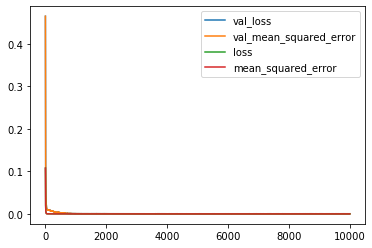

In [88]:
# to plot make data frame out of dict history.history and use .plot() method
pd.DataFrame(history.history).plot()
#pyplot.show()


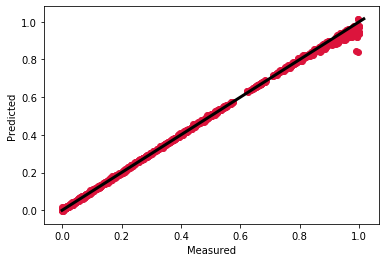

In [89]:
yhat=model.predict(X_test.reshape(X_test.shape[0], k, n_features))
#plt.gca().spines['top'].set_visible(False)

fig, ax = plt.subplots()
#plt.gca().spines['right'].set_visible(False)
ax.scatter(y_test, yhat,  c='crimson')
ax.plot([y_test.min(), yhat.max()], [y_test.min(),  yhat.max()], 'k', lw=3)
#plt.plot(y_test, yhat, zorder=1)  
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [93]:
yhat.shape

(131, 10)

In [94]:
df_nrm

entropyCH  availabilityCH  flowHPCH        T0        T1        T2  \
0     0.457054        0.001057  0.004843  0.002320  0.001228  0.000000   
1     0.449065        0.002528  0.004843  0.002320  0.000000  0.001219   
2     0.459242        0.001991  0.004843  0.002320  0.001228  0.001219   
3     0.449880        0.001056  0.012107  0.002320  0.001228  0.000000   
4     0.362067        0.002529  0.009685  0.002320  0.001228  0.001219   
..         ...             ...       ...       ...       ...       ...   
653   0.280838        0.996551  0.992736  0.995339  0.992572  0.993856   
654   0.285040        0.997535  0.995157  0.990677  0.993810  0.995086   
655   0.281889        0.998536  0.990315  0.990677  0.995049  0.996315   
656   0.271111        1.000000  0.992736  0.995339  0.997523  0.998771   
657   0.279486        0.999614  0.987893  1.000000  1.000000  1.000000   

           T3        T4        T5        T6        T7        T8        T9  
0    0.002437  0.002434  0.002390  0.000000  0.013214  0.018150  0.021969  
1    0.001217  0.002434  0.001197  0.000000  0.013214  0.019359  0.021969  
2    0.001217  0.002434  0.002390  0.003606  0.012014  0.016941  0.020749  
3    0.001217  0.001219  0.000000  0.004811  0.012014  0.018150  0.020749  
4    0.000000  0.002434  0.007167  0.004811  0.013214  0.019359  0.023188  
..        ...       ...       ...       ...       ...       ...       ...  
653  0.996317  0.995095  0.990365  0.998787  1.000000  0.998780  0.997539  
654  0.997545  0.995095  0.993977  1.000000  0.998789  1.000000  0.997539  
655  0.997545  0.997548  0.992773  1.000000  0.997578  0.998780  0.998770  
656  0.998772  1.000000  0.998796  0.996362  0.990309  0.995117  1.000000  
657  1.000000  0.998774  1.000000  0.991512  0.983043  0.990238  1.000000  

[658 rows x 13 columns]

In [103]:
yhat.shape

(131, 10)

In [105]:
y_train.shape

(524, 10)

In [109]:
def unscaleFunction(df_original, y_values, cut_arr,  scaler):
    df_toadd = df_original[[ 'entropyCH', 'availabilityCH', 'flowHPCH']]
    df_toadd_short = df_toadd[:cut_arr.shape[0]]
    yhat_copy = y_values.copy()
    yhat_copy_df = pd.DataFrame(yhat_copy)
    yhat_copy_new_df = pd.concat([df_toadd_short, yhat_copy_df], axis =1)
    
    return scaler.inverse_transform(yhat_copy_new_df)

y_pred_unscaled, y_test_unscaled = unscaleFunction(df_nrm, yhat, y_test, scaler), unscaleFunction(df_nrm, y_test,y_test, scaler)

In [110]:
y_pred_unscaled

array([[ 5.46094852e+01,  3.97521566e+04, -4.63734000e-01, ...,
         2.53124461e+01,  2.56017880e+01,  2.56043800e+01],
       [ 5.21497005e+01,  3.98109688e+04, -4.63734000e-01, ...,
         2.53617091e+01,  2.57668339e+01,  2.57948945e+01],
       [ 5.52828524e+01,  3.97895278e+04, -4.63734000e-01, ...,
         2.52415448e+01,  2.55601361e+01,  2.57777564e+01],
       ...,
       [ 1.98427713e+02,  4.58479949e+04,  9.51424000e+02, ...,
         5.22555473e+01,  5.22736551e+01,  5.20016913e+01],
       [ 1.95828379e+02,  4.59168602e+04,  9.51424000e+02, ...,
         5.24518724e+01,  5.13190340e+01,  5.12634070e+01],
       [ 1.97297022e+02,  4.60174741e+04,  9.46700000e+02, ...,
         5.24955303e+01,  5.13521921e+01,  5.12590671e+01]])

In [111]:
def array2df(arr):
    y_unscaled_df = pd.DataFrame(arr)
    y_unscaled_df =y_unscaled_df.iloc[:,3:]
    column_name  = [i  for i in range(0, y_unscaled_df.shape[1])]
    y_unscaled_df.columns  = column_name
    return y_unscaled_df

y_pred_unscaled_df, y_test_unscaled_df = array2df(y_pred_unscaled), array2df(y_test_unscaled)

In [112]:
y_pred_unscaled_df

0          1          2          3          4          5  \
0    22.673986  23.154122  23.376011  23.805736  23.988656  24.536317   
1    22.571987  23.071397  23.320675  23.809179  24.185110  24.610679   
2    22.557662  22.840853  23.335009  23.866986  24.189168  24.857740   
3    22.513777  23.018778  23.426734  24.084230  24.479189  24.881342   
4    22.586495  23.322159  23.687666  24.281910  24.696852  24.941829   
..         ...        ...        ...        ...        ...        ...   
126  35.991774  48.706152  49.611123  50.576425  51.065175  51.524596   
127  36.020145  48.785717  49.720731  50.666588  51.186878  51.613673   
128  36.010330  48.799526  49.739237  50.709421  51.232667  51.659222   
129  34.850527  48.280311  50.153661  49.889770  52.222353  51.728452   
130  34.864219  48.310946  50.212019  49.907255  52.245593  51.709531   

             6          7          8          9  
0    24.915688  25.312446  25.601788  25.604380  
1    24.937747  25.361709  25.766834  25.794894  
2    25.183606  25.241545  25.560136  25.777756  
3    24.960130  25.115785  25.196988  25.075068  
4    25.064438  25.232110  25.267147  25.090019  
..         ...        ...        ...        ...  
126  51.887819  52.128725  52.162702  51.885700  
127  51.978496  52.231997  52.256524  51.968309  
128  52.010619  52.255547  52.273655  52.001691  
129  52.142420  52.451872  51.319034  51.263407  
130  52.138055  52.495530  51.352192  51.259067  

[131 rows x 10 columns]

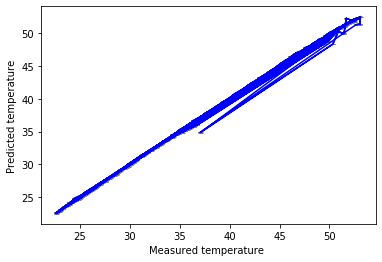

In [113]:
##### plt.scatter(y_test_unscaled , y_pred_unscaled,  color='#0000CC')
fig, ax = plt.subplots()
dy = 0.04
plt.errorbar(np.array(y_test_unscaled_df), np.array(y_pred_unscaled_df), yerr=dy, fmt='b', color='r',
             ecolor='gray', elinewidth=4, capsize=2);

ax.set_xlabel('Measured temperature ')
ax.set_ylabel('Predicted temperature')
fig.savefig(fileNameForDLFigures(midfix = 'PredAgainstTested_Charging'))

In [114]:
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x432 with 0 Axes>

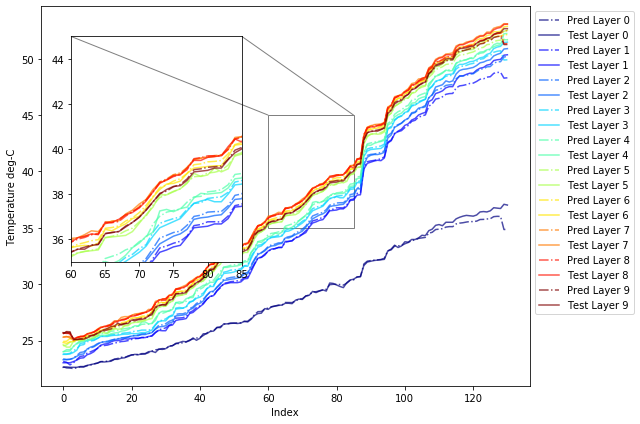

(<Figure size 648x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f79d816ab10>)

In [115]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
def plotPredAndActualTem(yhat, ytest, alpha =0.7, scm=None):
    cmap_name = "jet"
    fig = plt.figure(figsize=(6,6))
    #ax = fig.add_subplot()
    fig, ax = plt.subplots(1, figsize=(9,6))
    #fig.subplots_adjust(left=0.2, bottom=0.2)
    
    tem_Pred_df = pd.DataFrame(yhat).iloc[:,0:10]
    tem_test_df =  pd.DataFrame(ytest).iloc[:,0:10]
    
   # len_df = len(tem_Pred_df)
    
    tem_PredZoom_df = tem_Pred_df.iloc[20:40, :]
    tem_TestZoom_df = tem_test_df.iloc[20:40, :]
    
    

    scm = create_color_step_obj(cmap_name, 10)
    
    #########################
    axins = zoomed_inset_axes(ax, 2,  loc=2, borderpad=3)
    mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")
    axins.set_xlim([60,85])
    axins.set_ylim([35,45])
    for i in range (0,  tem_Pred_df.shape[1]):
        ax.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        ax.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))
        


        axins.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        
        axins.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))

        #plt.show()
 
        '''
        sub_axes = plt.axes([.2, .55, .3, .3]) 
        sub_axes.plot(tem_PredZoom_df.index, tem_PredZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i)) 
        sub_axes.plot( tem_TestZoom_df.index,  tem_TestZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot') 
        '''
    
    
        #ax.legend(bbox_to_anchor=(0.8,0.8))
        ax.set_ylabel('Temperature deg-C')
        ax.set_xlabel('Index')
        #ax.legend(bbox_to_anchor=(0.4,0.8))
    #mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.1")
    fig.canvas.draw()
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    fig.savefig(fileNameForDLFigures(midfix = 'Tem_Charging'))
    return fig, ax
plotPredAndActualTem(y_pred_unscaled_df, y_test_unscaled_df, alpha =0.7, scm=None)

######################################################
#####Discharging Data with availability entropy exergy
######################################################

In [119]:
df_gross.columns

Index(['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
       'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ'],
      dtype='object')

In [127]:
def DisAlltem_df(df):
    #df_tem = df[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    ##df_tem = df_tem[df_tem>0]
    #df_charging = df.loc[df_gross['Heat_Capacity_kW']>0.2]
    disAvailability = df[['DisTotalTanksEnergyForAvailability_kJ']].dropna()
    #chargeAvailability
    dischargeEntropy = df[['DisEntropy_kj/K']].dropna()
    #chargeEntropy
    len_tocut =  len(df_gross) -len(disAvailability)
    print (len_tocut)
    #df_tem = df_charging[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    df_all = df[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]
    df_extraFeatures = df[['flowLoad']]
    #print (df_extraFeatures)
    df_conc = pd.concat( [df_extraFeatures,df_all],  ignore_index=True, axis =1 )
    #df_chargeFilter = df_charging_all[(df_charging_all['nStratCharging']>0.000001)&\
    #                           (df_charging_all['nStratCharging']<1.1)]
    #df_charging_all.dropna()
    #indexed_tem = allTem.iloc[len_tocut:, :].reset_index(drop=True)
    indexed_df = df_conc.iloc[len_tocut:, :].reset_index(drop=True)
    print (indexed_df)
    df_conc_all = pd.concat( [dischargeEntropy,disAvailability ,indexed_df ],  ignore_index=True, axis =1 )
    #print ('concated is ', df_conc)
    return  df_conc_all 

allDisInput= DisAlltem_df(df_gross)

670
           0        1        2        3        4        5        6        7  \
0    290.115  37.5292  50.8993  51.3765  51.8880  52.3313  52.5359  52.4336   
1    312.208  37.2915  50.8652  51.3425  51.9903  52.3313  52.5700  52.4336   
2    332.723  36.9860  50.8652  51.3765  51.9221  52.3313  52.4677  52.4336   
3    333.512  37.3594  50.6266  51.3425  52.0244  52.3313  52.5359  52.4336   
4    326.411  37.5292  50.2516  51.3425  52.0244  52.3313  52.4336  52.4677   
..       ...      ...      ...      ...      ...      ...      ...      ...   
621  265.654  22.2852  24.2461  24.2461  24.4828  24.3137  24.4828  24.5166   
622  266.443  22.2852  24.2461  24.2799  24.4828  24.3475  24.4490  24.5504   
623  267.232  22.2852  24.2799  24.2799  24.4828  24.3813  24.5843  24.5843   
624  267.232  22.2852  24.2799  24.2799  24.4828  24.3813  24.7872  24.5504   
625  271.177  22.2514  24.2799  24.2799  24.5166  24.3813  24.5166  24.4490   

           8        9       10  
0    52.6042  

In [130]:
allDisInput

0             1        2        3        4        5        6  \
0     23.734946  79769.781970  290.115  37.5292  50.8993  51.3765  51.8880   
1     36.880383  79740.380938  312.208  37.2915  50.8652  51.3425  51.9903   
2     54.374602  79709.224371  332.723  36.9860  50.8652  51.3765  51.9221   
3     63.318973  79643.287819  333.512  37.3594  50.6266  51.3425  52.0244   
4     66.200057  79680.199209  326.411  37.5292  50.2516  51.3425  52.0244   
..          ...           ...      ...      ...      ...      ...      ...   
621  949.165576  43129.535238  265.654  22.2852  24.2461  24.2461  24.4828   
622  938.242927  43156.627376  266.443  22.2852  24.2461  24.2799  24.4828   
623  927.850874  43140.974345  267.232  22.2852  24.2799  24.2799  24.4828   
624  922.728072  43132.387203  267.232  22.2852  24.2799  24.2799  24.4828   
625  916.739394  43113.348195  271.177  22.2514  24.2799  24.2799  24.5166   

           7        8        9       10       11       12  
0    52.3313  52.5359  52.4336  52.6042  52.7065  52.5359  
1    52.3313  52.5700  52.4336  52.6042  52.6724  52.5359  
2    52.3313  52.4677  52.4336  52.6042  52.6724  52.5359  
3    52.3313  52.5359  52.4336  52.6042  52.6724  52.5018  
4    52.3313  52.4336  52.4677  52.6042  52.6724  52.5359  
..       ...      ...      ...      ...      ...      ...  
621  24.3137  24.4828  24.5166  24.7196  25.5991  45.9600  
622  24.3475  24.4490  24.5504  24.7196  25.4637  45.9260  
623  24.3813  24.5843  24.5843  24.6857  25.3961  45.7218  
624  24.3813  24.7872  24.5504  24.6857  25.3284  45.4835  
625  24.3813  24.5166  24.4490  24.6857  25.3284  45.2113  

[626 rows x 13 columns]

In [131]:
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap
scm = create_color_step_obj('jet', 10)

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f79d86be110>)

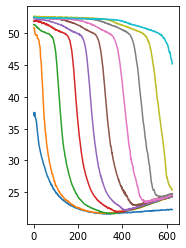

In [132]:
fig = plt.figure(1)
ax = fig.add_subplot(121)

#fig.canvas.draw()
fig.show()
#fig.canvas.draw()
#plt.rcParams["figure.figsize"]=5,5
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 8
#fig_size[1] = 3

def plotObject(df, ax, fig, alpha =0.7, scm=None):
    #ax.clear()
    #df= df.iloc[:, 1:]
    df = df.iloc[:, 3:]
    for i in range (0, df.shape[1]):
        #print ('last shape[1] is:', df.shape[1])
        ax.plot(df.index, df.iloc[:, i],\
                label = 'Layer ' + str(i))
        
    #fig.canvas.draw()
    #ax.legend()
    #fig.show()
    #print ('df is :', df)
    #plt.legend(loc='upper left')
    return fig, ax
plotObject(allDisInput, ax, fig, alpha =0.7, scm=None)

In [136]:
"""
Normalization should be done BEFORE one prepares the data for ANN or LSTM input.
Normalization is done feature-wise (that means column-wise).
"""

def normalize(X):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(X)
    scaled_data = scaler.transform(X)
    return scaled_data, scaler

df_nrm_dis, scaler = normalize(allDisInput)
df_nrm_dis = pd.DataFrame(df_nrm_dis)
#df_nrm.columns = chargingIn_df.columns

df_nrm_dis.columns = ['entropy', 'availability', 'flowLoad', 'T0', 'T1', 'T2', 'T3', \
                  'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
df_nrm_dis

entropy  availability  flowLoad        T0        T1        T2        T3  \
0    0.000000      1.000000  0.444447  1.000000  1.000000  1.000000  0.993228   
1    0.012996      0.999198  0.727274  0.985101  0.998834  0.998857  0.996614   
2    0.030290      0.998348  0.989900  0.965951  0.998834  1.000000  0.994357   
3    0.039133      0.996549  1.000000  0.989357  0.990679  0.998857  0.997743   
4    0.041981      0.997556  0.909096  1.000000  0.977861  0.998857  0.997743   
..        ...           ...       ...       ...       ...       ...       ...   
621  0.914880      0.000448  0.131306  0.044485  0.088976  0.087548  0.086162   
622  0.904081      0.001187  0.141407  0.044485  0.088976  0.088684  0.086162   
623  0.893808      0.000760  0.151507  0.044485  0.090131  0.088684  0.086162   
624  0.888743      0.000526  0.151507  0.044485  0.090131  0.088684  0.086162   
625  0.882823      0.000006  0.202010  0.042366  0.090131  0.088684  0.087280   

           T4        T5        T6        T7        T8        T9  
0    1.000000  0.998850  0.998827  0.998798  1.000000  1.000000  
1    1.000000  1.000000  0.998827  0.998798  0.998754  1.000000  
2    1.000000  0.996549  0.998827  0.998798  0.998754  1.000000  
3    1.000000  0.998850  0.998827  0.998798  0.998754  0.995344  
4    1.000000  0.995399  1.000000  0.998798  0.998754  1.000000  
..        ...       ...       ...       ...       ...       ...  
621  0.072729  0.052472  0.038391  0.015505  0.009887  0.102217  
622  0.073847  0.051332  0.039553  0.015505  0.004942  0.097575  
623  0.074966  0.055896  0.040720  0.014310  0.002473  0.069697  
624  0.074966  0.062741  0.039553  0.014310  0.000000  0.037162  
625  0.074966  0.053612  0.036065  0.014310  0.000000  0.000000  

[626 rows x 13 columns]

In [134]:
k =3
n_features = 13
#out_features = y_train.shape[1]
#out_features
epochs =10000
batch_size = 50

In [135]:
def flatten_row_wise(df):
    """Take row by row and attach to one flat single row."""
    #arr = np.ndarray.flatten(np.array(df))
    #append(arr,)
    
    return np.ndarray.flatten(np.array(df))
def prepare_df(df, m, y_df):
    n_rows, n_cols = df.shape
    new_rows = np.array([np.append(flatten_row_wise(df.iloc[(i-k):i]), \
                                   m.iloc[i-k:i, :]) for i in range(k, n_rows)])
    new_ys = np.array([row for row in y_df.iloc[(k):, :].itertuples(index=False)])
    # idxs = [x[0] for x in new_ys]
    # new_ys = [x[1] for x in new_ys]
    return new_rows, new_ys

In [138]:
X_dis = df_nrm_dis.iloc[:, 3:]
y_dis =df_nrm_dis.iloc[:, 3:]
mh_dis = df_nrm_dis[[ 'entropy', 'availability', 'flowLoad']]
X_dis

T0        T1        T2        T3        T4        T5        T6  \
0    1.000000  1.000000  1.000000  0.993228  1.000000  0.998850  0.998827   
1    0.985101  0.998834  0.998857  0.996614  1.000000  1.000000  0.998827   
2    0.965951  0.998834  1.000000  0.994357  1.000000  0.996549  0.998827   
3    0.989357  0.990679  0.998857  0.997743  1.000000  0.998850  0.998827   
4    1.000000  0.977861  0.998857  0.997743  1.000000  0.995399  1.000000   
..        ...       ...       ...       ...       ...       ...       ...   
621  0.044485  0.088976  0.087548  0.086162  0.072729  0.052472  0.038391   
622  0.044485  0.088976  0.088684  0.086162  0.073847  0.051332  0.039553   
623  0.044485  0.090131  0.088684  0.086162  0.074966  0.055896  0.040720   
624  0.044485  0.090131  0.088684  0.086162  0.074966  0.062741  0.039553   
625  0.042366  0.090131  0.088684  0.087280  0.074966  0.053612  0.036065   

           T7        T8        T9  
0    0.998798  1.000000  1.000000  
1    0.998798  0.998754  1.000000  
2    0.998798  0.998754  1.000000  
3    0.998798  0.998754  0.995344  
4    0.998798  0.998754  1.000000  
..        ...       ...       ...  
621  0.015505  0.009887  0.102217  
622  0.015505  0.004942  0.097575  
623  0.014310  0.002473  0.069697  
624  0.014310  0.000000  0.037162  
625  0.014310  0.000000  0.000000  

[626 rows x 10 columns]

In [140]:
X_dis_df1, y_dis_df1 = prepare_df(X_dis, mh_dis, y_dis)

In [141]:
X_dis_df1.shape

(623, 39)

In [142]:
y_dis_df1.shape

(623, 10)

In [143]:
def train_test_split_indexes(X, y, test_size=0.2, random_state=42, shuffle=False):
    X_train_indexes, X_test_indexes, y_train_indexes, y_test_indexes = train_test_split(pd.DataFrame(list(range(X.shape[0]))),
                                                                                        pd.DataFrame(list(range(y.shape[0]))),
                                                                                        test_size=test_size,
                                                                                        random_state=random_state,
                                                                                        shuffle=shuffle)
    train_indexes, test_indexes = [x for x in X_train_indexes.iloc[:, 0]]  , [x for x in X_test_indexes.iloc[:, 0]]
    return sorted(train_indexes), sorted(test_indexes)


In [144]:
def splitter(X, y, train_indexes, test_indexes):
    X_train = X.iloc[train_indexes, :]
    y_train = y.iloc[train_indexes, :]
    X_test = X.iloc[test_indexes, :]
    y_test = y.iloc[test_indexes, :]
    return X_train, X_test, y_train, y_test


In [146]:
train_indexes, test_indexes = train_test_split_indexes(X_dis_df1, y_dis_df1, test_size=0.2, random_state=42, shuffle=True)
X_dis_train, X_dis_test, y_dis_train, y_dis_test = splitter(pd.DataFrame(X_dis_df1), pd.DataFrame(y_dis_df1), train_indexes, test_indexes)



In [148]:
X_dis_train = np.array(X_dis_train)

X_dis_test = np.array(X_dis_test)

y_dis_train = np.array(y_dis_train)

y_dis_test = np.array(y_dis_test)

In [149]:
X_dis_train.shape, y_dis_train.shape

((498, 39), (498, 10))

In [151]:
def create_model_dis(time_steps, n_features):
    model = Sequential()
    model.add(LSTM(10, input_shape = (time_steps, n_features)))
    #model.add(Dropout(0.2))
    
    #model.add(Dense(3))
    model.add(Dense(out_features, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

#So the val loss depends on the number of LSRTM nurons, 8 is reducing the val loss untill 0.208 thn
#increases
#Dense layer dosent work

In [152]:

model_dis = create_model_dis(k, n_features)
model_fpath=modelDir(ModelName='added_features1_dis.h5')
callbacks_list = [ ModelCheckpoint(filepath=model_fpath,
                                   monitor="val_loss",
                                   save_best_only=True,                 
                                   mode="min")]

In [153]:
history_dis = model_dis.fit(X_dis_train.reshape(X_dis_train.shape[0], k, n_features),
                    y_dis_train.reshape(y_dis_train.shape[0], out_features),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.3,
                    callbacks = callbacks_list,
                    verbose=1)

Train on 348 samples, validate on 150 samples
Epoch 1/10000
348/348 [==============================] - 1s 3ms/step - loss: 0.6466 - mean_squared_error: 0.6466 - val_loss: 0.1283 - val_mean_squared_error: 0.1283
Epoch 2/10000
348/348 [==============================] - 0s 158us/step - loss: 0.5867 - mean_squared_error: 0.5867 - val_loss: 0.1211 - val_mean_squared_error: 0.1211
Epoch 3/10000
348/348 [==============================] - 0s 127us/step - loss: 0.5309 - mean_squared_error: 0.5309 - val_loss: 0.1144 - val_mean_squared_error: 0.1144
Epoch 4/10000
348/348 [==============================] - 0s 233us/step - loss: 0.4788 - mean_squared_error: 0.4788 - val_loss: 0.1087 - val_mean_squared_error: 0.1087
Epoch 5/10000
348/348 [==============================] - 0s 199us/step - loss: 0.4261 - mean_squared_error: 0.4261 - val_loss: 0.1031 - val_mean_squared_error: 0.1031
Epoch 6/10000
348/348 [==============================] - 0s 172us/step - loss: 0.3722 - mean_squared_error: 0.3722 - val_

348/348 [==============================] - 0s 168us/step - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0704 - val_mean_squared_error: 0.0704
Epoch 50/10000
348/348 [==============================] - 0s 156us/step - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0706 - val_mean_squared_error: 0.0706
Epoch 51/10000
348/348 [==============================] - 0s 162us/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0708 - val_mean_squared_error: 0.0708
Epoch 52/10000
348/348 [==============================] - 0s 155us/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0712 - val_mean_squared_error: 0.0712
Epoch 53/10000
348/348 [==============================] - 0s 155us/step - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0713 - val_mean_squared_error: 0.0713
Epoch 54/10000
348/348 [==============================] - 0s 159us/step - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0711 - val_mean_squared_error: 0.0711
Epoch 5

Epoch 98/10000
348/348 [==============================] - 0s 172us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0585 - val_mean_squared_error: 0.0585
Epoch 99/10000
348/348 [==============================] - 0s 167us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0584 - val_mean_squared_error: 0.0584
Epoch 100/10000
348/348 [==============================] - 0s 277us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0582 - val_mean_squared_error: 0.0582
Epoch 101/10000
348/348 [==============================] - 0s 170us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0580 - val_mean_squared_error: 0.0580
Epoch 102/10000
348/348 [==============================] - 0s 264us/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0578 - val_mean_squared_error: 0.0578
Epoch 103/10000
348/348 [==============================] - 0s 182us/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0574 - val_mean_squared_er

348/348 [==============================] - 0s 160us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0527 - val_mean_squared_error: 0.0527
Epoch 147/10000
348/348 [==============================] - 0s 159us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0526 - val_mean_squared_error: 0.0526
Epoch 148/10000
348/348 [==============================] - 0s 150us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0525 - val_mean_squared_error: 0.0525
Epoch 149/10000
348/348 [==============================] - 0s 172us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0524 - val_mean_squared_error: 0.0524
Epoch 150/10000
348/348 [==============================] - 0s 209us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0524 - val_mean_squared_error: 0.0524
Epoch 151/10000
348/348 [==============================] - 0s 179us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0524 - val_mean_squared_error: 0.0524
Ep

348/348 [==============================] - 0s 307us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 195/10000
348/348 [==============================] - 0s 340us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 196/10000
348/348 [==============================] - 0s 205us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 197/10000
348/348 [==============================] - 0s 198us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 198/10000
348/348 [==============================] - 0s 372us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 199/10000
348/348 [==============================] - 0s 222us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Ep

348/348 [==============================] - 0s 239us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 243/10000
348/348 [==============================] - 0s 192us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 244/10000
348/348 [==============================] - 0s 261us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 245/10000
348/348 [==============================] - 0s 245us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 246/10000
348/348 [==============================] - 0s 197us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 247/10000
348/348 [==============================] - 0s 156us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Ep

348/348 [==============================] - 0s 239us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 291/10000
348/348 [==============================] - 0s 307us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 292/10000
348/348 [==============================] - 0s 225us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 293/10000
348/348 [==============================] - 0s 257us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 294/10000
348/348 [==============================] - 0s 394us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 295/10000
348/348 [==============================] - 0s 330us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Ep

348/348 [==============================] - 0s 309us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 339/10000
348/348 [==============================] - 0s 359us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 340/10000
348/348 [==============================] - 0s 399us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 341/10000
348/348 [==============================] - 0s 214us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 342/10000
348/348 [==============================] - 0s 184us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 343/10000
348/348 [==============================] - 0s 188us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Ep

348/348 [==============================] - 0s 285us/step - loss: 8.5908e-04 - mean_squared_error: 8.5908e-04 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 386/10000
348/348 [==============================] - 0s 271us/step - loss: 8.5544e-04 - mean_squared_error: 8.5544e-04 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 387/10000
348/348 [==============================] - 0s 253us/step - loss: 8.5299e-04 - mean_squared_error: 8.5299e-04 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 388/10000
348/348 [==============================] - 0s 208us/step - loss: 8.4359e-04 - mean_squared_error: 8.4359e-04 - val_loss: 0.0387 - val_mean_squared_error: 0.0387
Epoch 389/10000
348/348 [==============================] - 0s 198us/step - loss: 8.3478e-04 - mean_squared_error: 8.3478e-04 - val_loss: 0.0387 - val_mean_squared_error: 0.0387
Epoch 390/10000
348/348 [==============================] - 0s 245us/step - loss: 8.3560e-04 - mean_squared_error: 8.3560e-04 - val_

348/348 [==============================] - 0s 153us/step - loss: 6.3515e-04 - mean_squared_error: 6.3515e-04 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
Epoch 432/10000
348/348 [==============================] - 0s 139us/step - loss: 6.2712e-04 - mean_squared_error: 6.2712e-04 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 433/10000
348/348 [==============================] - 0s 227us/step - loss: 6.2182e-04 - mean_squared_error: 6.2182e-04 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 434/10000
348/348 [==============================] - 0s 287us/step - loss: 6.2302e-04 - mean_squared_error: 6.2302e-04 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 435/10000
348/348 [==============================] - 0s 320us/step - loss: 6.2104e-04 - mean_squared_error: 6.2103e-04 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
Epoch 436/10000
348/348 [==============================] - 0s 315us/step - loss: 6.1987e-04 - mean_squared_error: 6.1987e-04 - val_

348/348 [==============================] - 0s 223us/step - loss: 4.6052e-04 - mean_squared_error: 4.6052e-04 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 478/10000
348/348 [==============================] - 0s 189us/step - loss: 4.5706e-04 - mean_squared_error: 4.5706e-04 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 479/10000
348/348 [==============================] - 0s 192us/step - loss: 4.6005e-04 - mean_squared_error: 4.6005e-04 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 480/10000
348/348 [==============================] - 0s 207us/step - loss: 4.5134e-04 - mean_squared_error: 4.5134e-04 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 481/10000
348/348 [==============================] - 0s 340us/step - loss: 4.5484e-04 - mean_squared_error: 4.5484e-04 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 482/10000
348/348 [==============================] - 0s 222us/step - loss: 4.5646e-04 - mean_squared_error: 4.5646e-04 - val_

348/348 [==============================] - 0s 182us/step - loss: 3.4964e-04 - mean_squared_error: 3.4964e-04 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 524/10000
348/348 [==============================] - 0s 277us/step - loss: 3.5114e-04 - mean_squared_error: 3.5114e-04 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 525/10000
348/348 [==============================] - 0s 281us/step - loss: 3.4760e-04 - mean_squared_error: 3.4760e-04 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 526/10000
348/348 [==============================] - 0s 210us/step - loss: 3.4189e-04 - mean_squared_error: 3.4189e-04 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 527/10000
348/348 [==============================] - 0s 274us/step - loss: 3.3811e-04 - mean_squared_error: 3.3811e-04 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 528/10000
348/348 [==============================] - 0s 242us/step - loss: 3.3234e-04 - mean_squared_error: 3.3234e-04 - val_

348/348 [==============================] - 0s 280us/step - loss: 2.6950e-04 - mean_squared_error: 2.6950e-04 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 570/10000
348/348 [==============================] - 0s 304us/step - loss: 2.6325e-04 - mean_squared_error: 2.6325e-04 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 571/10000
348/348 [==============================] - 0s 214us/step - loss: 2.6019e-04 - mean_squared_error: 2.6019e-04 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 572/10000
348/348 [==============================] - 0s 271us/step - loss: 2.6020e-04 - mean_squared_error: 2.6020e-04 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 573/10000
348/348 [==============================] - 0s 214us/step - loss: 2.6272e-04 - mean_squared_error: 2.6272e-04 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 574/10000
348/348 [==============================] - 0s 284us/step - loss: 2.6238e-04 - mean_squared_error: 2.6238e-04 - val_

348/348 [==============================] - 0s 208us/step - loss: 2.1340e-04 - mean_squared_error: 2.1340e-04 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 616/10000
348/348 [==============================] - 0s 354us/step - loss: 2.1121e-04 - mean_squared_error: 2.1121e-04 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 617/10000
348/348 [==============================] - 0s 345us/step - loss: 2.1111e-04 - mean_squared_error: 2.1111e-04 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 618/10000
348/348 [==============================] - 0s 204us/step - loss: 2.1463e-04 - mean_squared_error: 2.1463e-04 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 619/10000
348/348 [==============================] - 0s 198us/step - loss: 2.1387e-04 - mean_squared_error: 2.1387e-04 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 620/10000
348/348 [==============================] - 0s 377us/step - loss: 2.1214e-04 - mean_squared_error: 2.1214e-04 - val_

348/348 [==============================] - 0s 241us/step - loss: 1.8218e-04 - mean_squared_error: 1.8218e-04 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 662/10000
348/348 [==============================] - 0s 225us/step - loss: 1.8229e-04 - mean_squared_error: 1.8229e-04 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 663/10000
348/348 [==============================] - 0s 214us/step - loss: 1.8089e-04 - mean_squared_error: 1.8089e-04 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 664/10000
348/348 [==============================] - 0s 216us/step - loss: 1.8103e-04 - mean_squared_error: 1.8103e-04 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 665/10000
348/348 [==============================] - 0s 203us/step - loss: 1.7731e-04 - mean_squared_error: 1.7731e-04 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 666/10000
348/348 [==============================] - 0s 232us/step - loss: 1.7685e-04 - mean_squared_error: 1.7685e-04 - val_

348/348 [==============================] - 0s 281us/step - loss: 1.6592e-04 - mean_squared_error: 1.6592e-04 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 708/10000
348/348 [==============================] - 0s 227us/step - loss: 1.6026e-04 - mean_squared_error: 1.6026e-04 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 709/10000
348/348 [==============================] - 0s 260us/step - loss: 1.5893e-04 - mean_squared_error: 1.5893e-04 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 710/10000
348/348 [==============================] - 0s 211us/step - loss: 1.6101e-04 - mean_squared_error: 1.6101e-04 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 711/10000
348/348 [==============================] - 0s 217us/step - loss: 1.6362e-04 - mean_squared_error: 1.6362e-04 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 712/10000
348/348 [==============================] - 0s 187us/step - loss: 1.6120e-04 - mean_squared_error: 1.6120e-04 - val_

348/348 [==============================] - 0s 423us/step - loss: 1.5131e-04 - mean_squared_error: 1.5131e-04 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 754/10000
348/348 [==============================] - 0s 185us/step - loss: 1.4314e-04 - mean_squared_error: 1.4314e-04 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 755/10000
348/348 [==============================] - 0s 274us/step - loss: 1.4261e-04 - mean_squared_error: 1.4261e-04 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 756/10000
348/348 [==============================] - 0s 291us/step - loss: 1.4096e-04 - mean_squared_error: 1.4096e-04 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 757/10000
348/348 [==============================] - 0s 231us/step - loss: 1.4229e-04 - mean_squared_error: 1.4229e-04 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 758/10000
348/348 [==============================] - 0s 225us/step - loss: 1.4349e-04 - mean_squared_error: 1.4349e-04 - val_

348/348 [==============================] - 0s 204us/step - loss: 1.3093e-04 - mean_squared_error: 1.3093e-04 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 800/10000
348/348 [==============================] - 0s 241us/step - loss: 1.3030e-04 - mean_squared_error: 1.3030e-04 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 801/10000
348/348 [==============================] - 0s 314us/step - loss: 1.3036e-04 - mean_squared_error: 1.3036e-04 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 802/10000
348/348 [==============================] - 0s 458us/step - loss: 1.2925e-04 - mean_squared_error: 1.2925e-04 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 803/10000
348/348 [==============================] - 0s 330us/step - loss: 1.2958e-04 - mean_squared_error: 1.2958e-04 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 804/10000
348/348 [==============================] - 0s 287us/step - loss: 1.3077e-04 - mean_squared_error: 1.3077e-04 - val_

348/348 [==============================] - 0s 253us/step - loss: 1.2455e-04 - mean_squared_error: 1.2455e-04 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 846/10000
348/348 [==============================] - 0s 261us/step - loss: 1.2371e-04 - mean_squared_error: 1.2371e-04 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 847/10000
348/348 [==============================] - 0s 219us/step - loss: 1.2317e-04 - mean_squared_error: 1.2317e-04 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 848/10000
348/348 [==============================] - 0s 297us/step - loss: 1.2391e-04 - mean_squared_error: 1.2391e-04 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 849/10000
348/348 [==============================] - 0s 297us/step - loss: 1.2108e-04 - mean_squared_error: 1.2108e-04 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 850/10000
348/348 [==============================] - 0s 193us/step - loss: 1.2221e-04 - mean_squared_error: 1.2221e-04 - val_

348/348 [==============================] - 0s 286us/step - loss: 1.1472e-04 - mean_squared_error: 1.1472e-04 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 892/10000
348/348 [==============================] - 0s 263us/step - loss: 1.1684e-04 - mean_squared_error: 1.1684e-04 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 893/10000
348/348 [==============================] - 0s 276us/step - loss: 1.1599e-04 - mean_squared_error: 1.1599e-04 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 894/10000
348/348 [==============================] - 0s 238us/step - loss: 1.1490e-04 - mean_squared_error: 1.1490e-04 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 895/10000
348/348 [==============================] - 0s 209us/step - loss: 1.1528e-04 - mean_squared_error: 1.1528e-04 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 896/10000
348/348 [==============================] - 0s 228us/step - loss: 1.1738e-04 - mean_squared_error: 1.1738e-04 - val_

348/348 [==============================] - 0s 238us/step - loss: 1.1355e-04 - mean_squared_error: 1.1355e-04 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 938/10000
348/348 [==============================] - 0s 271us/step - loss: 1.0970e-04 - mean_squared_error: 1.0970e-04 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 939/10000
348/348 [==============================] - 0s 268us/step - loss: 1.0796e-04 - mean_squared_error: 1.0796e-04 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 940/10000
348/348 [==============================] - 0s 270us/step - loss: 1.0830e-04 - mean_squared_error: 1.0830e-04 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 941/10000
348/348 [==============================] - 0s 283us/step - loss: 1.0832e-04 - mean_squared_error: 1.0832e-04 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 942/10000
348/348 [==============================] - 0s 239us/step - loss: 1.1154e-04 - mean_squared_error: 1.1154e-04 - val_

348/348 [==============================] - 0s 154us/step - loss: 1.0132e-04 - mean_squared_error: 1.0132e-04 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 984/10000
348/348 [==============================] - 0s 186us/step - loss: 1.0242e-04 - mean_squared_error: 1.0242e-04 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 985/10000
348/348 [==============================] - 0s 170us/step - loss: 1.0270e-04 - mean_squared_error: 1.0270e-04 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 986/10000
348/348 [==============================] - 0s 160us/step - loss: 1.0235e-04 - mean_squared_error: 1.0235e-04 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 987/10000
348/348 [==============================] - 0s 160us/step - loss: 1.0626e-04 - mean_squared_error: 1.0626e-04 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 988/10000
348/348 [==============================] - 0s 150us/step - loss: 1.0567e-04 - mean_squared_error: 1.0567e-04 - val_

348/348 [==============================] - 0s 164us/step - loss: 9.9353e-05 - mean_squared_error: 9.9353e-05 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 1030/10000
348/348 [==============================] - 0s 148us/step - loss: 9.8817e-05 - mean_squared_error: 9.8817e-05 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 1031/10000
348/348 [==============================] - 0s 158us/step - loss: 9.7941e-05 - mean_squared_error: 9.7941e-05 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 1032/10000
348/348 [==============================] - 0s 225us/step - loss: 9.6857e-05 - mean_squared_error: 9.6857e-05 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 1033/10000
348/348 [==============================] - 0s 193us/step - loss: 9.7840e-05 - mean_squared_error: 9.7840e-05 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 1034/10000
348/348 [==============================] - 0s 273us/step - loss: 9.6728e-05 - mean_squared_error: 9.6728e-05 -

348/348 [==============================] - 0s 294us/step - loss: 9.6283e-05 - mean_squared_error: 9.6283e-05 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 1076/10000
348/348 [==============================] - 0s 237us/step - loss: 9.3674e-05 - mean_squared_error: 9.3674e-05 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 1077/10000
348/348 [==============================] - 0s 305us/step - loss: 9.2452e-05 - mean_squared_error: 9.2452e-05 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 1078/10000
348/348 [==============================] - 0s 275us/step - loss: 9.2795e-05 - mean_squared_error: 9.2795e-05 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 1079/10000
348/348 [==============================] - 0s 239us/step - loss: 9.2695e-05 - mean_squared_error: 9.2695e-05 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 1080/10000
348/348 [==============================] - 0s 168us/step - loss: 9.2649e-05 - mean_squared_error: 9.2649e-05 -

348/348 [==============================] - 0s 328us/step - loss: 9.2236e-05 - mean_squared_error: 9.2236e-05 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 1122/10000
348/348 [==============================] - 0s 378us/step - loss: 9.0192e-05 - mean_squared_error: 9.0192e-05 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 1123/10000
348/348 [==============================] - 0s 282us/step - loss: 9.4813e-05 - mean_squared_error: 9.4813e-05 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 1124/10000
348/348 [==============================] - 0s 239us/step - loss: 9.1687e-05 - mean_squared_error: 9.1687e-05 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 1125/10000
348/348 [==============================] - 0s 323us/step - loss: 9.3213e-05 - mean_squared_error: 9.3213e-05 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 1126/10000
348/348 [==============================] - 0s 347us/step - loss: 9.3162e-05 - mean_squared_error: 9.3162e-05 -

348/348 [==============================] - 0s 146us/step - loss: 8.4235e-05 - mean_squared_error: 8.4235e-05 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 1168/10000
348/348 [==============================] - 0s 237us/step - loss: 8.4940e-05 - mean_squared_error: 8.4940e-05 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 1169/10000
348/348 [==============================] - 0s 182us/step - loss: 8.5008e-05 - mean_squared_error: 8.5008e-05 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 1170/10000
348/348 [==============================] - 0s 213us/step - loss: 8.5602e-05 - mean_squared_error: 8.5602e-05 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 1171/10000
348/348 [==============================] - 0s 290us/step - loss: 8.6117e-05 - mean_squared_error: 8.6117e-05 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 1172/10000
348/348 [==============================] - 0s 212us/step - loss: 8.4628e-05 - mean_squared_error: 8.4628e-05 -

348/348 [==============================] - 0s 310us/step - loss: 8.0189e-05 - mean_squared_error: 8.0189e-05 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 1214/10000
348/348 [==============================] - 0s 378us/step - loss: 8.1968e-05 - mean_squared_error: 8.1968e-05 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 1215/10000
348/348 [==============================] - 0s 375us/step - loss: 8.0333e-05 - mean_squared_error: 8.0333e-05 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 1216/10000
348/348 [==============================] - 0s 316us/step - loss: 7.9174e-05 - mean_squared_error: 7.9174e-05 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 1217/10000
348/348 [==============================] - 0s 276us/step - loss: 7.9075e-05 - mean_squared_error: 7.9075e-05 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 1218/10000
348/348 [==============================] - 0s 220us/step - loss: 8.2132e-05 - mean_squared_error: 8.2132e-05 -

348/348 [==============================] - 0s 241us/step - loss: 8.6255e-05 - mean_squared_error: 8.6255e-05 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 1260/10000
348/348 [==============================] - 0s 234us/step - loss: 8.2554e-05 - mean_squared_error: 8.2554e-05 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 1261/10000
348/348 [==============================] - 0s 193us/step - loss: 7.9560e-05 - mean_squared_error: 7.9560e-05 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 1262/10000
348/348 [==============================] - 0s 205us/step - loss: 7.7196e-05 - mean_squared_error: 7.7196e-05 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 1263/10000
348/348 [==============================] - 0s 265us/step - loss: 7.7339e-05 - mean_squared_error: 7.7339e-05 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 1264/10000
348/348 [==============================] - 0s 266us/step - loss: 7.9601e-05 - mean_squared_error: 7.9601e-05 -

348/348 [==============================] - 0s 201us/step - loss: 7.5606e-05 - mean_squared_error: 7.5606e-05 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 1306/10000
348/348 [==============================] - 0s 269us/step - loss: 7.4928e-05 - mean_squared_error: 7.4928e-05 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 1307/10000
348/348 [==============================] - 0s 263us/step - loss: 7.4836e-05 - mean_squared_error: 7.4836e-05 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 1308/10000
348/348 [==============================] - 0s 220us/step - loss: 7.3377e-05 - mean_squared_error: 7.3377e-05 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 1309/10000
348/348 [==============================] - 0s 245us/step - loss: 7.1430e-05 - mean_squared_error: 7.1430e-05 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 1310/10000
348/348 [==============================] - 0s 327us/step - loss: 7.0779e-05 - mean_squared_error: 7.0779e-05 -

348/348 [==============================] - 0s 277us/step - loss: 6.9710e-05 - mean_squared_error: 6.9710e-05 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 1352/10000
348/348 [==============================] - 0s 214us/step - loss: 7.0194e-05 - mean_squared_error: 7.0194e-05 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 1353/10000
348/348 [==============================] - 0s 205us/step - loss: 7.0331e-05 - mean_squared_error: 7.0331e-05 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 1354/10000
348/348 [==============================] - 0s 255us/step - loss: 7.0570e-05 - mean_squared_error: 7.0570e-05 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 1355/10000
348/348 [==============================] - 0s 186us/step - loss: 6.8715e-05 - mean_squared_error: 6.8715e-05 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 1356/10000
348/348 [==============================] - 0s 215us/step - loss: 7.0114e-05 - mean_squared_error: 7.0114e-05 -

348/348 [==============================] - 0s 236us/step - loss: 6.5531e-05 - mean_squared_error: 6.5531e-05 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 1398/10000
348/348 [==============================] - 0s 294us/step - loss: 6.7326e-05 - mean_squared_error: 6.7326e-05 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 1399/10000
348/348 [==============================] - 0s 259us/step - loss: 6.8352e-05 - mean_squared_error: 6.8352e-05 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 1400/10000
348/348 [==============================] - 0s 196us/step - loss: 6.9121e-05 - mean_squared_error: 6.9121e-05 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 1401/10000
348/348 [==============================] - 0s 243us/step - loss: 6.7977e-05 - mean_squared_error: 6.7977e-05 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 1402/10000
348/348 [==============================] - 0s 211us/step - loss: 6.4673e-05 - mean_squared_error: 6.4673e-05 -

348/348 [==============================] - 0s 233us/step - loss: 6.5738e-05 - mean_squared_error: 6.5738e-05 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 1444/10000
348/348 [==============================] - 0s 209us/step - loss: 6.1621e-05 - mean_squared_error: 6.1621e-05 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 1445/10000
348/348 [==============================] - 0s 226us/step - loss: 6.2339e-05 - mean_squared_error: 6.2339e-05 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 1446/10000
348/348 [==============================] - 0s 207us/step - loss: 6.2564e-05 - mean_squared_error: 6.2564e-05 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 1447/10000
348/348 [==============================] - 0s 294us/step - loss: 6.0243e-05 - mean_squared_error: 6.0243e-05 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 1448/10000
348/348 [==============================] - 0s 207us/step - loss: 6.0982e-05 - mean_squared_error: 6.0982e-05 -

348/348 [==============================] - 0s 151us/step - loss: 5.5912e-05 - mean_squared_error: 5.5912e-05 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 1490/10000
348/348 [==============================] - 0s 362us/step - loss: 5.6461e-05 - mean_squared_error: 5.6461e-05 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 1491/10000
348/348 [==============================] - 0s 271us/step - loss: 6.1017e-05 - mean_squared_error: 6.1017e-05 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 1492/10000
348/348 [==============================] - 0s 233us/step - loss: 6.2644e-05 - mean_squared_error: 6.2644e-05 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 1493/10000
348/348 [==============================] - 0s 261us/step - loss: 5.5699e-05 - mean_squared_error: 5.5699e-05 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 1494/10000
348/348 [==============================] - 0s 240us/step - loss: 5.5312e-05 - mean_squared_error: 5.5312e-05 -

348/348 [==============================] - 0s 256us/step - loss: 4.9854e-05 - mean_squared_error: 4.9854e-05 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 1536/10000
348/348 [==============================] - 0s 227us/step - loss: 4.8911e-05 - mean_squared_error: 4.8911e-05 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 1537/10000
348/348 [==============================] - 0s 218us/step - loss: 4.9726e-05 - mean_squared_error: 4.9726e-05 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 1538/10000
348/348 [==============================] - 0s 242us/step - loss: 4.9276e-05 - mean_squared_error: 4.9276e-05 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 1539/10000
348/348 [==============================] - 0s 227us/step - loss: 4.8228e-05 - mean_squared_error: 4.8228e-05 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 1540/10000
348/348 [==============================] - 0s 200us/step - loss: 4.7563e-05 - mean_squared_error: 4.7563e-05 -

348/348 [==============================] - 0s 207us/step - loss: 4.6713e-05 - mean_squared_error: 4.6713e-05 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 1582/10000
348/348 [==============================] - 0s 212us/step - loss: 5.0495e-05 - mean_squared_error: 5.0495e-05 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 1583/10000
348/348 [==============================] - 0s 253us/step - loss: 5.0152e-05 - mean_squared_error: 5.0152e-05 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 1584/10000
348/348 [==============================] - 0s 242us/step - loss: 4.5190e-05 - mean_squared_error: 4.5190e-05 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 1585/10000
348/348 [==============================] - 0s 233us/step - loss: 4.5858e-05 - mean_squared_error: 4.5858e-05 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 1586/10000
348/348 [==============================] - 0s 261us/step - loss: 4.3524e-05 - mean_squared_error: 4.3524e-05 -

348/348 [==============================] - 0s 243us/step - loss: 4.0389e-05 - mean_squared_error: 4.0389e-05 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 1628/10000
348/348 [==============================] - 0s 183us/step - loss: 3.9976e-05 - mean_squared_error: 3.9976e-05 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 1629/10000
348/348 [==============================] - 0s 170us/step - loss: 3.9715e-05 - mean_squared_error: 3.9715e-05 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 1630/10000
348/348 [==============================] - 0s 207us/step - loss: 4.0010e-05 - mean_squared_error: 4.0010e-05 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 1631/10000
348/348 [==============================] - 0s 197us/step - loss: 3.9826e-05 - mean_squared_error: 3.9826e-05 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 1632/10000
348/348 [==============================] - 0s 209us/step - loss: 4.1961e-05 - mean_squared_error: 4.1961e-05 -

348/348 [==============================] - 0s 202us/step - loss: 4.3719e-05 - mean_squared_error: 4.3719e-05 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 1674/10000
348/348 [==============================] - 0s 219us/step - loss: 5.0605e-05 - mean_squared_error: 5.0605e-05 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 1675/10000
348/348 [==============================] - 0s 266us/step - loss: 3.8746e-05 - mean_squared_error: 3.8746e-05 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 1676/10000
348/348 [==============================] - 0s 241us/step - loss: 4.0103e-05 - mean_squared_error: 4.0103e-05 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 1677/10000
348/348 [==============================] - 0s 188us/step - loss: 3.8723e-05 - mean_squared_error: 3.8723e-05 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 1678/10000
348/348 [==============================] - 0s 260us/step - loss: 3.5933e-05 - mean_squared_error: 3.5933e-05 -

348/348 [==============================] - 0s 223us/step - loss: 3.2805e-05 - mean_squared_error: 3.2805e-05 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 1720/10000
348/348 [==============================] - 0s 240us/step - loss: 3.1273e-05 - mean_squared_error: 3.1273e-05 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 1721/10000
348/348 [==============================] - 0s 300us/step - loss: 3.1152e-05 - mean_squared_error: 3.1152e-05 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 1722/10000
348/348 [==============================] - 0s 278us/step - loss: 3.2503e-05 - mean_squared_error: 3.2503e-05 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 1723/10000
348/348 [==============================] - 0s 286us/step - loss: 3.2096e-05 - mean_squared_error: 3.2096e-05 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 1724/10000
348/348 [==============================] - 0s 251us/step - loss: 3.1005e-05 - mean_squared_error: 3.1005e-05 -

348/348 [==============================] - 0s 170us/step - loss: 3.1252e-05 - mean_squared_error: 3.1252e-05 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 1766/10000
348/348 [==============================] - 0s 173us/step - loss: 2.8190e-05 - mean_squared_error: 2.8190e-05 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 1767/10000
348/348 [==============================] - 0s 198us/step - loss: 2.8784e-05 - mean_squared_error: 2.8784e-05 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 1768/10000
348/348 [==============================] - 0s 158us/step - loss: 2.9563e-05 - mean_squared_error: 2.9563e-05 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 1769/10000
348/348 [==============================] - 0s 298us/step - loss: 3.0273e-05 - mean_squared_error: 3.0273e-05 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 1770/10000
348/348 [==============================] - 0s 281us/step - loss: 2.8469e-05 - mean_squared_error: 2.8469e-05 -

348/348 [==============================] - 0s 324us/step - loss: 2.6732e-05 - mean_squared_error: 2.6732e-05 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 1812/10000
348/348 [==============================] - 0s 249us/step - loss: 2.7080e-05 - mean_squared_error: 2.7080e-05 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 1813/10000
348/348 [==============================] - 0s 168us/step - loss: 2.5068e-05 - mean_squared_error: 2.5068e-05 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 1814/10000
348/348 [==============================] - 0s 269us/step - loss: 2.9050e-05 - mean_squared_error: 2.9050e-05 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 1815/10000
348/348 [==============================] - 0s 283us/step - loss: 2.8472e-05 - mean_squared_error: 2.8472e-05 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 1816/10000
348/348 [==============================] - 0s 210us/step - loss: 2.9523e-05 - mean_squared_error: 2.9523e-05 -

348/348 [==============================] - 0s 249us/step - loss: 2.4027e-05 - mean_squared_error: 2.4027e-05 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 1858/10000
348/348 [==============================] - 0s 242us/step - loss: 2.4460e-05 - mean_squared_error: 2.4460e-05 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 1859/10000
348/348 [==============================] - 0s 212us/step - loss: 2.5121e-05 - mean_squared_error: 2.5121e-05 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 1860/10000
348/348 [==============================] - 0s 245us/step - loss: 2.8444e-05 - mean_squared_error: 2.8444e-05 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 1861/10000
348/348 [==============================] - 0s 216us/step - loss: 2.5795e-05 - mean_squared_error: 2.5795e-05 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 1862/10000
348/348 [==============================] - 0s 249us/step - loss: 2.6815e-05 - mean_squared_error: 2.6815e-05 -

348/348 [==============================] - 0s 348us/step - loss: 2.2323e-05 - mean_squared_error: 2.2323e-05 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 1904/10000
348/348 [==============================] - 0s 265us/step - loss: 2.1596e-05 - mean_squared_error: 2.1596e-05 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 1905/10000
348/348 [==============================] - 0s 272us/step - loss: 2.2433e-05 - mean_squared_error: 2.2433e-05 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 1906/10000
348/348 [==============================] - 0s 218us/step - loss: 2.2375e-05 - mean_squared_error: 2.2375e-05 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 1907/10000
348/348 [==============================] - 0s 155us/step - loss: 2.2552e-05 - mean_squared_error: 2.2552e-05 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 1908/10000
348/348 [==============================] - 0s 168us/step - loss: 2.2155e-05 - mean_squared_error: 2.2155e-05 -

348/348 [==============================] - 0s 199us/step - loss: 2.3074e-05 - mean_squared_error: 2.3074e-05 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 1950/10000
348/348 [==============================] - 0s 162us/step - loss: 2.2126e-05 - mean_squared_error: 2.2126e-05 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 1951/10000
348/348 [==============================] - 0s 236us/step - loss: 2.2683e-05 - mean_squared_error: 2.2683e-05 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 1952/10000
348/348 [==============================] - 0s 223us/step - loss: 2.2084e-05 - mean_squared_error: 2.2084e-05 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 1953/10000
348/348 [==============================] - 0s 295us/step - loss: 2.1896e-05 - mean_squared_error: 2.1896e-05 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 1954/10000
348/348 [==============================] - 0s 237us/step - loss: 2.2960e-05 - mean_squared_error: 2.2960e-05 -

348/348 [==============================] - 0s 170us/step - loss: 2.1081e-05 - mean_squared_error: 2.1081e-05 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 1996/10000
348/348 [==============================] - 0s 169us/step - loss: 2.0839e-05 - mean_squared_error: 2.0839e-05 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 1997/10000
348/348 [==============================] - 0s 165us/step - loss: 2.2780e-05 - mean_squared_error: 2.2780e-05 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 1998/10000
348/348 [==============================] - 0s 155us/step - loss: 2.1741e-05 - mean_squared_error: 2.1741e-05 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 1999/10000
348/348 [==============================] - 0s 154us/step - loss: 2.2291e-05 - mean_squared_error: 2.2291e-05 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 2000/10000
348/348 [==============================] - 0s 175us/step - loss: 2.1894e-05 - mean_squared_error: 2.1894e-05 -

348/348 [==============================] - 0s 269us/step - loss: 2.3308e-05 - mean_squared_error: 2.3308e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 2042/10000
348/348 [==============================] - 0s 188us/step - loss: 2.5267e-05 - mean_squared_error: 2.5267e-05 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 2043/10000
348/348 [==============================] - 0s 219us/step - loss: 2.2389e-05 - mean_squared_error: 2.2389e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 2044/10000
348/348 [==============================] - 0s 206us/step - loss: 2.2693e-05 - mean_squared_error: 2.2693e-05 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 2045/10000
348/348 [==============================] - 0s 180us/step - loss: 2.4163e-05 - mean_squared_error: 2.4163e-05 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 2046/10000
348/348 [==============================] - 0s 192us/step - loss: 2.4428e-05 - mean_squared_error: 2.4428e-05 -

348/348 [==============================] - 0s 427us/step - loss: 1.9215e-05 - mean_squared_error: 1.9215e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 2088/10000
348/348 [==============================] - 0s 298us/step - loss: 1.8682e-05 - mean_squared_error: 1.8682e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 2089/10000
348/348 [==============================] - 0s 645us/step - loss: 1.8618e-05 - mean_squared_error: 1.8618e-05 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 2090/10000
348/348 [==============================] - 0s 310us/step - loss: 1.9072e-05 - mean_squared_error: 1.9072e-05 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 2091/10000
348/348 [==============================] - 0s 178us/step - loss: 1.9281e-05 - mean_squared_error: 1.9281e-05 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 2092/10000
348/348 [==============================] - 0s 282us/step - loss: 2.0396e-05 - mean_squared_error: 2.0396e-05 -

348/348 [==============================] - 0s 262us/step - loss: 1.9299e-05 - mean_squared_error: 1.9299e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 2134/10000
348/348 [==============================] - 0s 256us/step - loss: 2.1545e-05 - mean_squared_error: 2.1545e-05 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 2135/10000
348/348 [==============================] - 0s 322us/step - loss: 2.1685e-05 - mean_squared_error: 2.1685e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 2136/10000
348/348 [==============================] - 0s 429us/step - loss: 1.8363e-05 - mean_squared_error: 1.8363e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 2137/10000
348/348 [==============================] - 0s 191us/step - loss: 1.8516e-05 - mean_squared_error: 1.8516e-05 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 2138/10000
348/348 [==============================] - 0s 278us/step - loss: 1.8785e-05 - mean_squared_error: 1.8785e-05 -

348/348 [==============================] - 0s 130us/step - loss: 1.6438e-05 - mean_squared_error: 1.6438e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 2180/10000
348/348 [==============================] - 0s 133us/step - loss: 1.6910e-05 - mean_squared_error: 1.6910e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 2181/10000
348/348 [==============================] - 0s 130us/step - loss: 1.9557e-05 - mean_squared_error: 1.9557e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 2182/10000
348/348 [==============================] - 0s 166us/step - loss: 2.0525e-05 - mean_squared_error: 2.0525e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 2183/10000
348/348 [==============================] - 0s 134us/step - loss: 1.8273e-05 - mean_squared_error: 1.8273e-05 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 2184/10000
348/348 [==============================] - 0s 130us/step - loss: 1.7970e-05 - mean_squared_error: 1.7970e-05 -

348/348 [==============================] - 0s 146us/step - loss: 1.7174e-05 - mean_squared_error: 1.7174e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 2226/10000
348/348 [==============================] - 0s 162us/step - loss: 1.8243e-05 - mean_squared_error: 1.8243e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 2227/10000
348/348 [==============================] - 0s 227us/step - loss: 1.8331e-05 - mean_squared_error: 1.8331e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 2228/10000
348/348 [==============================] - 0s 185us/step - loss: 1.6868e-05 - mean_squared_error: 1.6868e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 2229/10000
348/348 [==============================] - 0s 140us/step - loss: 1.7201e-05 - mean_squared_error: 1.7201e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 2230/10000
348/348 [==============================] - 0s 172us/step - loss: 1.8503e-05 - mean_squared_error: 1.8503e-05 -

348/348 [==============================] - 0s 170us/step - loss: 1.8766e-05 - mean_squared_error: 1.8766e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 2272/10000
348/348 [==============================] - 0s 171us/step - loss: 1.7275e-05 - mean_squared_error: 1.7275e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 2273/10000
348/348 [==============================] - 0s 169us/step - loss: 1.7104e-05 - mean_squared_error: 1.7104e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 2274/10000
348/348 [==============================] - 0s 208us/step - loss: 1.6679e-05 - mean_squared_error: 1.6679e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 2275/10000
348/348 [==============================] - 0s 183us/step - loss: 2.0063e-05 - mean_squared_error: 2.0063e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 2276/10000
348/348 [==============================] - 0s 202us/step - loss: 1.8987e-05 - mean_squared_error: 1.8987e-05 -

348/348 [==============================] - 0s 169us/step - loss: 1.7135e-05 - mean_squared_error: 1.7135e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 2318/10000
348/348 [==============================] - 0s 198us/step - loss: 1.7206e-05 - mean_squared_error: 1.7206e-05 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 2319/10000
348/348 [==============================] - 0s 142us/step - loss: 1.9370e-05 - mean_squared_error: 1.9370e-05 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 2320/10000
348/348 [==============================] - 0s 115us/step - loss: 1.8006e-05 - mean_squared_error: 1.8006e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 2321/10000
348/348 [==============================] - 0s 129us/step - loss: 1.7625e-05 - mean_squared_error: 1.7625e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 2322/10000
348/348 [==============================] - 0s 231us/step - loss: 1.8495e-05 - mean_squared_error: 1.8495e-05 -

348/348 [==============================] - 0s 191us/step - loss: 1.6464e-05 - mean_squared_error: 1.6464e-05 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 2364/10000
348/348 [==============================] - 0s 162us/step - loss: 1.5882e-05 - mean_squared_error: 1.5882e-05 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 2365/10000
348/348 [==============================] - 0s 155us/step - loss: 1.6300e-05 - mean_squared_error: 1.6300e-05 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 2366/10000
348/348 [==============================] - 0s 191us/step - loss: 1.7445e-05 - mean_squared_error: 1.7445e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 2367/10000
348/348 [==============================] - 0s 156us/step - loss: 1.6267e-05 - mean_squared_error: 1.6267e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 2368/10000
348/348 [==============================] - 0s 157us/step - loss: 1.6900e-05 - mean_squared_error: 1.6900e-05 -

348/348 [==============================] - 0s 139us/step - loss: 1.8586e-05 - mean_squared_error: 1.8586e-05 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 2410/10000
348/348 [==============================] - 0s 137us/step - loss: 2.0231e-05 - mean_squared_error: 2.0231e-05 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 2411/10000
348/348 [==============================] - 0s 147us/step - loss: 1.6944e-05 - mean_squared_error: 1.6944e-05 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 2412/10000
348/348 [==============================] - 0s 206us/step - loss: 1.5017e-05 - mean_squared_error: 1.5017e-05 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 2413/10000
348/348 [==============================] - 0s 144us/step - loss: 1.5316e-05 - mean_squared_error: 1.5316e-05 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 2414/10000
348/348 [==============================] - 0s 143us/step - loss: 1.5455e-05 - mean_squared_error: 1.5455e-05 -

348/348 [==============================] - 0s 152us/step - loss: 1.6258e-05 - mean_squared_error: 1.6258e-05 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 2456/10000
348/348 [==============================] - 0s 156us/step - loss: 1.6137e-05 - mean_squared_error: 1.6137e-05 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 2457/10000
348/348 [==============================] - 0s 131us/step - loss: 1.5672e-05 - mean_squared_error: 1.5672e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2458/10000
348/348 [==============================] - 0s 129us/step - loss: 1.5101e-05 - mean_squared_error: 1.5101e-05 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 2459/10000
348/348 [==============================] - 0s 133us/step - loss: 1.5978e-05 - mean_squared_error: 1.5978e-05 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 2460/10000
348/348 [==============================] - 0s 136us/step - loss: 1.7799e-05 - mean_squared_error: 1.7799e-05 -

348/348 [==============================] - 0s 164us/step - loss: 1.6258e-05 - mean_squared_error: 1.6258e-05 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 2502/10000
348/348 [==============================] - 0s 132us/step - loss: 1.5808e-05 - mean_squared_error: 1.5808e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2503/10000
348/348 [==============================] - 0s 129us/step - loss: 1.5341e-05 - mean_squared_error: 1.5341e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2504/10000
348/348 [==============================] - 0s 138us/step - loss: 1.5226e-05 - mean_squared_error: 1.5226e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2505/10000
348/348 [==============================] - 0s 137us/step - loss: 1.5043e-05 - mean_squared_error: 1.5043e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2506/10000
348/348 [==============================] - 0s 161us/step - loss: 1.5306e-05 - mean_squared_error: 1.5306e-05 -

348/348 [==============================] - 0s 139us/step - loss: 1.5545e-05 - mean_squared_error: 1.5545e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2548/10000
348/348 [==============================] - 0s 146us/step - loss: 1.4720e-05 - mean_squared_error: 1.4720e-05 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 2549/10000
348/348 [==============================] - 0s 137us/step - loss: 1.4691e-05 - mean_squared_error: 1.4691e-05 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 2550/10000
348/348 [==============================] - 0s 137us/step - loss: 1.5183e-05 - mean_squared_error: 1.5183e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2551/10000
348/348 [==============================] - 0s 131us/step - loss: 1.4333e-05 - mean_squared_error: 1.4333e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2552/10000
348/348 [==============================] - 0s 136us/step - loss: 1.3997e-05 - mean_squared_error: 1.3997e-05 -

348/348 [==============================] - 0s 132us/step - loss: 1.6414e-05 - mean_squared_error: 1.6414e-05 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 2594/10000
348/348 [==============================] - 0s 141us/step - loss: 1.5093e-05 - mean_squared_error: 1.5093e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2595/10000
348/348 [==============================] - 0s 176us/step - loss: 1.4749e-05 - mean_squared_error: 1.4749e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2596/10000
348/348 [==============================] - 0s 133us/step - loss: 1.5638e-05 - mean_squared_error: 1.5638e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2597/10000
348/348 [==============================] - 0s 133us/step - loss: 1.4975e-05 - mean_squared_error: 1.4975e-05 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 2598/10000
348/348 [==============================] - 0s 132us/step - loss: 1.4519e-05 - mean_squared_error: 1.4519e-05 -

348/348 [==============================] - 0s 128us/step - loss: 1.3610e-05 - mean_squared_error: 1.3610e-05 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 2640/10000
348/348 [==============================] - 0s 143us/step - loss: 1.3331e-05 - mean_squared_error: 1.3331e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 2641/10000
348/348 [==============================] - 0s 147us/step - loss: 1.3703e-05 - mean_squared_error: 1.3703e-05 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 2642/10000
348/348 [==============================] - 0s 141us/step - loss: 1.3497e-05 - mean_squared_error: 1.3497e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2643/10000
348/348 [==============================] - 0s 177us/step - loss: 1.5309e-05 - mean_squared_error: 1.5309e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2644/10000
348/348 [==============================] - 0s 125us/step - loss: 1.4744e-05 - mean_squared_error: 1.4744e-05 -

348/348 [==============================] - 0s 132us/step - loss: 1.3673e-05 - mean_squared_error: 1.3673e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 2686/10000
348/348 [==============================] - 0s 140us/step - loss: 1.3635e-05 - mean_squared_error: 1.3635e-05 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 2687/10000
348/348 [==============================] - 0s 134us/step - loss: 1.3776e-05 - mean_squared_error: 1.3776e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2688/10000
348/348 [==============================] - 0s 129us/step - loss: 1.3264e-05 - mean_squared_error: 1.3264e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 2689/10000
348/348 [==============================] - 0s 167us/step - loss: 1.3116e-05 - mean_squared_error: 1.3116e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 2690/10000
348/348 [==============================] - 0s 171us/step - loss: 1.3934e-05 - mean_squared_error: 1.3934e-05 -

348/348 [==============================] - 0s 162us/step - loss: 1.5853e-05 - mean_squared_error: 1.5853e-05 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2732/10000
348/348 [==============================] - 0s 147us/step - loss: 1.8000e-05 - mean_squared_error: 1.8000e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 2733/10000
348/348 [==============================] - 0s 180us/step - loss: 1.5363e-05 - mean_squared_error: 1.5363e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 2734/10000
348/348 [==============================] - 0s 167us/step - loss: 1.4077e-05 - mean_squared_error: 1.4077e-05 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 2735/10000
348/348 [==============================] - 0s 191us/step - loss: 1.5868e-05 - mean_squared_error: 1.5868e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 2736/10000
348/348 [==============================] - 0s 150us/step - loss: 1.4494e-05 - mean_squared_error: 1.4494e-05 -

348/348 [==============================] - 0s 183us/step - loss: 1.8006e-05 - mean_squared_error: 1.8006e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 2778/10000
348/348 [==============================] - 0s 210us/step - loss: 1.7575e-05 - mean_squared_error: 1.7575e-05 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 2779/10000
348/348 [==============================] - 0s 146us/step - loss: 1.7266e-05 - mean_squared_error: 1.7266e-05 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 2780/10000
348/348 [==============================] - 0s 276us/step - loss: 1.6320e-05 - mean_squared_error: 1.6320e-05 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 2781/10000
348/348 [==============================] - 0s 251us/step - loss: 1.6153e-05 - mean_squared_error: 1.6153e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 2782/10000
348/348 [==============================] - 0s 145us/step - loss: 1.4568e-05 - mean_squared_error: 1.4568e-05 -

348/348 [==============================] - 0s 223us/step - loss: 1.3846e-05 - mean_squared_error: 1.3846e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 2824/10000
348/348 [==============================] - 0s 156us/step - loss: 1.3862e-05 - mean_squared_error: 1.3862e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 2825/10000
348/348 [==============================] - 0s 151us/step - loss: 1.3470e-05 - mean_squared_error: 1.3470e-05 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 2826/10000
348/348 [==============================] - 0s 128us/step - loss: 1.5855e-05 - mean_squared_error: 1.5855e-05 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 2827/10000
348/348 [==============================] - 0s 135us/step - loss: 1.5503e-05 - mean_squared_error: 1.5503e-05 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 2828/10000
348/348 [==============================] - 0s 157us/step - loss: 1.4887e-05 - mean_squared_error: 1.4887e-05 -

348/348 [==============================] - 0s 187us/step - loss: 1.5880e-05 - mean_squared_error: 1.5880e-05 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 2870/10000
348/348 [==============================] - 0s 184us/step - loss: 1.6382e-05 - mean_squared_error: 1.6382e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 2871/10000
348/348 [==============================] - 0s 186us/step - loss: 1.4309e-05 - mean_squared_error: 1.4309e-05 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 2872/10000
348/348 [==============================] - 0s 219us/step - loss: 1.4229e-05 - mean_squared_error: 1.4229e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 2873/10000
348/348 [==============================] - 0s 194us/step - loss: 1.4358e-05 - mean_squared_error: 1.4358e-05 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 2874/10000
348/348 [==============================] - 0s 189us/step - loss: 1.4751e-05 - mean_squared_error: 1.4751e-05 -

348/348 [==============================] - 0s 148us/step - loss: 1.3986e-05 - mean_squared_error: 1.3986e-05 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 2916/10000
348/348 [==============================] - 0s 144us/step - loss: 1.2803e-05 - mean_squared_error: 1.2803e-05 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 2917/10000
348/348 [==============================] - 0s 169us/step - loss: 1.4051e-05 - mean_squared_error: 1.4051e-05 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 2918/10000
348/348 [==============================] - 0s 137us/step - loss: 1.4759e-05 - mean_squared_error: 1.4759e-05 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 2919/10000
348/348 [==============================] - 0s 140us/step - loss: 1.7422e-05 - mean_squared_error: 1.7422e-05 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 2920/10000
348/348 [==============================] - 0s 140us/step - loss: 1.7938e-05 - mean_squared_error: 1.7938e-05 -

348/348 [==============================] - 0s 175us/step - loss: 1.2586e-05 - mean_squared_error: 1.2586e-05 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 2962/10000
348/348 [==============================] - 0s 153us/step - loss: 1.2527e-05 - mean_squared_error: 1.2527e-05 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 2963/10000
348/348 [==============================] - 0s 180us/step - loss: 1.2345e-05 - mean_squared_error: 1.2345e-05 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 2964/10000
348/348 [==============================] - 0s 146us/step - loss: 1.2388e-05 - mean_squared_error: 1.2388e-05 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 2965/10000
348/348 [==============================] - 0s 141us/step - loss: 1.2170e-05 - mean_squared_error: 1.2170e-05 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 2966/10000
348/348 [==============================] - 0s 143us/step - loss: 1.3198e-05 - mean_squared_error: 1.3198e-05 -

348/348 [==============================] - 0s 140us/step - loss: 1.3083e-05 - mean_squared_error: 1.3083e-05 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 3008/10000
348/348 [==============================] - 0s 180us/step - loss: 1.3177e-05 - mean_squared_error: 1.3177e-05 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 3009/10000
348/348 [==============================] - 0s 144us/step - loss: 1.3392e-05 - mean_squared_error: 1.3392e-05 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 3010/10000
348/348 [==============================] - 0s 137us/step - loss: 1.2996e-05 - mean_squared_error: 1.2996e-05 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 3011/10000
348/348 [==============================] - 0s 150us/step - loss: 1.2822e-05 - mean_squared_error: 1.2822e-05 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 3012/10000
348/348 [==============================] - 0s 168us/step - loss: 1.1864e-05 - mean_squared_error: 1.1864e-05 -

348/348 [==============================] - 0s 190us/step - loss: 1.3571e-05 - mean_squared_error: 1.3571e-05 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 3054/10000
348/348 [==============================] - 0s 166us/step - loss: 1.4055e-05 - mean_squared_error: 1.4055e-05 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 3055/10000
348/348 [==============================] - 0s 177us/step - loss: 1.5136e-05 - mean_squared_error: 1.5136e-05 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 3056/10000
348/348 [==============================] - 0s 177us/step - loss: 1.4353e-05 - mean_squared_error: 1.4353e-05 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 3057/10000
348/348 [==============================] - 0s 220us/step - loss: 1.3378e-05 - mean_squared_error: 1.3378e-05 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 3058/10000
348/348 [==============================] - 0s 152us/step - loss: 1.2867e-05 - mean_squared_error: 1.2867e-05 -

348/348 [==============================] - 0s 123us/step - loss: 1.3233e-05 - mean_squared_error: 1.3233e-05 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 3100/10000
348/348 [==============================] - 0s 123us/step - loss: 1.4033e-05 - mean_squared_error: 1.4033e-05 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 3101/10000
348/348 [==============================] - 0s 164us/step - loss: 1.3137e-05 - mean_squared_error: 1.3137e-05 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 3102/10000
348/348 [==============================] - 0s 161us/step - loss: 1.4652e-05 - mean_squared_error: 1.4652e-05 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 3103/10000
348/348 [==============================] - 0s 108us/step - loss: 1.3419e-05 - mean_squared_error: 1.3419e-05 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 3104/10000
348/348 [==============================] - 0s 115us/step - loss: 1.2326e-05 - mean_squared_error: 1.2326e-05 -

Epoch 3145/10000
348/348 [==============================] - 0s 140us/step - loss: 1.4508e-05 - mean_squared_error: 1.4508e-05 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 3146/10000
348/348 [==============================] - 0s 155us/step - loss: 1.2888e-05 - mean_squared_error: 1.2888e-05 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 3147/10000
348/348 [==============================] - 0s 197us/step - loss: 1.2564e-05 - mean_squared_error: 1.2564e-05 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 3148/10000
348/348 [==============================] - 0s 170us/step - loss: 1.3360e-05 - mean_squared_error: 1.3360e-05 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 3149/10000
348/348 [==============================] - 0s 165us/step - loss: 1.3512e-05 - mean_squared_error: 1.3512e-05 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 3150/10000
348/348 [==============================] - 0s 146us/step - loss: 1.2488e-05 - mean_squared_er

348/348 [==============================] - 0s 208us/step - loss: 1.2059e-05 - mean_squared_error: 1.2059e-05 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 3192/10000
348/348 [==============================] - 0s 218us/step - loss: 1.3841e-05 - mean_squared_error: 1.3841e-05 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 3193/10000
348/348 [==============================] - 0s 266us/step - loss: 1.8648e-05 - mean_squared_error: 1.8648e-05 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 3194/10000
348/348 [==============================] - 0s 239us/step - loss: 1.5915e-05 - mean_squared_error: 1.5915e-05 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 3195/10000
348/348 [==============================] - 0s 127us/step - loss: 1.5349e-05 - mean_squared_error: 1.5349e-05 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 3196/10000
348/348 [==============================] - 0s 168us/step - loss: 1.3809e-05 - mean_squared_error: 1.3809e-05 -

348/348 [==============================] - 0s 197us/step - loss: 1.3687e-05 - mean_squared_error: 1.3687e-05 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 3238/10000
348/348 [==============================] - 0s 153us/step - loss: 1.2535e-05 - mean_squared_error: 1.2535e-05 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 3239/10000
348/348 [==============================] - 0s 123us/step - loss: 1.3105e-05 - mean_squared_error: 1.3105e-05 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 3240/10000
348/348 [==============================] - 0s 130us/step - loss: 1.3645e-05 - mean_squared_error: 1.3645e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 3241/10000
348/348 [==============================] - 0s 106us/step - loss: 1.3686e-05 - mean_squared_error: 1.3686e-05 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 3242/10000
348/348 [==============================] - 0s 114us/step - loss: 1.4499e-05 - mean_squared_error: 1.4499e-05 -

348/348 [==============================] - 0s 250us/step - loss: 1.2459e-05 - mean_squared_error: 1.2459e-05 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 3284/10000
348/348 [==============================] - 0s 353us/step - loss: 1.2464e-05 - mean_squared_error: 1.2464e-05 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 3285/10000
348/348 [==============================] - 0s 246us/step - loss: 1.3131e-05 - mean_squared_error: 1.3131e-05 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 3286/10000
348/348 [==============================] - 0s 290us/step - loss: 1.2474e-05 - mean_squared_error: 1.2474e-05 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 3287/10000
348/348 [==============================] - 0s 229us/step - loss: 1.2427e-05 - mean_squared_error: 1.2427e-05 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 3288/10000
348/348 [==============================] - 0s 211us/step - loss: 1.3452e-05 - mean_squared_error: 1.3452e-05 -

348/348 [==============================] - 0s 155us/step - loss: 1.3731e-05 - mean_squared_error: 1.3731e-05 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 3330/10000
348/348 [==============================] - 0s 158us/step - loss: 1.2564e-05 - mean_squared_error: 1.2564e-05 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 3331/10000
348/348 [==============================] - 0s 195us/step - loss: 1.1843e-05 - mean_squared_error: 1.1843e-05 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 3332/10000
348/348 [==============================] - 0s 165us/step - loss: 1.2569e-05 - mean_squared_error: 1.2569e-05 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 3333/10000
348/348 [==============================] - 0s 189us/step - loss: 1.4834e-05 - mean_squared_error: 1.4834e-05 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 3334/10000
348/348 [==============================] - 0s 147us/step - loss: 1.4622e-05 - mean_squared_error: 1.4622e-05 -

348/348 [==============================] - 0s 161us/step - loss: 1.1877e-05 - mean_squared_error: 1.1877e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 3376/10000
348/348 [==============================] - 0s 177us/step - loss: 1.4121e-05 - mean_squared_error: 1.4121e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 3377/10000
348/348 [==============================] - 0s 127us/step - loss: 1.4515e-05 - mean_squared_error: 1.4515e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 3378/10000
348/348 [==============================] - 0s 153us/step - loss: 1.2803e-05 - mean_squared_error: 1.2803e-05 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 3379/10000
348/348 [==============================] - 0s 132us/step - loss: 1.4168e-05 - mean_squared_error: 1.4168e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 3380/10000
348/348 [==============================] - 0s 130us/step - loss: 1.4127e-05 - mean_squared_error: 1.4127e-05 -

348/348 [==============================] - 0s 222us/step - loss: 1.1410e-05 - mean_squared_error: 1.1410e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 3422/10000
348/348 [==============================] - 0s 175us/step - loss: 1.1341e-05 - mean_squared_error: 1.1341e-05 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 3423/10000
348/348 [==============================] - 0s 193us/step - loss: 1.2028e-05 - mean_squared_error: 1.2028e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 3424/10000
348/348 [==============================] - 0s 196us/step - loss: 1.3985e-05 - mean_squared_error: 1.3985e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 3425/10000
348/348 [==============================] - 0s 261us/step - loss: 1.2140e-05 - mean_squared_error: 1.2140e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 3426/10000
348/348 [==============================] - 0s 172us/step - loss: 1.2386e-05 - mean_squared_error: 1.2386e-05 -

348/348 [==============================] - 0s 254us/step - loss: 1.5517e-05 - mean_squared_error: 1.5517e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 3468/10000
348/348 [==============================] - 0s 211us/step - loss: 1.4111e-05 - mean_squared_error: 1.4111e-05 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 3469/10000
348/348 [==============================] - 0s 233us/step - loss: 1.3560e-05 - mean_squared_error: 1.3560e-05 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 3470/10000
348/348 [==============================] - 0s 198us/step - loss: 1.3283e-05 - mean_squared_error: 1.3283e-05 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 3471/10000
348/348 [==============================] - 0s 249us/step - loss: 1.1993e-05 - mean_squared_error: 1.1993e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 3472/10000
348/348 [==============================] - 0s 221us/step - loss: 1.1660e-05 - mean_squared_error: 1.1660e-05 -

348/348 [==============================] - 0s 158us/step - loss: 1.2666e-05 - mean_squared_error: 1.2666e-05 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 3514/10000
348/348 [==============================] - 0s 191us/step - loss: 1.1858e-05 - mean_squared_error: 1.1858e-05 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 3515/10000
348/348 [==============================] - 0s 273us/step - loss: 1.1506e-05 - mean_squared_error: 1.1506e-05 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 3516/10000
348/348 [==============================] - 0s 122us/step - loss: 1.2962e-05 - mean_squared_error: 1.2962e-05 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 3517/10000
348/348 [==============================] - 0s 115us/step - loss: 1.3266e-05 - mean_squared_error: 1.3266e-05 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 3518/10000
348/348 [==============================] - 0s 118us/step - loss: 1.2360e-05 - mean_squared_error: 1.2360e-05 -

348/348 [==============================] - 0s 145us/step - loss: 1.2930e-05 - mean_squared_error: 1.2930e-05 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 3560/10000
348/348 [==============================] - 0s 144us/step - loss: 1.1815e-05 - mean_squared_error: 1.1815e-05 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 3561/10000
348/348 [==============================] - 0s 146us/step - loss: 1.2019e-05 - mean_squared_error: 1.2019e-05 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 3562/10000
348/348 [==============================] - 0s 158us/step - loss: 1.1825e-05 - mean_squared_error: 1.1825e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 3563/10000
348/348 [==============================] - 0s 235us/step - loss: 1.2052e-05 - mean_squared_error: 1.2052e-05 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 3564/10000
348/348 [==============================] - 0s 135us/step - loss: 1.1710e-05 - mean_squared_error: 1.1710e-05 -

348/348 [==============================] - 0s 146us/step - loss: 1.0412e-05 - mean_squared_error: 1.0412e-05 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 3606/10000
348/348 [==============================] - 0s 141us/step - loss: 1.1226e-05 - mean_squared_error: 1.1226e-05 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 3607/10000
348/348 [==============================] - 0s 141us/step - loss: 1.2498e-05 - mean_squared_error: 1.2498e-05 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 3608/10000
348/348 [==============================] - 0s 188us/step - loss: 1.2013e-05 - mean_squared_error: 1.2013e-05 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 3609/10000
348/348 [==============================] - 0s 143us/step - loss: 1.2574e-05 - mean_squared_error: 1.2574e-05 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 3610/10000
348/348 [==============================] - 0s 149us/step - loss: 1.4318e-05 - mean_squared_error: 1.4318e-05 -

348/348 [==============================] - 0s 347us/step - loss: 1.2093e-05 - mean_squared_error: 1.2093e-05 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 3652/10000
348/348 [==============================] - 0s 214us/step - loss: 1.1372e-05 - mean_squared_error: 1.1372e-05 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 3653/10000
348/348 [==============================] - 0s 236us/step - loss: 1.1620e-05 - mean_squared_error: 1.1620e-05 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 3654/10000
348/348 [==============================] - 0s 183us/step - loss: 1.2957e-05 - mean_squared_error: 1.2957e-05 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 3655/10000
348/348 [==============================] - 0s 240us/step - loss: 1.4529e-05 - mean_squared_error: 1.4529e-05 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 3656/10000
348/348 [==============================] - 0s 264us/step - loss: 1.4112e-05 - mean_squared_error: 1.4112e-05 -

348/348 [==============================] - 0s 173us/step - loss: 1.0842e-05 - mean_squared_error: 1.0842e-05 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 3698/10000
348/348 [==============================] - 0s 141us/step - loss: 1.1694e-05 - mean_squared_error: 1.1694e-05 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 3699/10000
348/348 [==============================] - 0s 125us/step - loss: 1.3690e-05 - mean_squared_error: 1.3690e-05 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 3700/10000
348/348 [==============================] - 0s 127us/step - loss: 1.4577e-05 - mean_squared_error: 1.4577e-05 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 3701/10000
348/348 [==============================] - 0s 147us/step - loss: 1.5050e-05 - mean_squared_error: 1.5050e-05 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 3702/10000
348/348 [==============================] - 0s 149us/step - loss: 1.4977e-05 - mean_squared_error: 1.4977e-05 -

348/348 [==============================] - 0s 131us/step - loss: 1.1973e-05 - mean_squared_error: 1.1973e-05 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 3744/10000
348/348 [==============================] - 0s 169us/step - loss: 1.2137e-05 - mean_squared_error: 1.2137e-05 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 3745/10000
348/348 [==============================] - 0s 130us/step - loss: 1.2065e-05 - mean_squared_error: 1.2065e-05 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 3746/10000
348/348 [==============================] - 0s 138us/step - loss: 1.2031e-05 - mean_squared_error: 1.2031e-05 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 3747/10000
348/348 [==============================] - 0s 143us/step - loss: 1.2676e-05 - mean_squared_error: 1.2676e-05 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 3748/10000
348/348 [==============================] - 0s 172us/step - loss: 1.0902e-05 - mean_squared_error: 1.0902e-05 -

348/348 [==============================] - 0s 143us/step - loss: 1.1898e-05 - mean_squared_error: 1.1898e-05 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 3790/10000
348/348 [==============================] - 0s 144us/step - loss: 1.1121e-05 - mean_squared_error: 1.1121e-05 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 3791/10000
348/348 [==============================] - 0s 203us/step - loss: 1.3137e-05 - mean_squared_error: 1.3137e-05 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 3792/10000
348/348 [==============================] - 0s 235us/step - loss: 1.2312e-05 - mean_squared_error: 1.2312e-05 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 3793/10000
348/348 [==============================] - 0s 142us/step - loss: 1.1719e-05 - mean_squared_error: 1.1719e-05 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 3794/10000
348/348 [==============================] - 0s 142us/step - loss: 1.1402e-05 - mean_squared_error: 1.1402e-05 -

348/348 [==============================] - 0s 205us/step - loss: 1.5003e-05 - mean_squared_error: 1.5003e-05 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 3836/10000
348/348 [==============================] - 0s 185us/step - loss: 1.4445e-05 - mean_squared_error: 1.4445e-05 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 3837/10000
348/348 [==============================] - 0s 140us/step - loss: 1.2495e-05 - mean_squared_error: 1.2495e-05 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 3838/10000
348/348 [==============================] - 0s 120us/step - loss: 1.1506e-05 - mean_squared_error: 1.1506e-05 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 3839/10000
348/348 [==============================] - 0s 117us/step - loss: 1.0552e-05 - mean_squared_error: 1.0552e-05 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 3840/10000
348/348 [==============================] - 0s 182us/step - loss: 1.1744e-05 - mean_squared_error: 1.1744e-05 -

348/348 [==============================] - 0s 110us/step - loss: 1.0935e-05 - mean_squared_error: 1.0935e-05 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 3882/10000
348/348 [==============================] - 0s 200us/step - loss: 1.1998e-05 - mean_squared_error: 1.1998e-05 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 3883/10000
348/348 [==============================] - 0s 235us/step - loss: 1.3312e-05 - mean_squared_error: 1.3312e-05 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 3884/10000
348/348 [==============================] - 0s 227us/step - loss: 1.5386e-05 - mean_squared_error: 1.5386e-05 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 3885/10000
348/348 [==============================] - 0s 147us/step - loss: 1.3466e-05 - mean_squared_error: 1.3466e-05 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 3886/10000
348/348 [==============================] - 0s 149us/step - loss: 1.2830e-05 - mean_squared_error: 1.2830e-05 -

348/348 [==============================] - 0s 276us/step - loss: 1.1386e-05 - mean_squared_error: 1.1386e-05 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 3928/10000
348/348 [==============================] - 0s 235us/step - loss: 1.1381e-05 - mean_squared_error: 1.1381e-05 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 3929/10000
348/348 [==============================] - 0s 327us/step - loss: 1.0129e-05 - mean_squared_error: 1.0129e-05 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 3930/10000
348/348 [==============================] - 0s 178us/step - loss: 1.0293e-05 - mean_squared_error: 1.0293e-05 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 3931/10000
348/348 [==============================] - 0s 558us/step - loss: 1.0942e-05 - mean_squared_error: 1.0942e-05 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 3932/10000
348/348 [==============================] - 0s 1ms/step - loss: 1.0778e-05 - mean_squared_error: 1.0778e-05 - v

348/348 [==============================] - 0s 183us/step - loss: 1.1086e-05 - mean_squared_error: 1.1086e-05 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 3974/10000
348/348 [==============================] - 0s 381us/step - loss: 1.1190e-05 - mean_squared_error: 1.1190e-05 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 3975/10000
348/348 [==============================] - 0s 386us/step - loss: 1.2439e-05 - mean_squared_error: 1.2439e-05 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 3976/10000
348/348 [==============================] - 0s 266us/step - loss: 1.1767e-05 - mean_squared_error: 1.1767e-05 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 3977/10000
348/348 [==============================] - 0s 233us/step - loss: 1.2413e-05 - mean_squared_error: 1.2413e-05 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 3978/10000
348/348 [==============================] - 0s 226us/step - loss: 1.2012e-05 - mean_squared_error: 1.2012e-05 -

348/348 [==============================] - 0s 316us/step - loss: 1.0332e-05 - mean_squared_error: 1.0332e-05 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 4020/10000
348/348 [==============================] - 0s 377us/step - loss: 1.1995e-05 - mean_squared_error: 1.1995e-05 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 4021/10000
348/348 [==============================] - 0s 240us/step - loss: 1.2313e-05 - mean_squared_error: 1.2313e-05 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 4022/10000
348/348 [==============================] - 0s 283us/step - loss: 1.1067e-05 - mean_squared_error: 1.1067e-05 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 4023/10000
348/348 [==============================] - 0s 569us/step - loss: 1.2650e-05 - mean_squared_error: 1.2650e-05 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 4024/10000
348/348 [==============================] - 0s 169us/step - loss: 1.2948e-05 - mean_squared_error: 1.2948e-05 -

348/348 [==============================] - 0s 135us/step - loss: 1.2881e-05 - mean_squared_error: 1.2881e-05 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 4066/10000
348/348 [==============================] - 0s 159us/step - loss: 1.2276e-05 - mean_squared_error: 1.2276e-05 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 4067/10000
348/348 [==============================] - 0s 150us/step - loss: 1.3230e-05 - mean_squared_error: 1.3230e-05 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 4068/10000
348/348 [==============================] - 0s 429us/step - loss: 1.3265e-05 - mean_squared_error: 1.3265e-05 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 4069/10000
348/348 [==============================] - 0s 284us/step - loss: 1.2902e-05 - mean_squared_error: 1.2902e-05 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 4070/10000
348/348 [==============================] - 0s 233us/step - loss: 1.1020e-05 - mean_squared_error: 1.1020e-05 -

348/348 [==============================] - 0s 135us/step - loss: 1.1691e-05 - mean_squared_error: 1.1691e-05 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 4112/10000
348/348 [==============================] - 0s 165us/step - loss: 1.1501e-05 - mean_squared_error: 1.1501e-05 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 4113/10000
348/348 [==============================] - 0s 134us/step - loss: 1.0168e-05 - mean_squared_error: 1.0168e-05 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 4114/10000
348/348 [==============================] - 0s 201us/step - loss: 9.9860e-06 - mean_squared_error: 9.9860e-06 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 4115/10000
348/348 [==============================] - 0s 167us/step - loss: 1.1823e-05 - mean_squared_error: 1.1823e-05 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 4116/10000
348/348 [==============================] - 0s 147us/step - loss: 1.1359e-05 - mean_squared_error: 1.1359e-05 -

348/348 [==============================] - 0s 191us/step - loss: 1.0483e-05 - mean_squared_error: 1.0483e-05 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 4158/10000
348/348 [==============================] - 0s 138us/step - loss: 1.2627e-05 - mean_squared_error: 1.2627e-05 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 4159/10000
348/348 [==============================] - 0s 150us/step - loss: 1.1706e-05 - mean_squared_error: 1.1706e-05 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 4160/10000
348/348 [==============================] - 0s 147us/step - loss: 1.0698e-05 - mean_squared_error: 1.0698e-05 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 4161/10000
348/348 [==============================] - 0s 183us/step - loss: 1.1359e-05 - mean_squared_error: 1.1359e-05 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 4162/10000
348/348 [==============================] - 0s 148us/step - loss: 1.1126e-05 - mean_squared_error: 1.1126e-05 -

348/348 [==============================] - 0s 152us/step - loss: 1.2165e-05 - mean_squared_error: 1.2165e-05 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 4204/10000
348/348 [==============================] - 0s 252us/step - loss: 1.1099e-05 - mean_squared_error: 1.1099e-05 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 4205/10000
348/348 [==============================] - 0s 178us/step - loss: 1.0859e-05 - mean_squared_error: 1.0859e-05 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 4206/10000
348/348 [==============================] - 0s 221us/step - loss: 1.1258e-05 - mean_squared_error: 1.1258e-05 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 4207/10000
348/348 [==============================] - 0s 193us/step - loss: 1.0670e-05 - mean_squared_error: 1.0670e-05 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 4208/10000
348/348 [==============================] - 0s 169us/step - loss: 1.1429e-05 - mean_squared_error: 1.1429e-05 -

348/348 [==============================] - 0s 203us/step - loss: 1.3112e-05 - mean_squared_error: 1.3112e-05 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 4250/10000
348/348 [==============================] - 0s 853us/step - loss: 1.1723e-05 - mean_squared_error: 1.1723e-05 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 4251/10000
348/348 [==============================] - 0s 883us/step - loss: 1.1887e-05 - mean_squared_error: 1.1887e-05 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 4252/10000
348/348 [==============================] - 0s 496us/step - loss: 1.0927e-05 - mean_squared_error: 1.0927e-05 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 4253/10000
348/348 [==============================] - 0s 320us/step - loss: 1.0866e-05 - mean_squared_error: 1.0866e-05 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 4254/10000
348/348 [==============================] - 0s 229us/step - loss: 1.1800e-05 - mean_squared_error: 1.1800e-05 -

348/348 [==============================] - 0s 258us/step - loss: 1.3833e-05 - mean_squared_error: 1.3833e-05 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 4296/10000
348/348 [==============================] - 0s 257us/step - loss: 1.2539e-05 - mean_squared_error: 1.2539e-05 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 4297/10000
348/348 [==============================] - 0s 198us/step - loss: 1.2461e-05 - mean_squared_error: 1.2461e-05 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 4298/10000
348/348 [==============================] - 0s 318us/step - loss: 1.0388e-05 - mean_squared_error: 1.0388e-05 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 4299/10000
348/348 [==============================] - 0s 293us/step - loss: 9.9261e-06 - mean_squared_error: 9.9261e-06 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 4300/10000
348/348 [==============================] - 0s 244us/step - loss: 1.0013e-05 - mean_squared_error: 1.0013e-05 -

348/348 [==============================] - 0s 268us/step - loss: 1.0948e-05 - mean_squared_error: 1.0948e-05 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 4342/10000
348/348 [==============================] - 0s 308us/step - loss: 1.0670e-05 - mean_squared_error: 1.0670e-05 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 4343/10000
348/348 [==============================] - 0s 174us/step - loss: 1.0222e-05 - mean_squared_error: 1.0222e-05 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 4344/10000
348/348 [==============================] - 0s 187us/step - loss: 1.0202e-05 - mean_squared_error: 1.0202e-05 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 4345/10000
348/348 [==============================] - 0s 157us/step - loss: 1.0991e-05 - mean_squared_error: 1.0991e-05 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 4346/10000
348/348 [==============================] - 0s 238us/step - loss: 1.1766e-05 - mean_squared_error: 1.1766e-05 -

348/348 [==============================] - 0s 154us/step - loss: 9.7643e-06 - mean_squared_error: 9.7643e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 4388/10000
348/348 [==============================] - 0s 160us/step - loss: 1.0843e-05 - mean_squared_error: 1.0843e-05 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 4389/10000
348/348 [==============================] - 0s 152us/step - loss: 1.0845e-05 - mean_squared_error: 1.0845e-05 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 4390/10000
348/348 [==============================] - 0s 142us/step - loss: 1.1671e-05 - mean_squared_error: 1.1671e-05 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 4391/10000
348/348 [==============================] - 0s 142us/step - loss: 1.2963e-05 - mean_squared_error: 1.2963e-05 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 4392/10000
348/348 [==============================] - 0s 141us/step - loss: 1.4304e-05 - mean_squared_error: 1.4304e-05 -

348/348 [==============================] - 0s 132us/step - loss: 1.3314e-05 - mean_squared_error: 1.3314e-05 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 4434/10000
348/348 [==============================] - 0s 132us/step - loss: 1.3527e-05 - mean_squared_error: 1.3527e-05 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 4435/10000
348/348 [==============================] - 0s 129us/step - loss: 1.3823e-05 - mean_squared_error: 1.3823e-05 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 4436/10000
348/348 [==============================] - 0s 152us/step - loss: 1.1972e-05 - mean_squared_error: 1.1972e-05 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 4437/10000
348/348 [==============================] - 0s 147us/step - loss: 9.8602e-06 - mean_squared_error: 9.8602e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 4438/10000
348/348 [==============================] - 0s 137us/step - loss: 9.6896e-06 - mean_squared_error: 9.6896e-06 -

348/348 [==============================] - 0s 174us/step - loss: 9.8644e-06 - mean_squared_error: 9.8644e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 4480/10000
348/348 [==============================] - 0s 142us/step - loss: 1.0476e-05 - mean_squared_error: 1.0476e-05 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 4481/10000
348/348 [==============================] - 0s 147us/step - loss: 1.0201e-05 - mean_squared_error: 1.0201e-05 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 4482/10000
348/348 [==============================] - 0s 138us/step - loss: 1.0264e-05 - mean_squared_error: 1.0264e-05 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 4483/10000
348/348 [==============================] - 0s 136us/step - loss: 1.0115e-05 - mean_squared_error: 1.0115e-05 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 4484/10000
348/348 [==============================] - 0s 134us/step - loss: 9.6917e-06 - mean_squared_error: 9.6917e-06 -

348/348 [==============================] - 0s 199us/step - loss: 1.0906e-05 - mean_squared_error: 1.0906e-05 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 4526/10000
348/348 [==============================] - 0s 610us/step - loss: 1.0967e-05 - mean_squared_error: 1.0967e-05 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 4527/10000
348/348 [==============================] - 0s 182us/step - loss: 1.2039e-05 - mean_squared_error: 1.2039e-05 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 4528/10000
348/348 [==============================] - 0s 152us/step - loss: 1.2322e-05 - mean_squared_error: 1.2322e-05 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 4529/10000
348/348 [==============================] - 0s 131us/step - loss: 1.0924e-05 - mean_squared_error: 1.0924e-05 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 4530/10000
348/348 [==============================] - 0s 129us/step - loss: 1.0557e-05 - mean_squared_error: 1.0557e-05 -

348/348 [==============================] - 0s 191us/step - loss: 9.7443e-06 - mean_squared_error: 9.7443e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 4572/10000
348/348 [==============================] - 0s 133us/step - loss: 9.6141e-06 - mean_squared_error: 9.6141e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 4573/10000
348/348 [==============================] - 0s 146us/step - loss: 9.5843e-06 - mean_squared_error: 9.5843e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 4574/10000
348/348 [==============================] - 0s 142us/step - loss: 9.0827e-06 - mean_squared_error: 9.0827e-06 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 4575/10000
348/348 [==============================] - 0s 134us/step - loss: 9.4949e-06 - mean_squared_error: 9.4949e-06 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 4576/10000
348/348 [==============================] - 0s 158us/step - loss: 9.9310e-06 - mean_squared_error: 9.9310e-06 -

348/348 [==============================] - 0s 141us/step - loss: 1.1401e-05 - mean_squared_error: 1.1401e-05 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 4618/10000
348/348 [==============================] - 0s 140us/step - loss: 1.1489e-05 - mean_squared_error: 1.1489e-05 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 4619/10000
348/348 [==============================] - 0s 149us/step - loss: 1.0435e-05 - mean_squared_error: 1.0435e-05 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 4620/10000
348/348 [==============================] - 0s 120us/step - loss: 1.0557e-05 - mean_squared_error: 1.0557e-05 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 4621/10000
348/348 [==============================] - 0s 143us/step - loss: 1.1312e-05 - mean_squared_error: 1.1312e-05 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 4622/10000
348/348 [==============================] - 0s 146us/step - loss: 9.9733e-06 - mean_squared_error: 9.9733e-06 -

348/348 [==============================] - 0s 147us/step - loss: 1.0281e-05 - mean_squared_error: 1.0281e-05 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 4664/10000
348/348 [==============================] - 0s 190us/step - loss: 9.4954e-06 - mean_squared_error: 9.4954e-06 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 4665/10000
348/348 [==============================] - 0s 195us/step - loss: 9.3806e-06 - mean_squared_error: 9.3806e-06 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 4666/10000
348/348 [==============================] - 0s 144us/step - loss: 9.2599e-06 - mean_squared_error: 9.2599e-06 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 4667/10000
348/348 [==============================] - 0s 148us/step - loss: 9.9744e-06 - mean_squared_error: 9.9744e-06 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 4668/10000
348/348 [==============================] - 0s 198us/step - loss: 1.0571e-05 - mean_squared_error: 1.0571e-05 -

348/348 [==============================] - 0s 199us/step - loss: 1.0054e-05 - mean_squared_error: 1.0054e-05 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 4710/10000
348/348 [==============================] - 0s 249us/step - loss: 1.1983e-05 - mean_squared_error: 1.1983e-05 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 4711/10000
348/348 [==============================] - 0s 145us/step - loss: 1.2003e-05 - mean_squared_error: 1.2003e-05 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 4712/10000
348/348 [==============================] - 0s 139us/step - loss: 1.1190e-05 - mean_squared_error: 1.1190e-05 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 4713/10000
348/348 [==============================] - 0s 204us/step - loss: 1.0522e-05 - mean_squared_error: 1.0522e-05 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 4714/10000
348/348 [==============================] - 0s 146us/step - loss: 1.0524e-05 - mean_squared_error: 1.0524e-05 -

348/348 [==============================] - 0s 125us/step - loss: 1.1426e-05 - mean_squared_error: 1.1426e-05 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 4756/10000
348/348 [==============================] - 0s 130us/step - loss: 1.1928e-05 - mean_squared_error: 1.1928e-05 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 4757/10000
348/348 [==============================] - 0s 125us/step - loss: 1.2791e-05 - mean_squared_error: 1.2791e-05 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 4758/10000
348/348 [==============================] - 0s 123us/step - loss: 1.1991e-05 - mean_squared_error: 1.1991e-05 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 4759/10000
348/348 [==============================] - 0s 179us/step - loss: 1.2820e-05 - mean_squared_error: 1.2820e-05 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 4760/10000
348/348 [==============================] - 0s 118us/step - loss: 1.0355e-05 - mean_squared_error: 1.0355e-05 -

348/348 [==============================] - 0s 166us/step - loss: 1.0782e-05 - mean_squared_error: 1.0782e-05 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 4802/10000
348/348 [==============================] - 0s 160us/step - loss: 1.0777e-05 - mean_squared_error: 1.0777e-05 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 4803/10000
348/348 [==============================] - 0s 142us/step - loss: 1.0696e-05 - mean_squared_error: 1.0696e-05 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 4804/10000
348/348 [==============================] - 0s 143us/step - loss: 9.8365e-06 - mean_squared_error: 9.8365e-06 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 4805/10000
348/348 [==============================] - 0s 134us/step - loss: 1.0234e-05 - mean_squared_error: 1.0234e-05 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 4806/10000
348/348 [==============================] - 0s 139us/step - loss: 9.7603e-06 - mean_squared_error: 9.7603e-06 -

348/348 [==============================] - 0s 237us/step - loss: 1.1654e-05 - mean_squared_error: 1.1654e-05 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 4848/10000
348/348 [==============================] - 0s 128us/step - loss: 1.0664e-05 - mean_squared_error: 1.0664e-05 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 4849/10000
348/348 [==============================] - 0s 132us/step - loss: 1.0077e-05 - mean_squared_error: 1.0077e-05 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 4850/10000
348/348 [==============================] - 0s 136us/step - loss: 1.0103e-05 - mean_squared_error: 1.0103e-05 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 4851/10000
348/348 [==============================] - 0s 126us/step - loss: 9.8713e-06 - mean_squared_error: 9.8713e-06 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 4852/10000
348/348 [==============================] - 0s 154us/step - loss: 1.0534e-05 - mean_squared_error: 1.0534e-05 -

348/348 [==============================] - 0s 151us/step - loss: 1.0685e-05 - mean_squared_error: 1.0685e-05 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 4894/10000
348/348 [==============================] - 0s 150us/step - loss: 1.0334e-05 - mean_squared_error: 1.0334e-05 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 4895/10000
348/348 [==============================] - 0s 200us/step - loss: 9.8355e-06 - mean_squared_error: 9.8355e-06 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 4896/10000
348/348 [==============================] - 0s 138us/step - loss: 1.0502e-05 - mean_squared_error: 1.0502e-05 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 4897/10000
348/348 [==============================] - 0s 129us/step - loss: 1.1230e-05 - mean_squared_error: 1.1230e-05 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 4898/10000
348/348 [==============================] - 0s 133us/step - loss: 1.0325e-05 - mean_squared_error: 1.0325e-05 -

348/348 [==============================] - 0s 138us/step - loss: 1.0385e-05 - mean_squared_error: 1.0385e-05 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 4940/10000
348/348 [==============================] - 0s 145us/step - loss: 9.4376e-06 - mean_squared_error: 9.4376e-06 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 4941/10000
348/348 [==============================] - 0s 162us/step - loss: 1.0561e-05 - mean_squared_error: 1.0561e-05 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 4942/10000
348/348 [==============================] - 0s 122us/step - loss: 9.7353e-06 - mean_squared_error: 9.7353e-06 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 4943/10000
348/348 [==============================] - 0s 139us/step - loss: 9.4485e-06 - mean_squared_error: 9.4485e-06 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 4944/10000
348/348 [==============================] - 0s 133us/step - loss: 9.2506e-06 - mean_squared_error: 9.2506e-06 -

348/348 [==============================] - 0s 169us/step - loss: 9.3390e-06 - mean_squared_error: 9.3390e-06 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 4986/10000
348/348 [==============================] - 0s 152us/step - loss: 9.6975e-06 - mean_squared_error: 9.6975e-06 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 4987/10000
348/348 [==============================] - 0s 182us/step - loss: 1.0579e-05 - mean_squared_error: 1.0579e-05 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 4988/10000
348/348 [==============================] - 0s 152us/step - loss: 1.0660e-05 - mean_squared_error: 1.0660e-05 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 4989/10000
348/348 [==============================] - 0s 151us/step - loss: 1.0252e-05 - mean_squared_error: 1.0252e-05 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 4990/10000
348/348 [==============================] - 0s 152us/step - loss: 1.0521e-05 - mean_squared_error: 1.0521e-05 -

348/348 [==============================] - 0s 129us/step - loss: 9.2572e-06 - mean_squared_error: 9.2572e-06 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 5032/10000
348/348 [==============================] - 0s 137us/step - loss: 9.3356e-06 - mean_squared_error: 9.3356e-06 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 5033/10000
348/348 [==============================] - 0s 142us/step - loss: 9.5546e-06 - mean_squared_error: 9.5546e-06 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 5034/10000
348/348 [==============================] - 0s 174us/step - loss: 1.0287e-05 - mean_squared_error: 1.0287e-05 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 5035/10000
348/348 [==============================] - 0s 141us/step - loss: 9.9821e-06 - mean_squared_error: 9.9821e-06 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 5036/10000
348/348 [==============================] - 0s 142us/step - loss: 1.0262e-05 - mean_squared_error: 1.0262e-05 -

348/348 [==============================] - 0s 131us/step - loss: 1.0198e-05 - mean_squared_error: 1.0198e-05 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 5078/10000
348/348 [==============================] - 0s 140us/step - loss: 1.0228e-05 - mean_squared_error: 1.0228e-05 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 5079/10000
348/348 [==============================] - 0s 147us/step - loss: 1.0318e-05 - mean_squared_error: 1.0318e-05 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 5080/10000
348/348 [==============================] - 0s 134us/step - loss: 1.1810e-05 - mean_squared_error: 1.1810e-05 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 5081/10000
348/348 [==============================] - 0s 169us/step - loss: 1.0537e-05 - mean_squared_error: 1.0537e-05 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 5082/10000
348/348 [==============================] - 0s 132us/step - loss: 1.1148e-05 - mean_squared_error: 1.1148e-05 -

348/348 [==============================] - 0s 184us/step - loss: 1.1283e-05 - mean_squared_error: 1.1283e-05 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 5124/10000
348/348 [==============================] - 0s 150us/step - loss: 1.1629e-05 - mean_squared_error: 1.1629e-05 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 5125/10000
348/348 [==============================] - 0s 139us/step - loss: 1.3663e-05 - mean_squared_error: 1.3663e-05 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 5126/10000
348/348 [==============================] - 0s 187us/step - loss: 1.4729e-05 - mean_squared_error: 1.4729e-05 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 5127/10000
348/348 [==============================] - 0s 133us/step - loss: 1.3269e-05 - mean_squared_error: 1.3269e-05 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 5128/10000
348/348 [==============================] - 0s 133us/step - loss: 1.1201e-05 - mean_squared_error: 1.1201e-05 -

348/348 [==============================] - 0s 127us/step - loss: 9.7973e-06 - mean_squared_error: 9.7973e-06 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 5170/10000
348/348 [==============================] - 0s 173us/step - loss: 1.3079e-05 - mean_squared_error: 1.3079e-05 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 5171/10000
348/348 [==============================] - 0s 120us/step - loss: 1.2345e-05 - mean_squared_error: 1.2345e-05 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 5172/10000
348/348 [==============================] - 0s 124us/step - loss: 1.1517e-05 - mean_squared_error: 1.1517e-05 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 5173/10000
348/348 [==============================] - 0s 129us/step - loss: 1.1020e-05 - mean_squared_error: 1.1020e-05 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 5174/10000
348/348 [==============================] - 0s 128us/step - loss: 1.1150e-05 - mean_squared_error: 1.1150e-05 -

348/348 [==============================] - 0s 138us/step - loss: 9.9311e-06 - mean_squared_error: 9.9311e-06 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 5216/10000
348/348 [==============================] - 0s 137us/step - loss: 1.0250e-05 - mean_squared_error: 1.0250e-05 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 5217/10000
348/348 [==============================] - 0s 166us/step - loss: 1.1637e-05 - mean_squared_error: 1.1637e-05 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 5218/10000
348/348 [==============================] - 0s 144us/step - loss: 1.1197e-05 - mean_squared_error: 1.1197e-05 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 5219/10000
348/348 [==============================] - 0s 132us/step - loss: 1.0305e-05 - mean_squared_error: 1.0305e-05 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 5220/10000
348/348 [==============================] - 0s 127us/step - loss: 1.0648e-05 - mean_squared_error: 1.0648e-05 -

348/348 [==============================] - 0s 172us/step - loss: 1.0009e-05 - mean_squared_error: 1.0009e-05 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 5262/10000
348/348 [==============================] - 0s 180us/step - loss: 8.8709e-06 - mean_squared_error: 8.8709e-06 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 5263/10000
348/348 [==============================] - 0s 153us/step - loss: 9.2365e-06 - mean_squared_error: 9.2365e-06 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 5264/10000
348/348 [==============================] - 0s 143us/step - loss: 1.0546e-05 - mean_squared_error: 1.0546e-05 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 5265/10000
348/348 [==============================] - 0s 145us/step - loss: 1.1171e-05 - mean_squared_error: 1.1171e-05 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 5266/10000
348/348 [==============================] - 0s 128us/step - loss: 9.8547e-06 - mean_squared_error: 9.8547e-06 -

348/348 [==============================] - 0s 129us/step - loss: 9.7154e-06 - mean_squared_error: 9.7154e-06 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 5308/10000
348/348 [==============================] - 0s 130us/step - loss: 9.1284e-06 - mean_squared_error: 9.1284e-06 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 5309/10000
348/348 [==============================] - 0s 135us/step - loss: 9.3693e-06 - mean_squared_error: 9.3693e-06 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 5310/10000
348/348 [==============================] - 0s 176us/step - loss: 1.0379e-05 - mean_squared_error: 1.0379e-05 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 5311/10000
348/348 [==============================] - 0s 132us/step - loss: 9.4510e-06 - mean_squared_error: 9.4510e-06 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 5312/10000
348/348 [==============================] - 0s 147us/step - loss: 9.7188e-06 - mean_squared_error: 9.7188e-06 -

348/348 [==============================] - 0s 138us/step - loss: 9.9726e-06 - mean_squared_error: 9.9726e-06 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 5354/10000
348/348 [==============================] - 0s 139us/step - loss: 9.0657e-06 - mean_squared_error: 9.0657e-06 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 5355/10000
348/348 [==============================] - 0s 131us/step - loss: 9.4917e-06 - mean_squared_error: 9.4917e-06 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 5356/10000
348/348 [==============================] - 0s 219us/step - loss: 8.5367e-06 - mean_squared_error: 8.5367e-06 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 5357/10000
348/348 [==============================] - 0s 132us/step - loss: 8.6795e-06 - mean_squared_error: 8.6795e-06 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 5358/10000
348/348 [==============================] - 0s 117us/step - loss: 9.2514e-06 - mean_squared_error: 9.2514e-06 -

348/348 [==============================] - 0s 140us/step - loss: 1.1128e-05 - mean_squared_error: 1.1128e-05 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 5400/10000
348/348 [==============================] - 0s 140us/step - loss: 1.1200e-05 - mean_squared_error: 1.1200e-05 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 5401/10000
348/348 [==============================] - 0s 143us/step - loss: 1.0468e-05 - mean_squared_error: 1.0468e-05 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 5402/10000
348/348 [==============================] - 0s 175us/step - loss: 8.8804e-06 - mean_squared_error: 8.8804e-06 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 5403/10000
348/348 [==============================] - 0s 160us/step - loss: 9.6681e-06 - mean_squared_error: 9.6681e-06 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 5404/10000
348/348 [==============================] - 0s 111us/step - loss: 1.1358e-05 - mean_squared_error: 1.1358e-05 -

348/348 [==============================] - 0s 128us/step - loss: 1.0539e-05 - mean_squared_error: 1.0539e-05 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 5446/10000
348/348 [==============================] - 0s 171us/step - loss: 1.1143e-05 - mean_squared_error: 1.1143e-05 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 5447/10000
348/348 [==============================] - 0s 126us/step - loss: 9.5044e-06 - mean_squared_error: 9.5044e-06 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 5448/10000
348/348 [==============================] - 0s 138us/step - loss: 9.7832e-06 - mean_squared_error: 9.7832e-06 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 5449/10000
348/348 [==============================] - 0s 141us/step - loss: 8.5161e-06 - mean_squared_error: 8.5161e-06 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 5450/10000
348/348 [==============================] - 0s 125us/step - loss: 9.1089e-06 - mean_squared_error: 9.1089e-06 -

348/348 [==============================] - 0s 149us/step - loss: 9.8826e-06 - mean_squared_error: 9.8826e-06 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 5492/10000
348/348 [==============================] - 0s 139us/step - loss: 1.0041e-05 - mean_squared_error: 1.0041e-05 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 5493/10000
348/348 [==============================] - 0s 735us/step - loss: 8.8900e-06 - mean_squared_error: 8.8900e-06 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 5494/10000
348/348 [==============================] - 0s 321us/step - loss: 8.8800e-06 - mean_squared_error: 8.8800e-06 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 5495/10000
348/348 [==============================] - 0s 116us/step - loss: 9.0686e-06 - mean_squared_error: 9.0686e-06 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 5496/10000
348/348 [==============================] - 0s 157us/step - loss: 9.1409e-06 - mean_squared_error: 9.1409e-06 -

348/348 [==============================] - 0s 149us/step - loss: 9.3328e-06 - mean_squared_error: 9.3328e-06 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 5538/10000
348/348 [==============================] - 0s 137us/step - loss: 1.0378e-05 - mean_squared_error: 1.0378e-05 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 5539/10000
348/348 [==============================] - 0s 144us/step - loss: 9.7822e-06 - mean_squared_error: 9.7822e-06 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 5540/10000
348/348 [==============================] - 0s 230us/step - loss: 9.6312e-06 - mean_squared_error: 9.6312e-06 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 5541/10000
348/348 [==============================] - 0s 131us/step - loss: 9.1753e-06 - mean_squared_error: 9.1753e-06 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 5542/10000
348/348 [==============================] - 0s 113us/step - loss: 9.2107e-06 - mean_squared_error: 9.2107e-06 -

348/348 [==============================] - 0s 130us/step - loss: 1.1042e-05 - mean_squared_error: 1.1042e-05 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 5584/10000
348/348 [==============================] - 0s 186us/step - loss: 9.3727e-06 - mean_squared_error: 9.3727e-06 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 5585/10000
348/348 [==============================] - 0s 123us/step - loss: 8.9703e-06 - mean_squared_error: 8.9703e-06 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 5586/10000
348/348 [==============================] - 0s 125us/step - loss: 8.7725e-06 - mean_squared_error: 8.7725e-06 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 5587/10000
348/348 [==============================] - 0s 120us/step - loss: 8.5668e-06 - mean_squared_error: 8.5668e-06 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 5588/10000
348/348 [==============================] - 0s 120us/step - loss: 9.1299e-06 - mean_squared_error: 9.1299e-06 -

348/348 [==============================] - 0s 134us/step - loss: 1.0162e-05 - mean_squared_error: 1.0162e-05 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 5630/10000
348/348 [==============================] - 0s 197us/step - loss: 9.8673e-06 - mean_squared_error: 9.8673e-06 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 5631/10000
348/348 [==============================] - 0s 138us/step - loss: 1.0190e-05 - mean_squared_error: 1.0190e-05 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 5632/10000
348/348 [==============================] - 0s 134us/step - loss: 9.6063e-06 - mean_squared_error: 9.6063e-06 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 5633/10000
348/348 [==============================] - 0s 136us/step - loss: 8.6676e-06 - mean_squared_error: 8.6676e-06 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 5634/10000
348/348 [==============================] - 0s 120us/step - loss: 8.6106e-06 - mean_squared_error: 8.6106e-06 -

348/348 [==============================] - 0s 132us/step - loss: 1.0833e-05 - mean_squared_error: 1.0833e-05 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 5676/10000
348/348 [==============================] - 0s 163us/step - loss: 1.0930e-05 - mean_squared_error: 1.0930e-05 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 5677/10000
348/348 [==============================] - 0s 167us/step - loss: 9.0823e-06 - mean_squared_error: 9.0823e-06 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 5678/10000
348/348 [==============================] - 0s 170us/step - loss: 8.6645e-06 - mean_squared_error: 8.6645e-06 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 5679/10000
348/348 [==============================] - 0s 169us/step - loss: 9.4243e-06 - mean_squared_error: 9.4243e-06 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 5680/10000
348/348 [==============================] - 0s 190us/step - loss: 9.4698e-06 - mean_squared_error: 9.4698e-06 -

348/348 [==============================] - 0s 128us/step - loss: 9.5994e-06 - mean_squared_error: 9.5994e-06 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 5722/10000
348/348 [==============================] - 0s 136us/step - loss: 9.3251e-06 - mean_squared_error: 9.3251e-06 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 5723/10000
348/348 [==============================] - 0s 141us/step - loss: 8.7833e-06 - mean_squared_error: 8.7833e-06 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 5724/10000
348/348 [==============================] - 0s 137us/step - loss: 8.7799e-06 - mean_squared_error: 8.7799e-06 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 5725/10000
348/348 [==============================] - 0s 142us/step - loss: 8.3018e-06 - mean_squared_error: 8.3018e-06 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 5726/10000
348/348 [==============================] - 0s 142us/step - loss: 8.3989e-06 - mean_squared_error: 8.3989e-06 -

348/348 [==============================] - 0s 135us/step - loss: 1.1586e-05 - mean_squared_error: 1.1586e-05 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 5768/10000
348/348 [==============================] - 0s 120us/step - loss: 1.0776e-05 - mean_squared_error: 1.0776e-05 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 5769/10000
348/348 [==============================] - 0s 160us/step - loss: 1.0729e-05 - mean_squared_error: 1.0729e-05 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 5770/10000
348/348 [==============================] - 0s 129us/step - loss: 1.0181e-05 - mean_squared_error: 1.0181e-05 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 5771/10000
348/348 [==============================] - 0s 156us/step - loss: 1.0939e-05 - mean_squared_error: 1.0939e-05 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 5772/10000
348/348 [==============================] - 0s 146us/step - loss: 1.0908e-05 - mean_squared_error: 1.0908e-05 -

348/348 [==============================] - 0s 144us/step - loss: 9.5061e-06 - mean_squared_error: 9.5061e-06 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 5814/10000
348/348 [==============================] - 0s 130us/step - loss: 9.6035e-06 - mean_squared_error: 9.6035e-06 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 5815/10000
348/348 [==============================] - 0s 132us/step - loss: 9.9642e-06 - mean_squared_error: 9.9642e-06 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 5816/10000
348/348 [==============================] - 0s 131us/step - loss: 1.0440e-05 - mean_squared_error: 1.0440e-05 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 5817/10000
348/348 [==============================] - 0s 139us/step - loss: 1.0202e-05 - mean_squared_error: 1.0202e-05 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 5818/10000
348/348 [==============================] - 0s 216us/step - loss: 9.6948e-06 - mean_squared_error: 9.6948e-06 -

348/348 [==============================] - 0s 207us/step - loss: 1.1648e-05 - mean_squared_error: 1.1648e-05 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 5860/10000
348/348 [==============================] - 0s 256us/step - loss: 1.0981e-05 - mean_squared_error: 1.0981e-05 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 5861/10000
348/348 [==============================] - 0s 249us/step - loss: 9.8637e-06 - mean_squared_error: 9.8637e-06 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 5862/10000
348/348 [==============================] - 0s 172us/step - loss: 9.8042e-06 - mean_squared_error: 9.8042e-06 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 5863/10000
348/348 [==============================] - 0s 188us/step - loss: 9.7984e-06 - mean_squared_error: 9.7984e-06 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 5864/10000
348/348 [==============================] - 0s 179us/step - loss: 1.0432e-05 - mean_squared_error: 1.0432e-05 -

348/348 [==============================] - 0s 318us/step - loss: 9.8231e-06 - mean_squared_error: 9.8231e-06 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 5906/10000
348/348 [==============================] - 0s 309us/step - loss: 9.2743e-06 - mean_squared_error: 9.2743e-06 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 5907/10000
348/348 [==============================] - 0s 355us/step - loss: 1.0200e-05 - mean_squared_error: 1.0200e-05 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 5908/10000
348/348 [==============================] - 0s 256us/step - loss: 1.0243e-05 - mean_squared_error: 1.0243e-05 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 5909/10000
348/348 [==============================] - 0s 204us/step - loss: 9.0954e-06 - mean_squared_error: 9.0954e-06 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 5910/10000
348/348 [==============================] - 0s 303us/step - loss: 9.0863e-06 - mean_squared_error: 9.0863e-06 -

348/348 [==============================] - 0s 232us/step - loss: 9.9036e-06 - mean_squared_error: 9.9036e-06 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 5952/10000
348/348 [==============================] - 0s 228us/step - loss: 9.6658e-06 - mean_squared_error: 9.6658e-06 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 5953/10000
348/348 [==============================] - 0s 152us/step - loss: 8.7264e-06 - mean_squared_error: 8.7264e-06 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 5954/10000
348/348 [==============================] - 0s 227us/step - loss: 9.3309e-06 - mean_squared_error: 9.3309e-06 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 5955/10000
348/348 [==============================] - 0s 349us/step - loss: 9.6017e-06 - mean_squared_error: 9.6017e-06 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 5956/10000
348/348 [==============================] - 0s 225us/step - loss: 8.7508e-06 - mean_squared_error: 8.7508e-06 -

348/348 [==============================] - 0s 175us/step - loss: 1.0654e-05 - mean_squared_error: 1.0654e-05 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 5998/10000
348/348 [==============================] - 0s 163us/step - loss: 9.3455e-06 - mean_squared_error: 9.3455e-06 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 5999/10000
348/348 [==============================] - 0s 154us/step - loss: 9.3198e-06 - mean_squared_error: 9.3198e-06 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 6000/10000
348/348 [==============================] - 0s 165us/step - loss: 9.5806e-06 - mean_squared_error: 9.5806e-06 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 6001/10000
348/348 [==============================] - 0s 196us/step - loss: 9.2971e-06 - mean_squared_error: 9.2971e-06 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 6002/10000
348/348 [==============================] - 0s 325us/step - loss: 9.7159e-06 - mean_squared_error: 9.7159e-06 -

348/348 [==============================] - 0s 258us/step - loss: 1.0711e-05 - mean_squared_error: 1.0711e-05 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 6044/10000
348/348 [==============================] - 0s 280us/step - loss: 1.0919e-05 - mean_squared_error: 1.0919e-05 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 6045/10000
348/348 [==============================] - 0s 225us/step - loss: 1.2474e-05 - mean_squared_error: 1.2474e-05 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 6046/10000
348/348 [==============================] - 0s 340us/step - loss: 9.5608e-06 - mean_squared_error: 9.5608e-06 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 6047/10000
348/348 [==============================] - 0s 248us/step - loss: 8.5756e-06 - mean_squared_error: 8.5756e-06 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 6048/10000
348/348 [==============================] - 0s 286us/step - loss: 8.4548e-06 - mean_squared_error: 8.4548e-06 -

348/348 [==============================] - 0s 280us/step - loss: 9.1406e-06 - mean_squared_error: 9.1406e-06 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 6090/10000
348/348 [==============================] - 0s 214us/step - loss: 8.9909e-06 - mean_squared_error: 8.9909e-06 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 6091/10000
348/348 [==============================] - 0s 353us/step - loss: 8.0148e-06 - mean_squared_error: 8.0148e-06 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 6092/10000
348/348 [==============================] - 0s 292us/step - loss: 8.4462e-06 - mean_squared_error: 8.4462e-06 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 6093/10000
348/348 [==============================] - 0s 184us/step - loss: 8.5335e-06 - mean_squared_error: 8.5335e-06 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 6094/10000
348/348 [==============================] - 0s 216us/step - loss: 9.7729e-06 - mean_squared_error: 9.7729e-06 -

348/348 [==============================] - 0s 178us/step - loss: 8.5491e-06 - mean_squared_error: 8.5491e-06 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 6136/10000
348/348 [==============================] - 0s 257us/step - loss: 9.3498e-06 - mean_squared_error: 9.3498e-06 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 6137/10000
348/348 [==============================] - 0s 167us/step - loss: 9.3393e-06 - mean_squared_error: 9.3393e-06 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 6138/10000
348/348 [==============================] - 0s 172us/step - loss: 9.0543e-06 - mean_squared_error: 9.0543e-06 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 6139/10000
348/348 [==============================] - 0s 198us/step - loss: 8.2898e-06 - mean_squared_error: 8.2898e-06 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 6140/10000
348/348 [==============================] - 0s 291us/step - loss: 8.9105e-06 - mean_squared_error: 8.9105e-06 -

348/348 [==============================] - 0s 158us/step - loss: 8.3656e-06 - mean_squared_error: 8.3656e-06 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 6182/10000
348/348 [==============================] - 0s 277us/step - loss: 8.2147e-06 - mean_squared_error: 8.2147e-06 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 6183/10000
348/348 [==============================] - 0s 329us/step - loss: 8.9636e-06 - mean_squared_error: 8.9636e-06 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 6184/10000
348/348 [==============================] - 0s 184us/step - loss: 9.2896e-06 - mean_squared_error: 9.2896e-06 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 6185/10000
348/348 [==============================] - 0s 284us/step - loss: 9.0738e-06 - mean_squared_error: 9.0738e-06 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 6186/10000
348/348 [==============================] - 0s 400us/step - loss: 8.9929e-06 - mean_squared_error: 8.9929e-06 -

348/348 [==============================] - 0s 208us/step - loss: 9.9950e-06 - mean_squared_error: 9.9950e-06 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 6228/10000
348/348 [==============================] - 0s 255us/step - loss: 9.6421e-06 - mean_squared_error: 9.6421e-06 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 6229/10000
348/348 [==============================] - 0s 366us/step - loss: 9.5633e-06 - mean_squared_error: 9.5633e-06 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 6230/10000
348/348 [==============================] - 0s 326us/step - loss: 8.5672e-06 - mean_squared_error: 8.5672e-06 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 6231/10000
348/348 [==============================] - 0s 222us/step - loss: 8.8197e-06 - mean_squared_error: 8.8197e-06 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 6232/10000
348/348 [==============================] - 0s 299us/step - loss: 8.9225e-06 - mean_squared_error: 8.9225e-06 -

348/348 [==============================] - 0s 242us/step - loss: 8.5139e-06 - mean_squared_error: 8.5139e-06 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 6274/10000
348/348 [==============================] - 0s 217us/step - loss: 9.3950e-06 - mean_squared_error: 9.3950e-06 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 6275/10000
348/348 [==============================] - 0s 211us/step - loss: 9.2865e-06 - mean_squared_error: 9.2865e-06 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 6276/10000
348/348 [==============================] - 0s 228us/step - loss: 1.0783e-05 - mean_squared_error: 1.0783e-05 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 6277/10000
348/348 [==============================] - 0s 271us/step - loss: 1.0917e-05 - mean_squared_error: 1.0917e-05 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 6278/10000
348/348 [==============================] - 0s 180us/step - loss: 1.0035e-05 - mean_squared_error: 1.0035e-05 -

348/348 [==============================] - 0s 202us/step - loss: 9.0327e-06 - mean_squared_error: 9.0327e-06 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 6320/10000
348/348 [==============================] - 0s 150us/step - loss: 8.6677e-06 - mean_squared_error: 8.6677e-06 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 6321/10000
348/348 [==============================] - 0s 170us/step - loss: 8.7686e-06 - mean_squared_error: 8.7686e-06 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 6322/10000
348/348 [==============================] - 0s 215us/step - loss: 8.4608e-06 - mean_squared_error: 8.4608e-06 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 6323/10000
348/348 [==============================] - 0s 204us/step - loss: 8.2563e-06 - mean_squared_error: 8.2563e-06 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 6324/10000
348/348 [==============================] - 0s 194us/step - loss: 8.3959e-06 - mean_squared_error: 8.3959e-06 -

348/348 [==============================] - 0s 193us/step - loss: 8.4089e-06 - mean_squared_error: 8.4089e-06 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 6366/10000
348/348 [==============================] - 0s 242us/step - loss: 8.4305e-06 - mean_squared_error: 8.4305e-06 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 6367/10000
348/348 [==============================] - 0s 384us/step - loss: 8.2171e-06 - mean_squared_error: 8.2171e-06 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 6368/10000
348/348 [==============================] - 0s 311us/step - loss: 9.6296e-06 - mean_squared_error: 9.6296e-06 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 6369/10000
348/348 [==============================] - 0s 328us/step - loss: 1.0675e-05 - mean_squared_error: 1.0675e-05 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 6370/10000
348/348 [==============================] - 0s 223us/step - loss: 9.7174e-06 - mean_squared_error: 9.7174e-06 -

348/348 [==============================] - 0s 181us/step - loss: 8.2060e-06 - mean_squared_error: 8.2060e-06 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 6412/10000
348/348 [==============================] - 0s 209us/step - loss: 9.8491e-06 - mean_squared_error: 9.8491e-06 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 6413/10000
348/348 [==============================] - 0s 186us/step - loss: 9.9454e-06 - mean_squared_error: 9.9454e-06 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 6414/10000
348/348 [==============================] - 0s 214us/step - loss: 1.0347e-05 - mean_squared_error: 1.0347e-05 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 6415/10000
348/348 [==============================] - 0s 228us/step - loss: 8.7881e-06 - mean_squared_error: 8.7881e-06 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 6416/10000
348/348 [==============================] - 0s 217us/step - loss: 8.4053e-06 - mean_squared_error: 8.4053e-06 -

348/348 [==============================] - 0s 154us/step - loss: 8.0557e-06 - mean_squared_error: 8.0557e-06 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 6458/10000
348/348 [==============================] - 0s 147us/step - loss: 9.0253e-06 - mean_squared_error: 9.0253e-06 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 6459/10000
348/348 [==============================] - 0s 186us/step - loss: 8.2881e-06 - mean_squared_error: 8.2881e-06 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 6460/10000
348/348 [==============================] - 0s 246us/step - loss: 8.3639e-06 - mean_squared_error: 8.3639e-06 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 6461/10000
348/348 [==============================] - 0s 182us/step - loss: 8.3187e-06 - mean_squared_error: 8.3187e-06 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 6462/10000
348/348 [==============================] - 0s 214us/step - loss: 8.0788e-06 - mean_squared_error: 8.0788e-06 -

348/348 [==============================] - 0s 250us/step - loss: 9.2689e-06 - mean_squared_error: 9.2689e-06 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 6504/10000
348/348 [==============================] - 0s 189us/step - loss: 9.3713e-06 - mean_squared_error: 9.3713e-06 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 6505/10000
348/348 [==============================] - 0s 197us/step - loss: 9.1716e-06 - mean_squared_error: 9.1716e-06 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 6506/10000
348/348 [==============================] - 0s 181us/step - loss: 9.5173e-06 - mean_squared_error: 9.5173e-06 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 6507/10000
348/348 [==============================] - 0s 315us/step - loss: 9.4950e-06 - mean_squared_error: 9.4950e-06 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 6508/10000
348/348 [==============================] - 0s 180us/step - loss: 9.0828e-06 - mean_squared_error: 9.0828e-06 -

348/348 [==============================] - 0s 260us/step - loss: 8.3639e-06 - mean_squared_error: 8.3639e-06 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6550/10000
348/348 [==============================] - 0s 204us/step - loss: 9.5660e-06 - mean_squared_error: 9.5660e-06 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 6551/10000
348/348 [==============================] - 0s 218us/step - loss: 8.6126e-06 - mean_squared_error: 8.6126e-06 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 6552/10000
348/348 [==============================] - 0s 201us/step - loss: 8.8611e-06 - mean_squared_error: 8.8611e-06 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 6553/10000
348/348 [==============================] - 0s 208us/step - loss: 8.8260e-06 - mean_squared_error: 8.8260e-06 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 6554/10000
348/348 [==============================] - 0s 176us/step - loss: 8.1705e-06 - mean_squared_error: 8.1705e-06 -

348/348 [==============================] - 0s 302us/step - loss: 9.7350e-06 - mean_squared_error: 9.7350e-06 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6596/10000
348/348 [==============================] - 0s 200us/step - loss: 9.3435e-06 - mean_squared_error: 9.3435e-06 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 6597/10000
348/348 [==============================] - 0s 303us/step - loss: 7.8604e-06 - mean_squared_error: 7.8604e-06 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 6598/10000
348/348 [==============================] - 0s 223us/step - loss: 8.4736e-06 - mean_squared_error: 8.4736e-06 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 6599/10000
348/348 [==============================] - 0s 172us/step - loss: 8.3362e-06 - mean_squared_error: 8.3362e-06 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6600/10000
348/348 [==============================] - 0s 270us/step - loss: 8.3078e-06 - mean_squared_error: 8.3078e-06 -

348/348 [==============================] - 0s 290us/step - loss: 9.7545e-06 - mean_squared_error: 9.7545e-06 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6642/10000
348/348 [==============================] - 0s 199us/step - loss: 9.5071e-06 - mean_squared_error: 9.5071e-06 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6643/10000
348/348 [==============================] - 0s 194us/step - loss: 9.3055e-06 - mean_squared_error: 9.3055e-06 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 6644/10000
348/348 [==============================] - 0s 261us/step - loss: 8.9444e-06 - mean_squared_error: 8.9444e-06 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 6645/10000
348/348 [==============================] - 0s 274us/step - loss: 9.7203e-06 - mean_squared_error: 9.7203e-06 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6646/10000
348/348 [==============================] - 0s 214us/step - loss: 8.7238e-06 - mean_squared_error: 8.7238e-06 -

348/348 [==============================] - 0s 260us/step - loss: 8.3773e-06 - mean_squared_error: 8.3773e-06 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6688/10000
348/348 [==============================] - 0s 241us/step - loss: 9.1842e-06 - mean_squared_error: 9.1842e-06 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6689/10000
348/348 [==============================] - 0s 251us/step - loss: 8.9582e-06 - mean_squared_error: 8.9582e-06 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6690/10000
348/348 [==============================] - 0s 246us/step - loss: 9.6432e-06 - mean_squared_error: 9.6432e-06 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6691/10000
348/348 [==============================] - 0s 264us/step - loss: 9.4074e-06 - mean_squared_error: 9.4074e-06 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6692/10000
348/348 [==============================] - 0s 303us/step - loss: 9.3887e-06 - mean_squared_error: 9.3887e-06 -

348/348 [==============================] - 0s 201us/step - loss: 8.0790e-06 - mean_squared_error: 8.0790e-06 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6734/10000
348/348 [==============================] - 0s 207us/step - loss: 7.8943e-06 - mean_squared_error: 7.8943e-06 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 6735/10000
348/348 [==============================] - 0s 218us/step - loss: 7.7880e-06 - mean_squared_error: 7.7880e-06 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6736/10000
348/348 [==============================] - 0s 213us/step - loss: 7.7068e-06 - mean_squared_error: 7.7068e-06 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6737/10000
348/348 [==============================] - 0s 198us/step - loss: 7.6712e-06 - mean_squared_error: 7.6712e-06 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6738/10000
348/348 [==============================] - 0s 202us/step - loss: 9.3000e-06 - mean_squared_error: 9.3000e-06 -

348/348 [==============================] - 0s 212us/step - loss: 8.7777e-06 - mean_squared_error: 8.7777e-06 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6780/10000
348/348 [==============================] - 0s 237us/step - loss: 8.4566e-06 - mean_squared_error: 8.4566e-06 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6781/10000
348/348 [==============================] - 0s 222us/step - loss: 8.7316e-06 - mean_squared_error: 8.7316e-06 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6782/10000
348/348 [==============================] - 0s 257us/step - loss: 8.5799e-06 - mean_squared_error: 8.5799e-06 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 6783/10000
348/348 [==============================] - 0s 316us/step - loss: 8.9729e-06 - mean_squared_error: 8.9729e-06 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6784/10000
348/348 [==============================] - 0s 254us/step - loss: 8.7188e-06 - mean_squared_error: 8.7188e-06 -

348/348 [==============================] - 0s 389us/step - loss: 1.0686e-05 - mean_squared_error: 1.0686e-05 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 6826/10000
348/348 [==============================] - 0s 369us/step - loss: 1.1927e-05 - mean_squared_error: 1.1927e-05 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 6827/10000
348/348 [==============================] - 0s 296us/step - loss: 1.0034e-05 - mean_squared_error: 1.0034e-05 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6828/10000
348/348 [==============================] - 0s 281us/step - loss: 9.8070e-06 - mean_squared_error: 9.8070e-06 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 6829/10000
348/348 [==============================] - 0s 195us/step - loss: 8.9597e-06 - mean_squared_error: 8.9597e-06 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 6830/10000
348/348 [==============================] - 0s 265us/step - loss: 8.2798e-06 - mean_squared_error: 8.2798e-06 -

348/348 [==============================] - 0s 200us/step - loss: 8.1074e-06 - mean_squared_error: 8.1074e-06 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 6872/10000
348/348 [==============================] - 0s 245us/step - loss: 8.4205e-06 - mean_squared_error: 8.4205e-06 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 6873/10000
348/348 [==============================] - 0s 206us/step - loss: 8.4315e-06 - mean_squared_error: 8.4315e-06 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 6874/10000
348/348 [==============================] - 0s 259us/step - loss: 7.6358e-06 - mean_squared_error: 7.6358e-06 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 6875/10000
348/348 [==============================] - 0s 198us/step - loss: 8.4335e-06 - mean_squared_error: 8.4335e-06 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 6876/10000
348/348 [==============================] - 0s 234us/step - loss: 8.4291e-06 - mean_squared_error: 8.4291e-06 -

348/348 [==============================] - 0s 203us/step - loss: 8.0914e-06 - mean_squared_error: 8.0914e-06 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 6918/10000
348/348 [==============================] - 0s 190us/step - loss: 8.5872e-06 - mean_squared_error: 8.5872e-06 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 6919/10000
348/348 [==============================] - 0s 176us/step - loss: 8.1510e-06 - mean_squared_error: 8.1510e-06 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 6920/10000
348/348 [==============================] - 0s 265us/step - loss: 8.4399e-06 - mean_squared_error: 8.4399e-06 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 6921/10000
348/348 [==============================] - 0s 197us/step - loss: 1.0108e-05 - mean_squared_error: 1.0108e-05 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 6922/10000
348/348 [==============================] - 0s 246us/step - loss: 1.0169e-05 - mean_squared_error: 1.0169e-05 -

348/348 [==============================] - 0s 353us/step - loss: 8.1768e-06 - mean_squared_error: 8.1768e-06 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 6964/10000
348/348 [==============================] - 0s 241us/step - loss: 8.0675e-06 - mean_squared_error: 8.0675e-06 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 6965/10000
348/348 [==============================] - 0s 238us/step - loss: 7.7043e-06 - mean_squared_error: 7.7043e-06 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 6966/10000
348/348 [==============================] - 0s 203us/step - loss: 7.6392e-06 - mean_squared_error: 7.6392e-06 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 6967/10000
348/348 [==============================] - 0s 180us/step - loss: 7.9749e-06 - mean_squared_error: 7.9749e-06 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 6968/10000
348/348 [==============================] - 0s 232us/step - loss: 8.3169e-06 - mean_squared_error: 8.3169e-06 -

348/348 [==============================] - 0s 185us/step - loss: 8.1104e-06 - mean_squared_error: 8.1104e-06 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 7010/10000
348/348 [==============================] - 0s 154us/step - loss: 7.7907e-06 - mean_squared_error: 7.7907e-06 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 7011/10000
348/348 [==============================] - 0s 161us/step - loss: 7.6968e-06 - mean_squared_error: 7.6968e-06 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 7012/10000
348/348 [==============================] - 0s 235us/step - loss: 8.3537e-06 - mean_squared_error: 8.3537e-06 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 7013/10000
348/348 [==============================] - 0s 254us/step - loss: 8.6129e-06 - mean_squared_error: 8.6129e-06 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 7014/10000
348/348 [==============================] - 0s 214us/step - loss: 8.3774e-06 - mean_squared_error: 8.3774e-06 -

348/348 [==============================] - 0s 317us/step - loss: 8.7650e-06 - mean_squared_error: 8.7650e-06 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 7056/10000
348/348 [==============================] - 0s 211us/step - loss: 8.3760e-06 - mean_squared_error: 8.3760e-06 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 7057/10000
348/348 [==============================] - 0s 459us/step - loss: 8.5643e-06 - mean_squared_error: 8.5643e-06 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 7058/10000
348/348 [==============================] - 0s 439us/step - loss: 8.2931e-06 - mean_squared_error: 8.2931e-06 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 7059/10000
348/348 [==============================] - 0s 1ms/step - loss: 8.1160e-06 - mean_squared_error: 8.1160e-06 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 7060/10000
348/348 [==============================] - 0s 940us/step - loss: 8.2555e-06 - mean_squared_error: 8.2555e-06 - v

348/348 [==============================] - 0s 237us/step - loss: 9.2495e-06 - mean_squared_error: 9.2495e-06 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 7102/10000
348/348 [==============================] - 0s 178us/step - loss: 9.7881e-06 - mean_squared_error: 9.7881e-06 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 7103/10000
348/348 [==============================] - 0s 148us/step - loss: 1.0031e-05 - mean_squared_error: 1.0031e-05 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 7104/10000
348/348 [==============================] - 0s 201us/step - loss: 7.8920e-06 - mean_squared_error: 7.8920e-06 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 7105/10000
348/348 [==============================] - 0s 171us/step - loss: 7.8356e-06 - mean_squared_error: 7.8356e-06 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 7106/10000
348/348 [==============================] - 0s 178us/step - loss: 8.9246e-06 - mean_squared_error: 8.9247e-06 -

348/348 [==============================] - 0s 202us/step - loss: 8.5452e-06 - mean_squared_error: 8.5452e-06 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 7148/10000
348/348 [==============================] - 0s 185us/step - loss: 1.0095e-05 - mean_squared_error: 1.0095e-05 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 7149/10000
348/348 [==============================] - 0s 223us/step - loss: 8.7687e-06 - mean_squared_error: 8.7687e-06 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 7150/10000
348/348 [==============================] - 0s 168us/step - loss: 7.6745e-06 - mean_squared_error: 7.6745e-06 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 7151/10000
348/348 [==============================] - 0s 178us/step - loss: 8.7781e-06 - mean_squared_error: 8.7781e-06 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 7152/10000
348/348 [==============================] - 0s 170us/step - loss: 9.7805e-06 - mean_squared_error: 9.7805e-06 -

348/348 [==============================] - 0s 144us/step - loss: 8.5432e-06 - mean_squared_error: 8.5432e-06 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 7194/10000
348/348 [==============================] - 0s 213us/step - loss: 9.1622e-06 - mean_squared_error: 9.1622e-06 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 7195/10000
348/348 [==============================] - 0s 228us/step - loss: 8.5425e-06 - mean_squared_error: 8.5425e-06 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 7196/10000
348/348 [==============================] - 0s 270us/step - loss: 7.8286e-06 - mean_squared_error: 7.8286e-06 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 7197/10000
348/348 [==============================] - 0s 227us/step - loss: 8.0648e-06 - mean_squared_error: 8.0648e-06 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 7198/10000
348/348 [==============================] - 0s 249us/step - loss: 8.1597e-06 - mean_squared_error: 8.1597e-06 -

348/348 [==============================] - 0s 224us/step - loss: 8.6858e-06 - mean_squared_error: 8.6858e-06 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 7240/10000
348/348 [==============================] - 0s 198us/step - loss: 8.6614e-06 - mean_squared_error: 8.6614e-06 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 7241/10000
348/348 [==============================] - 0s 229us/step - loss: 8.1326e-06 - mean_squared_error: 8.1326e-06 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 7242/10000
348/348 [==============================] - 0s 210us/step - loss: 8.2883e-06 - mean_squared_error: 8.2883e-06 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 7243/10000
348/348 [==============================] - 0s 186us/step - loss: 8.4349e-06 - mean_squared_error: 8.4349e-06 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 7244/10000
348/348 [==============================] - 0s 229us/step - loss: 8.7151e-06 - mean_squared_error: 8.7151e-06 -

348/348 [==============================] - 0s 283us/step - loss: 8.2353e-06 - mean_squared_error: 8.2353e-06 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 7286/10000
348/348 [==============================] - 0s 396us/step - loss: 8.6305e-06 - mean_squared_error: 8.6305e-06 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 7287/10000
348/348 [==============================] - 0s 255us/step - loss: 7.7256e-06 - mean_squared_error: 7.7256e-06 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 7288/10000
348/348 [==============================] - 0s 206us/step - loss: 7.2847e-06 - mean_squared_error: 7.2847e-06 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 7289/10000
348/348 [==============================] - 0s 236us/step - loss: 8.1738e-06 - mean_squared_error: 8.1738e-06 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 7290/10000
348/348 [==============================] - 0s 269us/step - loss: 9.0806e-06 - mean_squared_error: 9.0806e-06 -

348/348 [==============================] - 0s 297us/step - loss: 7.6274e-06 - mean_squared_error: 7.6274e-06 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 7332/10000
348/348 [==============================] - 0s 274us/step - loss: 8.1034e-06 - mean_squared_error: 8.1034e-06 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 7333/10000
348/348 [==============================] - 0s 432us/step - loss: 8.6111e-06 - mean_squared_error: 8.6111e-06 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 7334/10000
348/348 [==============================] - 0s 356us/step - loss: 7.4557e-06 - mean_squared_error: 7.4557e-06 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 7335/10000
348/348 [==============================] - 0s 345us/step - loss: 7.2666e-06 - mean_squared_error: 7.2666e-06 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 7336/10000
348/348 [==============================] - 0s 341us/step - loss: 8.5406e-06 - mean_squared_error: 8.5406e-06 -

348/348 [==============================] - 0s 228us/step - loss: 7.4106e-06 - mean_squared_error: 7.4106e-06 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 7378/10000
348/348 [==============================] - 0s 202us/step - loss: 7.9440e-06 - mean_squared_error: 7.9440e-06 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 7379/10000
348/348 [==============================] - 0s 334us/step - loss: 8.5600e-06 - mean_squared_error: 8.5600e-06 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 7380/10000
348/348 [==============================] - 0s 248us/step - loss: 9.2837e-06 - mean_squared_error: 9.2837e-06 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 7381/10000
348/348 [==============================] - 0s 256us/step - loss: 9.1412e-06 - mean_squared_error: 9.1412e-06 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 7382/10000
348/348 [==============================] - 0s 269us/step - loss: 8.3589e-06 - mean_squared_error: 8.3589e-06 -

348/348 [==============================] - 0s 192us/step - loss: 8.6386e-06 - mean_squared_error: 8.6386e-06 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 7424/10000
348/348 [==============================] - 0s 217us/step - loss: 8.8890e-06 - mean_squared_error: 8.8890e-06 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 7425/10000
348/348 [==============================] - 0s 305us/step - loss: 8.1826e-06 - mean_squared_error: 8.1826e-06 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 7426/10000
348/348 [==============================] - 0s 267us/step - loss: 8.3651e-06 - mean_squared_error: 8.3651e-06 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 7427/10000
348/348 [==============================] - 0s 288us/step - loss: 7.8508e-06 - mean_squared_error: 7.8508e-06 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 7428/10000
348/348 [==============================] - 0s 307us/step - loss: 8.2515e-06 - mean_squared_error: 8.2515e-06 -

348/348 [==============================] - 0s 248us/step - loss: 8.9730e-06 - mean_squared_error: 8.9730e-06 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7470/10000
348/348 [==============================] - 0s 216us/step - loss: 9.0973e-06 - mean_squared_error: 9.0973e-06 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 7471/10000
348/348 [==============================] - 0s 201us/step - loss: 8.8673e-06 - mean_squared_error: 8.8673e-06 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 7472/10000
348/348 [==============================] - 0s 319us/step - loss: 8.7174e-06 - mean_squared_error: 8.7174e-06 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 7473/10000
348/348 [==============================] - 0s 221us/step - loss: 8.2241e-06 - mean_squared_error: 8.2241e-06 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 7474/10000
348/348 [==============================] - 0s 244us/step - loss: 7.6595e-06 - mean_squared_error: 7.6595e-06 -

348/348 [==============================] - 0s 163us/step - loss: 8.9525e-06 - mean_squared_error: 8.9525e-06 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 7516/10000
348/348 [==============================] - 0s 192us/step - loss: 9.0769e-06 - mean_squared_error: 9.0769e-06 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7517/10000
348/348 [==============================] - 0s 245us/step - loss: 8.6559e-06 - mean_squared_error: 8.6559e-06 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 7518/10000
348/348 [==============================] - 0s 218us/step - loss: 8.3630e-06 - mean_squared_error: 8.3630e-06 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 7519/10000
348/348 [==============================] - 0s 216us/step - loss: 8.3271e-06 - mean_squared_error: 8.3271e-06 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 7520/10000
348/348 [==============================] - 0s 212us/step - loss: 8.7241e-06 - mean_squared_error: 8.7241e-06 -

348/348 [==============================] - 0s 209us/step - loss: 8.6501e-06 - mean_squared_error: 8.6501e-06 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 7562/10000
348/348 [==============================] - 0s 231us/step - loss: 8.8541e-06 - mean_squared_error: 8.8541e-06 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 7563/10000
348/348 [==============================] - 0s 286us/step - loss: 9.1763e-06 - mean_squared_error: 9.1763e-06 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 7564/10000
348/348 [==============================] - 0s 183us/step - loss: 1.0265e-05 - mean_squared_error: 1.0265e-05 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7565/10000
348/348 [==============================] - 0s 243us/step - loss: 9.1262e-06 - mean_squared_error: 9.1262e-06 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 7566/10000
348/348 [==============================] - 0s 222us/step - loss: 8.7306e-06 - mean_squared_error: 8.7306e-06 -

348/348 [==============================] - 0s 217us/step - loss: 9.3766e-06 - mean_squared_error: 9.3766e-06 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7608/10000
348/348 [==============================] - 0s 243us/step - loss: 7.9711e-06 - mean_squared_error: 7.9711e-06 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7609/10000
348/348 [==============================] - 0s 266us/step - loss: 7.7415e-06 - mean_squared_error: 7.7415e-06 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7610/10000
348/348 [==============================] - 0s 262us/step - loss: 8.6309e-06 - mean_squared_error: 8.6309e-06 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7611/10000
348/348 [==============================] - 0s 218us/step - loss: 7.9627e-06 - mean_squared_error: 7.9627e-06 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7612/10000
348/348 [==============================] - 0s 223us/step - loss: 8.3131e-06 - mean_squared_error: 8.3131e-06 -

348/348 [==============================] - 0s 157us/step - loss: 7.0672e-06 - mean_squared_error: 7.0672e-06 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7654/10000
348/348 [==============================] - 0s 152us/step - loss: 7.5879e-06 - mean_squared_error: 7.5879e-06 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7655/10000
348/348 [==============================] - 0s 148us/step - loss: 7.8408e-06 - mean_squared_error: 7.8408e-06 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7656/10000
348/348 [==============================] - 0s 192us/step - loss: 7.7701e-06 - mean_squared_error: 7.7701e-06 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 7657/10000
348/348 [==============================] - 0s 153us/step - loss: 7.8694e-06 - mean_squared_error: 7.8694e-06 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7658/10000
348/348 [==============================] - 0s 185us/step - loss: 7.9853e-06 - mean_squared_error: 7.9853e-06 -

348/348 [==============================] - 0s 204us/step - loss: 8.4459e-06 - mean_squared_error: 8.4459e-06 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 7700/10000
348/348 [==============================] - 0s 243us/step - loss: 7.7103e-06 - mean_squared_error: 7.7103e-06 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 7701/10000
348/348 [==============================] - 0s 227us/step - loss: 7.3338e-06 - mean_squared_error: 7.3338e-06 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7702/10000
348/348 [==============================] - 0s 221us/step - loss: 7.5407e-06 - mean_squared_error: 7.5407e-06 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7703/10000
348/348 [==============================] - 0s 197us/step - loss: 7.8965e-06 - mean_squared_error: 7.8965e-06 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7704/10000
348/348 [==============================] - 0s 271us/step - loss: 7.6392e-06 - mean_squared_error: 7.6392e-06 -

348/348 [==============================] - 0s 231us/step - loss: 8.6573e-06 - mean_squared_error: 8.6573e-06 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 7746/10000
348/348 [==============================] - 0s 188us/step - loss: 8.6813e-06 - mean_squared_error: 8.6813e-06 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 7747/10000
348/348 [==============================] - 0s 208us/step - loss: 8.6602e-06 - mean_squared_error: 8.6602e-06 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 7748/10000
348/348 [==============================] - 0s 758us/step - loss: 7.7715e-06 - mean_squared_error: 7.7715e-06 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 7749/10000
348/348 [==============================] - 0s 427us/step - loss: 7.8321e-06 - mean_squared_error: 7.8321e-06 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7750/10000
348/348 [==============================] - 0s 282us/step - loss: 7.9351e-06 - mean_squared_error: 7.9351e-06 -

348/348 [==============================] - 0s 170us/step - loss: 8.1066e-06 - mean_squared_error: 8.1066e-06 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7792/10000
348/348 [==============================] - 0s 238us/step - loss: 9.6019e-06 - mean_squared_error: 9.6019e-06 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 7793/10000
348/348 [==============================] - 0s 138us/step - loss: 9.1531e-06 - mean_squared_error: 9.1531e-06 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 7794/10000
348/348 [==============================] - 0s 147us/step - loss: 9.2723e-06 - mean_squared_error: 9.2723e-06 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7795/10000
348/348 [==============================] - 0s 157us/step - loss: 9.8462e-06 - mean_squared_error: 9.8462e-06 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 7796/10000
348/348 [==============================] - 0s 172us/step - loss: 9.5014e-06 - mean_squared_error: 9.5014e-06 -

348/348 [==============================] - 0s 267us/step - loss: 7.9682e-06 - mean_squared_error: 7.9682e-06 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 7838/10000
348/348 [==============================] - 0s 266us/step - loss: 8.8901e-06 - mean_squared_error: 8.8901e-06 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 7839/10000
348/348 [==============================] - 0s 274us/step - loss: 8.4654e-06 - mean_squared_error: 8.4654e-06 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 7840/10000
348/348 [==============================] - 0s 253us/step - loss: 9.1742e-06 - mean_squared_error: 9.1742e-06 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 7841/10000
348/348 [==============================] - 0s 256us/step - loss: 8.5034e-06 - mean_squared_error: 8.5034e-06 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 7842/10000
348/348 [==============================] - 0s 262us/step - loss: 8.7520e-06 - mean_squared_error: 8.7520e-06 -

348/348 [==============================] - 0s 189us/step - loss: 8.2118e-06 - mean_squared_error: 8.2118e-06 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 7884/10000
348/348 [==============================] - 0s 263us/step - loss: 8.3027e-06 - mean_squared_error: 8.3027e-06 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 7885/10000
348/348 [==============================] - 0s 201us/step - loss: 8.3303e-06 - mean_squared_error: 8.3303e-06 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 7886/10000
348/348 [==============================] - 0s 301us/step - loss: 8.5487e-06 - mean_squared_error: 8.5487e-06 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 7887/10000
348/348 [==============================] - 0s 263us/step - loss: 9.3449e-06 - mean_squared_error: 9.3449e-06 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7888/10000
348/348 [==============================] - 0s 244us/step - loss: 8.8657e-06 - mean_squared_error: 8.8657e-06 -

348/348 [==============================] - 0s 365us/step - loss: 7.3968e-06 - mean_squared_error: 7.3968e-06 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 7930/10000
348/348 [==============================] - 0s 264us/step - loss: 7.3902e-06 - mean_squared_error: 7.3902e-06 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 7931/10000
348/348 [==============================] - 0s 275us/step - loss: 8.2543e-06 - mean_squared_error: 8.2543e-06 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 7932/10000
348/348 [==============================] - 0s 275us/step - loss: 9.3730e-06 - mean_squared_error: 9.3730e-06 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7933/10000
348/348 [==============================] - 0s 165us/step - loss: 8.4361e-06 - mean_squared_error: 8.4361e-06 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 7934/10000
348/348 [==============================] - 0s 207us/step - loss: 9.3019e-06 - mean_squared_error: 9.3019e-06 -

348/348 [==============================] - 0s 204us/step - loss: 7.4960e-06 - mean_squared_error: 7.4960e-06 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 7976/10000
348/348 [==============================] - 0s 158us/step - loss: 8.6431e-06 - mean_squared_error: 8.6431e-06 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 7977/10000
348/348 [==============================] - 0s 151us/step - loss: 1.0968e-05 - mean_squared_error: 1.0968e-05 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 7978/10000
348/348 [==============================] - 0s 228us/step - loss: 8.1171e-06 - mean_squared_error: 8.1171e-06 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 7979/10000
348/348 [==============================] - 0s 164us/step - loss: 8.2137e-06 - mean_squared_error: 8.2137e-06 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 7980/10000
348/348 [==============================] - 0s 209us/step - loss: 8.7648e-06 - mean_squared_error: 8.7648e-06 -

348/348 [==============================] - 0s 246us/step - loss: 8.2814e-06 - mean_squared_error: 8.2814e-06 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 8022/10000
348/348 [==============================] - 0s 268us/step - loss: 8.5544e-06 - mean_squared_error: 8.5544e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8023/10000
348/348 [==============================] - 0s 256us/step - loss: 1.0129e-05 - mean_squared_error: 1.0129e-05 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 8024/10000
348/348 [==============================] - 0s 244us/step - loss: 9.6698e-06 - mean_squared_error: 9.6698e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8025/10000
348/348 [==============================] - 0s 331us/step - loss: 8.4590e-06 - mean_squared_error: 8.4590e-06 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 8026/10000
348/348 [==============================] - 0s 245us/step - loss: 9.2661e-06 - mean_squared_error: 9.2661e-06 -

348/348 [==============================] - 0s 223us/step - loss: 7.9799e-06 - mean_squared_error: 7.9799e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8068/10000
348/348 [==============================] - 0s 228us/step - loss: 8.2945e-06 - mean_squared_error: 8.2945e-06 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 8069/10000
348/348 [==============================] - 0s 208us/step - loss: 9.7713e-06 - mean_squared_error: 9.7713e-06 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 8070/10000
348/348 [==============================] - 0s 397us/step - loss: 9.6208e-06 - mean_squared_error: 9.6208e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8071/10000
348/348 [==============================] - 0s 192us/step - loss: 9.6436e-06 - mean_squared_error: 9.6436e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8072/10000
348/348 [==============================] - 0s 166us/step - loss: 8.7701e-06 - mean_squared_error: 8.7701e-06 -

348/348 [==============================] - 0s 243us/step - loss: 8.3548e-06 - mean_squared_error: 8.3548e-06 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 8114/10000
348/348 [==============================] - 0s 241us/step - loss: 8.5231e-06 - mean_squared_error: 8.5231e-06 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 8115/10000
348/348 [==============================] - 0s 286us/step - loss: 8.1988e-06 - mean_squared_error: 8.1988e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8116/10000
348/348 [==============================] - 0s 205us/step - loss: 7.6626e-06 - mean_squared_error: 7.6626e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8117/10000
348/348 [==============================] - 0s 198us/step - loss: 8.3847e-06 - mean_squared_error: 8.3847e-06 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 8118/10000
348/348 [==============================] - 0s 245us/step - loss: 7.9030e-06 - mean_squared_error: 7.9030e-06 -

348/348 [==============================] - 0s 260us/step - loss: 8.5576e-06 - mean_squared_error: 8.5576e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8160/10000
348/348 [==============================] - 0s 198us/step - loss: 8.4609e-06 - mean_squared_error: 8.4609e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8161/10000
348/348 [==============================] - 0s 180us/step - loss: 8.4952e-06 - mean_squared_error: 8.4952e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8162/10000
348/348 [==============================] - 0s 174us/step - loss: 7.9290e-06 - mean_squared_error: 7.9290e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8163/10000
348/348 [==============================] - 0s 220us/step - loss: 8.3955e-06 - mean_squared_error: 8.3955e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8164/10000
348/348 [==============================] - 0s 182us/step - loss: 8.3855e-06 - mean_squared_error: 8.3855e-06 -

348/348 [==============================] - 0s 234us/step - loss: 6.8985e-06 - mean_squared_error: 6.8985e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8206/10000
348/348 [==============================] - 0s 246us/step - loss: 7.7683e-06 - mean_squared_error: 7.7683e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8207/10000
348/348 [==============================] - 0s 310us/step - loss: 7.5934e-06 - mean_squared_error: 7.5934e-06 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 8208/10000
348/348 [==============================] - 0s 189us/step - loss: 8.0320e-06 - mean_squared_error: 8.0320e-06 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 8209/10000
348/348 [==============================] - 0s 188us/step - loss: 9.0703e-06 - mean_squared_error: 9.0703e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8210/10000
348/348 [==============================] - 0s 189us/step - loss: 7.9643e-06 - mean_squared_error: 7.9643e-06 -

348/348 [==============================] - 0s 184us/step - loss: 1.0205e-05 - mean_squared_error: 1.0205e-05 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 8252/10000
348/348 [==============================] - 0s 227us/step - loss: 9.8576e-06 - mean_squared_error: 9.8576e-06 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 8253/10000
348/348 [==============================] - 0s 268us/step - loss: 8.3831e-06 - mean_squared_error: 8.3831e-06 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 8254/10000
348/348 [==============================] - 0s 250us/step - loss: 7.4771e-06 - mean_squared_error: 7.4771e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8255/10000
348/348 [==============================] - 0s 189us/step - loss: 7.3716e-06 - mean_squared_error: 7.3716e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8256/10000
348/348 [==============================] - 0s 252us/step - loss: 8.2453e-06 - mean_squared_error: 8.2453e-06 -

348/348 [==============================] - 0s 328us/step - loss: 7.3093e-06 - mean_squared_error: 7.3093e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8298/10000
348/348 [==============================] - 0s 228us/step - loss: 8.2723e-06 - mean_squared_error: 8.2723e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8299/10000
348/348 [==============================] - 0s 222us/step - loss: 8.8228e-06 - mean_squared_error: 8.8228e-06 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 8300/10000
348/348 [==============================] - 0s 314us/step - loss: 8.5125e-06 - mean_squared_error: 8.5125e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8301/10000
348/348 [==============================] - 0s 299us/step - loss: 8.1634e-06 - mean_squared_error: 8.1634e-06 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 8302/10000
348/348 [==============================] - 0s 350us/step - loss: 8.3137e-06 - mean_squared_error: 8.3137e-06 -

348/348 [==============================] - 0s 202us/step - loss: 7.5201e-06 - mean_squared_error: 7.5201e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8344/10000
348/348 [==============================] - 0s 250us/step - loss: 7.8952e-06 - mean_squared_error: 7.8952e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8345/10000
348/348 [==============================] - 0s 316us/step - loss: 7.3707e-06 - mean_squared_error: 7.3707e-06 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 8346/10000
348/348 [==============================] - 0s 359us/step - loss: 7.7289e-06 - mean_squared_error: 7.7289e-06 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 8347/10000
348/348 [==============================] - 0s 357us/step - loss: 9.0491e-06 - mean_squared_error: 9.0491e-06 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 8348/10000
348/348 [==============================] - 0s 304us/step - loss: 8.4174e-06 - mean_squared_error: 8.4174e-06 -

348/348 [==============================] - 0s 197us/step - loss: 8.2488e-06 - mean_squared_error: 8.2488e-06 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 8390/10000
348/348 [==============================] - 0s 248us/step - loss: 8.2079e-06 - mean_squared_error: 8.2079e-06 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 8391/10000
348/348 [==============================] - 0s 186us/step - loss: 8.4456e-06 - mean_squared_error: 8.4456e-06 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 8392/10000
348/348 [==============================] - 0s 201us/step - loss: 9.0988e-06 - mean_squared_error: 9.0988e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8393/10000
348/348 [==============================] - 0s 166us/step - loss: 8.9383e-06 - mean_squared_error: 8.9383e-06 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 8394/10000
348/348 [==============================] - 0s 186us/step - loss: 7.4664e-06 - mean_squared_error: 7.4664e-06 -

348/348 [==============================] - 0s 162us/step - loss: 7.4871e-06 - mean_squared_error: 7.4871e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8436/10000
348/348 [==============================] - 0s 230us/step - loss: 7.0922e-06 - mean_squared_error: 7.0922e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8437/10000
348/348 [==============================] - 0s 307us/step - loss: 7.0813e-06 - mean_squared_error: 7.0813e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8438/10000
348/348 [==============================] - 0s 216us/step - loss: 8.0636e-06 - mean_squared_error: 8.0636e-06 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 8439/10000
348/348 [==============================] - 0s 252us/step - loss: 8.8949e-06 - mean_squared_error: 8.8949e-06 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 8440/10000
348/348 [==============================] - 0s 226us/step - loss: 8.8129e-06 - mean_squared_error: 8.8129e-06 -

348/348 [==============================] - 0s 183us/step - loss: 7.6157e-06 - mean_squared_error: 7.6157e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8482/10000
348/348 [==============================] - 0s 171us/step - loss: 7.5053e-06 - mean_squared_error: 7.5053e-06 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 8483/10000
348/348 [==============================] - 0s 191us/step - loss: 7.1813e-06 - mean_squared_error: 7.1813e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8484/10000
348/348 [==============================] - 0s 246us/step - loss: 7.6310e-06 - mean_squared_error: 7.6310e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8485/10000
348/348 [==============================] - 0s 187us/step - loss: 7.8980e-06 - mean_squared_error: 7.8980e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8486/10000
348/348 [==============================] - 0s 153us/step - loss: 7.1947e-06 - mean_squared_error: 7.1947e-06 -

348/348 [==============================] - 0s 272us/step - loss: 7.5516e-06 - mean_squared_error: 7.5516e-06 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 8528/10000
348/348 [==============================] - 0s 230us/step - loss: 8.4285e-06 - mean_squared_error: 8.4285e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8529/10000
348/348 [==============================] - 0s 256us/step - loss: 8.5035e-06 - mean_squared_error: 8.5035e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8530/10000
348/348 [==============================] - 0s 412us/step - loss: 8.0905e-06 - mean_squared_error: 8.0905e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8531/10000
348/348 [==============================] - 0s 285us/step - loss: 7.8584e-06 - mean_squared_error: 7.8584e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8532/10000
348/348 [==============================] - 0s 335us/step - loss: 8.2003e-06 - mean_squared_error: 8.2003e-06 -

348/348 [==============================] - 0s 217us/step - loss: 1.1606e-05 - mean_squared_error: 1.1606e-05 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8574/10000
348/348 [==============================] - 0s 387us/step - loss: 9.9627e-06 - mean_squared_error: 9.9627e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8575/10000
348/348 [==============================] - 0s 325us/step - loss: 9.4200e-06 - mean_squared_error: 9.4200e-06 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 8576/10000
348/348 [==============================] - 0s 237us/step - loss: 7.4140e-06 - mean_squared_error: 7.4140e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8577/10000
348/348 [==============================] - 0s 256us/step - loss: 7.8776e-06 - mean_squared_error: 7.8776e-06 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 8578/10000
348/348 [==============================] - 0s 249us/step - loss: 7.2906e-06 - mean_squared_error: 7.2906e-06 -

348/348 [==============================] - 0s 516us/step - loss: 7.3460e-06 - mean_squared_error: 7.3460e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8620/10000
348/348 [==============================] - 0s 193us/step - loss: 7.2219e-06 - mean_squared_error: 7.2219e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8621/10000
348/348 [==============================] - 0s 180us/step - loss: 7.0094e-06 - mean_squared_error: 7.0094e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8622/10000
348/348 [==============================] - 0s 296us/step - loss: 7.0897e-06 - mean_squared_error: 7.0897e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8623/10000
348/348 [==============================] - 0s 231us/step - loss: 7.0819e-06 - mean_squared_error: 7.0819e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8624/10000
348/348 [==============================] - 0s 223us/step - loss: 7.3892e-06 - mean_squared_error: 7.3892e-06 -

348/348 [==============================] - 0s 257us/step - loss: 7.3495e-06 - mean_squared_error: 7.3495e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8666/10000
348/348 [==============================] - 0s 204us/step - loss: 7.9281e-06 - mean_squared_error: 7.9281e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8667/10000
348/348 [==============================] - 0s 203us/step - loss: 8.4698e-06 - mean_squared_error: 8.4698e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8668/10000
348/348 [==============================] - 0s 264us/step - loss: 7.8257e-06 - mean_squared_error: 7.8257e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8669/10000
348/348 [==============================] - 0s 202us/step - loss: 7.5320e-06 - mean_squared_error: 7.5320e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8670/10000
348/348 [==============================] - 0s 205us/step - loss: 6.7767e-06 - mean_squared_error: 6.7767e-06 -

348/348 [==============================] - 0s 195us/step - loss: 7.7553e-06 - mean_squared_error: 7.7553e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 8712/10000
348/348 [==============================] - 0s 239us/step - loss: 8.1612e-06 - mean_squared_error: 8.1612e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8713/10000
348/348 [==============================] - 0s 238us/step - loss: 7.7193e-06 - mean_squared_error: 7.7193e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8714/10000
348/348 [==============================] - 0s 198us/step - loss: 7.0897e-06 - mean_squared_error: 7.0897e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 8715/10000
348/348 [==============================] - 0s 239us/step - loss: 8.6890e-06 - mean_squared_error: 8.6890e-06 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 8716/10000
348/348 [==============================] - 0s 216us/step - loss: 8.4853e-06 - mean_squared_error: 8.4853e-06 -

348/348 [==============================] - 0s 237us/step - loss: 7.3949e-06 - mean_squared_error: 7.3949e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8758/10000
348/348 [==============================] - 0s 235us/step - loss: 7.6863e-06 - mean_squared_error: 7.6863e-06 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 8759/10000
348/348 [==============================] - 0s 210us/step - loss: 8.2049e-06 - mean_squared_error: 8.2049e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 8760/10000
348/348 [==============================] - 0s 239us/step - loss: 9.0789e-06 - mean_squared_error: 9.0789e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8761/10000
348/348 [==============================] - 0s 247us/step - loss: 8.7233e-06 - mean_squared_error: 8.7233e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8762/10000
348/348 [==============================] - 0s 274us/step - loss: 9.9762e-06 - mean_squared_error: 9.9762e-06 -

348/348 [==============================] - 0s 158us/step - loss: 7.3399e-06 - mean_squared_error: 7.3399e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8804/10000
348/348 [==============================] - 0s 207us/step - loss: 7.6535e-06 - mean_squared_error: 7.6535e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8805/10000
348/348 [==============================] - 0s 253us/step - loss: 8.2015e-06 - mean_squared_error: 8.2015e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8806/10000
348/348 [==============================] - 0s 257us/step - loss: 7.1746e-06 - mean_squared_error: 7.1746e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8807/10000
348/348 [==============================] - 0s 264us/step - loss: 7.3638e-06 - mean_squared_error: 7.3638e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8808/10000
348/348 [==============================] - 0s 231us/step - loss: 7.5541e-06 - mean_squared_error: 7.5541e-06 -

348/348 [==============================] - 0s 254us/step - loss: 8.2658e-06 - mean_squared_error: 8.2658e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8850/10000
348/348 [==============================] - 0s 300us/step - loss: 8.6081e-06 - mean_squared_error: 8.6081e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8851/10000
348/348 [==============================] - 0s 166us/step - loss: 8.0786e-06 - mean_squared_error: 8.0786e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8852/10000
348/348 [==============================] - 0s 235us/step - loss: 7.2459e-06 - mean_squared_error: 7.2459e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8853/10000
348/348 [==============================] - 0s 277us/step - loss: 8.0840e-06 - mean_squared_error: 8.0840e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8854/10000
348/348 [==============================] - 0s 310us/step - loss: 7.6485e-06 - mean_squared_error: 7.6485e-06 -

348/348 [==============================] - 0s 231us/step - loss: 8.6382e-06 - mean_squared_error: 8.6382e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 8896/10000
348/348 [==============================] - 0s 258us/step - loss: 6.9494e-06 - mean_squared_error: 6.9494e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8897/10000
348/348 [==============================] - 0s 268us/step - loss: 7.5026e-06 - mean_squared_error: 7.5026e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8898/10000
348/348 [==============================] - 0s 218us/step - loss: 7.7802e-06 - mean_squared_error: 7.7802e-06 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8899/10000
348/348 [==============================] - 0s 258us/step - loss: 7.6482e-06 - mean_squared_error: 7.6482e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8900/10000
348/348 [==============================] - 0s 190us/step - loss: 7.4205e-06 - mean_squared_error: 7.4205e-06 -

348/348 [==============================] - 0s 146us/step - loss: 6.8989e-06 - mean_squared_error: 6.8989e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 8942/10000
348/348 [==============================] - 0s 158us/step - loss: 6.5124e-06 - mean_squared_error: 6.5124e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 8943/10000
348/348 [==============================] - 0s 249us/step - loss: 6.9918e-06 - mean_squared_error: 6.9918e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 8944/10000
348/348 [==============================] - 0s 314us/step - loss: 8.2408e-06 - mean_squared_error: 8.2408e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 8945/10000
348/348 [==============================] - 0s 328us/step - loss: 7.2858e-06 - mean_squared_error: 7.2858e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8946/10000
348/348 [==============================] - 0s 433us/step - loss: 7.5176e-06 - mean_squared_error: 7.5176e-06 -

348/348 [==============================] - 0s 211us/step - loss: 7.4531e-06 - mean_squared_error: 7.4531e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8988/10000
348/348 [==============================] - 0s 219us/step - loss: 7.7023e-06 - mean_squared_error: 7.7023e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8989/10000
348/348 [==============================] - 0s 164us/step - loss: 8.3546e-06 - mean_squared_error: 8.3546e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8990/10000
348/348 [==============================] - 0s 206us/step - loss: 8.2757e-06 - mean_squared_error: 8.2757e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8991/10000
348/348 [==============================] - 0s 203us/step - loss: 7.9438e-06 - mean_squared_error: 7.9438e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 8992/10000
348/348 [==============================] - 0s 528us/step - loss: 6.6247e-06 - mean_squared_error: 6.6247e-06 -

348/348 [==============================] - 0s 287us/step - loss: 7.2397e-06 - mean_squared_error: 7.2397e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 9034/10000
348/348 [==============================] - 0s 259us/step - loss: 7.1331e-06 - mean_squared_error: 7.1331e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 9035/10000
348/348 [==============================] - 0s 209us/step - loss: 7.3459e-06 - mean_squared_error: 7.3459e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 9036/10000
348/348 [==============================] - 0s 244us/step - loss: 7.4056e-06 - mean_squared_error: 7.4056e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 9037/10000
348/348 [==============================] - 0s 217us/step - loss: 7.6933e-06 - mean_squared_error: 7.6933e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 9038/10000
348/348 [==============================] - 0s 201us/step - loss: 7.5771e-06 - mean_squared_error: 7.5771e-06 -

348/348 [==============================] - 0s 179us/step - loss: 7.0486e-06 - mean_squared_error: 7.0486e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 9080/10000
348/348 [==============================] - 0s 235us/step - loss: 7.9574e-06 - mean_squared_error: 7.9574e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9081/10000
348/348 [==============================] - 0s 236us/step - loss: 7.9363e-06 - mean_squared_error: 7.9363e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 9082/10000
348/348 [==============================] - 0s 302us/step - loss: 6.8726e-06 - mean_squared_error: 6.8726e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 9083/10000
348/348 [==============================] - 0s 207us/step - loss: 7.1586e-06 - mean_squared_error: 7.1586e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 9084/10000
348/348 [==============================] - 0s 295us/step - loss: 7.1869e-06 - mean_squared_error: 7.1869e-06 -

348/348 [==============================] - 0s 214us/step - loss: 7.9973e-06 - mean_squared_error: 7.9973e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 9126/10000
348/348 [==============================] - 0s 201us/step - loss: 7.5822e-06 - mean_squared_error: 7.5822e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 9127/10000
348/348 [==============================] - 0s 147us/step - loss: 6.7078e-06 - mean_squared_error: 6.7078e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 9128/10000
348/348 [==============================] - 0s 262us/step - loss: 6.7664e-06 - mean_squared_error: 6.7664e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 9129/10000
348/348 [==============================] - 0s 150us/step - loss: 6.7658e-06 - mean_squared_error: 6.7658e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9130/10000
348/348 [==============================] - 0s 209us/step - loss: 8.1974e-06 - mean_squared_error: 8.1974e-06 -

348/348 [==============================] - 0s 212us/step - loss: 7.7240e-06 - mean_squared_error: 7.7240e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 9172/10000
348/348 [==============================] - 0s 205us/step - loss: 8.6947e-06 - mean_squared_error: 8.6947e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 9173/10000
348/348 [==============================] - 0s 276us/step - loss: 7.4149e-06 - mean_squared_error: 7.4149e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 9174/10000
348/348 [==============================] - 0s 170us/step - loss: 8.0895e-06 - mean_squared_error: 8.0895e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 9175/10000
348/348 [==============================] - 0s 129us/step - loss: 7.9538e-06 - mean_squared_error: 7.9538e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9176/10000
348/348 [==============================] - 0s 166us/step - loss: 7.4225e-06 - mean_squared_error: 7.4225e-06 -

348/348 [==============================] - 0s 269us/step - loss: 7.1972e-06 - mean_squared_error: 7.1972e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 9218/10000
348/348 [==============================] - 0s 315us/step - loss: 7.2616e-06 - mean_squared_error: 7.2616e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 9219/10000
348/348 [==============================] - 0s 266us/step - loss: 8.1574e-06 - mean_squared_error: 8.1574e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 9220/10000
348/348 [==============================] - 0s 481us/step - loss: 7.8267e-06 - mean_squared_error: 7.8267e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 9221/10000
348/348 [==============================] - 0s 423us/step - loss: 6.9150e-06 - mean_squared_error: 6.9150e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 9222/10000
348/348 [==============================] - 0s 266us/step - loss: 6.7264e-06 - mean_squared_error: 6.7264e-06 -

348/348 [==============================] - 0s 314us/step - loss: 6.2332e-06 - mean_squared_error: 6.2332e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9264/10000
348/348 [==============================] - 0s 210us/step - loss: 6.9233e-06 - mean_squared_error: 6.9233e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9265/10000
348/348 [==============================] - 0s 259us/step - loss: 8.2073e-06 - mean_squared_error: 8.2073e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9266/10000
348/348 [==============================] - 0s 196us/step - loss: 8.0399e-06 - mean_squared_error: 8.0399e-06 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 9267/10000
348/348 [==============================] - 0s 193us/step - loss: 7.0222e-06 - mean_squared_error: 7.0222e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 9268/10000
348/348 [==============================] - 0s 264us/step - loss: 7.8467e-06 - mean_squared_error: 7.8467e-06 -

348/348 [==============================] - 0s 222us/step - loss: 7.3265e-06 - mean_squared_error: 7.3265e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9310/10000
348/348 [==============================] - 0s 207us/step - loss: 8.6236e-06 - mean_squared_error: 8.6236e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9311/10000
348/348 [==============================] - 0s 215us/step - loss: 7.4891e-06 - mean_squared_error: 7.4891e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9312/10000
348/348 [==============================] - 0s 329us/step - loss: 6.8794e-06 - mean_squared_error: 6.8794e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9313/10000
348/348 [==============================] - 0s 171us/step - loss: 6.5524e-06 - mean_squared_error: 6.5524e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9314/10000
348/348 [==============================] - 0s 277us/step - loss: 6.4427e-06 - mean_squared_error: 6.4427e-06 -

348/348 [==============================] - 0s 136us/step - loss: 6.7934e-06 - mean_squared_error: 6.7934e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9356/10000
348/348 [==============================] - 0s 273us/step - loss: 7.6568e-06 - mean_squared_error: 7.6568e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9357/10000
348/348 [==============================] - 0s 190us/step - loss: 8.5066e-06 - mean_squared_error: 8.5066e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9358/10000
348/348 [==============================] - 0s 152us/step - loss: 7.6664e-06 - mean_squared_error: 7.6664e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9359/10000
348/348 [==============================] - 0s 137us/step - loss: 7.6840e-06 - mean_squared_error: 7.6840e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9360/10000
348/348 [==============================] - 0s 182us/step - loss: 8.1930e-06 - mean_squared_error: 8.1930e-06 -

348/348 [==============================] - 0s 202us/step - loss: 6.8296e-06 - mean_squared_error: 6.8296e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9402/10000
348/348 [==============================] - 0s 221us/step - loss: 7.1726e-06 - mean_squared_error: 7.1726e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9403/10000
348/348 [==============================] - 0s 241us/step - loss: 7.3898e-06 - mean_squared_error: 7.3898e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9404/10000
348/348 [==============================] - 0s 249us/step - loss: 6.8015e-06 - mean_squared_error: 6.8015e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9405/10000
348/348 [==============================] - 0s 186us/step - loss: 7.5388e-06 - mean_squared_error: 7.5388e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9406/10000
348/348 [==============================] - 0s 211us/step - loss: 8.4260e-06 - mean_squared_error: 8.4260e-06 -

348/348 [==============================] - 0s 134us/step - loss: 7.0483e-06 - mean_squared_error: 7.0483e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9448/10000
348/348 [==============================] - 0s 178us/step - loss: 6.6245e-06 - mean_squared_error: 6.6245e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9449/10000
348/348 [==============================] - 0s 130us/step - loss: 7.1691e-06 - mean_squared_error: 7.1691e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9450/10000
348/348 [==============================] - 0s 187us/step - loss: 7.5660e-06 - mean_squared_error: 7.5660e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9451/10000
348/348 [==============================] - 0s 266us/step - loss: 7.2642e-06 - mean_squared_error: 7.2642e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9452/10000
348/348 [==============================] - 0s 322us/step - loss: 6.9216e-06 - mean_squared_error: 6.9216e-06 -

348/348 [==============================] - 0s 247us/step - loss: 8.8922e-06 - mean_squared_error: 8.8922e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9494/10000
348/348 [==============================] - 0s 245us/step - loss: 8.2224e-06 - mean_squared_error: 8.2224e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9495/10000
348/348 [==============================] - 0s 205us/step - loss: 8.1998e-06 - mean_squared_error: 8.1998e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9496/10000
348/348 [==============================] - 0s 201us/step - loss: 7.9356e-06 - mean_squared_error: 7.9356e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9497/10000
348/348 [==============================] - 0s 222us/step - loss: 8.5002e-06 - mean_squared_error: 8.5002e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9498/10000
348/348 [==============================] - 0s 184us/step - loss: 8.0628e-06 - mean_squared_error: 8.0628e-06 -

348/348 [==============================] - 0s 217us/step - loss: 6.9574e-06 - mean_squared_error: 6.9574e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9540/10000
348/348 [==============================] - 0s 251us/step - loss: 7.2349e-06 - mean_squared_error: 7.2349e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9541/10000
348/348 [==============================] - 0s 360us/step - loss: 6.6363e-06 - mean_squared_error: 6.6363e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9542/10000
348/348 [==============================] - 0s 344us/step - loss: 7.3245e-06 - mean_squared_error: 7.3245e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9543/10000
348/348 [==============================] - 0s 210us/step - loss: 8.4199e-06 - mean_squared_error: 8.4199e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9544/10000
348/348 [==============================] - 0s 148us/step - loss: 7.8980e-06 - mean_squared_error: 7.8980e-06 -

348/348 [==============================] - 0s 217us/step - loss: 7.7744e-06 - mean_squared_error: 7.7744e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9586/10000
348/348 [==============================] - 0s 194us/step - loss: 7.6957e-06 - mean_squared_error: 7.6958e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9587/10000
348/348 [==============================] - 0s 169us/step - loss: 8.0958e-06 - mean_squared_error: 8.0958e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9588/10000
348/348 [==============================] - 0s 176us/step - loss: 8.4999e-06 - mean_squared_error: 8.4999e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9589/10000
348/348 [==============================] - 0s 251us/step - loss: 7.8408e-06 - mean_squared_error: 7.8408e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9590/10000
348/348 [==============================] - 0s 181us/step - loss: 7.9614e-06 - mean_squared_error: 7.9614e-06 -

348/348 [==============================] - 0s 254us/step - loss: 7.4964e-06 - mean_squared_error: 7.4964e-06 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 9632/10000
348/348 [==============================] - 0s 312us/step - loss: 7.0942e-06 - mean_squared_error: 7.0942e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9633/10000
348/348 [==============================] - 0s 325us/step - loss: 8.0597e-06 - mean_squared_error: 8.0597e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9634/10000
348/348 [==============================] - 0s 245us/step - loss: 8.8556e-06 - mean_squared_error: 8.8556e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9635/10000
348/348 [==============================] - 0s 349us/step - loss: 8.7802e-06 - mean_squared_error: 8.7802e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9636/10000
348/348 [==============================] - 0s 216us/step - loss: 8.1524e-06 - mean_squared_error: 8.1524e-06 -

348/348 [==============================] - 0s 180us/step - loss: 6.5724e-06 - mean_squared_error: 6.5724e-06 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 9678/10000
348/348 [==============================] - 0s 176us/step - loss: 6.6597e-06 - mean_squared_error: 6.6597e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9679/10000
348/348 [==============================] - 0s 235us/step - loss: 7.4738e-06 - mean_squared_error: 7.4738e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9680/10000
348/348 [==============================] - 0s 229us/step - loss: 7.8165e-06 - mean_squared_error: 7.8165e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9681/10000
348/348 [==============================] - 0s 162us/step - loss: 8.2756e-06 - mean_squared_error: 8.2756e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9682/10000
348/348 [==============================] - 0s 191us/step - loss: 7.5302e-06 - mean_squared_error: 7.5302e-06 -

Epoch 9723/10000
348/348 [==============================] - 0s 250us/step - loss: 6.3837e-06 - mean_squared_error: 6.3837e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9724/10000
348/348 [==============================] - 0s 336us/step - loss: 6.9531e-06 - mean_squared_error: 6.9531e-06 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 9725/10000
348/348 [==============================] - 0s 220us/step - loss: 9.2589e-06 - mean_squared_error: 9.2589e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9726/10000
348/348 [==============================] - 0s 205us/step - loss: 8.2508e-06 - mean_squared_error: 8.2508e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9727/10000
348/348 [==============================] - 0s 260us/step - loss: 7.4932e-06 - mean_squared_error: 7.4932e-06 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 9728/10000
348/348 [==============================] - 0s 187us/step - loss: 7.2854e-06 - mean_squared_er

348/348 [==============================] - 0s 225us/step - loss: 8.1047e-06 - mean_squared_error: 8.1047e-06 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 9770/10000
348/348 [==============================] - 0s 263us/step - loss: 7.4355e-06 - mean_squared_error: 7.4355e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9771/10000
348/348 [==============================] - 0s 243us/step - loss: 7.6821e-06 - mean_squared_error: 7.6821e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9772/10000
348/348 [==============================] - 0s 251us/step - loss: 7.5168e-06 - mean_squared_error: 7.5168e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9773/10000
348/348 [==============================] - 0s 252us/step - loss: 6.4645e-06 - mean_squared_error: 6.4645e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9774/10000
348/348 [==============================] - 0s 262us/step - loss: 7.4819e-06 - mean_squared_error: 7.4819e-06 -

348/348 [==============================] - 0s 230us/step - loss: 7.1992e-06 - mean_squared_error: 7.1992e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9816/10000
348/348 [==============================] - 0s 187us/step - loss: 6.9358e-06 - mean_squared_error: 6.9358e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9817/10000
348/348 [==============================] - 0s 195us/step - loss: 6.5561e-06 - mean_squared_error: 6.5561e-06 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 9818/10000
348/348 [==============================] - 0s 183us/step - loss: 6.9089e-06 - mean_squared_error: 6.9089e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9819/10000
348/348 [==============================] - 0s 242us/step - loss: 6.7256e-06 - mean_squared_error: 6.7256e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9820/10000
348/348 [==============================] - 0s 200us/step - loss: 7.8353e-06 - mean_squared_error: 7.8353e-06 -

348/348 [==============================] - 0s 226us/step - loss: 7.7395e-06 - mean_squared_error: 7.7395e-06 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 9862/10000
348/348 [==============================] - 0s 246us/step - loss: 7.2007e-06 - mean_squared_error: 7.2007e-06 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 9863/10000
348/348 [==============================] - 0s 294us/step - loss: 8.5090e-06 - mean_squared_error: 8.5090e-06 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 9864/10000
348/348 [==============================] - 0s 286us/step - loss: 7.6220e-06 - mean_squared_error: 7.6220e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9865/10000
348/348 [==============================] - 0s 177us/step - loss: 8.7791e-06 - mean_squared_error: 8.7791e-06 - val_loss: 0.0489 - val_mean_squared_error: 0.0489
Epoch 9866/10000
348/348 [==============================] - 0s 241us/step - loss: 8.6359e-06 - mean_squared_error: 8.6359e-06 -

348/348 [==============================] - 0s 182us/step - loss: 6.8382e-06 - mean_squared_error: 6.8382e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9908/10000
348/348 [==============================] - 0s 183us/step - loss: 7.2806e-06 - mean_squared_error: 7.2806e-06 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 9909/10000
348/348 [==============================] - 0s 312us/step - loss: 8.2808e-06 - mean_squared_error: 8.2808e-06 - val_loss: 0.0489 - val_mean_squared_error: 0.0489
Epoch 9910/10000
348/348 [==============================] - 0s 393us/step - loss: 8.0836e-06 - mean_squared_error: 8.0836e-06 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 9911/10000
348/348 [==============================] - 0s 251us/step - loss: 7.1283e-06 - mean_squared_error: 7.1283e-06 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 9912/10000
348/348 [==============================] - 0s 175us/step - loss: 7.4269e-06 - mean_squared_error: 7.4269e-06 -

348/348 [==============================] - 0s 242us/step - loss: 7.5835e-06 - mean_squared_error: 7.5835e-06 - val_loss: 0.0489 - val_mean_squared_error: 0.0489
Epoch 9954/10000
348/348 [==============================] - 0s 198us/step - loss: 7.1792e-06 - mean_squared_error: 7.1792e-06 - val_loss: 0.0489 - val_mean_squared_error: 0.0489
Epoch 9955/10000
348/348 [==============================] - 0s 199us/step - loss: 8.7793e-06 - mean_squared_error: 8.7793e-06 - val_loss: 0.0489 - val_mean_squared_error: 0.0489
Epoch 9956/10000
348/348 [==============================] - 0s 195us/step - loss: 7.8665e-06 - mean_squared_error: 7.8665e-06 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 9957/10000
348/348 [==============================] - 0s 254us/step - loss: 8.5591e-06 - mean_squared_error: 8.5591e-06 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 9958/10000
348/348 [==============================] - 0s 158us/step - loss: 8.5293e-06 - mean_squared_error: 8.5293e-06 -

348/348 [==============================] - 0s 310us/step - loss: 7.4226e-06 - mean_squared_error: 7.4226e-06 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 10000/10000
348/348 [==============================] - 0s 330us/step - loss: 7.5476e-06 - mean_squared_error: 7.5476e-06 - val_loss: 0.0488 - val_mean_squared_error: 0.0488


In [155]:
#(which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. model.save(model_fpath)

from keras.models import load_model
model_dis = load_model(model_fpath)

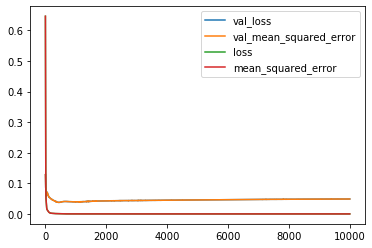

In [156]:
# to plot make data frame out of dict history.history and use .plot() method
pd.DataFrame(history_dis.history).plot()
#pyplot.show()


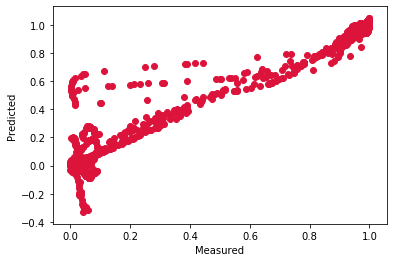

In [157]:
yhat_dis=model_dis.predict(X_dis_test.reshape(X_dis_test.shape[0], k, n_features))
#plt.gca().spines['top'].set_visible(False)

fig, ax = plt.subplots()
#plt.gca().spines['right'].set_visible(False)
ax.scatter(y_dis_test, yhat_dis,  c='crimson')
#ax.plot([y_dtest.min(), yhat.max()], [y_test.min(),  yhat.max()], 'k', lw=3)
#plt.plot(y_test, yhat, zorder=1)  
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [159]:
df_nrm_dis

entropy  availability  flowLoad        T0        T1        T2        T3  \
0    0.000000      1.000000  0.444447  1.000000  1.000000  1.000000  0.993228   
1    0.012996      0.999198  0.727274  0.985101  0.998834  0.998857  0.996614   
2    0.030290      0.998348  0.989900  0.965951  0.998834  1.000000  0.994357   
3    0.039133      0.996549  1.000000  0.989357  0.990679  0.998857  0.997743   
4    0.041981      0.997556  0.909096  1.000000  0.977861  0.998857  0.997743   
..        ...           ...       ...       ...       ...       ...       ...   
621  0.914880      0.000448  0.131306  0.044485  0.088976  0.087548  0.086162   
622  0.904081      0.001187  0.141407  0.044485  0.088976  0.088684  0.086162   
623  0.893808      0.000760  0.151507  0.044485  0.090131  0.088684  0.086162   
624  0.888743      0.000526  0.151507  0.044485  0.090131  0.088684  0.086162   
625  0.882823      0.000006  0.202010  0.042366  0.090131  0.088684  0.087280   

           T4        T5        T6        T7        T8        T9  
0    1.000000  0.998850  0.998827  0.998798  1.000000  1.000000  
1    1.000000  1.000000  0.998827  0.998798  0.998754  1.000000  
2    1.000000  0.996549  0.998827  0.998798  0.998754  1.000000  
3    1.000000  0.998850  0.998827  0.998798  0.998754  0.995344  
4    1.000000  0.995399  1.000000  0.998798  0.998754  1.000000  
..        ...       ...       ...       ...       ...       ...  
621  0.072729  0.052472  0.038391  0.015505  0.009887  0.102217  
622  0.073847  0.051332  0.039553  0.015505  0.004942  0.097575  
623  0.074966  0.055896  0.040720  0.014310  0.002473  0.069697  
624  0.074966  0.062741  0.039553  0.014310  0.000000  0.037162  
625  0.074966  0.053612  0.036065  0.014310  0.000000  0.000000  

[626 rows x 13 columns]

#Please do scale1 and scale2

In [163]:
def unscaleFunction_dis(df_original, y_values, cut_arr,  scaler):
    df_toadd = df_original[[ 'entropy', 'availability', 'flowLoad']]
    df_toadd_short = df_toadd[:cut_arr.shape[0]]
    yhat_copy = y_values.copy()
    yhat_copy_df = pd.DataFrame(yhat_copy)
    yhat_copy_new_df = pd.concat([df_toadd_short, yhat_copy_df], axis =1)
    
    return scaler.inverse_transform(yhat_copy_new_df)

y_pred_unscaled_dis, y_test_unscaled_dis = unscaleFunction_dis(df_nrm_dis, yhat_dis, y_dis_test, scaler), unscaleFunction_dis(df_nrm_dis, y_dis_test,y_dis_test, scaler)

In [164]:

y_pred_unscaled_dis_df, y_test_unscaled_dis_df = array2df(y_pred_unscaled_dis), array2df(y_test_unscaled_dis)

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x432 with 0 Axes>

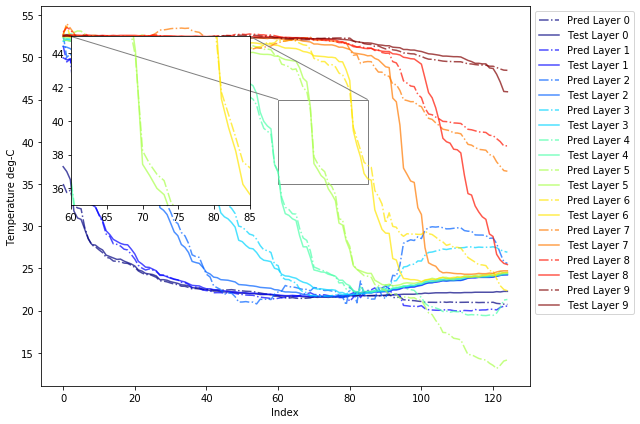

(<Figure size 648x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f79895185d0>)

In [167]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
def plotPredAndActualTem(yhat, ytest, alpha =0.7, scm=None):
    cmap_name = "jet"
    fig = plt.figure(figsize=(6,6))
    #ax = fig.add_subplot()
    fig, ax = plt.subplots(1, figsize=(9,6))
    #fig.subplots_adjust(left=0.2, bottom=0.2)
    
    tem_Pred_df = pd.DataFrame(yhat).iloc[:,0:10]
    tem_test_df =  pd.DataFrame(ytest).iloc[:,0:10]
    
   # len_df = len(tem_Pred_df)
    
    tem_PredZoom_df = tem_Pred_df.iloc[20:40, :]
    tem_TestZoom_df = tem_test_df.iloc[20:40, :]
    
    

    scm = create_color_step_obj(cmap_name, 10)
    
    #########################
    axins = zoomed_inset_axes(ax, 2,  loc=2, borderpad=3)
    mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")
    axins.set_xlim([60,85])
    axins.set_ylim([35,45])
    for i in range (0,  tem_Pred_df.shape[1]):
        ax.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        ax.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))
        


        axins.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        
        axins.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))

        #plt.show()
 
        '''
        sub_axes = plt.axes([.2, .55, .3, .3]) 
        sub_axes.plot(tem_PredZoom_df.index, tem_PredZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i)) 
        sub_axes.plot( tem_TestZoom_df.index,  tem_TestZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot') 
        '''
    
    
        #ax.legend(bbox_to_anchor=(0.8,0.8))
        ax.set_ylabel('Temperature deg-C')
        ax.set_xlabel('Index')
        #ax.legend(bbox_to_anchor=(0.4,0.8))
    #mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.1")
    fig.canvas.draw()
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    fig.savefig(fileNameForDLFigures(midfix = 'Tem_Charging'))
    return fig, ax
plotPredAndActualTem(y_pred_unscaled_dis_df, y_test_unscaled_dis_df, alpha =0.7, scm=None)

In [169]:
y_pred_unscaled_df

0          1          2          3          4          5  \
0    22.673986  23.154122  23.376011  23.805736  23.988656  24.536317   
1    22.571987  23.071397  23.320675  23.809179  24.185110  24.610679   
2    22.557662  22.840853  23.335009  23.866986  24.189168  24.857740   
3    22.513777  23.018778  23.426734  24.084230  24.479189  24.881342   
4    22.586495  23.322159  23.687666  24.281910  24.696852  24.941829   
..         ...        ...        ...        ...        ...        ...   
126  35.991774  48.706152  49.611123  50.576425  51.065175  51.524596   
127  36.020145  48.785717  49.720731  50.666588  51.186878  51.613673   
128  36.010330  48.799526  49.739237  50.709421  51.232667  51.659222   
129  34.850527  48.280311  50.153661  49.889770  52.222353  51.728452   
130  34.864219  48.310946  50.212019  49.907255  52.245593  51.709531   

             6          7          8          9  
0    24.915688  25.312446  25.601788  25.604380  
1    24.937747  25.361709  25.766834  25.794894  
2    25.183606  25.241545  25.560136  25.777756  
3    24.960130  25.115785  25.196988  25.075068  
4    25.064438  25.232110  25.267147  25.090019  
..         ...        ...        ...        ...  
126  51.887819  52.128725  52.162702  51.885700  
127  51.978496  52.231997  52.256524  51.968309  
128  52.010619  52.255547  52.273655  52.001691  
129  52.142420  52.451872  51.319034  51.263407  
130  52.138055  52.495530  51.352192  51.259067  

[131 rows x 10 columns]

In [168]:
y_pred_unscaled_dis_df

0          1          2          3          4          5  \
0    34.998470  51.365379  52.677544  51.938895  52.721546  52.064717   
1    33.994950  49.458910  50.003442  52.168066  52.697007  52.005975   
2    34.264626  49.813793  50.412528  52.085757  52.782880  51.928970   
3    32.494858  45.449450  49.373204  50.989302  52.738810  52.942283   
4    32.171902  44.419152  50.479938  50.837357  52.627061  53.125571   
..         ...        ...        ...        ...        ...        ...   
120  20.996373  20.163249  28.602136  27.564257  19.446223  13.521288   
121  20.862743  20.087521  27.947682  27.459900  19.718502  13.144588   
122  20.823351  20.390246  26.811986  27.203354  20.372330  13.533598   
123  20.770959  20.527369  25.786539  27.033854  21.249819  14.035171   
124  20.733164  20.539218  25.597938  26.922896  21.325733  14.163684   

             6          7          8          9  
0    52.639047  52.709566  52.961387  52.533459  
1    53.833674  53.993529  53.552588  52.662557  
2    52.383123  53.455080  53.272315  52.527165  
3    52.410714  52.862582  52.758220  52.504360  
4    52.005273  52.111385  52.268466  52.435555  
..         ...        ...        ...        ...  
120  24.711578  38.366887  40.732842  48.948425  
121  23.786768  37.620289  40.372726  48.792498  
122  22.956753  37.108341  40.026686  48.625271  
123  22.511789  36.590882  39.512159  48.487035  
124  22.352364  36.514212  39.525702  48.466258  

[125 rows x 10 columns]

In [171]:
df_conc_dis_ch = pd.concat( [y_pred_unscaled_df,y_pred_unscaled_dis_df],  ignore_index=True, axis =0)

In [172]:
df_conc_dis_ch

0          1          2          3          4          5  \
0    22.673986  23.154122  23.376011  23.805736  23.988656  24.536317   
1    22.571987  23.071397  23.320675  23.809179  24.185110  24.610679   
2    22.557662  22.840853  23.335009  23.866986  24.189168  24.857740   
3    22.513777  23.018778  23.426734  24.084230  24.479189  24.881342   
4    22.586495  23.322159  23.687666  24.281910  24.696852  24.941829   
..         ...        ...        ...        ...        ...        ...   
251  20.996373  20.163249  28.602136  27.564257  19.446223  13.521288   
252  20.862743  20.087521  27.947682  27.459900  19.718502  13.144588   
253  20.823351  20.390246  26.811986  27.203354  20.372330  13.533598   
254  20.770959  20.527369  25.786539  27.033854  21.249819  14.035171   
255  20.733164  20.539218  25.597938  26.922896  21.325733  14.163684   

             6          7          8          9  
0    24.915688  25.312446  25.601788  25.604380  
1    24.937747  25.361709  25.766834  25.794894  
2    25.183606  25.241545  25.560136  25.777756  
3    24.960130  25.115785  25.196988  25.075068  
4    25.064438  25.232110  25.267147  25.090019  
..         ...        ...        ...        ...  
251  24.711578  38.366887  40.732842  48.948425  
252  23.786768  37.620289  40.372726  48.792498  
253  22.956753  37.108341  40.026686  48.625271  
254  22.511789  36.590882  39.512159  48.487035  
255  22.352364  36.514212  39.525702  48.466258  

[256 rows x 10 columns]

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f79894c2c90>)

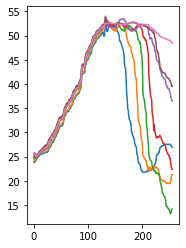

In [173]:
fig = plt.figure(1)
ax = fig.add_subplot(121)

#fig.canvas.draw()
fig.show()
#fig.canvas.draw()
#plt.rcParams["figure.figsize"]=5,5
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 8
#fig_size[1] = 3

def plotObject(df, ax, fig, alpha =0.7, scm=None):
    #ax.clear()
    #df= df.iloc[:, 1:]
    df = df.iloc[:, 3:]
    for i in range (0, df.shape[1]):
        #print ('last shape[1] is:', df.shape[1])
        ax.plot(df.index, df.iloc[:, i],\
                label = 'Layer ' + str(i))
        
    #fig.canvas.draw()
    #ax.legend()
    #fig.show()
    #print ('df is :', df)
    #plt.legend(loc='upper left')
    return fig, ax
plotObject(df_conc_dis_ch, ax, fig, alpha =0.7, scm=None)